In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
np.random.seed(16)

#1.1 weather_prediction_dataset

2.1.1 Importing Dataset

In [ ]:
import io
import gdown
import scipy.io

file_id = "1rMaDhSCUwK_rpMpV1cQOnvXOuvNrH2m5"


gdown.download(f"https://drive.google.com/uc?id={file_id}", "weather_prediction_dataset.csv", quiet=False)


df = pd.read_csv("weather_prediction_dataset.csv")

Downloading...
From: https://drive.google.com/uc?id=1rMaDhSCUwK_rpMpV1cQOnvXOuvNrH2m5
To: /content/weather_prediction_dataset.csv
100%|██████████| 2.77M/2.77M [00:00<00:00, 29.2MB/s]


2.1.1 Choosing french cities

In [ ]:
#MONTELIMAR-PERPIGNAN-TOURS are in french
Cl_name = df.columns

#MONTELIMAR indexes
M1 = df.columns.get_loc('MONTELIMAR_wind_speed')
M2 = df.columns.get_loc('MONTELIMAR_temp_max')

#PERPIGNAN
P1 = df.columns.get_loc('PERPIGNAN_wind_speed')
P2 = df.columns.get_loc('PERPIGNAN_temp_max')

#TOURS
T1 = df.columns.get_loc('TOURS_wind_speed')
T2 = df.columns.get_loc('TOURS_temp_max')

#BASEL
B1 = df.columns.get_loc('BASEL_cloud_cover')
B2 = df.columns.get_loc('BASEL_temp_max')

F_Data = df.iloc[:,list(range(0,2))+list(range(T1, T2+1)) + list(range(T1, T2+1)) + list(range(T1, T2+1)) + list(range(T1, T2+1))]


In [ ]:
F_Data.head()

DATE  MONTH  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0  20000101      1               1.6            0.97          1.0275   
1  20000102      1               2.0            0.99          1.0293   
2  20000103      1               3.4            0.91          1.0267   
3  20000104      1               4.9            0.95          1.0222   
4  20000105      1               3.6            0.95          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   

   TOURS_temp_min  TOURS_temp_max  ...  TOURS_temp_min  TOURS_temp_max  \
0             7.2             9.8  ...             7.2             9.8   
1             6.6             9.2  ...             6.6             9.2   
2             6.6             9.6  ...             6.6             9.6   
3             6.4            10.8  ...             6.4            10.8   
4             6.4             9.5  ...             6.4             9.5   

   TOURS_wind_speed  TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
0               1.6            0.97          1.0275                    0.25   
1               2.0            0.99          1.0293                    0.17   
2               3.4            0.91          1.0267                    0.27   
3               4.9            0.95          1.0222                    0.11   
4               3.6            0.95          1.0209                    0.39   

   TOURS_precipitation  TOURS_temp_mean  TOURS_temp_min  TOURS_temp_max  
0                 0.04              8.5             7.2             9.8  
1                 0.16              7.9             6.6             9.2  
2                 0.00              8.1             6.6             9.6  
3                 0.44              8.6             6.4            10.8  
4                 0.04              8.0             6.4             9.5  

[5 rows x 34 columns]

3.1.1 Preprocessing Dataset

In [ ]:
F_Data = F_Data.to_numpy()  # DataFrame to numpy
minmax = MinMaxScaler()
F_Data_norm = minmax.fit_transform(F_Data[:,2:])

4.1.1 Creat Time Series --Train and Tests split

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 20
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


#1.2 Training Model

#1.3 Training Collacrative machine learning

1.3-prediction Wind Speed

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)





Training Progress:   0%|          | 1/500 [00:00<00:55,  8.97it/s]

Epoch 1/500 - MAP Train: 0.1228 | MAP Test: 0.1080


Training Progress:   0%|          | 2/500 [00:00<01:40,  4.97it/s]

Epoch 2/500 - MAP Train: 0.1150 | MAP Test: 0.1066


Training Progress:   1%|          | 3/500 [00:00<01:49,  4.55it/s]

Epoch 3/500 - MAP Train: 0.1135 | MAP Test: 0.1056


Training Progress:   1%|          | 4/500 [00:00<01:49,  4.52it/s]

Epoch 4/500 - MAP Train: 0.1123 | MAP Test: 0.1047
Epoch 5/500 - MAP Train: 0.1113 | MAP Test: 0.1038


Training Progress:   1%|▏         | 7/500 [00:01<01:23,  5.93it/s]

Epoch 6/500 - MAP Train: 0.1104 | MAP Test: 0.1030
Epoch 7/500 - MAP Train: 0.1096 | MAP Test: 0.1023


Training Progress:   2%|▏         | 9/500 [00:01<01:17,  6.33it/s]

Epoch 8/500 - MAP Train: 0.1090 | MAP Test: 0.1017
Epoch 9/500 - MAP Train: 0.1084 | MAP Test: 0.1011


Training Progress:   2%|▏         | 11/500 [00:01<01:16,  6.36it/s]

Epoch 10/500 - MAP Train: 0.1079 | MAP Test: 0.1006
Epoch 11/500 - MAP Train: 0.1074 | MAP Test: 0.1001


Training Progress:   3%|▎         | 13/500 [00:02<01:03,  7.71it/s]

Epoch 12/500 - MAP Train: 0.1070 | MAP Test: 0.0997
Epoch 13/500 - MAP Train: 0.1067 | MAP Test: 0.0993


Training Progress:   3%|▎         | 15/500 [00:02<01:12,  6.68it/s]

Epoch 14/500 - MAP Train: 0.1064 | MAP Test: 0.0990
Epoch 15/500 - MAP Train: 0.1061 | MAP Test: 0.0987


Training Progress:   3%|▎         | 17/500 [00:02<01:12,  6.63it/s]

Epoch 16/500 - MAP Train: 0.1058 | MAP Test: 0.0984
Epoch 17/500 - MAP Train: 0.1056 | MAP Test: 0.0981


Training Progress:   4%|▍         | 19/500 [00:02<01:05,  7.38it/s]

Epoch 18/500 - MAP Train: 0.1054 | MAP Test: 0.0979
Epoch 19/500 - MAP Train: 0.1052 | MAP Test: 0.0976


Training Progress:   4%|▍         | 21/500 [00:03<01:11,  6.74it/s]

Epoch 20/500 - MAP Train: 0.1051 | MAP Test: 0.0975
Epoch 21/500 - MAP Train: 0.1049 | MAP Test: 0.0973


Training Progress:   5%|▍         | 23/500 [00:03<01:16,  6.26it/s]

Epoch 22/500 - MAP Train: 0.1048 | MAP Test: 0.0971
Epoch 23/500 - MAP Train: 0.1046 | MAP Test: 0.0970


Training Progress:   5%|▍         | 24/500 [00:03<01:09,  6.85it/s]

Epoch 24/500 - MAP Train: 0.1045 | MAP Test: 0.0969


Training Progress:   5%|▌         | 25/500 [00:03<01:17,  6.12it/s]

Epoch 25/500 - MAP Train: 0.1044 | MAP Test: 0.0968


Training Progress:   5%|▌         | 27/500 [00:04<01:19,  5.99it/s]

Epoch 26/500 - MAP Train: 0.1043 | MAP Test: 0.0966
Epoch 27/500 - MAP Train: 0.1042 | MAP Test: 0.0965


Training Progress:   6%|▌         | 29/500 [00:04<01:04,  7.26it/s]

Epoch 28/500 - MAP Train: 0.1041 | MAP Test: 0.0964
Epoch 29/500 - MAP Train: 0.1040 | MAP Test: 0.0963


Training Progress:   6%|▌         | 31/500 [00:04<00:56,  8.27it/s]

Epoch 30/500 - MAP Train: 0.1039 | MAP Test: 0.0962
Epoch 31/500 - MAP Train: 0.1039 | MAP Test: 0.0962


Training Progress:   6%|▋         | 32/500 [00:04<01:02,  7.49it/s]

Epoch 32/500 - MAP Train: 0.1038 | MAP Test: 0.0961


Training Progress:   7%|▋         | 34/500 [00:05<01:17,  6.00it/s]

Epoch 33/500 - MAP Train: 0.1037 | MAP Test: 0.0960
Epoch 34/500 - MAP Train: 0.1037 | MAP Test: 0.0959


Training Progress:   7%|▋         | 36/500 [00:05<01:16,  6.04it/s]

Epoch 35/500 - MAP Train: 0.1036 | MAP Test: 0.0959
Epoch 36/500 - MAP Train: 0.1036 | MAP Test: 0.0958


Training Progress:   8%|▊         | 40/500 [00:05<00:44, 10.23it/s]

Epoch 37/500 - MAP Train: 0.1035 | MAP Test: 0.0957
Epoch 38/500 - MAP Train: 0.1035 | MAP Test: 0.0957
Epoch 39/500 - MAP Train: 0.1034 | MAP Test: 0.0956
Epoch 40/500 - MAP Train: 0.1034 | MAP Test: 0.0956


Training Progress:   8%|▊         | 42/500 [00:06<00:45, 10.07it/s]

Epoch 41/500 - MAP Train: 0.1033 | MAP Test: 0.0955
Epoch 42/500 - MAP Train: 0.1033 | MAP Test: 0.0955


Training Progress:   9%|▉         | 44/500 [00:06<00:46,  9.77it/s]

Epoch 43/500 - MAP Train: 0.1033 | MAP Test: 0.0954
Epoch 44/500 - MAP Train: 0.1032 | MAP Test: 0.0954
Epoch 45/500 - MAP Train: 0.1032 | MAP Test: 0.0954


Training Progress:  10%|▉         | 48/500 [00:06<00:42, 10.65it/s]

Epoch 46/500 - MAP Train: 0.1032 | MAP Test: 0.0953
Epoch 47/500 - MAP Train: 0.1031 | MAP Test: 0.0953
Epoch 48/500 - MAP Train: 0.1031 | MAP Test: 0.0952


Training Progress:  10%|█         | 51/500 [00:06<00:36, 12.43it/s]

Epoch 49/500 - MAP Train: 0.1031 | MAP Test: 0.0952
Epoch 50/500 - MAP Train: 0.1031 | MAP Test: 0.0952
Epoch 51/500 - MAP Train: 0.1030 | MAP Test: 0.0952
Epoch 52/500 - MAP Train: 0.1030 | MAP Test: 0.0951


Epoch 53/500 - MAP Train: 0.1030 | MAP Test: 0.0951
Epoch 54/500 - MAP Train: 0.1030 | MAP Test: 0.0951


Training Progress:  11%|█         | 55/500 [00:07<00:37, 11.98it/s]

Epoch 55/500 - MAP Train: 0.1030 | MAP Test: 0.0951
Epoch 56/500 - MAP Train: 0.1029 | MAP Test: 0.0950


Training Progress:  11%|█▏        | 57/500 [00:07<00:41, 10.68it/s]

Epoch 57/500 - MAP Train: 0.1029 | MAP Test: 0.0950
Epoch 58/500 - MAP Train: 0.1029 | MAP Test: 0.0950


Training Progress:  12%|█▏        | 61/500 [00:07<00:41, 10.69it/s]

Epoch 59/500 - MAP Train: 0.1029 | MAP Test: 0.0950
Epoch 60/500 - MAP Train: 0.1029 | MAP Test: 0.0950
Epoch 61/500 - MAP Train: 0.1029 | MAP Test: 0.0950


Training Progress:  13%|█▎        | 63/500 [00:08<00:36, 11.83it/s]

Epoch 62/500 - MAP Train: 0.1028 | MAP Test: 0.0949
Epoch 63/500 - MAP Train: 0.1028 | MAP Test: 0.0949
Epoch 64/500 - MAP Train: 0.1028 | MAP Test: 0.0949


Training Progress:  13%|█▎        | 67/500 [00:08<00:35, 12.17it/s]

Epoch 65/500 - MAP Train: 0.1028 | MAP Test: 0.0949
Epoch 66/500 - MAP Train: 0.1028 | MAP Test: 0.0949
Epoch 67/500 - MAP Train: 0.1028 | MAP Test: 0.0949


Training Progress:  14%|█▍        | 72/500 [00:08<00:27, 15.56it/s]

Epoch 68/500 - MAP Train: 0.1028 | MAP Test: 0.0949
Epoch 69/500 - MAP Train: 0.1028 | MAP Test: 0.0948
Epoch 70/500 - MAP Train: 0.1027 | MAP Test: 0.0948
Epoch 71/500 - MAP Train: 0.1027 | MAP Test: 0.0948
Epoch 72/500 - MAP Train: 0.1027 | MAP Test: 0.0948


Training Progress:  15%|█▌        | 76/500 [00:08<00:25, 16.57it/s]

Epoch 73/500 - MAP Train: 0.1027 | MAP Test: 0.0948
Epoch 74/500 - MAP Train: 0.1027 | MAP Test: 0.0948
Epoch 75/500 - MAP Train: 0.1027 | MAP Test: 0.0948
Epoch 76/500 - MAP Train: 0.1027 | MAP Test: 0.0948


Training Progress:  16%|█▌        | 78/500 [00:08<00:29, 14.38it/s]

Epoch 77/500 - MAP Train: 0.1027 | MAP Test: 0.0948
Epoch 78/500 - MAP Train: 0.1027 | MAP Test: 0.0948


Training Progress:  16%|█▌        | 80/500 [00:09<00:32, 13.10it/s]

Epoch 79/500 - MAP Train: 0.1027 | MAP Test: 0.0948
Epoch 80/500 - MAP Train: 0.1027 | MAP Test: 0.0947


Training Progress:  16%|█▋        | 82/500 [00:09<00:35, 11.92it/s]

Epoch 81/500 - MAP Train: 0.1027 | MAP Test: 0.0947
Epoch 82/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 83/500 - MAP Train: 0.1026 | MAP Test: 0.0947


Training Progress:  17%|█▋        | 84/500 [00:09<00:35, 11.68it/s]

Epoch 84/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 85/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 86/500 - MAP Train: 0.1026 | MAP Test: 0.0947


Training Progress:  18%|█▊        | 89/500 [00:09<00:30, 13.46it/s]

Epoch 87/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 88/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 89/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 90/500 - MAP Train: 0.1026 | MAP Test: 0.0947


Training Progress:  19%|█▊        | 93/500 [00:10<00:26, 15.33it/s]

Epoch 91/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 92/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 93/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 94/500 - MAP Train: 0.1026 | MAP Test: 0.0947


Training Progress:  19%|█▉        | 97/500 [00:10<00:25, 15.92it/s]

Epoch 95/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 96/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 97/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 98/500 - MAP Train: 0.1026 | MAP Test: 0.0947


Training Progress:  21%|██        | 103/500 [00:10<00:20, 19.07it/s]

Epoch 99/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 100/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 101/500 - MAP Train: 0.1026 | MAP Test: 0.0947
Epoch 102/500 - MAP Train: 0.1026 | MAP Test: 0.0946
Epoch 103/500 - MAP Train: 0.1026 | MAP Test: 0.0946


Training Progress:  21%|██        | 105/500 [00:10<00:28, 13.86it/s]

Epoch 104/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 105/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Epoch 106/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  21%|██▏       | 107/500 [00:11<00:41,  9.45it/s]

Epoch 107/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 108/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  22%|██▏       | 111/500 [00:11<00:42,  9.16it/s]

Epoch 109/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 110/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 111/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  23%|██▎       | 115/500 [00:12<00:33, 11.41it/s]

Epoch 112/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 113/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 114/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 115/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  24%|██▍       | 120/500 [00:12<00:24, 15.41it/s]

Epoch 116/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 117/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 118/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 119/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 120/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  25%|██▍       | 123/500 [00:12<00:22, 16.47it/s]

Epoch 121/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 122/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 123/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 124/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  25%|██▌       | 127/500 [00:12<00:23, 15.83it/s]

Epoch 125/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 126/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 127/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  26%|██▌       | 129/500 [00:12<00:29, 12.56it/s]

Epoch 128/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 129/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  26%|██▌       | 131/500 [00:13<00:33, 11.15it/s]

Epoch 130/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 131/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 132/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  27%|██▋       | 135/500 [00:13<00:31, 11.44it/s]

Epoch 133/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 134/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 135/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  27%|██▋       | 137/500 [00:13<00:33, 10.93it/s]

Epoch 136/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 137/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 138/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  28%|██▊       | 141/500 [00:14<00:28, 12.60it/s]

Epoch 139/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 140/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 141/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 142/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  29%|██▉       | 145/500 [00:14<00:26, 13.61it/s]

Epoch 143/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 144/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 145/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 146/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  29%|██▉       | 147/500 [00:14<00:28, 12.49it/s]

Epoch 147/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 148/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  30%|██▉       | 149/500 [00:14<00:32, 10.79it/s]

Epoch 149/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 150/500 - MAP Train: 0.1025 | MAP Test: 0.0946


Training Progress:  30%|███       | 151/500 [00:15<00:35,  9.87it/s]

Epoch 151/500 - MAP Train: 0.1025 | MAP Test: 0.0946
Epoch 152/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  31%|███       | 154/500 [00:15<00:40,  8.50it/s]

Epoch 153/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 154/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Epoch 155/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 156/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  32%|███▏      | 158/500 [00:15<00:38,  8.94it/s]

Epoch 157/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 158/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  32%|███▏      | 160/500 [00:16<00:40,  8.43it/s]

Epoch 159/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 160/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  32%|███▏      | 162/500 [00:16<00:34,  9.67it/s]

Epoch 161/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 162/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 163/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  33%|███▎      | 166/500 [00:16<00:31, 10.74it/s]

Epoch 164/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 165/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 166/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  34%|███▎      | 168/500 [00:16<00:30, 10.98it/s]

Epoch 167/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 168/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 169/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  34%|███▍      | 170/500 [00:17<00:31, 10.48it/s]

Epoch 170/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 171/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 172/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  35%|███▍      | 174/500 [00:17<00:33,  9.79it/s]

Epoch 173/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 174/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  35%|███▌      | 176/500 [00:17<00:38,  8.50it/s]

Epoch 175/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 176/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 177/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  36%|███▌      | 180/500 [00:17<00:29, 10.93it/s]

Epoch 178/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 179/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 180/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  36%|███▋      | 182/500 [00:18<00:30, 10.36it/s]

Epoch 181/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 182/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  37%|███▋      | 184/500 [00:18<00:30, 10.20it/s]

Epoch 183/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 184/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 185/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  38%|███▊      | 188/500 [00:18<00:24, 12.78it/s]

Epoch 186/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 187/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 188/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 189/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  38%|███▊      | 192/500 [00:18<00:19, 15.61it/s]

Epoch 190/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 191/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 192/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 193/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  39%|███▉      | 196/500 [00:19<00:21, 14.15it/s]

Epoch 194/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 195/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 196/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  40%|███▉      | 198/500 [00:19<00:21, 14.25it/s]

Epoch 197/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 198/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 199/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 200/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  41%|████      | 204/500 [00:19<00:19, 15.21it/s]

Epoch 201/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 202/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 203/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 204/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  41%|████      | 206/500 [00:19<00:18, 15.52it/s]

Epoch 205/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 206/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 207/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 208/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Epoch 209/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 210/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 211/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  43%|████▎     | 213/500 [00:20<00:23, 12.23it/s]

Epoch 212/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 213/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  43%|████▎     | 215/500 [00:20<00:32,  8.65it/s]

Epoch 214/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 215/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  43%|████▎     | 217/500 [00:21<00:31,  8.94it/s]

Epoch 216/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 217/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 218/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  44%|████▍     | 221/500 [00:21<00:24, 11.36it/s]

Epoch 219/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 220/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 221/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 222/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  45%|████▌     | 225/500 [00:21<00:20, 13.42it/s]

Epoch 223/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 224/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 225/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 226/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  46%|████▌     | 229/500 [00:21<00:18, 14.57it/s]

Epoch 227/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 228/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 229/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 230/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  47%|████▋     | 233/500 [00:22<00:18, 14.11it/s]

Epoch 231/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 232/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 233/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  47%|████▋     | 235/500 [00:22<00:20, 13.13it/s]

Epoch 234/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 235/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 236/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  48%|████▊     | 239/500 [00:22<00:20, 12.94it/s]

Epoch 237/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 238/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 239/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Epoch 240/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 241/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  49%|████▊     | 243/500 [00:22<00:25,  9.99it/s]

Epoch 242/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 243/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  49%|████▉     | 245/500 [00:23<00:27,  9.39it/s]

Epoch 244/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 245/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 246/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  50%|████▉     | 249/500 [00:23<00:22, 11.13it/s]

Epoch 247/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 248/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 249/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  51%|█████     | 253/500 [00:23<00:19, 12.71it/s]

Epoch 250/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 251/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 252/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 253/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  51%|█████▏    | 257/500 [00:24<00:16, 14.42it/s]

Epoch 254/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 255/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 256/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 257/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  52%|█████▏    | 261/500 [00:24<00:15, 15.35it/s]

Epoch 258/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 259/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 260/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 261/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  53%|█████▎    | 263/500 [00:24<00:16, 14.55it/s]

Epoch 262/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 263/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 264/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 265/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  53%|█████▎    | 267/500 [00:24<00:16, 14.55it/s]

Epoch 266/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 267/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 268/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  54%|█████▍    | 271/500 [00:25<00:17, 13.32it/s]

Epoch 269/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 270/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 271/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  55%|█████▍    | 273/500 [00:25<00:18, 12.31it/s]

Epoch 272/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 273/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 274/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  55%|█████▌    | 277/500 [00:25<00:19, 11.48it/s]

Epoch 275/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 276/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 277/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  56%|█████▌    | 279/500 [00:25<00:19, 11.44it/s]

Epoch 278/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 279/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 280/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  57%|█████▋    | 283/500 [00:26<00:16, 12.97it/s]

Epoch 281/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 282/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 283/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 284/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  58%|█████▊    | 288/500 [00:26<00:13, 15.52it/s]

Epoch 285/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 286/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 287/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 288/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  58%|█████▊    | 290/500 [00:26<00:13, 15.31it/s]

Epoch 289/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 290/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 291/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  59%|█████▉    | 294/500 [00:26<00:14, 14.36it/s]

Epoch 292/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 293/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 294/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  59%|█████▉    | 296/500 [00:26<00:16, 12.42it/s]

Epoch 295/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 296/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  60%|█████▉    | 298/500 [00:27<00:18, 11.04it/s]

Epoch 297/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 298/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  60%|██████    | 300/500 [00:27<00:22,  8.99it/s]

Epoch 299/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 300/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 301/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  61%|██████    | 303/500 [00:27<00:21,  9.30it/s]

Epoch 302/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 303/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  61%|██████    | 306/500 [00:28<00:19, 10.04it/s]

Epoch 304/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 305/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 306/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  62%|██████▏   | 308/500 [00:28<00:18, 10.51it/s]

Epoch 307/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 308/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 309/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  62%|██████▏   | 310/500 [00:28<00:19,  9.86it/s]

Epoch 310/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 311/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  63%|██████▎   | 313/500 [00:28<00:22,  8.48it/s]

Epoch 312/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 313/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  63%|██████▎   | 315/500 [00:29<00:23,  7.90it/s]

Epoch 314/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 315/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  63%|██████▎   | 317/500 [00:29<00:24,  7.34it/s]

Epoch 316/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 317/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  64%|██████▍   | 319/500 [00:29<00:23,  7.56it/s]

Epoch 318/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 319/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  64%|██████▍   | 321/500 [00:30<00:23,  7.61it/s]

Epoch 320/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 321/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  64%|██████▍   | 322/500 [00:30<00:24,  7.20it/s]

Epoch 322/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  65%|██████▌   | 325/500 [00:30<00:22,  7.83it/s]

Epoch 323/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 324/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 325/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  66%|██████▌   | 329/500 [00:30<00:15, 10.95it/s]

Epoch 326/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 327/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 328/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 329/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  66%|██████▌   | 331/500 [00:31<00:14, 11.48it/s]

Epoch 330/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 331/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 332/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  67%|██████▋   | 335/500 [00:31<00:14, 11.12it/s]

Epoch 333/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 334/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 335/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  67%|██████▋   | 337/500 [00:31<00:15, 10.29it/s]

Epoch 336/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 337/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 338/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  68%|██████▊   | 341/500 [00:31<00:12, 12.23it/s]

Epoch 339/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 340/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 341/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  69%|██████▊   | 343/500 [00:32<00:13, 11.33it/s]

Epoch 342/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 343/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 344/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  69%|██████▉   | 347/500 [00:32<00:13, 11.66it/s]

Epoch 345/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 346/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 347/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 348/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  70%|███████   | 352/500 [00:32<00:09, 15.41it/s]

Epoch 349/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 350/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 351/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 352/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 353/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  72%|███████▏  | 358/500 [00:32<00:06, 20.47it/s]

Epoch 354/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 355/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 356/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 357/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 358/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 359/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  73%|███████▎  | 364/500 [00:33<00:05, 23.32it/s]

Epoch 360/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 361/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 362/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 363/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 364/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 365/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  74%|███████▍  | 370/500 [00:33<00:05, 23.60it/s]

Epoch 366/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 367/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 368/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 369/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 370/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  75%|███████▍  | 373/500 [00:33<00:05, 23.25it/s]

Epoch 371/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 372/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 373/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 374/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 375/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  75%|███████▌  | 376/500 [00:33<00:05, 22.60it/s]

Epoch 376/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 377/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 378/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 379/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  77%|███████▋  | 385/500 [00:34<00:05, 19.71it/s]

Epoch 380/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 381/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 382/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 383/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 384/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 385/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  78%|███████▊  | 391/500 [00:34<00:04, 22.71it/s]

Epoch 386/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 387/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 388/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 389/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 390/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 391/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  79%|███████▉  | 397/500 [00:34<00:04, 24.40it/s]

Epoch 392/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 393/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 394/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 395/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 396/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 397/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  81%|████████  | 403/500 [00:34<00:03, 25.10it/s]

Epoch 398/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 399/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 400/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 401/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 402/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 403/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Epoch 404/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 405/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  82%|████████▏ | 409/500 [00:35<00:04, 19.76it/s]

Epoch 406/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 407/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 408/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 409/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 410/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 411/500 - MAP Train: 0.1024 | MAP Test: 0.0946


Training Progress:  83%|████████▎ | 415/500 [00:35<00:03, 22.63it/s]

Epoch 412/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 413/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 414/500 - MAP Train: 0.1024 | MAP Test: 0.0946
Epoch 415/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 416/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 417/500 - MAP Train: 0.1024 | MAP Test: 0.0947


Training Progress:  84%|████████▍ | 421/500 [00:35<00:03, 24.51it/s]

Epoch 418/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 419/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 420/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 421/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 422/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 423/500 - MAP Train: 0.1024 | MAP Test: 0.0947


Training Progress:  85%|████████▌ | 427/500 [00:35<00:02, 25.35it/s]

Epoch 424/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 425/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 426/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 427/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 428/500 - MAP Train: 0.1024 | MAP Test: 0.0947


Training Progress:  87%|████████▋ | 433/500 [00:36<00:02, 25.33it/s]

Epoch 429/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 430/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 431/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 432/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 433/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 434/500 - MAP Train: 0.1024 | MAP Test: 0.0947


Training Progress:  88%|████████▊ | 439/500 [00:36<00:02, 24.38it/s]

Epoch 435/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 436/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 437/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 438/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 439/500 - MAP Train: 0.1024 | MAP Test: 0.0947


Training Progress:  88%|████████▊ | 442/500 [00:36<00:02, 24.11it/s]

Epoch 440/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 441/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 442/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 443/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 444/500 - MAP Train: 0.1024 | MAP Test: 0.0947


Training Progress:  90%|████████▉ | 448/500 [00:36<00:02, 23.11it/s]

Epoch 445/500 - MAP Train: 0.1024 | MAP Test: 0.0947
Epoch 446/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 447/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 448/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  90%|█████████ | 451/500 [00:37<00:02, 17.00it/s]

Epoch 449/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 450/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 451/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 452/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 453/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  91%|█████████▏| 457/500 [00:37<00:02, 21.21it/s]

Epoch 454/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 455/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 456/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 457/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 458/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 459/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 460/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  93%|█████████▎| 464/500 [00:37<00:01, 24.13it/s]

Epoch 461/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 462/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 463/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 464/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 465/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 466/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  94%|█████████▍| 470/500 [00:37<00:01, 23.73it/s]

Epoch 467/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 468/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 469/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 470/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 471/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  95%|█████████▌| 476/500 [00:38<00:01, 23.11it/s]

Epoch 472/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 473/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 474/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 475/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 476/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  96%|█████████▋| 482/500 [00:38<00:00, 23.73it/s]

Epoch 477/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 478/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 479/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 480/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 481/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 482/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  98%|█████████▊| 488/500 [00:38<00:00, 24.09it/s]

Epoch 483/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 484/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 485/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 486/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 487/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 488/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  98%|█████████▊| 488/500 [00:38<00:00, 24.09it/s]

Epoch 489/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 490/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress:  99%|█████████▉| 494/500 [00:39<00:00, 19.91it/s]

Epoch 491/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 492/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 493/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 494/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 495/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 496/500 - MAP Train: 0.1023 | MAP Test: 0.0947


Training Progress: 100%|██████████| 500/500 [00:39<00:00, 12.74it/s]


Epoch 497/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 498/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 499/500 - MAP Train: 0.1023 | MAP Test: 0.0947
Epoch 500/500 - MAP Train: 0.1023 | MAP Test: 0.0947
MEAN MAP of Train: 0.10277161423797514
MEAN MAP of Test: 0.09497603020350462


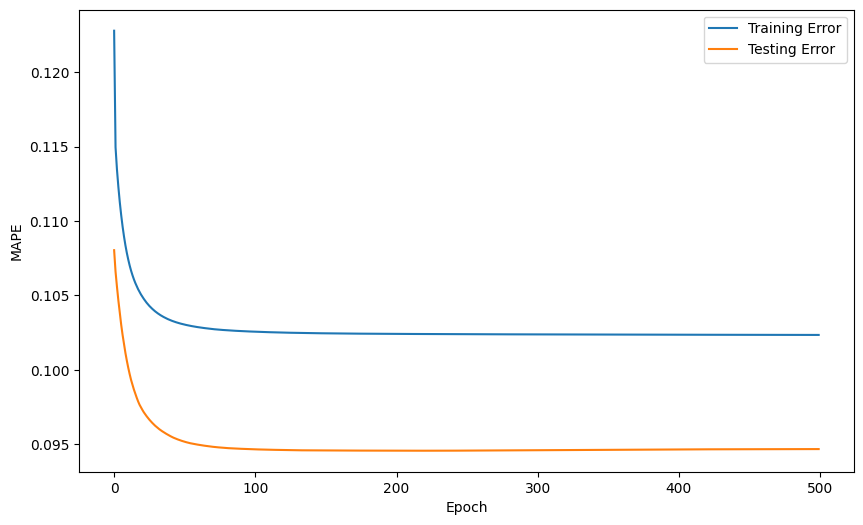

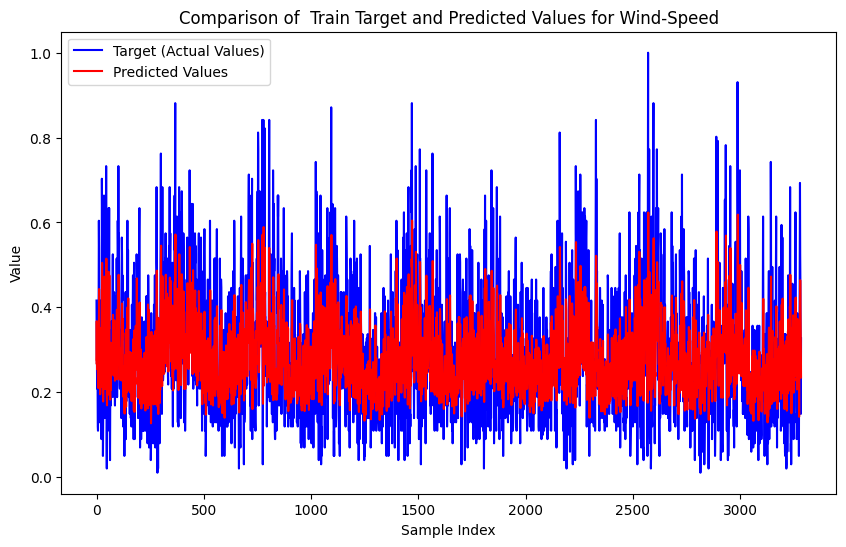

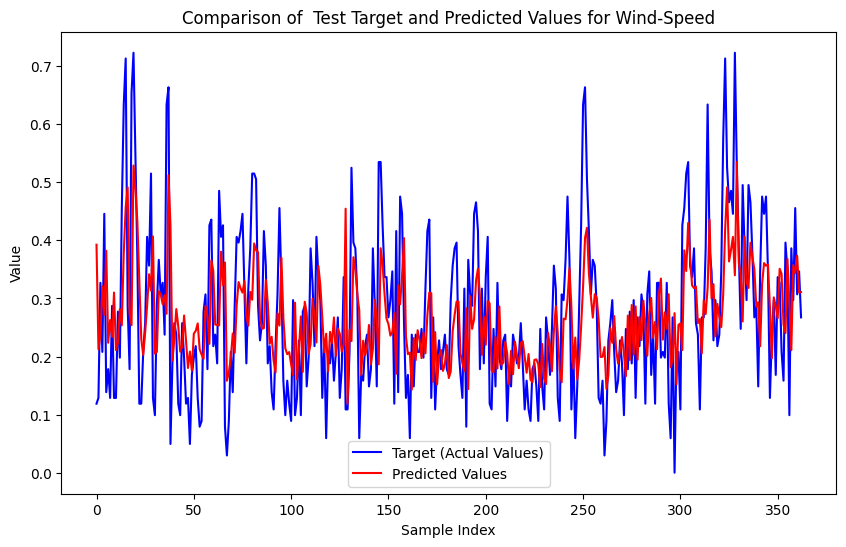

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,16]
Y_test_W = Y_test[:,16]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.0001
threshold = 0.001
epochs = 500
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue


        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")


print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr, label='Training Error')
plt.plot(errors_te, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values for Wind-Speed')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values for Wind-Speed')
plt.legend()
plt.show()


In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.10282331102773683
MEAN MAP of Test: 0.09502367126182414


3.1 Prediction Humidity

In [ ]:
import numpy as np
np.random.seed(16)

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


Training Progress:   0%|          | 4/1000 [00:00<00:33, 29.90it/s]

Epoch 1/1000 - MAP Train: 0.3310 | MAP Test: 0.1766
Epoch 2/1000 - MAP Train: 0.1600 | MAP Test: 0.1572
Epoch 3/1000 - MAP Train: 0.1460 | MAP Test: 0.1490
Epoch 4/1000 - MAP Train: 0.1389 | MAP Test: 0.1421
Epoch 5/1000 - MAP Train: 0.1329 | MAP Test: 0.1360
Epoch 6/1000 - MAP Train: 0.1277 | MAP Test: 0.1307


Training Progress:   1%|          | 10/1000 [00:00<00:41, 23.77it/s]

Epoch 7/1000 - MAP Train: 0.1232 | MAP Test: 0.1261
Epoch 8/1000 - MAP Train: 0.1194 | MAP Test: 0.1221
Epoch 9/1000 - MAP Train: 0.1161 | MAP Test: 0.1187
Epoch 10/1000 - MAP Train: 0.1132 | MAP Test: 0.1157


Training Progress:   1%|          | 10/1000 [00:00<00:41, 23.77it/s]

Epoch 11/1000 - MAP Train: 0.1107 | MAP Test: 0.1131
Epoch 12/1000 - MAP Train: 0.1087 | MAP Test: 0.1108


Epoch 13/1000 - MAP Train: 0.1069 | MAP Test: 0.1089
Epoch 14/1000 - MAP Train: 0.1053 | MAP Test: 0.1073
Epoch 15/1000 - MAP Train: 0.1040 | MAP Test: 0.1058
Epoch 16/1000 - MAP Train: 0.1028 | MAP Test: 0.1045
Epoch 17/1000 - MAP Train: 0.1018 | MAP Test: 0.1033


Training Progress:   2%|▏         | 23/1000 [00:01<00:43, 22.68it/s]

Epoch 18/1000 - MAP Train: 0.1009 | MAP Test: 0.1023
Epoch 19/1000 - MAP Train: 0.1001 | MAP Test: 0.1014
Epoch 20/1000 - MAP Train: 0.0994 | MAP Test: 0.1007
Epoch 21/1000 - MAP Train: 0.0988 | MAP Test: 0.1001
Epoch 22/1000 - MAP Train: 0.0982 | MAP Test: 0.0995
Epoch 23/1000 - MAP Train: 0.0977 | MAP Test: 0.0991


Training Progress:   3%|▎         | 26/1000 [00:01<00:41, 23.25it/s]

Epoch 24/1000 - MAP Train: 0.0973 | MAP Test: 0.0986
Epoch 25/1000 - MAP Train: 0.0969 | MAP Test: 0.0983
Epoch 26/1000 - MAP Train: 0.0966 | MAP Test: 0.0980
Epoch 27/1000 - MAP Train: 0.0963 | MAP Test: 0.0977
Epoch 28/1000 - MAP Train: 0.0960 | MAP Test: 0.0975


Training Progress:   3%|▎         | 33/1000 [00:01<00:36, 26.29it/s]

Epoch 29/1000 - MAP Train: 0.0958 | MAP Test: 0.0973
Epoch 30/1000 - MAP Train: 0.0956 | MAP Test: 0.0971
Epoch 31/1000 - MAP Train: 0.0953 | MAP Test: 0.0969
Epoch 32/1000 - MAP Train: 0.0952 | MAP Test: 0.0968
Epoch 33/1000 - MAP Train: 0.0950 | MAP Test: 0.0966
Epoch 34/1000 - MAP Train: 0.0948 | MAP Test: 0.0965
Epoch 35/1000 - MAP Train: 0.0947 | MAP Test: 0.0964


Training Progress:   4%|▍         | 39/1000 [00:01<00:37, 25.47it/s]

Epoch 36/1000 - MAP Train: 0.0945 | MAP Test: 0.0963
Epoch 37/1000 - MAP Train: 0.0944 | MAP Test: 0.0962
Epoch 38/1000 - MAP Train: 0.0943 | MAP Test: 0.0961
Epoch 39/1000 - MAP Train: 0.0942 | MAP Test: 0.0960
Epoch 40/1000 - MAP Train: 0.0941 | MAP Test: 0.0959


Training Progress:   4%|▍         | 45/1000 [00:01<00:41, 23.25it/s]

Epoch 41/1000 - MAP Train: 0.0939 | MAP Test: 0.0959
Epoch 42/1000 - MAP Train: 0.0938 | MAP Test: 0.0958
Epoch 43/1000 - MAP Train: 0.0938 | MAP Test: 0.0957
Epoch 44/1000 - MAP Train: 0.0937 | MAP Test: 0.0957
Epoch 45/1000 - MAP Train: 0.0936 | MAP Test: 0.0956


Training Progress:   5%|▌         | 51/1000 [00:02<00:40, 23.65it/s]

Epoch 46/1000 - MAP Train: 0.0935 | MAP Test: 0.0956
Epoch 47/1000 - MAP Train: 0.0934 | MAP Test: 0.0955
Epoch 48/1000 - MAP Train: 0.0933 | MAP Test: 0.0955
Epoch 49/1000 - MAP Train: 0.0933 | MAP Test: 0.0955
Epoch 50/1000 - MAP Train: 0.0932 | MAP Test: 0.0954
Epoch 51/1000 - MAP Train: 0.0931 | MAP Test: 0.0954


Training Progress:   5%|▌         | 54/1000 [00:02<00:40, 23.13it/s]

Epoch 52/1000 - MAP Train: 0.0931 | MAP Test: 0.0953
Epoch 53/1000 - MAP Train: 0.0930 | MAP Test: 0.0953
Epoch 54/1000 - MAP Train: 0.0929 | MAP Test: 0.0953
Epoch 55/1000 - MAP Train: 0.0929 | MAP Test: 0.0953
Epoch 56/1000 - MAP Train: 0.0928 | MAP Test: 0.0952


Training Progress:   6%|▌         | 60/1000 [00:02<00:39, 24.02it/s]

Epoch 57/1000 - MAP Train: 0.0928 | MAP Test: 0.0952
Epoch 58/1000 - MAP Train: 0.0927 | MAP Test: 0.0952
Epoch 59/1000 - MAP Train: 0.0926 | MAP Test: 0.0951
Epoch 60/1000 - MAP Train: 0.0926 | MAP Test: 0.0951
Epoch 61/1000 - MAP Train: 0.0925 | MAP Test: 0.0951


Training Progress:   7%|▋         | 66/1000 [00:02<00:41, 22.70it/s]

Epoch 62/1000 - MAP Train: 0.0925 | MAP Test: 0.0951
Epoch 63/1000 - MAP Train: 0.0924 | MAP Test: 0.0950
Epoch 64/1000 - MAP Train: 0.0924 | MAP Test: 0.0950
Epoch 65/1000 - MAP Train: 0.0923 | MAP Test: 0.0950
Epoch 66/1000 - MAP Train: 0.0923 | MAP Test: 0.0950


Training Progress:   7%|▋         | 69/1000 [00:03<00:41, 22.53it/s]

Epoch 67/1000 - MAP Train: 0.0922 | MAP Test: 0.0950
Epoch 68/1000 - MAP Train: 0.0922 | MAP Test: 0.0949
Epoch 69/1000 - MAP Train: 0.0921 | MAP Test: 0.0949
Epoch 70/1000 - MAP Train: 0.0921 | MAP Test: 0.0949
Epoch 71/1000 - MAP Train: 0.0921 | MAP Test: 0.0949


Training Progress:   8%|▊         | 75/1000 [00:03<00:40, 22.81it/s]

Epoch 72/1000 - MAP Train: 0.0920 | MAP Test: 0.0949
Epoch 73/1000 - MAP Train: 0.0920 | MAP Test: 0.0949
Epoch 74/1000 - MAP Train: 0.0919 | MAP Test: 0.0949
Epoch 75/1000 - MAP Train: 0.0919 | MAP Test: 0.0948
Epoch 76/1000 - MAP Train: 0.0918 | MAP Test: 0.0948


Training Progress:   8%|▊         | 81/1000 [00:03<00:38, 23.74it/s]

Epoch 77/1000 - MAP Train: 0.0918 | MAP Test: 0.0948
Epoch 78/1000 - MAP Train: 0.0918 | MAP Test: 0.0948
Epoch 79/1000 - MAP Train: 0.0917 | MAP Test: 0.0948
Epoch 80/1000 - MAP Train: 0.0917 | MAP Test: 0.0948
Epoch 81/1000 - MAP Train: 0.0917 | MAP Test: 0.0948


Training Progress:   8%|▊         | 81/1000 [00:03<00:38, 23.74it/s]

Epoch 82/1000 - MAP Train: 0.0916 | MAP Test: 0.0948
Epoch 83/1000 - MAP Train: 0.0916 | MAP Test: 0.0948


Training Progress:   9%|▊         | 87/1000 [00:03<00:51, 17.61it/s]

Epoch 84/1000 - MAP Train: 0.0916 | MAP Test: 0.0947
Epoch 85/1000 - MAP Train: 0.0915 | MAP Test: 0.0947
Epoch 86/1000 - MAP Train: 0.0915 | MAP Test: 0.0947
Epoch 87/1000 - MAP Train: 0.0914 | MAP Test: 0.0947


Training Progress:   9%|▉         | 90/1000 [00:04<00:46, 19.46it/s]

Epoch 88/1000 - MAP Train: 0.0914 | MAP Test: 0.0947
Epoch 89/1000 - MAP Train: 0.0914 | MAP Test: 0.0947
Epoch 90/1000 - MAP Train: 0.0913 | MAP Test: 0.0947
Epoch 91/1000 - MAP Train: 0.0913 | MAP Test: 0.0947
Epoch 92/1000 - MAP Train: 0.0913 | MAP Test: 0.0947
Epoch 93/1000 - MAP Train: 0.0913 | MAP Test: 0.0947


Training Progress:  10%|▉         | 97/1000 [00:04<00:38, 23.54it/s]

Epoch 94/1000 - MAP Train: 0.0912 | MAP Test: 0.0947
Epoch 95/1000 - MAP Train: 0.0912 | MAP Test: 0.0947
Epoch 96/1000 - MAP Train: 0.0912 | MAP Test: 0.0946
Epoch 97/1000 - MAP Train: 0.0911 | MAP Test: 0.0946
Epoch 98/1000 - MAP Train: 0.0911 | MAP Test: 0.0946
Epoch 99/1000 - MAP Train: 0.0911 | MAP Test: 0.0946


Training Progress:  10%|█         | 103/1000 [00:04<00:36, 24.78it/s]

Epoch 100/1000 - MAP Train: 0.0911 | MAP Test: 0.0946
Epoch 101/1000 - MAP Train: 0.0910 | MAP Test: 0.0946
Epoch 102/1000 - MAP Train: 0.0910 | MAP Test: 0.0946
Epoch 103/1000 - MAP Train: 0.0910 | MAP Test: 0.0946
Epoch 104/1000 - MAP Train: 0.0909 | MAP Test: 0.0946
Epoch 105/1000 - MAP Train: 0.0909 | MAP Test: 0.0946


Training Progress:  11%|█         | 109/1000 [00:04<00:33, 26.22it/s]

Epoch 106/1000 - MAP Train: 0.0909 | MAP Test: 0.0946
Epoch 107/1000 - MAP Train: 0.0909 | MAP Test: 0.0946
Epoch 108/1000 - MAP Train: 0.0908 | MAP Test: 0.0946
Epoch 109/1000 - MAP Train: 0.0908 | MAP Test: 0.0946
Epoch 110/1000 - MAP Train: 0.0908 | MAP Test: 0.0946
Epoch 111/1000 - MAP Train: 0.0908 | MAP Test: 0.0945


Training Progress:  12%|█▏        | 115/1000 [00:05<00:37, 23.90it/s]

Epoch 112/1000 - MAP Train: 0.0907 | MAP Test: 0.0945
Epoch 113/1000 - MAP Train: 0.0907 | MAP Test: 0.0945
Epoch 114/1000 - MAP Train: 0.0907 | MAP Test: 0.0945
Epoch 115/1000 - MAP Train: 0.0907 | MAP Test: 0.0945


Training Progress:  12%|█▏        | 121/1000 [00:05<00:37, 23.74it/s]

Epoch 116/1000 - MAP Train: 0.0906 | MAP Test: 0.0945
Epoch 117/1000 - MAP Train: 0.0906 | MAP Test: 0.0945
Epoch 118/1000 - MAP Train: 0.0906 | MAP Test: 0.0945
Epoch 119/1000 - MAP Train: 0.0906 | MAP Test: 0.0945
Epoch 120/1000 - MAP Train: 0.0906 | MAP Test: 0.0945
Epoch 121/1000 - MAP Train: 0.0905 | MAP Test: 0.0945


Training Progress:  12%|█▏        | 124/1000 [00:05<00:38, 22.99it/s]

Epoch 122/1000 - MAP Train: 0.0905 | MAP Test: 0.0945
Epoch 123/1000 - MAP Train: 0.0905 | MAP Test: 0.0945
Epoch 124/1000 - MAP Train: 0.0905 | MAP Test: 0.0945
Epoch 125/1000 - MAP Train: 0.0905 | MAP Test: 0.0945
Epoch 126/1000 - MAP Train: 0.0904 | MAP Test: 0.0945


Training Progress:  13%|█▎        | 130/1000 [00:05<00:38, 22.67it/s]

Epoch 127/1000 - MAP Train: 0.0904 | MAP Test: 0.0945
Epoch 128/1000 - MAP Train: 0.0904 | MAP Test: 0.0945
Epoch 129/1000 - MAP Train: 0.0904 | MAP Test: 0.0945
Epoch 130/1000 - MAP Train: 0.0904 | MAP Test: 0.0945
Epoch 131/1000 - MAP Train: 0.0903 | MAP Test: 0.0945


Training Progress:  14%|█▎        | 136/1000 [00:05<00:39, 22.10it/s]

Epoch 132/1000 - MAP Train: 0.0903 | MAP Test: 0.0944
Epoch 133/1000 - MAP Train: 0.0903 | MAP Test: 0.0944
Epoch 134/1000 - MAP Train: 0.0903 | MAP Test: 0.0944
Epoch 135/1000 - MAP Train: 0.0903 | MAP Test: 0.0944
Epoch 136/1000 - MAP Train: 0.0902 | MAP Test: 0.0944


Training Progress:  14%|█▍        | 139/1000 [00:06<00:38, 22.46it/s]

Epoch 137/1000 - MAP Train: 0.0902 | MAP Test: 0.0944
Epoch 138/1000 - MAP Train: 0.0902 | MAP Test: 0.0944
Epoch 139/1000 - MAP Train: 0.0902 | MAP Test: 0.0944
Epoch 140/1000 - MAP Train: 0.0902 | MAP Test: 0.0944
Epoch 141/1000 - MAP Train: 0.0902 | MAP Test: 0.0944


Training Progress:  14%|█▍        | 145/1000 [00:06<00:38, 21.98it/s]

Epoch 142/1000 - MAP Train: 0.0901 | MAP Test: 0.0944
Epoch 143/1000 - MAP Train: 0.0901 | MAP Test: 0.0944
Epoch 144/1000 - MAP Train: 0.0901 | MAP Test: 0.0944
Epoch 145/1000 - MAP Train: 0.0901 | MAP Test: 0.0944
Epoch 146/1000 - MAP Train: 0.0901 | MAP Test: 0.0944


Training Progress:  15%|█▌        | 151/1000 [00:06<00:38, 22.00it/s]

Epoch 147/1000 - MAP Train: 0.0901 | MAP Test: 0.0944
Epoch 148/1000 - MAP Train: 0.0901 | MAP Test: 0.0944
Epoch 149/1000 - MAP Train: 0.0900 | MAP Test: 0.0944
Epoch 150/1000 - MAP Train: 0.0900 | MAP Test: 0.0944
Epoch 151/1000 - MAP Train: 0.0900 | MAP Test: 0.0944


Epoch 152/1000 - MAP Train: 0.0900 | MAP Test: 0.0944
Epoch 153/1000 - MAP Train: 0.0900 | MAP Test: 0.0944


Training Progress:  16%|█▌        | 157/1000 [00:07<00:45, 18.42it/s]

Epoch 154/1000 - MAP Train: 0.0900 | MAP Test: 0.0944
Epoch 155/1000 - MAP Train: 0.0900 | MAP Test: 0.0944
Epoch 156/1000 - MAP Train: 0.0899 | MAP Test: 0.0944
Epoch 157/1000 - MAP Train: 0.0899 | MAP Test: 0.0944
Epoch 158/1000 - MAP Train: 0.0899 | MAP Test: 0.0944


Training Progress:  16%|█▋        | 163/1000 [00:07<00:39, 21.00it/s]

Epoch 159/1000 - MAP Train: 0.0899 | MAP Test: 0.0944
Epoch 160/1000 - MAP Train: 0.0899 | MAP Test: 0.0944
Epoch 161/1000 - MAP Train: 0.0899 | MAP Test: 0.0944
Epoch 162/1000 - MAP Train: 0.0899 | MAP Test: 0.0944
Epoch 163/1000 - MAP Train: 0.0898 | MAP Test: 0.0944


Training Progress:  17%|█▋        | 166/1000 [00:07<00:40, 20.84it/s]

Epoch 164/1000 - MAP Train: 0.0898 | MAP Test: 0.0944
Epoch 165/1000 - MAP Train: 0.0898 | MAP Test: 0.0944
Epoch 166/1000 - MAP Train: 0.0898 | MAP Test: 0.0944
Epoch 167/1000 - MAP Train: 0.0898 | MAP Test: 0.0944
Epoch 168/1000 - MAP Train: 0.0898 | MAP Test: 0.0944


Epoch 169/1000 - MAP Train: 0.0898 | MAP Test: 0.0944
Epoch 170/1000 - MAP Train: 0.0898 | MAP Test: 0.0944
Epoch 171/1000 - MAP Train: 0.0898 | MAP Test: 0.0944
Epoch 172/1000 - MAP Train: 0.0897 | MAP Test: 0.0944
Epoch 173/1000 - MAP Train: 0.0897 | MAP Test: 0.0944


Training Progress:  18%|█▊        | 178/1000 [00:07<00:36, 22.79it/s]

Epoch 174/1000 - MAP Train: 0.0897 | MAP Test: 0.0944
Epoch 175/1000 - MAP Train: 0.0897 | MAP Test: 0.0944
Epoch 176/1000 - MAP Train: 0.0897 | MAP Test: 0.0944
Epoch 177/1000 - MAP Train: 0.0897 | MAP Test: 0.0944
Epoch 178/1000 - MAP Train: 0.0897 | MAP Test: 0.0944


Training Progress:  18%|█▊        | 181/1000 [00:08<00:35, 22.98it/s]

Epoch 179/1000 - MAP Train: 0.0897 | MAP Test: 0.0944
Epoch 180/1000 - MAP Train: 0.0897 | MAP Test: 0.0944
Epoch 181/1000 - MAP Train: 0.0896 | MAP Test: 0.0944
Epoch 182/1000 - MAP Train: 0.0896 | MAP Test: 0.0944
Epoch 183/1000 - MAP Train: 0.0896 | MAP Test: 0.0944


Training Progress:  18%|█▊        | 184/1000 [00:08<00:36, 22.43it/s]

Epoch 184/1000 - MAP Train: 0.0896 | MAP Test: 0.0944
Epoch 185/1000 - MAP Train: 0.0896 | MAP Test: 0.0944
Epoch 186/1000 - MAP Train: 0.0896 | MAP Test: 0.0944


Training Progress:  19%|█▉        | 190/1000 [00:08<00:42, 19.14it/s]

Epoch 187/1000 - MAP Train: 0.0896 | MAP Test: 0.0944
Epoch 188/1000 - MAP Train: 0.0896 | MAP Test: 0.0944
Epoch 189/1000 - MAP Train: 0.0896 | MAP Test: 0.0943
Epoch 190/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 191/1000 - MAP Train: 0.0895 | MAP Test: 0.0943


Training Progress:  20%|█▉        | 196/1000 [00:08<00:40, 20.01it/s]

Epoch 192/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 193/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 194/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 195/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 196/1000 - MAP Train: 0.0895 | MAP Test: 0.0943


Training Progress:  20%|█▉        | 199/1000 [00:09<00:40, 19.75it/s]

Epoch 197/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 198/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 199/1000 - MAP Train: 0.0895 | MAP Test: 0.0943
Epoch 200/1000 - MAP Train: 0.0895 | MAP Test: 0.0943


Training Progress:  20%|██        | 202/1000 [00:09<00:39, 20.06it/s]

Epoch 201/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 202/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 203/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 204/1000 - MAP Train: 0.0894 | MAP Test: 0.0943


Training Progress:  20%|██        | 205/1000 [00:09<00:40, 19.58it/s]

Epoch 205/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 206/1000 - MAP Train: 0.0894 | MAP Test: 0.0943


Training Progress:  21%|██        | 208/1000 [00:09<00:53, 14.67it/s]

Epoch 207/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 208/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 209/1000 - MAP Train: 0.0894 | MAP Test: 0.0943


Training Progress:  21%|██        | 212/1000 [00:09<00:49, 15.77it/s]

Epoch 210/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 211/1000 - MAP Train: 0.0894 | MAP Test: 0.0943
Epoch 212/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 213/1000 - MAP Train: 0.0893 | MAP Test: 0.0943


Training Progress:  22%|██▏       | 216/1000 [00:10<00:45, 17.17it/s]

Epoch 214/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 215/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 216/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 217/1000 - MAP Train: 0.0893 | MAP Test: 0.0943


Training Progress:  22%|██▏       | 221/1000 [00:10<00:40, 19.10it/s]

Epoch 218/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 219/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 220/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 221/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 222/1000 - MAP Train: 0.0893 | MAP Test: 0.0943


Training Progress:  23%|██▎       | 227/1000 [00:10<00:38, 20.28it/s]

Epoch 223/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 224/1000 - MAP Train: 0.0893 | MAP Test: 0.0943
Epoch 225/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 226/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 227/1000 - MAP Train: 0.0892 | MAP Test: 0.0943


Training Progress:  23%|██▎       | 230/1000 [00:10<00:46, 16.72it/s]

Epoch 228/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 229/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 230/1000 - MAP Train: 0.0892 | MAP Test: 0.0943


Training Progress:  23%|██▎       | 232/1000 [00:11<00:53, 14.42it/s]

Epoch 231/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 232/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 233/1000 - MAP Train: 0.0892 | MAP Test: 0.0943


Training Progress:  24%|██▎       | 236/1000 [00:11<00:49, 15.31it/s]

Epoch 234/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 235/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 236/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 237/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 238/1000 - MAP Train: 0.0892 | MAP Test: 0.0943


Training Progress:  24%|██▍       | 241/1000 [00:11<00:43, 17.37it/s]

Epoch 239/1000 - MAP Train: 0.0892 | MAP Test: 0.0943
Epoch 240/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 241/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 242/1000 - MAP Train: 0.0891 | MAP Test: 0.0943


Training Progress:  25%|██▍       | 246/1000 [00:11<00:39, 18.94it/s]

Epoch 243/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 244/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 245/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 246/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 247/1000 - MAP Train: 0.0891 | MAP Test: 0.0943


Training Progress:  25%|██▌       | 252/1000 [00:12<00:32, 23.09it/s]

Epoch 248/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 249/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 250/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 251/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 252/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 253/1000 - MAP Train: 0.0891 | MAP Test: 0.0943


Training Progress:  26%|██▌       | 258/1000 [00:12<00:28, 26.12it/s]

Epoch 254/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 255/1000 - MAP Train: 0.0891 | MAP Test: 0.0943
Epoch 256/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 257/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 258/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 259/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 260/1000 - MAP Train: 0.0890 | MAP Test: 0.0943


Training Progress:  26%|██▋       | 265/1000 [00:12<00:29, 25.11it/s]

Epoch 261/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 262/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 263/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 264/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 265/1000 - MAP Train: 0.0890 | MAP Test: 0.0943


Training Progress:  27%|██▋       | 271/1000 [00:12<00:28, 25.41it/s]

Epoch 266/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 267/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 268/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 269/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 270/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 271/1000 - MAP Train: 0.0890 | MAP Test: 0.0943


Training Progress:  27%|██▋       | 274/1000 [00:12<00:27, 25.99it/s]

Epoch 272/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 273/1000 - MAP Train: 0.0890 | MAP Test: 0.0943
Epoch 274/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 275/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 276/1000 - MAP Train: 0.0889 | MAP Test: 0.0943


Training Progress:  28%|██▊       | 280/1000 [00:13<00:29, 24.39it/s]

Epoch 277/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 278/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 279/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 280/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 281/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 282/1000 - MAP Train: 0.0889 | MAP Test: 0.0943


Epoch 283/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 284/1000 - MAP Train: 0.0889 | MAP Test: 0.0943


Training Progress:  29%|██▉       | 289/1000 [00:13<00:36, 19.58it/s]

Epoch 285/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 286/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 287/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 288/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 289/1000 - MAP Train: 0.0889 | MAP Test: 0.0943


Training Progress:  30%|██▉       | 295/1000 [00:13<00:31, 22.46it/s]

Epoch 290/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 291/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 292/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 293/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 294/1000 - MAP Train: 0.0889 | MAP Test: 0.0943
Epoch 295/1000 - MAP Train: 0.0888 | MAP Test: 0.0943


Training Progress:  30%|██▉       | 298/1000 [00:14<00:31, 22.30it/s]

Epoch 296/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 297/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 298/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 299/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 300/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 301/1000 - MAP Train: 0.0888 | MAP Test: 0.0943


Training Progress:  30%|███       | 304/1000 [00:14<00:27, 24.99it/s]

Epoch 302/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 303/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 304/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 305/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 306/1000 - MAP Train: 0.0888 | MAP Test: 0.0943


Training Progress:  31%|███       | 307/1000 [00:14<00:29, 23.50it/s]

Epoch 307/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 308/1000 - MAP Train: 0.0888 | MAP Test: 0.0943


Training Progress:  31%|███▏      | 313/1000 [00:14<00:35, 19.52it/s]

Epoch 309/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 310/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 311/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 312/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 313/1000 - MAP Train: 0.0888 | MAP Test: 0.0943


Training Progress:  32%|███▏      | 319/1000 [00:15<00:31, 21.67it/s]

Epoch 314/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 315/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 316/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 317/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 318/1000 - MAP Train: 0.0888 | MAP Test: 0.0943
Epoch 319/1000 - MAP Train: 0.0887 | MAP Test: 0.0943


Training Progress:  32%|███▎      | 325/1000 [00:15<00:29, 23.20it/s]

Epoch 320/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 321/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 322/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 323/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 324/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 325/1000 - MAP Train: 0.0887 | MAP Test: 0.0943


Training Progress:  33%|███▎      | 328/1000 [00:15<00:30, 21.87it/s]

Epoch 326/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 327/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 328/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 329/1000 - MAP Train: 0.0887 | MAP Test: 0.0943


Training Progress:  33%|███▎      | 334/1000 [00:15<00:34, 19.51it/s]

Epoch 330/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 331/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 332/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 333/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 334/1000 - MAP Train: 0.0887 | MAP Test: 0.0943


Training Progress:  34%|███▍      | 340/1000 [00:16<00:30, 21.37it/s]

Epoch 335/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 336/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 337/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 338/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 339/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 340/1000 - MAP Train: 0.0887 | MAP Test: 0.0943


Training Progress:  35%|███▍      | 346/1000 [00:16<00:27, 23.59it/s]

Epoch 341/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 342/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 343/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 344/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 345/1000 - MAP Train: 0.0887 | MAP Test: 0.0943
Epoch 346/1000 - MAP Train: 0.0887 | MAP Test: 0.0943


Training Progress:  35%|███▌      | 352/1000 [00:16<00:25, 25.03it/s]

Epoch 347/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 348/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 349/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 350/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 351/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 352/1000 - MAP Train: 0.0886 | MAP Test: 0.0943


Training Progress:  35%|███▌      | 352/1000 [00:16<00:25, 25.03it/s]

Epoch 353/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 354/1000 - MAP Train: 0.0886 | MAP Test: 0.0943


Training Progress:  36%|███▌      | 359/1000 [00:16<00:30, 21.37it/s]

Epoch 355/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 356/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 357/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 358/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 359/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 360/1000 - MAP Train: 0.0886 | MAP Test: 0.0943


Training Progress:  36%|███▋      | 365/1000 [00:17<00:27, 23.37it/s]

Epoch 361/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 362/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 363/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 364/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 365/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 366/1000 - MAP Train: 0.0886 | MAP Test: 0.0943


Training Progress:  37%|███▋      | 371/1000 [00:17<00:24, 25.34it/s]

Epoch 367/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 368/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 369/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 370/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 371/1000 - MAP Train: 0.0886 | MAP Test: 0.0943


Training Progress:  38%|███▊      | 377/1000 [00:17<00:24, 25.73it/s]

Epoch 372/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 373/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 374/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 375/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 376/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 377/1000 - MAP Train: 0.0886 | MAP Test: 0.0943


Epoch 378/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 379/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 380/1000 - MAP Train: 0.0886 | MAP Test: 0.0943
Epoch 381/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Training Progress:  38%|███▊      | 383/1000 [00:18<00:33, 18.45it/s]

Epoch 382/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 383/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 384/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 385/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Training Progress:  39%|███▉      | 389/1000 [00:18<00:29, 20.67it/s]

Epoch 386/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 387/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 388/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 389/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 390/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Training Progress:  40%|███▉      | 395/1000 [00:18<00:28, 21.51it/s]

Epoch 391/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 392/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 393/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 394/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 395/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Training Progress:  40%|████      | 401/1000 [00:18<00:25, 23.87it/s]

Epoch 396/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 397/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 398/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 399/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 400/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 401/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Training Progress:  41%|████      | 407/1000 [00:18<00:23, 25.00it/s]

Epoch 402/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 403/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 404/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 405/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 406/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 407/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Training Progress:  41%|████▏     | 413/1000 [00:19<00:23, 25.37it/s]

Epoch 408/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 409/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 410/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 411/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 412/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 413/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Training Progress:  42%|████▏     | 416/1000 [00:19<00:23, 24.58it/s]

Epoch 414/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 415/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 416/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 417/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 418/1000 - MAP Train: 0.0885 | MAP Test: 0.0943


Epoch 419/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 420/1000 - MAP Train: 0.0885 | MAP Test: 0.0943
Epoch 421/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  43%|████▎     | 426/1000 [00:19<00:27, 20.98it/s]

Epoch 422/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 423/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 424/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 425/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 426/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 427/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  43%|████▎     | 432/1000 [00:20<00:25, 21.87it/s]

Epoch 428/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 429/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 430/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 431/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 432/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  44%|████▍     | 438/1000 [00:20<00:24, 23.37it/s]

Epoch 433/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 434/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 435/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 436/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 437/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 438/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  44%|████▍     | 438/1000 [00:20<00:24, 23.37it/s]

Epoch 439/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 440/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  44%|████▍     | 444/1000 [00:20<00:28, 19.38it/s]

Epoch 441/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 442/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 443/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 444/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 445/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 446/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  45%|████▌     | 450/1000 [00:21<00:26, 21.05it/s]

Epoch 447/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 448/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 449/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 450/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 451/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 452/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  46%|████▌     | 456/1000 [00:21<00:25, 21.25it/s]

Epoch 453/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 454/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 455/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 456/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 457/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  46%|████▌     | 459/1000 [00:21<00:24, 22.22it/s]

Epoch 458/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 459/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  46%|████▌     | 462/1000 [00:21<00:31, 16.82it/s]

Epoch 460/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 461/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 462/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 463/1000 - MAP Train: 0.0884 | MAP Test: 0.0943


Training Progress:  47%|████▋     | 466/1000 [00:21<00:30, 17.49it/s]

Epoch 464/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 465/1000 - MAP Train: 0.0884 | MAP Test: 0.0943
Epoch 466/1000 - MAP Train: 0.0884 | MAP Test: 0.0942
Epoch 467/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  47%|████▋     | 470/1000 [00:22<00:29, 17.85it/s]

Epoch 468/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 469/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 470/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 471/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  47%|████▋     | 474/1000 [00:22<00:29, 17.70it/s]

Epoch 472/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 473/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 474/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 475/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  48%|████▊     | 476/1000 [00:22<00:32, 16.23it/s]

Epoch 476/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 477/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  48%|████▊     | 480/1000 [00:22<00:36, 14.38it/s]

Epoch 478/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 479/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 480/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 481/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  49%|████▊     | 486/1000 [00:23<00:28, 18.21it/s]

Epoch 482/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 483/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 484/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 485/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 486/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  49%|████▉     | 489/1000 [00:23<00:26, 19.15it/s]

Epoch 487/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 488/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 489/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 490/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 491/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  50%|████▉     | 495/1000 [00:23<00:24, 20.37it/s]

Epoch 492/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 493/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 494/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 495/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  50%|████▉     | 498/1000 [00:23<00:24, 20.38it/s]

Epoch 496/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 497/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 498/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 499/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 500/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  50%|█████     | 503/1000 [00:24<00:30, 16.10it/s]

Epoch 501/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 502/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 503/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  51%|█████     | 507/1000 [00:24<00:31, 15.45it/s]

Epoch 504/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 505/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 506/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 507/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  51%|█████     | 511/1000 [00:24<00:29, 16.66it/s]

Epoch 508/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 509/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 510/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 511/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  52%|█████▏    | 515/1000 [00:24<00:27, 17.48it/s]

Epoch 512/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 513/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 514/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 515/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  52%|█████▏    | 521/1000 [00:25<00:21, 22.02it/s]

Epoch 516/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 517/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 518/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 519/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 520/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 521/1000 - MAP Train: 0.0883 | MAP Test: 0.0942


Training Progress:  53%|█████▎    | 527/1000 [00:25<00:19, 24.01it/s]

Epoch 522/1000 - MAP Train: 0.0883 | MAP Test: 0.0942
Epoch 523/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 524/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 525/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 526/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 527/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  53%|█████▎    | 533/1000 [00:25<00:18, 25.66it/s]

Epoch 528/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 529/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 530/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 531/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 532/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 533/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  54%|█████▎    | 536/1000 [00:25<00:18, 24.54it/s]

Epoch 534/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 535/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 536/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 537/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 538/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  54%|█████▍    | 542/1000 [00:25<00:19, 23.95it/s]

Epoch 539/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 540/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 541/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 542/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 543/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  55%|█████▍    | 548/1000 [00:26<00:19, 22.63it/s]

Epoch 544/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 545/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 546/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 547/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 548/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  55%|█████▌    | 554/1000 [00:26<00:17, 25.26it/s]

Epoch 549/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 550/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 551/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 552/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 553/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 554/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  56%|█████▌    | 557/1000 [00:26<00:20, 21.61it/s]

Epoch 555/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 556/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 557/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  56%|█████▌    | 560/1000 [00:26<00:24, 17.82it/s]

Epoch 558/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 559/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 560/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 561/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 562/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  57%|█████▋    | 566/1000 [00:27<00:19, 21.84it/s]

Epoch 563/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 564/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 565/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 566/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 567/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 568/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  57%|█████▋    | 572/1000 [00:27<00:17, 25.02it/s]

Epoch 569/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 570/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 571/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 572/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 573/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 574/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Epoch 575/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 576/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 577/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 578/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 579/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 580/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  58%|█████▊    | 582/1000 [00:27<00:15, 26.43it/s]

Epoch 581/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 582/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 583/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 584/1000 - MAP Train: 0.0882 | MAP Test: 0.0942


Training Progress:  59%|█████▉    | 588/1000 [00:28<00:21, 19.21it/s]

Epoch 585/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 586/1000 - MAP Train: 0.0882 | MAP Test: 0.0942
Epoch 587/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 588/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 589/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Epoch 590/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 591/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 592/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 593/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 594/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 595/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  60%|█████▉    | 598/1000 [00:28<00:15, 25.20it/s]

Epoch 596/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 597/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 598/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 599/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 600/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  60%|██████    | 604/1000 [00:28<00:15, 25.09it/s]

Epoch 601/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 602/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 603/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 604/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 605/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 606/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Epoch 607/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 608/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 609/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 610/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 611/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 612/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  62%|██████▏   | 617/1000 [00:29<00:15, 24.72it/s]

Epoch 613/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 614/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 615/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 616/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 617/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  62%|██████▏   | 620/1000 [00:29<00:16, 23.66it/s]

Epoch 618/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 619/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 620/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 621/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 622/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  62%|██████▏   | 623/1000 [00:29<00:15, 23.72it/s]

Epoch 623/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 624/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 625/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  63%|██████▎   | 629/1000 [00:29<00:19, 19.01it/s]

Epoch 626/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 627/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 628/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 629/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 630/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 631/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  64%|██████▎   | 635/1000 [00:30<00:16, 21.93it/s]

Epoch 632/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 633/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 634/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 635/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 636/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 637/1000 - MAP Train: 0.0881 | MAP Test: 0.0942


Training Progress:  64%|██████▍   | 641/1000 [00:30<00:15, 22.65it/s]

Epoch 638/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 639/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 640/1000 - MAP Train: 0.0881 | MAP Test: 0.0942
Epoch 641/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 642/1000 - MAP Train: 0.0881 | MAP Test: 0.0941


Epoch 643/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 644/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 645/1000 - MAP Train: 0.0881 | MAP Test: 0.0941


Training Progress:  65%|██████▍   | 647/1000 [00:30<00:22, 15.95it/s]

Epoch 646/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 647/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 648/1000 - MAP Train: 0.0881 | MAP Test: 0.0941


Training Progress:  65%|██████▌   | 652/1000 [00:30<00:18, 18.80it/s]

Epoch 649/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 650/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 651/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 652/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 653/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 654/1000 - MAP Train: 0.0881 | MAP Test: 0.0941


Training Progress:  66%|██████▌   | 659/1000 [00:31<00:14, 23.46it/s]

Epoch 655/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 656/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 657/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 658/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 659/1000 - MAP Train: 0.0881 | MAP Test: 0.0941
Epoch 660/1000 - MAP Train: 0.0881 | MAP Test: 0.0941


Training Progress:  66%|██████▋   | 665/1000 [00:31<00:13, 24.96it/s]

Epoch 661/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 662/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 663/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 664/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 665/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  67%|██████▋   | 668/1000 [00:31<00:13, 24.40it/s]

Epoch 666/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 667/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 668/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 669/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 670/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  67%|██████▋   | 671/1000 [00:31<00:15, 21.06it/s]

Epoch 671/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 672/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 673/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  68%|██████▊   | 677/1000 [00:32<00:16, 20.13it/s]

Epoch 674/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 675/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 676/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 677/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 678/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 679/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  68%|██████▊   | 683/1000 [00:32<00:13, 23.14it/s]

Epoch 680/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 681/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 682/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 683/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 684/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 685/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  69%|██████▉   | 689/1000 [00:32<00:12, 25.49it/s]

Epoch 686/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 687/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 688/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 689/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 690/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 691/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  70%|██████▉   | 695/1000 [00:32<00:11, 25.65it/s]

Epoch 692/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 693/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 694/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 695/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 696/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 697/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  70%|███████   | 701/1000 [00:33<00:12, 23.97it/s]

Epoch 698/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 699/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 700/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 701/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 702/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  71%|███████   | 707/1000 [00:33<00:12, 23.07it/s]

Epoch 703/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 704/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 705/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 706/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 707/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  71%|███████   | 710/1000 [00:33<00:12, 23.07it/s]

Epoch 708/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 709/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 710/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 711/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 712/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  71%|███████▏  | 713/1000 [00:33<00:14, 19.31it/s]

Epoch 713/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 714/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 715/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  72%|███████▏  | 719/1000 [00:33<00:14, 19.31it/s]

Epoch 716/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 717/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 718/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 719/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 720/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 721/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  72%|███████▎  | 725/1000 [00:34<00:12, 22.29it/s]

Epoch 722/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 723/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 724/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 725/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 726/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 727/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  73%|███████▎  | 731/1000 [00:34<00:11, 24.43it/s]

Epoch 728/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 729/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 730/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 731/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 732/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 733/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  74%|███████▎  | 737/1000 [00:34<00:10, 25.88it/s]

Epoch 734/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 735/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 736/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 737/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 738/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 739/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  74%|███████▍  | 743/1000 [00:34<00:10, 24.16it/s]

Epoch 740/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 741/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 742/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 743/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 744/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  75%|███████▍  | 746/1000 [00:35<00:10, 23.27it/s]

Epoch 745/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 746/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 747/1000 - MAP Train: 0.0880 | MAP Test: 0.0941
Epoch 748/1000 - MAP Train: 0.0880 | MAP Test: 0.0941


Training Progress:  75%|███████▌  | 752/1000 [00:35<00:13, 18.73it/s]

Epoch 749/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 750/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 751/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 752/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  75%|███████▌  | 754/1000 [00:35<00:15, 16.10it/s]

Epoch 753/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 754/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 755/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  76%|███████▌  | 758/1000 [00:35<00:17, 14.16it/s]

Epoch 756/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 757/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 758/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 759/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  76%|███████▋  | 763/1000 [00:36<00:14, 16.77it/s]

Epoch 760/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 761/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 762/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 763/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 764/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  77%|███████▋  | 768/1000 [00:36<00:12, 18.54it/s]

Epoch 765/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 766/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 767/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 768/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 769/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  77%|███████▋  | 774/1000 [00:36<00:11, 19.76it/s]

Epoch 770/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 771/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 772/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 773/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 774/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  78%|███████▊  | 779/1000 [00:36<00:11, 19.98it/s]

Epoch 775/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 776/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 777/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 778/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 779/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  78%|███████▊  | 782/1000 [00:37<00:10, 19.98it/s]

Epoch 780/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 781/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 782/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 783/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 784/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  79%|███████▊  | 787/1000 [00:37<00:10, 19.60it/s]

Epoch 785/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 786/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 787/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 788/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  79%|███████▉  | 789/1000 [00:37<00:13, 15.91it/s]

Epoch 789/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 790/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  79%|███████▉  | 793/1000 [00:37<00:14, 14.26it/s]

Epoch 791/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 792/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 793/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 794/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  80%|███████▉  | 797/1000 [00:38<00:12, 15.69it/s]

Epoch 795/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 796/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 797/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 798/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  80%|████████  | 802/1000 [00:38<00:10, 19.20it/s]

Epoch 799/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 800/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 801/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 802/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 803/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 804/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  81%|████████  | 808/1000 [00:38<00:08, 23.16it/s]

Epoch 805/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 806/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 807/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 808/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 809/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 810/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  81%|████████▏ | 814/1000 [00:38<00:07, 23.98it/s]

Epoch 811/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 812/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 813/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 814/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  82%|████████▏ | 817/1000 [00:39<00:10, 17.01it/s]

Epoch 815/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 816/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 817/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 818/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  82%|████████▏ | 823/1000 [00:39<00:09, 19.22it/s]

Epoch 819/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 820/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 821/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 822/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 823/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  83%|████████▎ | 826/1000 [00:39<00:08, 20.19it/s]

Epoch 824/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 825/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 826/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 827/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 828/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  83%|████████▎ | 832/1000 [00:39<00:07, 22.32it/s]

Epoch 829/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 830/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 831/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 832/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 833/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 834/1000 - MAP Train: 0.0879 | MAP Test: 0.0941


Training Progress:  84%|████████▍ | 838/1000 [00:40<00:07, 22.69it/s]

Epoch 835/1000 - MAP Train: 0.0879 | MAP Test: 0.0941
Epoch 836/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 837/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 838/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 839/1000 - MAP Train: 0.0879 | MAP Test: 0.0940


Training Progress:  84%|████████▍ | 841/1000 [00:40<00:07, 22.51it/s]

Epoch 840/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 841/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 842/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 843/1000 - MAP Train: 0.0879 | MAP Test: 0.0940


Training Progress:  84%|████████▍ | 844/1000 [00:40<00:07, 20.99it/s]

Epoch 844/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 845/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 846/1000 - MAP Train: 0.0879 | MAP Test: 0.0940


Training Progress:  85%|████████▍ | 849/1000 [00:40<00:08, 17.98it/s]

Epoch 847/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 848/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 849/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 850/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 851/1000 - MAP Train: 0.0879 | MAP Test: 0.0940


Training Progress:  86%|████████▌ | 855/1000 [00:40<00:06, 21.58it/s]

Epoch 852/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 853/1000 - MAP Train: 0.0879 | MAP Test: 0.0940
Epoch 854/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 855/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 856/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 857/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  86%|████████▌ | 861/1000 [00:41<00:06, 22.85it/s]

Epoch 858/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 859/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 860/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 861/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 862/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  87%|████████▋ | 867/1000 [00:41<00:06, 21.33it/s]

Epoch 863/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 864/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 865/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 866/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 867/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  87%|████████▋ | 870/1000 [00:41<00:08, 16.03it/s]

Epoch 868/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 869/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 870/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  87%|████████▋ | 873/1000 [00:41<00:07, 17.78it/s]

Epoch 871/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 872/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 873/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 874/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 875/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  88%|████████▊ | 879/1000 [00:42<00:06, 19.79it/s]

Epoch 876/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 877/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 878/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 879/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 880/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Epoch 881/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 882/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 883/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 884/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 885/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Epoch 886/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 887/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  89%|████████▉ | 891/1000 [00:42<00:05, 19.20it/s]

Epoch 888/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 889/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 890/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 891/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 892/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  90%|████████▉ | 897/1000 [00:42<00:04, 21.73it/s]

Epoch 893/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 894/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 895/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 896/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 897/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  90%|█████████ | 900/1000 [00:43<00:04, 22.19it/s]

Epoch 898/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 899/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 900/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 901/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 902/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  91%|█████████ | 906/1000 [00:43<00:04, 19.54it/s]

Epoch 903/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 904/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 905/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 906/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  91%|█████████ | 909/1000 [00:43<00:05, 15.74it/s]

Epoch 907/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 908/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 909/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 910/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 911/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  92%|█████████▏| 915/1000 [00:43<00:04, 19.62it/s]

Epoch 912/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 913/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 914/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 915/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 916/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 917/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  92%|█████████▏| 921/1000 [00:44<00:03, 22.48it/s]

Epoch 918/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 919/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 920/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 921/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 922/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 923/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  93%|█████████▎| 927/1000 [00:44<00:03, 22.60it/s]

Epoch 924/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 925/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 926/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 927/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 928/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  93%|█████████▎| 930/1000 [00:44<00:04, 16.37it/s]

Epoch 929/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 930/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 931/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 932/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  94%|█████████▎| 936/1000 [00:45<00:03, 20.14it/s]

Epoch 933/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 934/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 935/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 936/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 937/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 938/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  94%|█████████▍| 942/1000 [00:45<00:02, 23.36it/s]

Epoch 939/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 940/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 941/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 942/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 943/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 944/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  95%|█████████▍| 948/1000 [00:45<00:02, 24.48it/s]

Epoch 945/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 946/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 947/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 948/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 949/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 950/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Epoch 951/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 952/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 953/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  96%|█████████▌| 957/1000 [00:45<00:02, 19.35it/s]

Epoch 954/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 955/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 956/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 957/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  96%|█████████▋| 963/1000 [00:46<00:01, 22.63it/s]

Epoch 958/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 959/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 960/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 961/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 962/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 963/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  97%|█████████▋| 969/1000 [00:46<00:01, 24.37it/s]

Epoch 964/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 965/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 966/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 967/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 968/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 969/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  97%|█████████▋| 972/1000 [00:46<00:01, 23.69it/s]

Epoch 970/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 971/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 972/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 973/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 974/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  98%|█████████▊| 978/1000 [00:46<00:00, 24.59it/s]

Epoch 975/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 976/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 977/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 978/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 979/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 980/1000 - MAP Train: 0.0878 | MAP Test: 0.0940


Training Progress:  98%|█████████▊| 984/1000 [00:47<00:00, 24.14it/s]

Epoch 981/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 982/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 983/1000 - MAP Train: 0.0878 | MAP Test: 0.0940
Epoch 984/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 985/1000 - MAP Train: 0.0877 | MAP Test: 0.0940


Training Progress:  99%|█████████▉| 990/1000 [00:47<00:00, 23.56it/s]

Epoch 986/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 987/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 988/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 989/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 990/1000 - MAP Train: 0.0877 | MAP Test: 0.0940


Epoch 991/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 992/1000 - MAP Train: 0.0877 | MAP Test: 0.0940


Training Progress: 100%|█████████▉| 996/1000 [00:47<00:00, 18.31it/s]

Epoch 993/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 994/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 995/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 996/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 997/1000 - MAP Train: 0.0877 | MAP Test: 0.0940


Training Progress: 100%|██████████| 1000/1000 [00:47<00:00, 20.91it/s]


Epoch 998/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 999/1000 - MAP Train: 0.0877 | MAP Test: 0.0940
Epoch 1000/1000 - MAP Train: 0.0877 | MAP Test: 0.0940


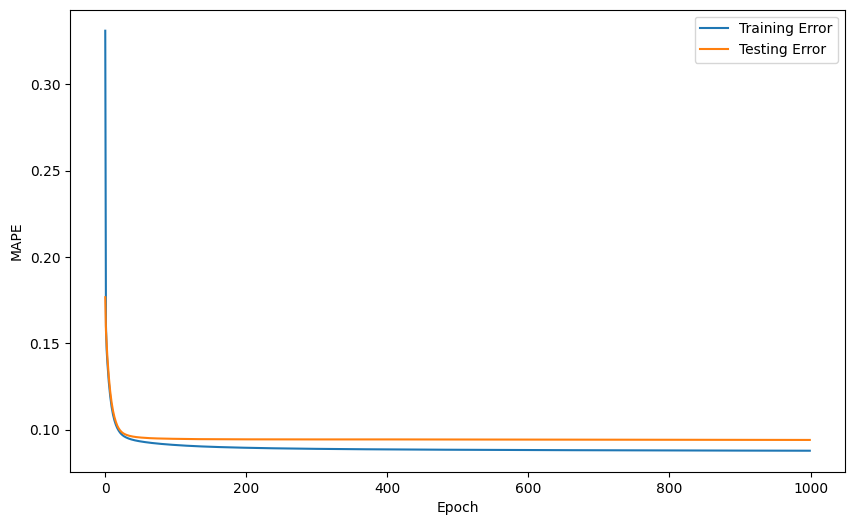

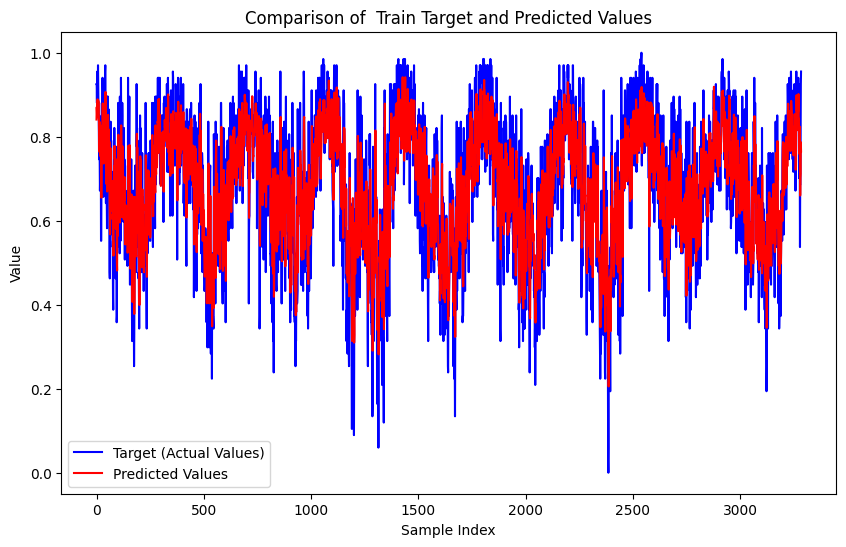

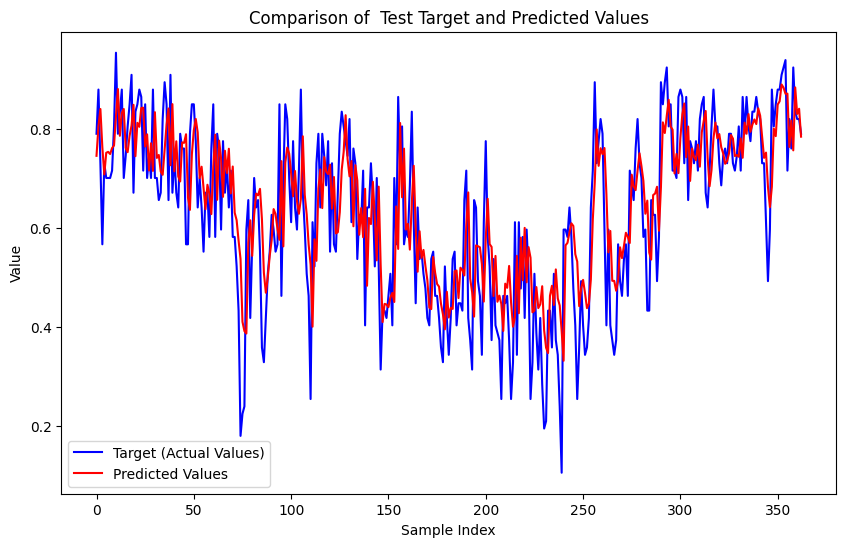

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,17]
Y_test_W = Y_test[:,17]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.00001
threshold = 0.001
epochs = 1000
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue


        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr, label='Training Error')
plt.plot(errors_te, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values')
plt.legend()
plt.show()


Optional section (BASEL city)

In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.09026750598352397
MEAN MAP of Test: 0.09514556814927619


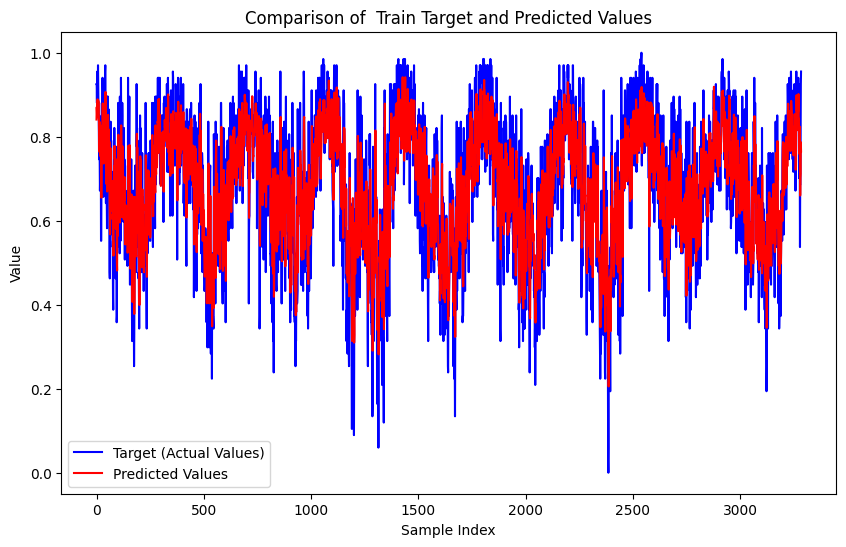

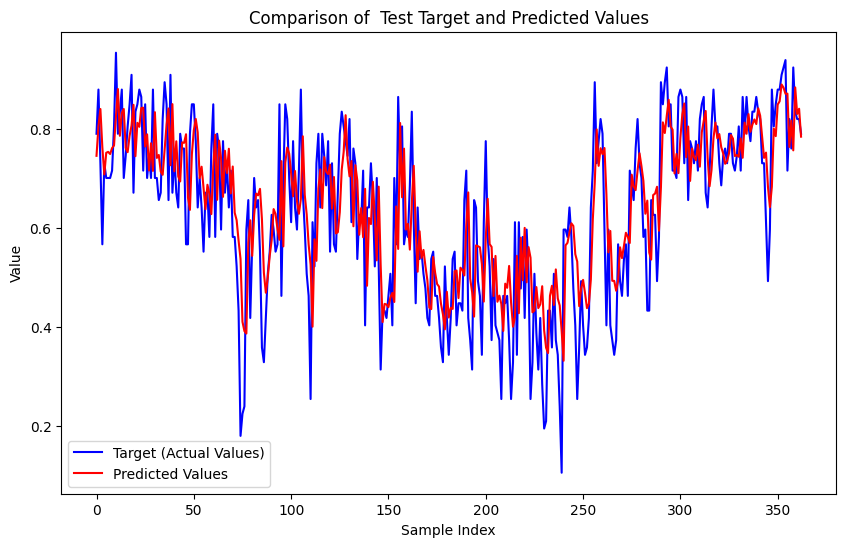

In [ ]:
Y_train_W = Y_train[:,25]
Y_test_W = Y_test[:,25]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values')
plt.legend()
plt.show()

1.3-Prediction Pressure

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


Training Progress:   0%|          | 3/1000 [00:00<00:34, 28.57it/s]

Epoch 1/1000 - MAP Train: 0.4400 | MAP Test: 0.1616
Epoch 2/1000 - MAP Train: 0.0899 | MAP Test: 0.0713
Epoch 3/1000 - MAP Train: 0.0680 | MAP Test: 0.0652
Epoch 4/1000 - MAP Train: 0.0648 | MAP Test: 0.0619
Epoch 5/1000 - MAP Train: 0.0619 | MAP Test: 0.0592
Epoch 6/1000 - MAP Train: 0.0594 | MAP Test: 0.0569


Training Progress:   1%|          | 10/1000 [00:00<00:40, 24.30it/s]

Epoch 7/1000 - MAP Train: 0.0571 | MAP Test: 0.0550
Epoch 8/1000 - MAP Train: 0.0551 | MAP Test: 0.0533
Epoch 9/1000 - MAP Train: 0.0533 | MAP Test: 0.0518
Epoch 10/1000 - MAP Train: 0.0517 | MAP Test: 0.0505
Epoch 11/1000 - MAP Train: 0.0503 | MAP Test: 0.0492
Epoch 12/1000 - MAP Train: 0.0491 | MAP Test: 0.0481


Training Progress:   2%|▏         | 16/1000 [00:00<00:44, 22.22it/s]

Epoch 13/1000 - MAP Train: 0.0480 | MAP Test: 0.0472
Epoch 14/1000 - MAP Train: 0.0470 | MAP Test: 0.0463
Epoch 15/1000 - MAP Train: 0.0461 | MAP Test: 0.0456
Epoch 16/1000 - MAP Train: 0.0453 | MAP Test: 0.0449


Training Progress:   2%|▏         | 19/1000 [00:00<00:48, 20.32it/s]

Epoch 17/1000 - MAP Train: 0.0446 | MAP Test: 0.0443
Epoch 18/1000 - MAP Train: 0.0439 | MAP Test: 0.0437
Epoch 19/1000 - MAP Train: 0.0433 | MAP Test: 0.0432


Training Progress:   2%|▏         | 19/1000 [00:01<00:48, 20.32it/s]

Epoch 20/1000 - MAP Train: 0.0427 | MAP Test: 0.0428
Epoch 21/1000 - MAP Train: 0.0421 | MAP Test: 0.0423


Training Progress:   2%|▏         | 22/1000 [00:01<01:29, 10.89it/s]

Epoch 22/1000 - MAP Train: 0.0416 | MAP Test: 0.0419
Epoch 23/1000 - MAP Train: 0.0411 | MAP Test: 0.0415


Training Progress:   3%|▎         | 26/1000 [00:01<01:32, 10.57it/s]

Epoch 24/1000 - MAP Train: 0.0406 | MAP Test: 0.0411
Epoch 25/1000 - MAP Train: 0.0402 | MAP Test: 0.0407
Epoch 26/1000 - MAP Train: 0.0397 | MAP Test: 0.0404


Training Progress:   3%|▎         | 28/1000 [00:02<01:42,  9.53it/s]

Epoch 27/1000 - MAP Train: 0.0393 | MAP Test: 0.0400
Epoch 28/1000 - MAP Train: 0.0389 | MAP Test: 0.0397


Training Progress:   3%|▎         | 30/1000 [00:02<01:56,  8.32it/s]

Epoch 29/1000 - MAP Train: 0.0385 | MAP Test: 0.0393
Epoch 30/1000 - MAP Train: 0.0382 | MAP Test: 0.0390


Training Progress:   3%|▎         | 31/1000 [00:02<02:17,  7.02it/s]

Epoch 31/1000 - MAP Train: 0.0378 | MAP Test: 0.0387


Training Progress:   3%|▎         | 32/1000 [00:02<02:39,  6.06it/s]

Epoch 32/1000 - MAP Train: 0.0375 | MAP Test: 0.0384


Training Progress:   3%|▎         | 34/1000 [00:03<02:58,  5.40it/s]

Epoch 33/1000 - MAP Train: 0.0371 | MAP Test: 0.0381
Epoch 34/1000 - MAP Train: 0.0368 | MAP Test: 0.0378


Training Progress:   4%|▎         | 36/1000 [00:03<02:53,  5.57it/s]

Epoch 35/1000 - MAP Train: 0.0365 | MAP Test: 0.0376
Epoch 36/1000 - MAP Train: 0.0361 | MAP Test: 0.0373


Training Progress:   4%|▍         | 38/1000 [00:04<02:39,  6.03it/s]

Epoch 37/1000 - MAP Train: 0.0358 | MAP Test: 0.0370
Epoch 38/1000 - MAP Train: 0.0355 | MAP Test: 0.0367
Epoch 39/1000 - MAP Train: 0.0352 | MAP Test: 0.0365


Training Progress:   4%|▍         | 42/1000 [00:04<01:32, 10.31it/s]

Epoch 40/1000 - MAP Train: 0.0349 | MAP Test: 0.0362
Epoch 41/1000 - MAP Train: 0.0346 | MAP Test: 0.0360
Epoch 42/1000 - MAP Train: 0.0343 | MAP Test: 0.0357
Epoch 43/1000 - MAP Train: 0.0341 | MAP Test: 0.0355


Training Progress:   5%|▍         | 46/1000 [00:04<01:12, 13.07it/s]

Epoch 44/1000 - MAP Train: 0.0338 | MAP Test: 0.0352
Epoch 45/1000 - MAP Train: 0.0335 | MAP Test: 0.0350
Epoch 46/1000 - MAP Train: 0.0333 | MAP Test: 0.0347
Epoch 47/1000 - MAP Train: 0.0330 | MAP Test: 0.0345


Training Progress:   5%|▌         | 50/1000 [00:04<01:08, 13.90it/s]

Epoch 48/1000 - MAP Train: 0.0328 | MAP Test: 0.0343
Epoch 49/1000 - MAP Train: 0.0325 | MAP Test: 0.0341
Epoch 50/1000 - MAP Train: 0.0323 | MAP Test: 0.0338


Training Progress:   5%|▌         | 52/1000 [00:05<01:07, 14.08it/s]

Epoch 51/1000 - MAP Train: 0.0320 | MAP Test: 0.0336
Epoch 52/1000 - MAP Train: 0.0318 | MAP Test: 0.0334
Epoch 53/1000 - MAP Train: 0.0315 | MAP Test: 0.0332
Epoch 54/1000 - MAP Train: 0.0313 | MAP Test: 0.0330


Training Progress:   6%|▌         | 57/1000 [00:05<00:56, 16.76it/s]

Epoch 55/1000 - MAP Train: 0.0311 | MAP Test: 0.0328
Epoch 56/1000 - MAP Train: 0.0309 | MAP Test: 0.0326
Epoch 57/1000 - MAP Train: 0.0306 | MAP Test: 0.0324
Epoch 58/1000 - MAP Train: 0.0304 | MAP Test: 0.0322


Training Progress:   6%|▌         | 61/1000 [00:05<00:55, 17.00it/s]

Epoch 59/1000 - MAP Train: 0.0302 | MAP Test: 0.0320
Epoch 60/1000 - MAP Train: 0.0300 | MAP Test: 0.0318
Epoch 61/1000 - MAP Train: 0.0298 | MAP Test: 0.0317
Epoch 62/1000 - MAP Train: 0.0296 | MAP Test: 0.0315


Training Progress:   7%|▋         | 66/1000 [00:05<00:51, 18.10it/s]

Epoch 63/1000 - MAP Train: 0.0294 | MAP Test: 0.0313
Epoch 64/1000 - MAP Train: 0.0292 | MAP Test: 0.0311
Epoch 65/1000 - MAP Train: 0.0290 | MAP Test: 0.0310
Epoch 66/1000 - MAP Train: 0.0289 | MAP Test: 0.0308


Training Progress:   7%|▋         | 71/1000 [00:05<00:47, 19.39it/s]

Epoch 67/1000 - MAP Train: 0.0287 | MAP Test: 0.0306
Epoch 68/1000 - MAP Train: 0.0285 | MAP Test: 0.0305
Epoch 69/1000 - MAP Train: 0.0283 | MAP Test: 0.0303
Epoch 70/1000 - MAP Train: 0.0281 | MAP Test: 0.0302
Epoch 71/1000 - MAP Train: 0.0280 | MAP Test: 0.0300


Training Progress:   7%|▋         | 73/1000 [00:06<00:49, 18.74it/s]

Epoch 72/1000 - MAP Train: 0.0278 | MAP Test: 0.0298
Epoch 73/1000 - MAP Train: 0.0276 | MAP Test: 0.0297
Epoch 74/1000 - MAP Train: 0.0275 | MAP Test: 0.0296


Training Progress:   8%|▊         | 77/1000 [00:06<01:15, 12.19it/s]

Epoch 75/1000 - MAP Train: 0.0273 | MAP Test: 0.0294
Epoch 76/1000 - MAP Train: 0.0272 | MAP Test: 0.0293
Epoch 77/1000 - MAP Train: 0.0270 | MAP Test: 0.0291


Training Progress:   8%|▊         | 79/1000 [00:06<01:14, 12.32it/s]

Epoch 78/1000 - MAP Train: 0.0269 | MAP Test: 0.0290
Epoch 79/1000 - MAP Train: 0.0267 | MAP Test: 0.0289
Epoch 80/1000 - MAP Train: 0.0266 | MAP Test: 0.0287


Training Progress:   8%|▊         | 83/1000 [00:07<01:22, 11.18it/s]

Epoch 81/1000 - MAP Train: 0.0264 | MAP Test: 0.0286
Epoch 82/1000 - MAP Train: 0.0263 | MAP Test: 0.0285
Epoch 83/1000 - MAP Train: 0.0261 | MAP Test: 0.0284


Training Progress:   9%|▊         | 87/1000 [00:07<01:14, 12.31it/s]

Epoch 84/1000 - MAP Train: 0.0260 | MAP Test: 0.0282
Epoch 85/1000 - MAP Train: 0.0259 | MAP Test: 0.0281
Epoch 86/1000 - MAP Train: 0.0257 | MAP Test: 0.0280
Epoch 87/1000 - MAP Train: 0.0256 | MAP Test: 0.0279


Training Progress:   9%|▉         | 90/1000 [00:07<01:04, 14.18it/s]

Epoch 88/1000 - MAP Train: 0.0255 | MAP Test: 0.0278
Epoch 89/1000 - MAP Train: 0.0254 | MAP Test: 0.0276
Epoch 90/1000 - MAP Train: 0.0252 | MAP Test: 0.0275
Epoch 91/1000 - MAP Train: 0.0251 | MAP Test: 0.0274


Training Progress:   9%|▉         | 92/1000 [00:07<01:05, 13.80it/s]

Epoch 92/1000 - MAP Train: 0.0250 | MAP Test: 0.0273
Epoch 93/1000 - MAP Train: 0.0249 | MAP Test: 0.0272


Training Progress:   9%|▉         | 94/1000 [00:07<01:20, 11.23it/s]

Epoch 94/1000 - MAP Train: 0.0248 | MAP Test: 0.0271


Training Progress:  10%|▉         | 96/1000 [00:08<01:58,  7.64it/s]

Epoch 95/1000 - MAP Train: 0.0246 | MAP Test: 0.0270
Epoch 96/1000 - MAP Train: 0.0245 | MAP Test: 0.0269


Training Progress:  10%|▉         | 99/1000 [00:08<01:37,  9.20it/s]

Epoch 97/1000 - MAP Train: 0.0244 | MAP Test: 0.0268
Epoch 98/1000 - MAP Train: 0.0243 | MAP Test: 0.0267
Epoch 99/1000 - MAP Train: 0.0242 | MAP Test: 0.0266


Training Progress:  10%|█         | 103/1000 [00:08<01:18, 11.41it/s]

Epoch 100/1000 - MAP Train: 0.0241 | MAP Test: 0.0265
Epoch 101/1000 - MAP Train: 0.0240 | MAP Test: 0.0264
Epoch 102/1000 - MAP Train: 0.0239 | MAP Test: 0.0263
Epoch 103/1000 - MAP Train: 0.0238 | MAP Test: 0.0262


Training Progress:  10%|█         | 105/1000 [00:09<01:11, 12.54it/s]

Epoch 104/1000 - MAP Train: 0.0237 | MAP Test: 0.0261
Epoch 105/1000 - MAP Train: 0.0236 | MAP Test: 0.0260
Epoch 106/1000 - MAP Train: 0.0235 | MAP Test: 0.0259


Training Progress:  11%|█         | 107/1000 [00:09<01:11, 12.50it/s]

Epoch 107/1000 - MAP Train: 0.0234 | MAP Test: 0.0258
Epoch 108/1000 - MAP Train: 0.0233 | MAP Test: 0.0257


Training Progress:  11%|█         | 111/1000 [00:09<01:22, 10.75it/s]

Epoch 109/1000 - MAP Train: 0.0232 | MAP Test: 0.0256
Epoch 110/1000 - MAP Train: 0.0231 | MAP Test: 0.0255
Epoch 111/1000 - MAP Train: 0.0231 | MAP Test: 0.0255


Training Progress:  11%|█▏        | 113/1000 [00:09<01:16, 11.55it/s]

Epoch 112/1000 - MAP Train: 0.0230 | MAP Test: 0.0254
Epoch 113/1000 - MAP Train: 0.0229 | MAP Test: 0.0253
Epoch 114/1000 - MAP Train: 0.0228 | MAP Test: 0.0252


Training Progress:  12%|█▏        | 115/1000 [00:10<01:26, 10.18it/s]

Epoch 115/1000 - MAP Train: 0.0227 | MAP Test: 0.0251
Epoch 116/1000 - MAP Train: 0.0226 | MAP Test: 0.0251


Training Progress:  12%|█▏        | 119/1000 [00:10<01:29,  9.90it/s]

Epoch 117/1000 - MAP Train: 0.0225 | MAP Test: 0.0250
Epoch 118/1000 - MAP Train: 0.0225 | MAP Test: 0.0249
Epoch 119/1000 - MAP Train: 0.0224 | MAP Test: 0.0248


Training Progress:  12%|█▏        | 121/1000 [00:10<01:19, 10.99it/s]

Epoch 120/1000 - MAP Train: 0.0223 | MAP Test: 0.0248
Epoch 121/1000 - MAP Train: 0.0222 | MAP Test: 0.0247
Epoch 122/1000 - MAP Train: 0.0221 | MAP Test: 0.0246
Epoch 123/1000 - MAP Train: 0.0221 | MAP Test: 0.0246


Training Progress:  12%|█▎        | 125/1000 [00:10<01:09, 12.58it/s]

Epoch 124/1000 - MAP Train: 0.0220 | MAP Test: 0.0245
Epoch 125/1000 - MAP Train: 0.0219 | MAP Test: 0.0244
Epoch 126/1000 - MAP Train: 0.0218 | MAP Test: 0.0243


Epoch 127/1000 - MAP Train: 0.0218 | MAP Test: 0.0243
Epoch 128/1000 - MAP Train: 0.0217 | MAP Test: 0.0242
Epoch 129/1000 - MAP Train: 0.0216 | MAP Test: 0.0241
Epoch 130/1000 - MAP Train: 0.0216 | MAP Test: 0.0241


Training Progress:  13%|█▎        | 133/1000 [00:11<01:01, 14.14it/s]

Epoch 131/1000 - MAP Train: 0.0215 | MAP Test: 0.0240
Epoch 132/1000 - MAP Train: 0.0214 | MAP Test: 0.0239
Epoch 133/1000 - MAP Train: 0.0214 | MAP Test: 0.0239


Training Progress:  14%|█▎        | 135/1000 [00:11<01:07, 12.75it/s]

Epoch 134/1000 - MAP Train: 0.0213 | MAP Test: 0.0238
Epoch 135/1000 - MAP Train: 0.0212 | MAP Test: 0.0238
Epoch 136/1000 - MAP Train: 0.0212 | MAP Test: 0.0237


Training Progress:  14%|█▎        | 137/1000 [00:11<01:10, 12.21it/s]

Epoch 137/1000 - MAP Train: 0.0211 | MAP Test: 0.0236
Epoch 138/1000 - MAP Train: 0.0210 | MAP Test: 0.0236


Training Progress:  14%|█▍        | 141/1000 [00:12<01:22, 10.37it/s]

Epoch 139/1000 - MAP Train: 0.0210 | MAP Test: 0.0235
Epoch 140/1000 - MAP Train: 0.0209 | MAP Test: 0.0234
Epoch 141/1000 - MAP Train: 0.0208 | MAP Test: 0.0234


Epoch 142/1000 - MAP Train: 0.0208 | MAP Test: 0.0233
Epoch 143/1000 - MAP Train: 0.0207 | MAP Test: 0.0233
Epoch 144/1000 - MAP Train: 0.0207 | MAP Test: 0.0232


Training Progress:  15%|█▍        | 147/1000 [00:12<01:05, 13.06it/s]

Epoch 145/1000 - MAP Train: 0.0206 | MAP Test: 0.0232
Epoch 146/1000 - MAP Train: 0.0205 | MAP Test: 0.0231
Epoch 147/1000 - MAP Train: 0.0205 | MAP Test: 0.0230
Epoch 148/1000 - MAP Train: 0.0204 | MAP Test: 0.0230


Training Progress:  15%|█▌        | 151/1000 [00:12<01:03, 13.35it/s]

Epoch 149/1000 - MAP Train: 0.0204 | MAP Test: 0.0229
Epoch 150/1000 - MAP Train: 0.0203 | MAP Test: 0.0229
Epoch 151/1000 - MAP Train: 0.0203 | MAP Test: 0.0228


Training Progress:  15%|█▌        | 153/1000 [00:13<01:01, 13.72it/s]

Epoch 152/1000 - MAP Train: 0.0202 | MAP Test: 0.0228
Epoch 153/1000 - MAP Train: 0.0202 | MAP Test: 0.0227
Epoch 154/1000 - MAP Train: 0.0201 | MAP Test: 0.0227


Training Progress:  16%|█▌        | 155/1000 [00:13<01:10, 12.03it/s]

Epoch 155/1000 - MAP Train: 0.0201 | MAP Test: 0.0226
Epoch 156/1000 - MAP Train: 0.0200 | MAP Test: 0.0226


Training Progress:  16%|█▌        | 159/1000 [00:13<01:18, 10.71it/s]

Epoch 157/1000 - MAP Train: 0.0200 | MAP Test: 0.0225
Epoch 158/1000 - MAP Train: 0.0199 | MAP Test: 0.0225
Epoch 159/1000 - MAP Train: 0.0198 | MAP Test: 0.0224
Epoch 160/1000 - MAP Train: 0.0198 | MAP Test: 0.0223


Training Progress:  16%|█▋        | 163/1000 [00:14<01:09, 12.12it/s]

Epoch 161/1000 - MAP Train: 0.0197 | MAP Test: 0.0223
Epoch 162/1000 - MAP Train: 0.0197 | MAP Test: 0.0222
Epoch 163/1000 - MAP Train: 0.0196 | MAP Test: 0.0222


Training Progress:  16%|█▋        | 165/1000 [00:14<01:14, 11.16it/s]

Epoch 164/1000 - MAP Train: 0.0196 | MAP Test: 0.0221
Epoch 165/1000 - MAP Train: 0.0196 | MAP Test: 0.0221
Epoch 166/1000 - MAP Train: 0.0195 | MAP Test: 0.0220


Training Progress:  17%|█▋        | 169/1000 [00:14<01:04, 12.83it/s]

Epoch 167/1000 - MAP Train: 0.0195 | MAP Test: 0.0220
Epoch 168/1000 - MAP Train: 0.0194 | MAP Test: 0.0220
Epoch 169/1000 - MAP Train: 0.0194 | MAP Test: 0.0219
Epoch 170/1000 - MAP Train: 0.0193 | MAP Test: 0.0219


Training Progress:  17%|█▋        | 173/1000 [00:14<00:58, 14.21it/s]

Epoch 171/1000 - MAP Train: 0.0193 | MAP Test: 0.0218
Epoch 172/1000 - MAP Train: 0.0192 | MAP Test: 0.0218
Epoch 173/1000 - MAP Train: 0.0192 | MAP Test: 0.0217
Epoch 174/1000 - MAP Train: 0.0191 | MAP Test: 0.0217


Training Progress:  18%|█▊        | 175/1000 [00:15<01:00, 13.59it/s]

Epoch 175/1000 - MAP Train: 0.0191 | MAP Test: 0.0216
Epoch 176/1000 - MAP Train: 0.0191 | MAP Test: 0.0216


Training Progress:  18%|█▊        | 177/1000 [00:15<01:14, 10.98it/s]

Epoch 177/1000 - MAP Train: 0.0190 | MAP Test: 0.0215
Epoch 178/1000 - MAP Train: 0.0190 | MAP Test: 0.0215


Training Progress:  18%|█▊        | 181/1000 [00:15<01:10, 11.64it/s]

Epoch 179/1000 - MAP Train: 0.0189 | MAP Test: 0.0214
Epoch 180/1000 - MAP Train: 0.0189 | MAP Test: 0.0214
Epoch 181/1000 - MAP Train: 0.0188 | MAP Test: 0.0214
Epoch 182/1000 - MAP Train: 0.0188 | MAP Test: 0.0213


Training Progress:  18%|█▊        | 183/1000 [00:15<01:08, 11.86it/s]

Epoch 183/1000 - MAP Train: 0.0188 | MAP Test: 0.0213
Epoch 184/1000 - MAP Train: 0.0187 | MAP Test: 0.0212


Training Progress:  18%|█▊        | 185/1000 [00:16<01:22,  9.86it/s]

Epoch 185/1000 - MAP Train: 0.0187 | MAP Test: 0.0212
Epoch 186/1000 - MAP Train: 0.0186 | MAP Test: 0.0211


Training Progress:  19%|█▉        | 188/1000 [00:16<01:44,  7.79it/s]

Epoch 187/1000 - MAP Train: 0.0186 | MAP Test: 0.0211
Epoch 188/1000 - MAP Train: 0.0186 | MAP Test: 0.0211


Training Progress:  19%|█▉        | 190/1000 [00:16<01:30,  8.91it/s]

Epoch 189/1000 - MAP Train: 0.0185 | MAP Test: 0.0210
Epoch 190/1000 - MAP Train: 0.0185 | MAP Test: 0.0210
Epoch 191/1000 - MAP Train: 0.0184 | MAP Test: 0.0209


Training Progress:  19%|█▉        | 193/1000 [00:17<01:34,  8.56it/s]

Epoch 192/1000 - MAP Train: 0.0184 | MAP Test: 0.0209
Epoch 193/1000 - MAP Train: 0.0184 | MAP Test: 0.0208


Training Progress:  20%|█▉        | 195/1000 [00:17<01:35,  8.43it/s]

Epoch 194/1000 - MAP Train: 0.0183 | MAP Test: 0.0208
Epoch 195/1000 - MAP Train: 0.0183 | MAP Test: 0.0208


Training Progress:  20%|█▉        | 197/1000 [00:17<01:29,  9.02it/s]

Epoch 196/1000 - MAP Train: 0.0182 | MAP Test: 0.0207
Epoch 197/1000 - MAP Train: 0.0182 | MAP Test: 0.0207


Training Progress:  20%|█▉        | 199/1000 [00:17<01:26,  9.31it/s]

Epoch 198/1000 - MAP Train: 0.0182 | MAP Test: 0.0206
Epoch 199/1000 - MAP Train: 0.0181 | MAP Test: 0.0206


Training Progress:  20%|██        | 201/1000 [00:17<01:26,  9.23it/s]

Epoch 200/1000 - MAP Train: 0.0181 | MAP Test: 0.0206
Epoch 201/1000 - MAP Train: 0.0181 | MAP Test: 0.0205


Training Progress:  20%|██        | 203/1000 [00:18<01:59,  6.66it/s]

Epoch 202/1000 - MAP Train: 0.0180 | MAP Test: 0.0205
Epoch 203/1000 - MAP Train: 0.0180 | MAP Test: 0.0204


Training Progress:  21%|██        | 206/1000 [00:18<01:29,  8.84it/s]

Epoch 204/1000 - MAP Train: 0.0180 | MAP Test: 0.0204
Epoch 205/1000 - MAP Train: 0.0179 | MAP Test: 0.0204
Epoch 206/1000 - MAP Train: 0.0179 | MAP Test: 0.0203


Training Progress:  21%|██        | 210/1000 [00:18<01:05, 12.14it/s]

Epoch 207/1000 - MAP Train: 0.0179 | MAP Test: 0.0203
Epoch 208/1000 - MAP Train: 0.0178 | MAP Test: 0.0202
Epoch 209/1000 - MAP Train: 0.0178 | MAP Test: 0.0202
Epoch 210/1000 - MAP Train: 0.0177 | MAP Test: 0.0202


Training Progress:  21%|██▏       | 214/1000 [00:19<00:53, 14.58it/s]

Epoch 211/1000 - MAP Train: 0.0177 | MAP Test: 0.0201
Epoch 212/1000 - MAP Train: 0.0177 | MAP Test: 0.0201
Epoch 213/1000 - MAP Train: 0.0176 | MAP Test: 0.0201
Epoch 214/1000 - MAP Train: 0.0176 | MAP Test: 0.0200


Training Progress:  22%|██▏       | 216/1000 [00:19<00:50, 15.44it/s]

Epoch 215/1000 - MAP Train: 0.0176 | MAP Test: 0.0200
Epoch 216/1000 - MAP Train: 0.0175 | MAP Test: 0.0199
Epoch 217/1000 - MAP Train: 0.0175 | MAP Test: 0.0199


Epoch 218/1000 - MAP Train: 0.0175 | MAP Test: 0.0199
Epoch 219/1000 - MAP Train: 0.0175 | MAP Test: 0.0198
Epoch 220/1000 - MAP Train: 0.0174 | MAP Test: 0.0198


Training Progress:  22%|██▏       | 222/1000 [00:19<00:54, 14.19it/s]

Epoch 221/1000 - MAP Train: 0.0174 | MAP Test: 0.0198
Epoch 222/1000 - MAP Train: 0.0174 | MAP Test: 0.0197
Epoch 223/1000 - MAP Train: 0.0173 | MAP Test: 0.0197


Training Progress:  23%|██▎       | 226/1000 [00:19<00:55, 13.95it/s]

Epoch 224/1000 - MAP Train: 0.0173 | MAP Test: 0.0196
Epoch 225/1000 - MAP Train: 0.0173 | MAP Test: 0.0196
Epoch 226/1000 - MAP Train: 0.0172 | MAP Test: 0.0196


Training Progress:  23%|██▎       | 228/1000 [00:20<01:01, 12.45it/s]

Epoch 227/1000 - MAP Train: 0.0172 | MAP Test: 0.0195
Epoch 228/1000 - MAP Train: 0.0172 | MAP Test: 0.0195


Training Progress:  23%|██▎       | 230/1000 [00:20<01:12, 10.68it/s]

Epoch 229/1000 - MAP Train: 0.0171 | MAP Test: 0.0195
Epoch 230/1000 - MAP Train: 0.0171 | MAP Test: 0.0194


Training Progress:  23%|██▎       | 232/1000 [00:20<01:09, 11.01it/s]

Epoch 231/1000 - MAP Train: 0.0171 | MAP Test: 0.0194
Epoch 232/1000 - MAP Train: 0.0171 | MAP Test: 0.0194
Epoch 233/1000 - MAP Train: 0.0170 | MAP Test: 0.0193
Epoch 234/1000 - MAP Train: 0.0170 | MAP Test: 0.0193


Epoch 235/1000 - MAP Train: 0.0170 | MAP Test: 0.0193
Epoch 236/1000 - MAP Train: 0.0169 | MAP Test: 0.0192
Epoch 237/1000 - MAP Train: 0.0169 | MAP Test: 0.0192


Training Progress:  24%|██▍       | 238/1000 [00:21<01:00, 12.62it/s]

Epoch 238/1000 - MAP Train: 0.0169 | MAP Test: 0.0192
Epoch 239/1000 - MAP Train: 0.0168 | MAP Test: 0.0191


Training Progress:  24%|██▍       | 242/1000 [00:21<01:10, 10.82it/s]

Epoch 240/1000 - MAP Train: 0.0168 | MAP Test: 0.0191
Epoch 241/1000 - MAP Train: 0.0168 | MAP Test: 0.0191
Epoch 242/1000 - MAP Train: 0.0168 | MAP Test: 0.0190


Training Progress:  24%|██▍       | 244/1000 [00:21<01:13, 10.34it/s]

Epoch 243/1000 - MAP Train: 0.0167 | MAP Test: 0.0190
Epoch 244/1000 - MAP Train: 0.0167 | MAP Test: 0.0190
Epoch 245/1000 - MAP Train: 0.0167 | MAP Test: 0.0189


Training Progress:  25%|██▍       | 248/1000 [00:21<01:04, 11.65it/s]

Epoch 246/1000 - MAP Train: 0.0166 | MAP Test: 0.0189
Epoch 247/1000 - MAP Train: 0.0166 | MAP Test: 0.0189
Epoch 248/1000 - MAP Train: 0.0166 | MAP Test: 0.0188


Training Progress:  25%|██▌       | 250/1000 [00:22<01:03, 11.75it/s]

Epoch 249/1000 - MAP Train: 0.0166 | MAP Test: 0.0188
Epoch 250/1000 - MAP Train: 0.0165 | MAP Test: 0.0188
Epoch 251/1000 - MAP Train: 0.0165 | MAP Test: 0.0187


Training Progress:  25%|██▌       | 252/1000 [00:22<01:08, 11.00it/s]

Epoch 252/1000 - MAP Train: 0.0165 | MAP Test: 0.0187
Epoch 253/1000 - MAP Train: 0.0165 | MAP Test: 0.0187


Training Progress:  26%|██▌       | 256/1000 [00:22<01:05, 11.44it/s]

Epoch 254/1000 - MAP Train: 0.0164 | MAP Test: 0.0187
Epoch 255/1000 - MAP Train: 0.0164 | MAP Test: 0.0186
Epoch 256/1000 - MAP Train: 0.0164 | MAP Test: 0.0186
Epoch 257/1000 - MAP Train: 0.0164 | MAP Test: 0.0186


Training Progress:  26%|██▌       | 260/1000 [00:22<00:59, 12.52it/s]

Epoch 258/1000 - MAP Train: 0.0163 | MAP Test: 0.0185
Epoch 259/1000 - MAP Train: 0.0163 | MAP Test: 0.0185
Epoch 260/1000 - MAP Train: 0.0163 | MAP Test: 0.0185


Training Progress:  26%|██▋       | 264/1000 [00:23<00:52, 13.98it/s]

Epoch 261/1000 - MAP Train: 0.0163 | MAP Test: 0.0184
Epoch 262/1000 - MAP Train: 0.0162 | MAP Test: 0.0184
Epoch 263/1000 - MAP Train: 0.0162 | MAP Test: 0.0184
Epoch 264/1000 - MAP Train: 0.0162 | MAP Test: 0.0183


Training Progress:  27%|██▋       | 268/1000 [00:23<00:47, 15.28it/s]

Epoch 265/1000 - MAP Train: 0.0161 | MAP Test: 0.0183
Epoch 266/1000 - MAP Train: 0.0161 | MAP Test: 0.0183
Epoch 267/1000 - MAP Train: 0.0161 | MAP Test: 0.0183
Epoch 268/1000 - MAP Train: 0.0161 | MAP Test: 0.0182


Training Progress:  27%|██▋       | 270/1000 [00:23<00:49, 14.78it/s]

Epoch 269/1000 - MAP Train: 0.0160 | MAP Test: 0.0182
Epoch 270/1000 - MAP Train: 0.0160 | MAP Test: 0.0182
Epoch 271/1000 - MAP Train: 0.0160 | MAP Test: 0.0181


Training Progress:  27%|██▋       | 274/1000 [00:23<00:49, 14.67it/s]

Epoch 272/1000 - MAP Train: 0.0160 | MAP Test: 0.0181
Epoch 273/1000 - MAP Train: 0.0160 | MAP Test: 0.0181
Epoch 274/1000 - MAP Train: 0.0159 | MAP Test: 0.0181


Training Progress:  28%|██▊       | 276/1000 [00:24<01:06, 10.85it/s]

Epoch 275/1000 - MAP Train: 0.0159 | MAP Test: 0.0180
Epoch 276/1000 - MAP Train: 0.0159 | MAP Test: 0.0180


Training Progress:  28%|██▊       | 278/1000 [00:24<01:12,  9.90it/s]

Epoch 277/1000 - MAP Train: 0.0159 | MAP Test: 0.0180
Epoch 278/1000 - MAP Train: 0.0158 | MAP Test: 0.0179
Epoch 279/1000 - MAP Train: 0.0158 | MAP Test: 0.0179


Epoch 280/1000 - MAP Train: 0.0158 | MAP Test: 0.0179
Epoch 281/1000 - MAP Train: 0.0158 | MAP Test: 0.0179
Epoch 282/1000 - MAP Train: 0.0157 | MAP Test: 0.0178


Training Progress:  29%|██▊       | 287/1000 [00:24<00:45, 15.72it/s]

Epoch 283/1000 - MAP Train: 0.0157 | MAP Test: 0.0178
Epoch 284/1000 - MAP Train: 0.0157 | MAP Test: 0.0178
Epoch 285/1000 - MAP Train: 0.0157 | MAP Test: 0.0177
Epoch 286/1000 - MAP Train: 0.0156 | MAP Test: 0.0177
Epoch 287/1000 - MAP Train: 0.0156 | MAP Test: 0.0177


Training Progress:  29%|██▉       | 290/1000 [00:25<00:40, 17.62it/s]

Epoch 288/1000 - MAP Train: 0.0156 | MAP Test: 0.0177
Epoch 289/1000 - MAP Train: 0.0156 | MAP Test: 0.0176
Epoch 290/1000 - MAP Train: 0.0156 | MAP Test: 0.0176
Epoch 291/1000 - MAP Train: 0.0155 | MAP Test: 0.0176


Training Progress:  29%|██▉       | 294/1000 [00:25<00:49, 14.31it/s]

Epoch 292/1000 - MAP Train: 0.0155 | MAP Test: 0.0175
Epoch 293/1000 - MAP Train: 0.0155 | MAP Test: 0.0175
Epoch 294/1000 - MAP Train: 0.0155 | MAP Test: 0.0175


Training Progress:  30%|██▉       | 296/1000 [00:25<00:51, 13.61it/s]

Epoch 295/1000 - MAP Train: 0.0154 | MAP Test: 0.0175
Epoch 296/1000 - MAP Train: 0.0154 | MAP Test: 0.0174
Epoch 297/1000 - MAP Train: 0.0154 | MAP Test: 0.0174


Training Progress:  30%|███       | 300/1000 [00:25<00:50, 13.77it/s]

Epoch 298/1000 - MAP Train: 0.0154 | MAP Test: 0.0174
Epoch 299/1000 - MAP Train: 0.0154 | MAP Test: 0.0174
Epoch 300/1000 - MAP Train: 0.0153 | MAP Test: 0.0173


Training Progress:  30%|███       | 302/1000 [00:26<00:49, 14.08it/s]

Epoch 301/1000 - MAP Train: 0.0153 | MAP Test: 0.0173
Epoch 302/1000 - MAP Train: 0.0153 | MAP Test: 0.0173
Epoch 303/1000 - MAP Train: 0.0153 | MAP Test: 0.0173


Training Progress:  30%|███       | 304/1000 [00:26<01:01, 11.35it/s]

Epoch 304/1000 - MAP Train: 0.0152 | MAP Test: 0.0172
Epoch 305/1000 - MAP Train: 0.0152 | MAP Test: 0.0172


Training Progress:  31%|███       | 308/1000 [00:26<01:01, 11.21it/s]

Epoch 306/1000 - MAP Train: 0.0152 | MAP Test: 0.0172
Epoch 307/1000 - MAP Train: 0.0152 | MAP Test: 0.0172
Epoch 308/1000 - MAP Train: 0.0152 | MAP Test: 0.0171


Training Progress:  31%|███       | 312/1000 [00:26<00:52, 13.17it/s]

Epoch 309/1000 - MAP Train: 0.0151 | MAP Test: 0.0171
Epoch 310/1000 - MAP Train: 0.0151 | MAP Test: 0.0171
Epoch 311/1000 - MAP Train: 0.0151 | MAP Test: 0.0171
Epoch 312/1000 - MAP Train: 0.0151 | MAP Test: 0.0170


Training Progress:  32%|███▏      | 316/1000 [00:27<00:48, 14.18it/s]

Epoch 313/1000 - MAP Train: 0.0151 | MAP Test: 0.0170
Epoch 314/1000 - MAP Train: 0.0150 | MAP Test: 0.0170
Epoch 315/1000 - MAP Train: 0.0150 | MAP Test: 0.0170
Epoch 316/1000 - MAP Train: 0.0150 | MAP Test: 0.0169


Training Progress:  32%|███▏      | 318/1000 [00:27<00:48, 14.18it/s]

Epoch 317/1000 - MAP Train: 0.0150 | MAP Test: 0.0169
Epoch 318/1000 - MAP Train: 0.0150 | MAP Test: 0.0169
Epoch 319/1000 - MAP Train: 0.0149 | MAP Test: 0.0169


Training Progress:  32%|███▏      | 322/1000 [00:27<00:49, 13.77it/s]

Epoch 320/1000 - MAP Train: 0.0149 | MAP Test: 0.0168
Epoch 321/1000 - MAP Train: 0.0149 | MAP Test: 0.0168
Epoch 322/1000 - MAP Train: 0.0149 | MAP Test: 0.0168


Training Progress:  33%|███▎      | 326/1000 [00:27<00:47, 14.17it/s]

Epoch 323/1000 - MAP Train: 0.0149 | MAP Test: 0.0168
Epoch 324/1000 - MAP Train: 0.0148 | MAP Test: 0.0167
Epoch 325/1000 - MAP Train: 0.0148 | MAP Test: 0.0167
Epoch 326/1000 - MAP Train: 0.0148 | MAP Test: 0.0167


Training Progress:  33%|███▎      | 330/1000 [00:28<00:45, 14.73it/s]

Epoch 327/1000 - MAP Train: 0.0148 | MAP Test: 0.0167
Epoch 328/1000 - MAP Train: 0.0148 | MAP Test: 0.0166
Epoch 329/1000 - MAP Train: 0.0147 | MAP Test: 0.0166
Epoch 330/1000 - MAP Train: 0.0147 | MAP Test: 0.0166


Training Progress:  33%|███▎      | 334/1000 [00:28<00:43, 15.30it/s]

Epoch 331/1000 - MAP Train: 0.0147 | MAP Test: 0.0166
Epoch 332/1000 - MAP Train: 0.0147 | MAP Test: 0.0165
Epoch 333/1000 - MAP Train: 0.0147 | MAP Test: 0.0165
Epoch 334/1000 - MAP Train: 0.0146 | MAP Test: 0.0165


Training Progress:  34%|███▎      | 336/1000 [00:28<00:50, 13.25it/s]

Epoch 335/1000 - MAP Train: 0.0146 | MAP Test: 0.0165
Epoch 336/1000 - MAP Train: 0.0146 | MAP Test: 0.0164


Training Progress:  34%|███▍      | 338/1000 [00:28<01:04, 10.29it/s]

Epoch 337/1000 - MAP Train: 0.0146 | MAP Test: 0.0164
Epoch 338/1000 - MAP Train: 0.0146 | MAP Test: 0.0164


Training Progress:  34%|███▍      | 338/1000 [00:29<01:04, 10.29it/s]

Epoch 339/1000 - MAP Train: 0.0146 | MAP Test: 0.0164


Training Progress:  34%|███▍      | 341/1000 [00:29<01:31,  7.17it/s]

Epoch 340/1000 - MAP Train: 0.0145 | MAP Test: 0.0164
Epoch 341/1000 - MAP Train: 0.0145 | MAP Test: 0.0163


Training Progress:  34%|███▍      | 344/1000 [00:29<01:17,  8.42it/s]

Epoch 342/1000 - MAP Train: 0.0145 | MAP Test: 0.0163
Epoch 343/1000 - MAP Train: 0.0145 | MAP Test: 0.0163
Epoch 344/1000 - MAP Train: 0.0145 | MAP Test: 0.0163


Training Progress:  35%|███▍      | 348/1000 [00:30<00:58, 11.10it/s]

Epoch 345/1000 - MAP Train: 0.0144 | MAP Test: 0.0162
Epoch 346/1000 - MAP Train: 0.0144 | MAP Test: 0.0162
Epoch 347/1000 - MAP Train: 0.0144 | MAP Test: 0.0162
Epoch 348/1000 - MAP Train: 0.0144 | MAP Test: 0.0162


Training Progress:  35%|███▌      | 350/1000 [00:30<01:01, 10.51it/s]

Epoch 349/1000 - MAP Train: 0.0144 | MAP Test: 0.0162
Epoch 350/1000 - MAP Train: 0.0144 | MAP Test: 0.0161


Training Progress:  35%|███▌      | 352/1000 [00:30<01:11,  9.02it/s]

Epoch 351/1000 - MAP Train: 0.0143 | MAP Test: 0.0161
Epoch 352/1000 - MAP Train: 0.0143 | MAP Test: 0.0161


Training Progress:  35%|███▌      | 354/1000 [00:30<01:13,  8.79it/s]

Epoch 353/1000 - MAP Train: 0.0143 | MAP Test: 0.0161
Epoch 354/1000 - MAP Train: 0.0143 | MAP Test: 0.0160


Training Progress:  36%|███▌      | 355/1000 [00:31<01:18,  8.18it/s]

Epoch 355/1000 - MAP Train: 0.0143 | MAP Test: 0.0160


Training Progress:  36%|███▌      | 356/1000 [00:31<01:40,  6.43it/s]

Epoch 356/1000 - MAP Train: 0.0142 | MAP Test: 0.0160


Training Progress:  36%|███▌      | 357/1000 [00:31<01:46,  6.04it/s]

Epoch 357/1000 - MAP Train: 0.0142 | MAP Test: 0.0160


Training Progress:  36%|███▌      | 359/1000 [00:31<01:56,  5.48it/s]

Epoch 358/1000 - MAP Train: 0.0142 | MAP Test: 0.0160
Epoch 359/1000 - MAP Train: 0.0142 | MAP Test: 0.0159


Training Progress:  36%|███▌      | 361/1000 [00:32<01:35,  6.71it/s]

Epoch 360/1000 - MAP Train: 0.0142 | MAP Test: 0.0159
Epoch 361/1000 - MAP Train: 0.0142 | MAP Test: 0.0159


Epoch 362/1000 - MAP Train: 0.0141 | MAP Test: 0.0159
Epoch 363/1000 - MAP Train: 0.0141 | MAP Test: 0.0159
Epoch 364/1000 - MAP Train: 0.0141 | MAP Test: 0.0158


Epoch 365/1000 - MAP Train: 0.0141 | MAP Test: 0.0158
Epoch 366/1000 - MAP Train: 0.0141 | MAP Test: 0.0158
Epoch 367/1000 - MAP Train: 0.0141 | MAP Test: 0.0158


Training Progress:  37%|███▋      | 370/1000 [00:32<00:52, 11.91it/s]

Epoch 368/1000 - MAP Train: 0.0140 | MAP Test: 0.0158
Epoch 369/1000 - MAP Train: 0.0140 | MAP Test: 0.0157
Epoch 370/1000 - MAP Train: 0.0140 | MAP Test: 0.0157


Training Progress:  37%|███▋      | 372/1000 [00:33<00:50, 12.35it/s]

Epoch 371/1000 - MAP Train: 0.0140 | MAP Test: 0.0157
Epoch 372/1000 - MAP Train: 0.0140 | MAP Test: 0.0157
Epoch 373/1000 - MAP Train: 0.0140 | MAP Test: 0.0156


Training Progress:  38%|███▊      | 376/1000 [00:33<00:48, 12.88it/s]

Epoch 374/1000 - MAP Train: 0.0139 | MAP Test: 0.0156
Epoch 375/1000 - MAP Train: 0.0139 | MAP Test: 0.0156
Epoch 376/1000 - MAP Train: 0.0139 | MAP Test: 0.0156


Training Progress:  38%|███▊      | 380/1000 [00:33<00:46, 13.46it/s]

Epoch 377/1000 - MAP Train: 0.0139 | MAP Test: 0.0156
Epoch 378/1000 - MAP Train: 0.0139 | MAP Test: 0.0155
Epoch 379/1000 - MAP Train: 0.0139 | MAP Test: 0.0155
Epoch 380/1000 - MAP Train: 0.0138 | MAP Test: 0.0155


Epoch 381/1000 - MAP Train: 0.0138 | MAP Test: 0.0155
Epoch 382/1000 - MAP Train: 0.0138 | MAP Test: 0.0155
Epoch 383/1000 - MAP Train: 0.0138 | MAP Test: 0.0155


Training Progress:  39%|███▊      | 386/1000 [00:33<00:42, 14.34it/s]

Epoch 384/1000 - MAP Train: 0.0138 | MAP Test: 0.0154
Epoch 385/1000 - MAP Train: 0.0138 | MAP Test: 0.0154
Epoch 386/1000 - MAP Train: 0.0138 | MAP Test: 0.0154


Training Progress:  39%|███▉      | 388/1000 [00:34<00:55, 11.01it/s]

Epoch 387/1000 - MAP Train: 0.0137 | MAP Test: 0.0154
Epoch 388/1000 - MAP Train: 0.0137 | MAP Test: 0.0154


Training Progress:  39%|███▉      | 390/1000 [00:34<01:01,  9.97it/s]

Epoch 389/1000 - MAP Train: 0.0137 | MAP Test: 0.0153
Epoch 390/1000 - MAP Train: 0.0137 | MAP Test: 0.0153
Epoch 391/1000 - MAP Train: 0.0137 | MAP Test: 0.0153


Training Progress:  39%|███▉      | 394/1000 [00:34<00:51, 11.81it/s]

Epoch 392/1000 - MAP Train: 0.0137 | MAP Test: 0.0153
Epoch 393/1000 - MAP Train: 0.0136 | MAP Test: 0.0153
Epoch 394/1000 - MAP Train: 0.0136 | MAP Test: 0.0152
Epoch 395/1000 - MAP Train: 0.0136 | MAP Test: 0.0152


Training Progress:  40%|███▉      | 398/1000 [00:35<00:48, 12.39it/s]

Epoch 396/1000 - MAP Train: 0.0136 | MAP Test: 0.0152
Epoch 397/1000 - MAP Train: 0.0136 | MAP Test: 0.0152
Epoch 398/1000 - MAP Train: 0.0136 | MAP Test: 0.0152


Epoch 399/1000 - MAP Train: 0.0136 | MAP Test: 0.0151
Epoch 400/1000 - MAP Train: 0.0135 | MAP Test: 0.0151
Epoch 401/1000 - MAP Train: 0.0135 | MAP Test: 0.0151


Training Progress:  40%|████      | 404/1000 [00:35<00:46, 12.93it/s]

Epoch 402/1000 - MAP Train: 0.0135 | MAP Test: 0.0151
Epoch 403/1000 - MAP Train: 0.0135 | MAP Test: 0.0151
Epoch 404/1000 - MAP Train: 0.0135 | MAP Test: 0.0151


Training Progress:  41%|████      | 406/1000 [00:35<00:44, 13.29it/s]

Epoch 405/1000 - MAP Train: 0.0135 | MAP Test: 0.0150
Epoch 406/1000 - MAP Train: 0.0135 | MAP Test: 0.0150
Epoch 407/1000 - MAP Train: 0.0134 | MAP Test: 0.0150


Training Progress:  41%|████      | 410/1000 [00:36<00:41, 14.16it/s]

Epoch 408/1000 - MAP Train: 0.0134 | MAP Test: 0.0150
Epoch 409/1000 - MAP Train: 0.0134 | MAP Test: 0.0150
Epoch 410/1000 - MAP Train: 0.0134 | MAP Test: 0.0149
Epoch 411/1000 - MAP Train: 0.0134 | MAP Test: 0.0149


Training Progress:  41%|████      | 412/1000 [00:36<00:41, 14.25it/s]

Epoch 412/1000 - MAP Train: 0.0134 | MAP Test: 0.0149
Epoch 413/1000 - MAP Train: 0.0134 | MAP Test: 0.0149


Training Progress:  41%|████▏     | 414/1000 [00:36<00:48, 12.06it/s]

Epoch 414/1000 - MAP Train: 0.0133 | MAP Test: 0.0149
Epoch 415/1000 - MAP Train: 0.0133 | MAP Test: 0.0149


Training Progress:  42%|████▏     | 416/1000 [00:36<00:56, 10.26it/s]

Epoch 416/1000 - MAP Train: 0.0133 | MAP Test: 0.0148
Epoch 417/1000 - MAP Train: 0.0133 | MAP Test: 0.0148
Epoch 418/1000 - MAP Train: 0.0133 | MAP Test: 0.0148


Training Progress:  42%|████▏     | 420/1000 [00:37<00:53, 10.82it/s]

Epoch 419/1000 - MAP Train: 0.0133 | MAP Test: 0.0148
Epoch 420/1000 - MAP Train: 0.0133 | MAP Test: 0.0148
Epoch 421/1000 - MAP Train: 0.0132 | MAP Test: 0.0148


Training Progress:  42%|████▏     | 424/1000 [00:37<00:49, 11.66it/s]

Epoch 422/1000 - MAP Train: 0.0132 | MAP Test: 0.0147
Epoch 423/1000 - MAP Train: 0.0132 | MAP Test: 0.0147
Epoch 424/1000 - MAP Train: 0.0132 | MAP Test: 0.0147


Training Progress:  43%|████▎     | 426/1000 [00:37<00:48, 11.76it/s]

Epoch 425/1000 - MAP Train: 0.0132 | MAP Test: 0.0147
Epoch 426/1000 - MAP Train: 0.0132 | MAP Test: 0.0147
Epoch 427/1000 - MAP Train: 0.0132 | MAP Test: 0.0147


Training Progress:  43%|████▎     | 430/1000 [00:37<00:43, 13.18it/s]

Epoch 428/1000 - MAP Train: 0.0131 | MAP Test: 0.0146
Epoch 429/1000 - MAP Train: 0.0131 | MAP Test: 0.0146
Epoch 430/1000 - MAP Train: 0.0131 | MAP Test: 0.0146
Epoch 431/1000 - MAP Train: 0.0131 | MAP Test: 0.0146


Training Progress:  43%|████▎     | 434/1000 [00:37<00:41, 13.56it/s]

Epoch 432/1000 - MAP Train: 0.0131 | MAP Test: 0.0146
Epoch 433/1000 - MAP Train: 0.0131 | MAP Test: 0.0146
Epoch 434/1000 - MAP Train: 0.0131 | MAP Test: 0.0145


Training Progress:  44%|████▎     | 436/1000 [00:38<00:41, 13.74it/s]

Epoch 435/1000 - MAP Train: 0.0130 | MAP Test: 0.0145
Epoch 436/1000 - MAP Train: 0.0130 | MAP Test: 0.0145
Epoch 437/1000 - MAP Train: 0.0130 | MAP Test: 0.0145


Training Progress:  44%|████▍     | 440/1000 [00:38<00:44, 12.58it/s]

Epoch 438/1000 - MAP Train: 0.0130 | MAP Test: 0.0145
Epoch 439/1000 - MAP Train: 0.0130 | MAP Test: 0.0145
Epoch 440/1000 - MAP Train: 0.0130 | MAP Test: 0.0144


Training Progress:  44%|████▍     | 442/1000 [00:38<00:44, 12.50it/s]

Epoch 441/1000 - MAP Train: 0.0130 | MAP Test: 0.0144
Epoch 442/1000 - MAP Train: 0.0130 | MAP Test: 0.0144
Epoch 443/1000 - MAP Train: 0.0129 | MAP Test: 0.0144


Training Progress:  45%|████▍     | 446/1000 [00:38<00:44, 12.32it/s]

Epoch 444/1000 - MAP Train: 0.0129 | MAP Test: 0.0144
Epoch 445/1000 - MAP Train: 0.0129 | MAP Test: 0.0144
Epoch 446/1000 - MAP Train: 0.0129 | MAP Test: 0.0143


Training Progress:  45%|████▍     | 448/1000 [00:39<00:54, 10.20it/s]

Epoch 447/1000 - MAP Train: 0.0129 | MAP Test: 0.0143
Epoch 448/1000 - MAP Train: 0.0129 | MAP Test: 0.0143


Training Progress:  45%|████▌     | 450/1000 [00:39<00:53, 10.32it/s]

Epoch 449/1000 - MAP Train: 0.0129 | MAP Test: 0.0143
Epoch 450/1000 - MAP Train: 0.0129 | MAP Test: 0.0143
Epoch 451/1000 - MAP Train: 0.0128 | MAP Test: 0.0143


Training Progress:  45%|████▌     | 454/1000 [00:39<00:43, 12.54it/s]

Epoch 452/1000 - MAP Train: 0.0128 | MAP Test: 0.0143
Epoch 453/1000 - MAP Train: 0.0128 | MAP Test: 0.0142
Epoch 454/1000 - MAP Train: 0.0128 | MAP Test: 0.0142
Epoch 455/1000 - MAP Train: 0.0128 | MAP Test: 0.0142


Training Progress:  46%|████▌     | 458/1000 [00:39<00:39, 13.63it/s]

Epoch 456/1000 - MAP Train: 0.0128 | MAP Test: 0.0142
Epoch 457/1000 - MAP Train: 0.0128 | MAP Test: 0.0142
Epoch 458/1000 - MAP Train: 0.0128 | MAP Test: 0.0142


Training Progress:  46%|████▌     | 460/1000 [00:40<00:39, 13.68it/s]

Epoch 459/1000 - MAP Train: 0.0127 | MAP Test: 0.0141
Epoch 460/1000 - MAP Train: 0.0127 | MAP Test: 0.0141
Epoch 461/1000 - MAP Train: 0.0127 | MAP Test: 0.0141


Training Progress:  46%|████▋     | 464/1000 [00:40<00:41, 13.05it/s]

Epoch 462/1000 - MAP Train: 0.0127 | MAP Test: 0.0141
Epoch 463/1000 - MAP Train: 0.0127 | MAP Test: 0.0141
Epoch 464/1000 - MAP Train: 0.0127 | MAP Test: 0.0141


Training Progress:  47%|████▋     | 466/1000 [00:40<00:40, 13.05it/s]

Epoch 465/1000 - MAP Train: 0.0127 | MAP Test: 0.0141
Epoch 466/1000 - MAP Train: 0.0127 | MAP Test: 0.0140
Epoch 467/1000 - MAP Train: 0.0126 | MAP Test: 0.0140


Training Progress:  47%|████▋     | 468/1000 [00:40<00:41, 12.81it/s]

Epoch 468/1000 - MAP Train: 0.0126 | MAP Test: 0.0140
Epoch 469/1000 - MAP Train: 0.0126 | MAP Test: 0.0140


Training Progress:  47%|████▋     | 470/1000 [00:41<00:50, 10.60it/s]

Epoch 470/1000 - MAP Train: 0.0126 | MAP Test: 0.0140
Epoch 471/1000 - MAP Train: 0.0126 | MAP Test: 0.0140


Training Progress:  47%|████▋     | 474/1000 [00:41<00:47, 11.00it/s]

Epoch 472/1000 - MAP Train: 0.0126 | MAP Test: 0.0140
Epoch 473/1000 - MAP Train: 0.0126 | MAP Test: 0.0139
Epoch 474/1000 - MAP Train: 0.0126 | MAP Test: 0.0139


Training Progress:  48%|████▊     | 476/1000 [00:41<00:45, 11.40it/s]

Epoch 475/1000 - MAP Train: 0.0125 | MAP Test: 0.0139
Epoch 476/1000 - MAP Train: 0.0125 | MAP Test: 0.0139
Epoch 477/1000 - MAP Train: 0.0125 | MAP Test: 0.0139


Training Progress:  48%|████▊     | 480/1000 [00:41<00:41, 12.45it/s]

Epoch 478/1000 - MAP Train: 0.0125 | MAP Test: 0.0139
Epoch 479/1000 - MAP Train: 0.0125 | MAP Test: 0.0139
Epoch 480/1000 - MAP Train: 0.0125 | MAP Test: 0.0138
Epoch 481/1000 - MAP Train: 0.0125 | MAP Test: 0.0138


Training Progress:  49%|████▊     | 486/1000 [00:42<00:30, 17.06it/s]

Epoch 482/1000 - MAP Train: 0.0125 | MAP Test: 0.0138
Epoch 483/1000 - MAP Train: 0.0125 | MAP Test: 0.0138
Epoch 484/1000 - MAP Train: 0.0124 | MAP Test: 0.0138
Epoch 485/1000 - MAP Train: 0.0124 | MAP Test: 0.0138
Epoch 486/1000 - MAP Train: 0.0124 | MAP Test: 0.0138


Training Progress:  49%|████▉     | 491/1000 [00:42<00:27, 18.68it/s]

Epoch 487/1000 - MAP Train: 0.0124 | MAP Test: 0.0137
Epoch 488/1000 - MAP Train: 0.0124 | MAP Test: 0.0137
Epoch 489/1000 - MAP Train: 0.0124 | MAP Test: 0.0137
Epoch 490/1000 - MAP Train: 0.0124 | MAP Test: 0.0137
Epoch 491/1000 - MAP Train: 0.0124 | MAP Test: 0.0137


Training Progress:  49%|████▉     | 493/1000 [00:42<00:29, 17.08it/s]

Epoch 492/1000 - MAP Train: 0.0124 | MAP Test: 0.0137
Epoch 493/1000 - MAP Train: 0.0123 | MAP Test: 0.0137
Epoch 494/1000 - MAP Train: 0.0123 | MAP Test: 0.0136


Training Progress:  50%|████▉     | 497/1000 [00:42<00:30, 16.25it/s]

Epoch 495/1000 - MAP Train: 0.0123 | MAP Test: 0.0136
Epoch 496/1000 - MAP Train: 0.0123 | MAP Test: 0.0136
Epoch 497/1000 - MAP Train: 0.0123 | MAP Test: 0.0136
Epoch 498/1000 - MAP Train: 0.0123 | MAP Test: 0.0136


Training Progress:  50%|████▉     | 499/1000 [00:42<00:33, 15.04it/s]

Epoch 499/1000 - MAP Train: 0.0123 | MAP Test: 0.0136
Epoch 500/1000 - MAP Train: 0.0123 | MAP Test: 0.0136


Training Progress:  50%|█████     | 503/1000 [00:43<00:40, 12.19it/s]

Epoch 501/1000 - MAP Train: 0.0123 | MAP Test: 0.0135
Epoch 502/1000 - MAP Train: 0.0122 | MAP Test: 0.0135
Epoch 503/1000 - MAP Train: 0.0122 | MAP Test: 0.0135


Training Progress:  51%|█████     | 507/1000 [00:43<00:33, 14.67it/s]

Epoch 504/1000 - MAP Train: 0.0122 | MAP Test: 0.0135
Epoch 505/1000 - MAP Train: 0.0122 | MAP Test: 0.0135
Epoch 506/1000 - MAP Train: 0.0122 | MAP Test: 0.0135
Epoch 507/1000 - MAP Train: 0.0122 | MAP Test: 0.0135


Training Progress:  51%|█████     | 511/1000 [00:43<00:30, 16.12it/s]

Epoch 508/1000 - MAP Train: 0.0122 | MAP Test: 0.0135
Epoch 509/1000 - MAP Train: 0.0122 | MAP Test: 0.0134
Epoch 510/1000 - MAP Train: 0.0122 | MAP Test: 0.0134
Epoch 511/1000 - MAP Train: 0.0122 | MAP Test: 0.0134


Training Progress:  52%|█████▏    | 515/1000 [00:43<00:28, 16.94it/s]

Epoch 512/1000 - MAP Train: 0.0121 | MAP Test: 0.0134
Epoch 513/1000 - MAP Train: 0.0121 | MAP Test: 0.0134
Epoch 514/1000 - MAP Train: 0.0121 | MAP Test: 0.0134
Epoch 515/1000 - MAP Train: 0.0121 | MAP Test: 0.0134


Training Progress:  52%|█████▏    | 519/1000 [00:44<00:29, 16.11it/s]

Epoch 516/1000 - MAP Train: 0.0121 | MAP Test: 0.0134
Epoch 517/1000 - MAP Train: 0.0121 | MAP Test: 0.0133
Epoch 518/1000 - MAP Train: 0.0121 | MAP Test: 0.0133
Epoch 519/1000 - MAP Train: 0.0121 | MAP Test: 0.0133


Training Progress:  52%|█████▏    | 523/1000 [00:44<00:28, 16.82it/s]

Epoch 520/1000 - MAP Train: 0.0121 | MAP Test: 0.0133
Epoch 521/1000 - MAP Train: 0.0120 | MAP Test: 0.0133
Epoch 522/1000 - MAP Train: 0.0120 | MAP Test: 0.0133
Epoch 523/1000 - MAP Train: 0.0120 | MAP Test: 0.0133


Training Progress:  52%|█████▎    | 525/1000 [00:44<00:28, 16.68it/s]

Epoch 524/1000 - MAP Train: 0.0120 | MAP Test: 0.0133
Epoch 525/1000 - MAP Train: 0.0120 | MAP Test: 0.0132
Epoch 526/1000 - MAP Train: 0.0120 | MAP Test: 0.0132


Training Progress:  53%|█████▎    | 527/1000 [00:44<00:30, 15.39it/s]

Epoch 527/1000 - MAP Train: 0.0120 | MAP Test: 0.0132
Epoch 528/1000 - MAP Train: 0.0120 | MAP Test: 0.0132


Training Progress:  53%|█████▎    | 529/1000 [00:45<00:36, 12.99it/s]

Epoch 529/1000 - MAP Train: 0.0120 | MAP Test: 0.0132
Epoch 530/1000 - MAP Train: 0.0120 | MAP Test: 0.0132


Training Progress:  53%|█████▎    | 533/1000 [00:45<00:39, 11.91it/s]

Epoch 531/1000 - MAP Train: 0.0119 | MAP Test: 0.0132
Epoch 532/1000 - MAP Train: 0.0119 | MAP Test: 0.0132
Epoch 533/1000 - MAP Train: 0.0119 | MAP Test: 0.0131
Epoch 534/1000 - MAP Train: 0.0119 | MAP Test: 0.0131


Training Progress:  54%|█████▎    | 537/1000 [00:45<00:33, 13.80it/s]

Epoch 535/1000 - MAP Train: 0.0119 | MAP Test: 0.0131
Epoch 536/1000 - MAP Train: 0.0119 | MAP Test: 0.0131
Epoch 537/1000 - MAP Train: 0.0119 | MAP Test: 0.0131
Epoch 538/1000 - MAP Train: 0.0119 | MAP Test: 0.0131


Training Progress:  54%|█████▍    | 541/1000 [00:45<00:31, 14.67it/s]

Epoch 539/1000 - MAP Train: 0.0119 | MAP Test: 0.0131
Epoch 540/1000 - MAP Train: 0.0119 | MAP Test: 0.0131
Epoch 541/1000 - MAP Train: 0.0119 | MAP Test: 0.0130
Epoch 542/1000 - MAP Train: 0.0118 | MAP Test: 0.0130


Training Progress:  55%|█████▍    | 545/1000 [00:46<00:28, 16.01it/s]

Epoch 543/1000 - MAP Train: 0.0118 | MAP Test: 0.0130
Epoch 544/1000 - MAP Train: 0.0118 | MAP Test: 0.0130
Epoch 545/1000 - MAP Train: 0.0118 | MAP Test: 0.0130
Epoch 546/1000 - MAP Train: 0.0118 | MAP Test: 0.0130
Epoch 547/1000 - MAP Train: 0.0118 | MAP Test: 0.0130


Training Progress:  55%|█████▌    | 550/1000 [00:46<00:25, 17.73it/s]

Epoch 548/1000 - MAP Train: 0.0118 | MAP Test: 0.0130
Epoch 549/1000 - MAP Train: 0.0118 | MAP Test: 0.0130
Epoch 550/1000 - MAP Train: 0.0118 | MAP Test: 0.0129
Epoch 551/1000 - MAP Train: 0.0118 | MAP Test: 0.0129
Epoch 552/1000 - MAP Train: 0.0117 | MAP Test: 0.0129


Training Progress:  56%|█████▌    | 555/1000 [00:46<00:24, 18.00it/s]

Epoch 553/1000 - MAP Train: 0.0117 | MAP Test: 0.0129
Epoch 554/1000 - MAP Train: 0.0117 | MAP Test: 0.0129
Epoch 555/1000 - MAP Train: 0.0117 | MAP Test: 0.0129
Epoch 556/1000 - MAP Train: 0.0117 | MAP Test: 0.0129


Training Progress:  56%|█████▌    | 557/1000 [00:46<00:25, 17.56it/s]

Epoch 557/1000 - MAP Train: 0.0117 | MAP Test: 0.0129
Epoch 558/1000 - MAP Train: 0.0117 | MAP Test: 0.0129


Training Progress:  56%|█████▌    | 561/1000 [00:47<00:30, 14.37it/s]

Epoch 559/1000 - MAP Train: 0.0117 | MAP Test: 0.0128
Epoch 560/1000 - MAP Train: 0.0117 | MAP Test: 0.0128
Epoch 561/1000 - MAP Train: 0.0117 | MAP Test: 0.0128
Epoch 562/1000 - MAP Train: 0.0117 | MAP Test: 0.0128


Training Progress:  57%|█████▋    | 566/1000 [00:47<00:25, 16.79it/s]

Epoch 563/1000 - MAP Train: 0.0116 | MAP Test: 0.0128
Epoch 564/1000 - MAP Train: 0.0116 | MAP Test: 0.0128
Epoch 565/1000 - MAP Train: 0.0116 | MAP Test: 0.0128
Epoch 566/1000 - MAP Train: 0.0116 | MAP Test: 0.0128
Epoch 567/1000 - MAP Train: 0.0116 | MAP Test: 0.0128


Training Progress:  57%|█████▋    | 571/1000 [00:47<00:23, 18.52it/s]

Epoch 568/1000 - MAP Train: 0.0116 | MAP Test: 0.0127
Epoch 569/1000 - MAP Train: 0.0116 | MAP Test: 0.0127
Epoch 570/1000 - MAP Train: 0.0116 | MAP Test: 0.0127
Epoch 571/1000 - MAP Train: 0.0116 | MAP Test: 0.0127
Epoch 572/1000 - MAP Train: 0.0116 | MAP Test: 0.0127


Training Progress:  57%|█████▋    | 574/1000 [00:47<00:22, 19.29it/s]

Epoch 573/1000 - MAP Train: 0.0116 | MAP Test: 0.0127
Epoch 574/1000 - MAP Train: 0.0116 | MAP Test: 0.0127
Epoch 575/1000 - MAP Train: 0.0115 | MAP Test: 0.0127


Training Progress:  58%|█████▊    | 576/1000 [00:48<00:24, 17.17it/s]

Epoch 576/1000 - MAP Train: 0.0115 | MAP Test: 0.0127
Epoch 577/1000 - MAP Train: 0.0115 | MAP Test: 0.0127


Training Progress:  58%|█████▊    | 581/1000 [00:48<00:25, 16.25it/s]

Epoch 578/1000 - MAP Train: 0.0115 | MAP Test: 0.0126
Epoch 579/1000 - MAP Train: 0.0115 | MAP Test: 0.0126
Epoch 580/1000 - MAP Train: 0.0115 | MAP Test: 0.0126
Epoch 581/1000 - MAP Train: 0.0115 | MAP Test: 0.0126
Epoch 582/1000 - MAP Train: 0.0115 | MAP Test: 0.0126


Training Progress:  58%|█████▊    | 585/1000 [00:48<00:24, 17.04it/s]

Epoch 583/1000 - MAP Train: 0.0115 | MAP Test: 0.0126
Epoch 584/1000 - MAP Train: 0.0115 | MAP Test: 0.0126
Epoch 585/1000 - MAP Train: 0.0115 | MAP Test: 0.0126
Epoch 586/1000 - MAP Train: 0.0114 | MAP Test: 0.0126
Epoch 587/1000 - MAP Train: 0.0114 | MAP Test: 0.0125


Training Progress:  59%|█████▉    | 591/1000 [00:48<00:21, 19.10it/s]

Epoch 588/1000 - MAP Train: 0.0114 | MAP Test: 0.0125
Epoch 589/1000 - MAP Train: 0.0114 | MAP Test: 0.0125
Epoch 590/1000 - MAP Train: 0.0114 | MAP Test: 0.0125
Epoch 591/1000 - MAP Train: 0.0114 | MAP Test: 0.0125
Epoch 592/1000 - MAP Train: 0.0114 | MAP Test: 0.0125


Training Progress:  59%|█████▉    | 593/1000 [00:48<00:21, 18.74it/s]

Epoch 593/1000 - MAP Train: 0.0114 | MAP Test: 0.0125
Epoch 594/1000 - MAP Train: 0.0114 | MAP Test: 0.0125


Training Progress:  60%|█████▉    | 597/1000 [00:49<00:28, 14.11it/s]

Epoch 595/1000 - MAP Train: 0.0114 | MAP Test: 0.0125
Epoch 596/1000 - MAP Train: 0.0114 | MAP Test: 0.0125
Epoch 597/1000 - MAP Train: 0.0114 | MAP Test: 0.0124


Training Progress:  60%|██████    | 600/1000 [00:49<00:24, 16.24it/s]

Epoch 598/1000 - MAP Train: 0.0114 | MAP Test: 0.0124
Epoch 599/1000 - MAP Train: 0.0113 | MAP Test: 0.0124
Epoch 600/1000 - MAP Train: 0.0113 | MAP Test: 0.0124
Epoch 601/1000 - MAP Train: 0.0113 | MAP Test: 0.0124
Epoch 602/1000 - MAP Train: 0.0113 | MAP Test: 0.0124


Training Progress:  61%|██████    | 606/1000 [00:49<00:20, 18.92it/s]

Epoch 603/1000 - MAP Train: 0.0113 | MAP Test: 0.0124
Epoch 604/1000 - MAP Train: 0.0113 | MAP Test: 0.0124
Epoch 605/1000 - MAP Train: 0.0113 | MAP Test: 0.0124
Epoch 606/1000 - MAP Train: 0.0113 | MAP Test: 0.0124
Epoch 607/1000 - MAP Train: 0.0113 | MAP Test: 0.0124


Training Progress:  61%|██████    | 612/1000 [00:49<00:18, 20.91it/s]

Epoch 608/1000 - MAP Train: 0.0113 | MAP Test: 0.0123
Epoch 609/1000 - MAP Train: 0.0113 | MAP Test: 0.0123
Epoch 610/1000 - MAP Train: 0.0113 | MAP Test: 0.0123
Epoch 611/1000 - MAP Train: 0.0112 | MAP Test: 0.0123
Epoch 612/1000 - MAP Train: 0.0112 | MAP Test: 0.0123


Training Progress:  62%|██████▏   | 615/1000 [00:50<00:19, 19.54it/s]

Epoch 613/1000 - MAP Train: 0.0112 | MAP Test: 0.0123
Epoch 614/1000 - MAP Train: 0.0112 | MAP Test: 0.0123
Epoch 615/1000 - MAP Train: 0.0112 | MAP Test: 0.0123
Epoch 616/1000 - MAP Train: 0.0112 | MAP Test: 0.0123


Training Progress:  62%|██████▏   | 620/1000 [00:50<00:20, 18.87it/s]

Epoch 617/1000 - MAP Train: 0.0112 | MAP Test: 0.0123
Epoch 618/1000 - MAP Train: 0.0112 | MAP Test: 0.0123
Epoch 619/1000 - MAP Train: 0.0112 | MAP Test: 0.0122
Epoch 620/1000 - MAP Train: 0.0112 | MAP Test: 0.0122


Training Progress:  62%|██████▏   | 624/1000 [00:50<00:20, 18.48it/s]

Epoch 621/1000 - MAP Train: 0.0112 | MAP Test: 0.0122
Epoch 622/1000 - MAP Train: 0.0112 | MAP Test: 0.0122
Epoch 623/1000 - MAP Train: 0.0112 | MAP Test: 0.0122
Epoch 624/1000 - MAP Train: 0.0111 | MAP Test: 0.0122


Training Progress:  63%|██████▎   | 626/1000 [00:50<00:20, 17.89it/s]

Epoch 625/1000 - MAP Train: 0.0111 | MAP Test: 0.0122
Epoch 626/1000 - MAP Train: 0.0111 | MAP Test: 0.0122
Epoch 627/1000 - MAP Train: 0.0111 | MAP Test: 0.0122


Training Progress:  63%|██████▎   | 628/1000 [00:50<00:24, 15.16it/s]

Epoch 628/1000 - MAP Train: 0.0111 | MAP Test: 0.0122
Epoch 629/1000 - MAP Train: 0.0111 | MAP Test: 0.0122


Training Progress:  63%|██████▎   | 632/1000 [00:51<00:26, 13.79it/s]

Epoch 630/1000 - MAP Train: 0.0111 | MAP Test: 0.0121
Epoch 631/1000 - MAP Train: 0.0111 | MAP Test: 0.0121
Epoch 632/1000 - MAP Train: 0.0111 | MAP Test: 0.0121


Training Progress:  63%|██████▎   | 634/1000 [00:51<00:28, 13.07it/s]

Epoch 633/1000 - MAP Train: 0.0111 | MAP Test: 0.0121
Epoch 634/1000 - MAP Train: 0.0111 | MAP Test: 0.0121
Epoch 635/1000 - MAP Train: 0.0111 | MAP Test: 0.0121


Training Progress:  64%|██████▍   | 638/1000 [00:51<00:30, 11.94it/s]

Epoch 636/1000 - MAP Train: 0.0111 | MAP Test: 0.0121
Epoch 637/1000 - MAP Train: 0.0111 | MAP Test: 0.0121
Epoch 638/1000 - MAP Train: 0.0110 | MAP Test: 0.0121


Training Progress:  64%|██████▍   | 640/1000 [00:51<00:34, 10.44it/s]

Epoch 639/1000 - MAP Train: 0.0110 | MAP Test: 0.0121
Epoch 640/1000 - MAP Train: 0.0110 | MAP Test: 0.0121


Training Progress:  64%|██████▍   | 642/1000 [00:52<00:46,  7.66it/s]

Epoch 641/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 642/1000 - MAP Train: 0.0110 | MAP Test: 0.0120


Training Progress:  64%|██████▍   | 644/1000 [00:52<00:42,  8.40it/s]

Epoch 643/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 644/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 645/1000 - MAP Train: 0.0110 | MAP Test: 0.0120


Training Progress:  65%|██████▍   | 649/1000 [00:52<00:29, 11.88it/s]

Epoch 646/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 647/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 648/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 649/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 650/1000 - MAP Train: 0.0110 | MAP Test: 0.0120


Training Progress:  66%|██████▌   | 655/1000 [00:53<00:21, 16.34it/s]

Epoch 651/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 652/1000 - MAP Train: 0.0110 | MAP Test: 0.0120
Epoch 653/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 654/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 655/1000 - MAP Train: 0.0109 | MAP Test: 0.0119


Training Progress:  66%|██████▌   | 660/1000 [00:53<00:18, 18.19it/s]

Epoch 656/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 657/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 658/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 659/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 660/1000 - MAP Train: 0.0109 | MAP Test: 0.0119


Epoch 661/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 662/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 663/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 664/1000 - MAP Train: 0.0109 | MAP Test: 0.0119


Training Progress:  67%|██████▋   | 667/1000 [00:53<00:17, 18.98it/s]

Epoch 665/1000 - MAP Train: 0.0109 | MAP Test: 0.0119
Epoch 666/1000 - MAP Train: 0.0109 | MAP Test: 0.0118
Epoch 667/1000 - MAP Train: 0.0109 | MAP Test: 0.0118
Epoch 668/1000 - MAP Train: 0.0108 | MAP Test: 0.0118


Training Progress:  67%|██████▋   | 671/1000 [00:54<00:17, 18.77it/s]

Epoch 669/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 670/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 671/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 672/1000 - MAP Train: 0.0108 | MAP Test: 0.0118


Training Progress:  68%|██████▊   | 676/1000 [00:54<00:20, 15.58it/s]

Epoch 673/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 674/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 675/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 676/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 677/1000 - MAP Train: 0.0108 | MAP Test: 0.0118


Training Progress:  68%|██████▊   | 681/1000 [00:54<00:18, 17.63it/s]

Epoch 678/1000 - MAP Train: 0.0108 | MAP Test: 0.0118
Epoch 679/1000 - MAP Train: 0.0108 | MAP Test: 0.0117
Epoch 680/1000 - MAP Train: 0.0108 | MAP Test: 0.0117
Epoch 681/1000 - MAP Train: 0.0108 | MAP Test: 0.0117
Epoch 682/1000 - MAP Train: 0.0108 | MAP Test: 0.0117


Training Progress:  69%|██████▊   | 687/1000 [00:54<00:15, 19.87it/s]

Epoch 683/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 684/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 685/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 686/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 687/1000 - MAP Train: 0.0107 | MAP Test: 0.0117


Training Progress:  69%|██████▉   | 690/1000 [00:55<00:15, 20.47it/s]

Epoch 688/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 689/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 690/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 691/1000 - MAP Train: 0.0107 | MAP Test: 0.0117
Epoch 692/1000 - MAP Train: 0.0107 | MAP Test: 0.0116


Training Progress:  70%|██████▉   | 696/1000 [00:55<00:15, 19.82it/s]

Epoch 693/1000 - MAP Train: 0.0107 | MAP Test: 0.0116
Epoch 694/1000 - MAP Train: 0.0107 | MAP Test: 0.0116
Epoch 695/1000 - MAP Train: 0.0107 | MAP Test: 0.0116
Epoch 696/1000 - MAP Train: 0.0107 | MAP Test: 0.0116


Training Progress:  70%|██████▉   | 699/1000 [00:55<00:16, 18.63it/s]

Epoch 697/1000 - MAP Train: 0.0107 | MAP Test: 0.0116
Epoch 698/1000 - MAP Train: 0.0107 | MAP Test: 0.0116
Epoch 699/1000 - MAP Train: 0.0107 | MAP Test: 0.0116
Epoch 700/1000 - MAP Train: 0.0106 | MAP Test: 0.0116


Training Progress:  70%|███████   | 703/1000 [00:55<00:17, 17.46it/s]

Epoch 701/1000 - MAP Train: 0.0106 | MAP Test: 0.0116
Epoch 702/1000 - MAP Train: 0.0106 | MAP Test: 0.0116
Epoch 703/1000 - MAP Train: 0.0106 | MAP Test: 0.0116
Epoch 704/1000 - MAP Train: 0.0106 | MAP Test: 0.0116


Training Progress:  70%|███████   | 705/1000 [00:56<00:19, 15.17it/s]

Epoch 705/1000 - MAP Train: 0.0106 | MAP Test: 0.0116
Epoch 706/1000 - MAP Train: 0.0106 | MAP Test: 0.0115


Training Progress:  71%|███████   | 709/1000 [00:56<00:22, 12.86it/s]

Epoch 707/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 708/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 709/1000 - MAP Train: 0.0106 | MAP Test: 0.0115


Training Progress:  71%|███████▏  | 713/1000 [00:56<00:20, 14.04it/s]

Epoch 710/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 711/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 712/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 713/1000 - MAP Train: 0.0106 | MAP Test: 0.0115


Training Progress:  72%|███████▏  | 717/1000 [00:56<00:19, 14.78it/s]

Epoch 714/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 715/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 716/1000 - MAP Train: 0.0106 | MAP Test: 0.0115
Epoch 717/1000 - MAP Train: 0.0105 | MAP Test: 0.0115


Epoch 718/1000 - MAP Train: 0.0105 | MAP Test: 0.0115
Epoch 719/1000 - MAP Train: 0.0105 | MAP Test: 0.0115
Epoch 720/1000 - MAP Train: 0.0105 | MAP Test: 0.0115


Training Progress:  72%|███████▏  | 723/1000 [00:57<00:18, 14.62it/s]

Epoch 721/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 722/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 723/1000 - MAP Train: 0.0105 | MAP Test: 0.0114


Training Progress:  72%|███████▎  | 725/1000 [00:57<00:18, 14.92it/s]

Epoch 724/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 725/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 726/1000 - MAP Train: 0.0105 | MAP Test: 0.0114


Training Progress:  73%|███████▎  | 729/1000 [00:57<00:17, 15.22it/s]

Epoch 727/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 728/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 729/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 730/1000 - MAP Train: 0.0105 | MAP Test: 0.0114


Training Progress:  73%|███████▎  | 731/1000 [00:57<00:19, 13.78it/s]

Epoch 731/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 732/1000 - MAP Train: 0.0105 | MAP Test: 0.0114


Training Progress:  74%|███████▎  | 735/1000 [00:58<00:21, 12.15it/s]

Epoch 733/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 734/1000 - MAP Train: 0.0105 | MAP Test: 0.0114
Epoch 735/1000 - MAP Train: 0.0104 | MAP Test: 0.0114


Training Progress:  74%|███████▎  | 737/1000 [00:58<00:19, 13.24it/s]

Epoch 736/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 737/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 738/1000 - MAP Train: 0.0104 | MAP Test: 0.0113


Training Progress:  74%|███████▍  | 741/1000 [00:58<00:17, 14.61it/s]

Epoch 739/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 740/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 741/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 742/1000 - MAP Train: 0.0104 | MAP Test: 0.0113


Training Progress:  74%|███████▍  | 745/1000 [00:58<00:16, 15.27it/s]

Epoch 743/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 744/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 745/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 746/1000 - MAP Train: 0.0104 | MAP Test: 0.0113


Training Progress:  75%|███████▍  | 749/1000 [00:59<00:16, 15.52it/s]

Epoch 747/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 748/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 749/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 750/1000 - MAP Train: 0.0104 | MAP Test: 0.0113


Training Progress:  75%|███████▌  | 753/1000 [00:59<00:15, 15.61it/s]

Epoch 751/1000 - MAP Train: 0.0104 | MAP Test: 0.0113
Epoch 752/1000 - MAP Train: 0.0104 | MAP Test: 0.0112
Epoch 753/1000 - MAP Train: 0.0104 | MAP Test: 0.0112


Training Progress:  76%|███████▌  | 755/1000 [00:59<00:16, 15.02it/s]

Epoch 754/1000 - MAP Train: 0.0104 | MAP Test: 0.0112
Epoch 755/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 756/1000 - MAP Train: 0.0103 | MAP Test: 0.0112


Epoch 757/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 758/1000 - MAP Train: 0.0103 | MAP Test: 0.0112


Training Progress:  76%|███████▌  | 759/1000 [01:00<00:19, 12.54it/s]

Epoch 759/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 760/1000 - MAP Train: 0.0103 | MAP Test: 0.0112


Training Progress:  76%|███████▋  | 763/1000 [01:00<00:20, 11.50it/s]

Epoch 761/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 762/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 763/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 764/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 765/1000 - MAP Train: 0.0103 | MAP Test: 0.0112


Epoch 766/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 767/1000 - MAP Train: 0.0103 | MAP Test: 0.0112
Epoch 768/1000 - MAP Train: 0.0103 | MAP Test: 0.0112


Training Progress:  77%|███████▋  | 770/1000 [01:00<00:15, 14.51it/s]

Epoch 769/1000 - MAP Train: 0.0103 | MAP Test: 0.0111
Epoch 770/1000 - MAP Train: 0.0103 | MAP Test: 0.0111
Epoch 771/1000 - MAP Train: 0.0103 | MAP Test: 0.0111


Training Progress:  77%|███████▋  | 774/1000 [01:00<00:16, 13.61it/s]

Epoch 772/1000 - MAP Train: 0.0103 | MAP Test: 0.0111
Epoch 773/1000 - MAP Train: 0.0103 | MAP Test: 0.0111
Epoch 774/1000 - MAP Train: 0.0103 | MAP Test: 0.0111


Training Progress:  78%|███████▊  | 776/1000 [01:01<00:19, 11.46it/s]

Epoch 775/1000 - MAP Train: 0.0102 | MAP Test: 0.0111
Epoch 776/1000 - MAP Train: 0.0102 | MAP Test: 0.0111
Epoch 777/1000 - MAP Train: 0.0102 | MAP Test: 0.0111


Training Progress:  78%|███████▊  | 778/1000 [01:01<00:20, 10.87it/s]

Epoch 778/1000 - MAP Train: 0.0102 | MAP Test: 0.0111
Epoch 779/1000 - MAP Train: 0.0102 | MAP Test: 0.0111


Training Progress:  78%|███████▊  | 780/1000 [01:01<00:23,  9.49it/s]

Epoch 780/1000 - MAP Train: 0.0102 | MAP Test: 0.0111
Epoch 781/1000 - MAP Train: 0.0102 | MAP Test: 0.0111


Training Progress:  78%|███████▊  | 782/1000 [01:02<00:32,  6.65it/s]

Epoch 782/1000 - MAP Train: 0.0102 | MAP Test: 0.0111


Training Progress:  78%|███████▊  | 785/1000 [01:02<00:28,  7.52it/s]

Epoch 783/1000 - MAP Train: 0.0102 | MAP Test: 0.0111
Epoch 784/1000 - MAP Train: 0.0102 | MAP Test: 0.0111
Epoch 785/1000 - MAP Train: 0.0102 | MAP Test: 0.0111


Training Progress:  79%|███████▊  | 787/1000 [01:02<00:23,  9.00it/s]

Epoch 786/1000 - MAP Train: 0.0102 | MAP Test: 0.0111
Epoch 787/1000 - MAP Train: 0.0102 | MAP Test: 0.0110
Epoch 788/1000 - MAP Train: 0.0102 | MAP Test: 0.0110


Training Progress:  79%|███████▉  | 791/1000 [01:03<00:18, 11.07it/s]

Epoch 789/1000 - MAP Train: 0.0102 | MAP Test: 0.0110
Epoch 790/1000 - MAP Train: 0.0102 | MAP Test: 0.0110
Epoch 791/1000 - MAP Train: 0.0102 | MAP Test: 0.0110


Training Progress:  79%|███████▉  | 793/1000 [01:03<00:17, 11.84it/s]

Epoch 792/1000 - MAP Train: 0.0102 | MAP Test: 0.0110
Epoch 793/1000 - MAP Train: 0.0102 | MAP Test: 0.0110
Epoch 794/1000 - MAP Train: 0.0102 | MAP Test: 0.0110
Epoch 795/1000 - MAP Train: 0.0102 | MAP Test: 0.0110


Training Progress:  80%|███████▉  | 797/1000 [01:03<00:15, 13.23it/s]

Epoch 796/1000 - MAP Train: 0.0102 | MAP Test: 0.0110
Epoch 797/1000 - MAP Train: 0.0101 | MAP Test: 0.0110
Epoch 798/1000 - MAP Train: 0.0101 | MAP Test: 0.0110
Epoch 799/1000 - MAP Train: 0.0101 | MAP Test: 0.0110


Training Progress:  80%|████████  | 801/1000 [01:03<00:15, 12.65it/s]

Epoch 800/1000 - MAP Train: 0.0101 | MAP Test: 0.0110
Epoch 801/1000 - MAP Train: 0.0101 | MAP Test: 0.0110
Epoch 802/1000 - MAP Train: 0.0101 | MAP Test: 0.0110


Training Progress:  80%|████████  | 805/1000 [01:04<00:15, 12.91it/s]

Epoch 803/1000 - MAP Train: 0.0101 | MAP Test: 0.0110
Epoch 804/1000 - MAP Train: 0.0101 | MAP Test: 0.0110
Epoch 805/1000 - MAP Train: 0.0101 | MAP Test: 0.0109


Training Progress:  81%|████████  | 807/1000 [01:04<00:18, 10.37it/s]

Epoch 806/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 807/1000 - MAP Train: 0.0101 | MAP Test: 0.0109


Training Progress:  81%|████████  | 809/1000 [01:04<00:19,  9.92it/s]

Epoch 808/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 809/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 810/1000 - MAP Train: 0.0101 | MAP Test: 0.0109


Training Progress:  81%|████████▏ | 813/1000 [01:04<00:16, 11.48it/s]

Epoch 811/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 812/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 813/1000 - MAP Train: 0.0101 | MAP Test: 0.0109


Epoch 814/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 815/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 816/1000 - MAP Train: 0.0101 | MAP Test: 0.0109


Training Progress:  82%|████████▏ | 819/1000 [01:05<00:14, 12.64it/s]

Epoch 817/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 818/1000 - MAP Train: 0.0101 | MAP Test: 0.0109
Epoch 819/1000 - MAP Train: 0.0101 | MAP Test: 0.0109


Training Progress:  82%|████████▏ | 821/1000 [01:05<00:14, 12.72it/s]

Epoch 820/1000 - MAP Train: 0.0100 | MAP Test: 0.0109
Epoch 821/1000 - MAP Train: 0.0100 | MAP Test: 0.0109
Epoch 822/1000 - MAP Train: 0.0100 | MAP Test: 0.0109


Epoch 823/1000 - MAP Train: 0.0100 | MAP Test: 0.0109
Epoch 824/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Training Progress:  83%|████████▎ | 827/1000 [01:05<00:14, 11.92it/s]

Epoch 825/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 826/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 827/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Epoch 828/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 829/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Training Progress:  83%|████████▎ | 831/1000 [01:06<00:15, 10.89it/s]

Epoch 830/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 831/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 832/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Training Progress:  84%|████████▎ | 835/1000 [01:06<00:14, 11.73it/s]

Epoch 833/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 834/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 835/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Training Progress:  84%|████████▎ | 837/1000 [01:06<00:15, 10.33it/s]

Epoch 836/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 837/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Epoch 838/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 839/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Training Progress:  84%|████████▍ | 841/1000 [01:07<00:16,  9.44it/s]

Epoch 840/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 841/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 842/1000 - MAP Train: 0.0100 | MAP Test: 0.0108


Epoch 843/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 844/1000 - MAP Train: 0.0100 | MAP Test: 0.0108
Epoch 845/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  85%|████████▍ | 847/1000 [01:07<00:12, 11.79it/s]

Epoch 846/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 847/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 848/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  85%|████████▌ | 851/1000 [01:08<00:11, 13.50it/s]

Epoch 849/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 850/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 851/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 852/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  86%|████████▌ | 855/1000 [01:08<00:10, 13.40it/s]

Epoch 853/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 854/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 855/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  86%|████████▌ | 857/1000 [01:08<00:11, 12.99it/s]

Epoch 856/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 857/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 858/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  86%|████████▌ | 861/1000 [01:08<00:11, 12.59it/s]

Epoch 859/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 860/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 861/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  86%|████████▋ | 863/1000 [01:09<00:12, 10.94it/s]

Epoch 862/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 863/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  86%|████████▋ | 865/1000 [01:09<00:14,  9.42it/s]

Epoch 864/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 865/1000 - MAP Train: 0.0099 | MAP Test: 0.0107


Training Progress:  87%|████████▋ | 867/1000 [01:09<00:12, 10.66it/s]

Epoch 866/1000 - MAP Train: 0.0099 | MAP Test: 0.0107
Epoch 867/1000 - MAP Train: 0.0099 | MAP Test: 0.0106
Epoch 868/1000 - MAP Train: 0.0099 | MAP Test: 0.0106


Training Progress:  87%|████████▋ | 871/1000 [01:09<00:11, 11.71it/s]

Epoch 869/1000 - MAP Train: 0.0099 | MAP Test: 0.0106
Epoch 870/1000 - MAP Train: 0.0099 | MAP Test: 0.0106
Epoch 871/1000 - MAP Train: 0.0099 | MAP Test: 0.0106


Training Progress:  87%|████████▋ | 873/1000 [01:10<00:11, 11.42it/s]

Epoch 872/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 873/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 874/1000 - MAP Train: 0.0098 | MAP Test: 0.0106


Training Progress:  88%|████████▊ | 875/1000 [01:10<00:10, 11.53it/s]

Epoch 875/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 876/1000 - MAP Train: 0.0098 | MAP Test: 0.0106


Training Progress:  88%|████████▊ | 879/1000 [01:10<00:11, 10.81it/s]

Epoch 877/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 878/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 879/1000 - MAP Train: 0.0098 | MAP Test: 0.0106


Training Progress:  88%|████████▊ | 881/1000 [01:10<00:11, 10.03it/s]

Epoch 880/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 881/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 882/1000 - MAP Train: 0.0098 | MAP Test: 0.0106


Training Progress:  88%|████████▊ | 884/1000 [01:11<00:12,  9.05it/s]

Epoch 883/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 884/1000 - MAP Train: 0.0098 | MAP Test: 0.0106


Training Progress:  89%|████████▊ | 887/1000 [01:11<00:14,  7.71it/s]

Epoch 885/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 886/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 887/1000 - MAP Train: 0.0098 | MAP Test: 0.0106


Epoch 888/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 889/1000 - MAP Train: 0.0098 | MAP Test: 0.0106


Training Progress:  89%|████████▉ | 891/1000 [01:12<00:12,  8.78it/s]

Epoch 890/1000 - MAP Train: 0.0098 | MAP Test: 0.0106
Epoch 891/1000 - MAP Train: 0.0098 | MAP Test: 0.0105
Epoch 892/1000 - MAP Train: 0.0098 | MAP Test: 0.0105


Training Progress:  89%|████████▉ | 893/1000 [01:12<00:10, 10.24it/s]

Epoch 893/1000 - MAP Train: 0.0098 | MAP Test: 0.0105
Epoch 894/1000 - MAP Train: 0.0098 | MAP Test: 0.0105


Epoch 895/1000 - MAP Train: 0.0098 | MAP Test: 0.0105
Epoch 896/1000 - MAP Train: 0.0098 | MAP Test: 0.0105


Training Progress:  90%|████████▉ | 898/1000 [01:12<00:10,  9.29it/s]

Epoch 897/1000 - MAP Train: 0.0098 | MAP Test: 0.0105
Epoch 898/1000 - MAP Train: 0.0098 | MAP Test: 0.0105


Training Progress:  90%|█████████ | 901/1000 [01:13<00:09,  9.98it/s]

Epoch 899/1000 - MAP Train: 0.0098 | MAP Test: 0.0105
Epoch 900/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 901/1000 - MAP Train: 0.0097 | MAP Test: 0.0105


Training Progress:  90%|█████████ | 903/1000 [01:13<00:09, 10.14it/s]

Epoch 902/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 903/1000 - MAP Train: 0.0097 | MAP Test: 0.0105


Training Progress:  90%|█████████ | 905/1000 [01:13<00:09, 10.32it/s]

Epoch 904/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 905/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 906/1000 - MAP Train: 0.0097 | MAP Test: 0.0105


Training Progress:  91%|█████████ | 908/1000 [01:13<00:11,  8.30it/s]

Epoch 907/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 908/1000 - MAP Train: 0.0097 | MAP Test: 0.0105


Training Progress:  91%|█████████ | 909/1000 [01:14<00:12,  7.21it/s]

Epoch 909/1000 - MAP Train: 0.0097 | MAP Test: 0.0105


Training Progress:  91%|█████████ | 911/1000 [01:14<00:13,  6.55it/s]

Epoch 910/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 911/1000 - MAP Train: 0.0097 | MAP Test: 0.0105


Training Progress:  92%|█████████▏| 915/1000 [01:14<00:08, 10.18it/s]

Epoch 912/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 913/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 914/1000 - MAP Train: 0.0097 | MAP Test: 0.0105
Epoch 915/1000 - MAP Train: 0.0097 | MAP Test: 0.0105


Training Progress:  92%|█████████▏| 917/1000 [01:15<00:07, 11.42it/s]

Epoch 916/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 917/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 918/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 919/1000 - MAP Train: 0.0097 | MAP Test: 0.0104


Training Progress:  92%|█████████▏| 921/1000 [01:15<00:06, 12.72it/s]

Epoch 920/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 921/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 922/1000 - MAP Train: 0.0097 | MAP Test: 0.0104


Training Progress:  92%|█████████▎| 925/1000 [01:15<00:05, 12.65it/s]

Epoch 923/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 924/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 925/1000 - MAP Train: 0.0097 | MAP Test: 0.0104


Training Progress:  93%|█████████▎| 927/1000 [01:15<00:06, 11.95it/s]

Epoch 926/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 927/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 928/1000 - MAP Train: 0.0097 | MAP Test: 0.0104


Training Progress:  93%|█████████▎| 929/1000 [01:16<00:06, 11.15it/s]

Epoch 929/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 930/1000 - MAP Train: 0.0097 | MAP Test: 0.0104


Training Progress:  93%|█████████▎| 933/1000 [01:16<00:06,  9.99it/s]

Epoch 931/1000 - MAP Train: 0.0097 | MAP Test: 0.0104
Epoch 932/1000 - MAP Train: 0.0096 | MAP Test: 0.0104
Epoch 933/1000 - MAP Train: 0.0096 | MAP Test: 0.0104


Training Progress:  94%|█████████▎| 935/1000 [01:16<00:05, 11.13it/s]

Epoch 934/1000 - MAP Train: 0.0096 | MAP Test: 0.0104
Epoch 935/1000 - MAP Train: 0.0096 | MAP Test: 0.0104
Epoch 936/1000 - MAP Train: 0.0096 | MAP Test: 0.0104


Training Progress:  94%|█████████▍| 939/1000 [01:16<00:04, 12.52it/s]

Epoch 937/1000 - MAP Train: 0.0096 | MAP Test: 0.0104
Epoch 938/1000 - MAP Train: 0.0096 | MAP Test: 0.0104
Epoch 939/1000 - MAP Train: 0.0096 | MAP Test: 0.0104


Training Progress:  94%|█████████▍| 941/1000 [01:17<00:04, 12.91it/s]

Epoch 940/1000 - MAP Train: 0.0096 | MAP Test: 0.0104
Epoch 941/1000 - MAP Train: 0.0096 | MAP Test: 0.0104
Epoch 942/1000 - MAP Train: 0.0096 | MAP Test: 0.0104


Training Progress:  94%|█████████▍| 945/1000 [01:17<00:04, 13.12it/s]

Epoch 943/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 944/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 945/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  95%|█████████▍| 947/1000 [01:17<00:04, 12.83it/s]

Epoch 946/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 947/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 948/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  95%|█████████▌| 951/1000 [01:17<00:03, 12.56it/s]

Epoch 949/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 950/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 951/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  95%|█████████▌| 953/1000 [01:17<00:03, 13.04it/s]

Epoch 952/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 953/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 954/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  96%|█████████▌| 955/1000 [01:18<00:03, 11.37it/s]

Epoch 955/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 956/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  96%|█████████▌| 959/1000 [01:18<00:03, 10.41it/s]

Epoch 957/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 958/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 959/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  96%|█████████▌| 961/1000 [01:18<00:03, 11.33it/s]

Epoch 960/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 961/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 962/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  96%|█████████▋| 965/1000 [01:18<00:02, 12.36it/s]

Epoch 963/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 964/1000 - MAP Train: 0.0096 | MAP Test: 0.0103
Epoch 965/1000 - MAP Train: 0.0096 | MAP Test: 0.0103


Training Progress:  97%|█████████▋| 967/1000 [01:19<00:02, 12.76it/s]

Epoch 966/1000 - MAP Train: 0.0095 | MAP Test: 0.0103
Epoch 967/1000 - MAP Train: 0.0095 | MAP Test: 0.0103
Epoch 968/1000 - MAP Train: 0.0095 | MAP Test: 0.0103


Training Progress:  97%|█████████▋| 971/1000 [01:19<00:02, 12.86it/s]

Epoch 969/1000 - MAP Train: 0.0095 | MAP Test: 0.0103
Epoch 970/1000 - MAP Train: 0.0095 | MAP Test: 0.0103
Epoch 971/1000 - MAP Train: 0.0095 | MAP Test: 0.0103


Training Progress:  97%|█████████▋| 973/1000 [01:19<00:02, 12.52it/s]

Epoch 972/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 973/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 974/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress:  98%|█████████▊| 977/1000 [01:19<00:01, 12.79it/s]

Epoch 975/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 976/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 977/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress:  98%|█████████▊| 979/1000 [01:20<00:01, 12.15it/s]

Epoch 978/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 979/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 980/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress:  98%|█████████▊| 981/1000 [01:20<00:01, 10.20it/s]

Epoch 981/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 982/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress:  98%|█████████▊| 985/1000 [01:20<00:01, 11.08it/s]

Epoch 983/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 984/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 985/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress:  99%|█████████▊| 987/1000 [01:20<00:01, 11.41it/s]

Epoch 986/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 987/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 988/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress:  99%|█████████▉| 991/1000 [01:21<00:00, 12.41it/s]

Epoch 989/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 990/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 991/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress:  99%|█████████▉| 993/1000 [01:21<00:00,  9.66it/s]

Epoch 992/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 993/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress: 100%|█████████▉| 995/1000 [01:21<00:00,  8.23it/s]

Epoch 994/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 995/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress: 100%|█████████▉| 997/1000 [01:22<00:00,  8.16it/s]

Epoch 996/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 997/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


Training Progress: 100%|██████████| 1000/1000 [01:22<00:00, 12.15it/s]


Epoch 998/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 999/1000 - MAP Train: 0.0095 | MAP Test: 0.0102
Epoch 1000/1000 - MAP Train: 0.0095 | MAP Test: 0.0102


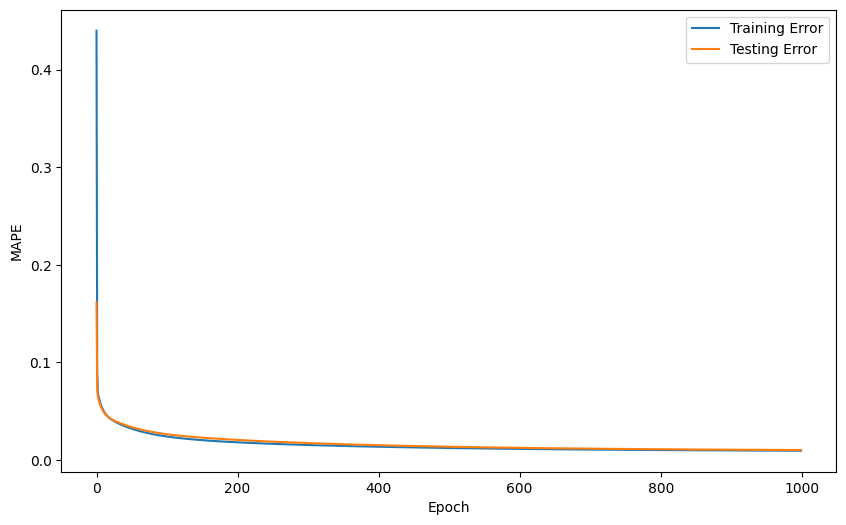

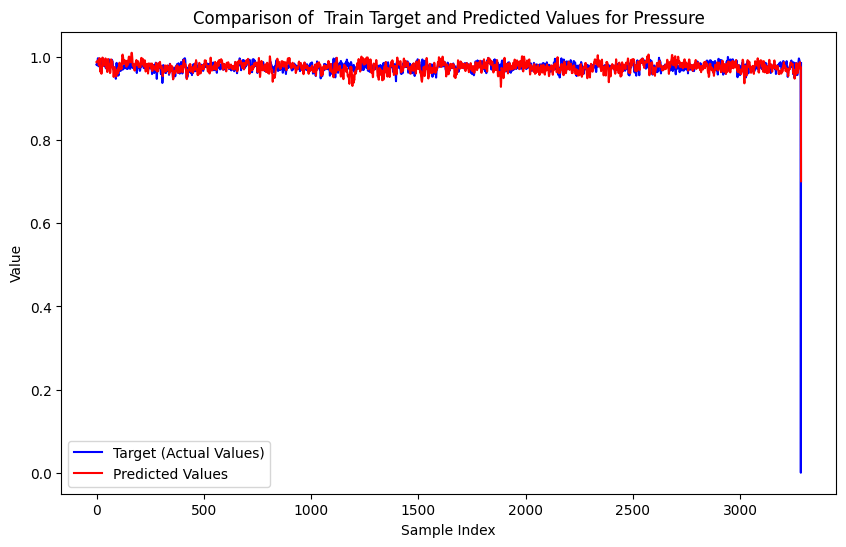

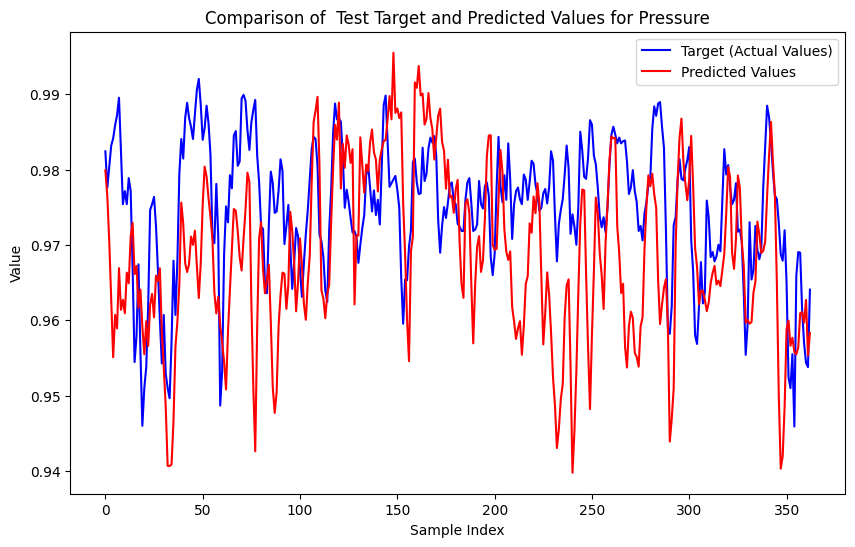

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,18]
Y_test_W = Y_test[:,18]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.00001
threshold = 0.001
epochs = 1000
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue

        lambda_reg = 0.01
        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i] + 2 * lambda_reg * W
        W -= learning_rate * gradient
        #gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        #W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr, label='Training Error')
plt.plot(errors_te, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values for Pressure')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values for Pressure')
plt.legend()
plt.show()


In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.018017992931492272
MEAN MAP of Test: 0.019370410093444517


Optional section (BASEL city)

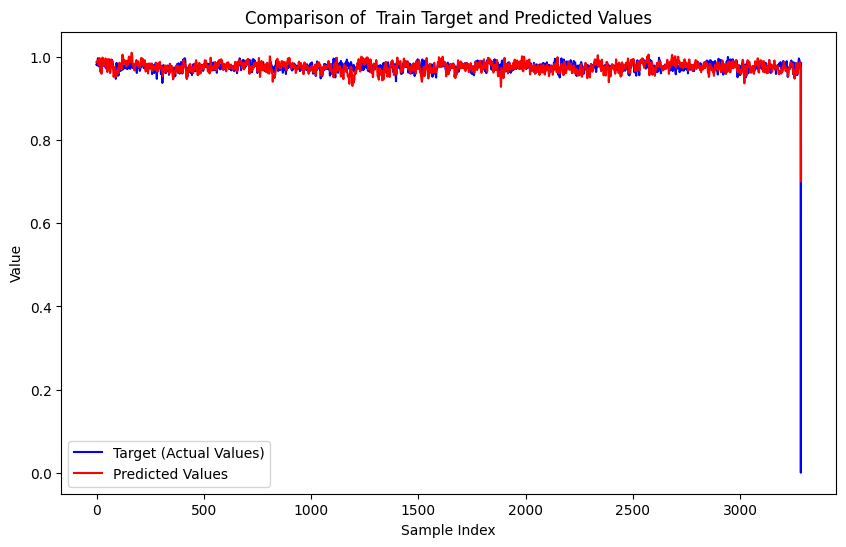

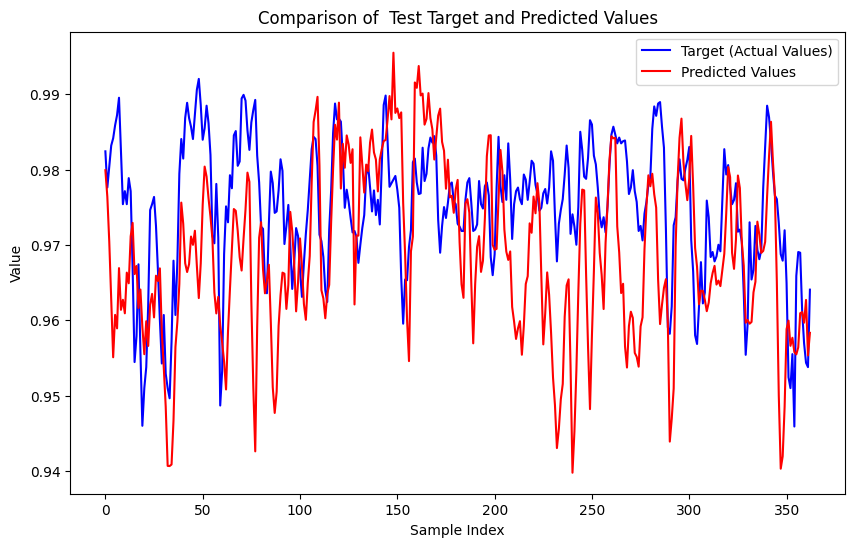

In [ ]:
Y_train_W = Y_train[:,26]
Y_test_W = Y_test[:,26]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values')
plt.legend()
plt.show()

1.3-Prediction Global Radiation

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


Training Progress:   0%|          | 3/1000 [00:00<00:48, 20.44it/s]

Epoch 1/1000 - MAP Train: 0.2439 | MAP Test: 0.2077
Epoch 2/1000 - MAP Train: 0.1989 | MAP Test: 0.1928
Epoch 3/1000 - MAP Train: 0.1909 | MAP Test: 0.1842
Epoch 4/1000 - MAP Train: 0.1833 | MAP Test: 0.1768


Training Progress:   1%|          | 6/1000 [00:00<00:59, 16.58it/s]

Epoch 5/1000 - MAP Train: 0.1764 | MAP Test: 0.1704
Epoch 6/1000 - MAP Train: 0.1702 | MAP Test: 0.1651
Epoch 7/1000 - MAP Train: 0.1647 | MAP Test: 0.1604


Training Progress:   1%|          | 8/1000 [00:00<01:19, 12.51it/s]

Epoch 8/1000 - MAP Train: 0.1599 | MAP Test: 0.1564
Epoch 9/1000 - MAP Train: 0.1556 | MAP Test: 0.1529


Training Progress:   1%|          | 12/1000 [00:00<01:22, 12.04it/s]

Epoch 10/1000 - MAP Train: 0.1519 | MAP Test: 0.1499
Epoch 11/1000 - MAP Train: 0.1486 | MAP Test: 0.1474
Epoch 12/1000 - MAP Train: 0.1456 | MAP Test: 0.1452
Epoch 13/1000 - MAP Train: 0.1431 | MAP Test: 0.1433


Training Progress:   2%|▏         | 16/1000 [00:01<01:06, 14.69it/s]

Epoch 14/1000 - MAP Train: 0.1409 | MAP Test: 0.1416
Epoch 15/1000 - MAP Train: 0.1390 | MAP Test: 0.1401
Epoch 16/1000 - MAP Train: 0.1373 | MAP Test: 0.1388
Epoch 17/1000 - MAP Train: 0.1358 | MAP Test: 0.1376


Training Progress:   2%|▏         | 20/1000 [00:01<01:09, 14.19it/s]

Epoch 18/1000 - MAP Train: 0.1345 | MAP Test: 0.1365
Epoch 19/1000 - MAP Train: 0.1334 | MAP Test: 0.1355
Epoch 20/1000 - MAP Train: 0.1324 | MAP Test: 0.1347


Training Progress:   2%|▏         | 22/1000 [00:01<01:29, 10.95it/s]

Epoch 21/1000 - MAP Train: 0.1315 | MAP Test: 0.1339
Epoch 22/1000 - MAP Train: 0.1307 | MAP Test: 0.1332


Training Progress:   2%|▏         | 24/1000 [00:01<01:25, 11.37it/s]

Epoch 23/1000 - MAP Train: 0.1299 | MAP Test: 0.1326
Epoch 24/1000 - MAP Train: 0.1292 | MAP Test: 0.1321
Epoch 25/1000 - MAP Train: 0.1286 | MAP Test: 0.1316
Epoch 26/1000 - MAP Train: 0.1281 | MAP Test: 0.1311


Training Progress:   3%|▎         | 29/1000 [00:02<01:07, 14.45it/s]

Epoch 27/1000 - MAP Train: 0.1276 | MAP Test: 0.1307
Epoch 28/1000 - MAP Train: 0.1271 | MAP Test: 0.1304
Epoch 29/1000 - MAP Train: 0.1266 | MAP Test: 0.1300
Epoch 30/1000 - MAP Train: 0.1262 | MAP Test: 0.1297


Training Progress:   3%|▎         | 34/1000 [00:02<01:00, 16.05it/s]

Epoch 31/1000 - MAP Train: 0.1259 | MAP Test: 0.1294
Epoch 32/1000 - MAP Train: 0.1255 | MAP Test: 0.1291
Epoch 33/1000 - MAP Train: 0.1252 | MAP Test: 0.1288
Epoch 34/1000 - MAP Train: 0.1249 | MAP Test: 0.1285


Training Progress:   4%|▎         | 36/1000 [00:02<01:16, 12.59it/s]

Epoch 35/1000 - MAP Train: 0.1246 | MAP Test: 0.1283
Epoch 36/1000 - MAP Train: 0.1243 | MAP Test: 0.1281
Epoch 37/1000 - MAP Train: 0.1241 | MAP Test: 0.1279


Training Progress:   4%|▍         | 41/1000 [00:02<00:59, 16.00it/s]

Epoch 38/1000 - MAP Train: 0.1238 | MAP Test: 0.1277
Epoch 39/1000 - MAP Train: 0.1236 | MAP Test: 0.1275
Epoch 40/1000 - MAP Train: 0.1234 | MAP Test: 0.1273
Epoch 41/1000 - MAP Train: 0.1232 | MAP Test: 0.1271
Epoch 42/1000 - MAP Train: 0.1230 | MAP Test: 0.1270


Training Progress:   5%|▍         | 47/1000 [00:03<00:47, 19.86it/s]

Epoch 43/1000 - MAP Train: 0.1228 | MAP Test: 0.1268
Epoch 44/1000 - MAP Train: 0.1227 | MAP Test: 0.1266
Epoch 45/1000 - MAP Train: 0.1225 | MAP Test: 0.1265
Epoch 46/1000 - MAP Train: 0.1223 | MAP Test: 0.1263
Epoch 47/1000 - MAP Train: 0.1222 | MAP Test: 0.1262


Training Progress:   5%|▌         | 50/1000 [00:03<00:49, 19.09it/s]

Epoch 48/1000 - MAP Train: 0.1220 | MAP Test: 0.1261
Epoch 49/1000 - MAP Train: 0.1219 | MAP Test: 0.1259
Epoch 50/1000 - MAP Train: 0.1218 | MAP Test: 0.1258
Epoch 51/1000 - MAP Train: 0.1216 | MAP Test: 0.1257


Training Progress:   5%|▌         | 54/1000 [00:03<01:00, 15.51it/s]

Epoch 52/1000 - MAP Train: 0.1215 | MAP Test: 0.1256
Epoch 53/1000 - MAP Train: 0.1214 | MAP Test: 0.1254
Epoch 54/1000 - MAP Train: 0.1213 | MAP Test: 0.1253
Epoch 55/1000 - MAP Train: 0.1211 | MAP Test: 0.1252


Epoch 56/1000 - MAP Train: 0.1210 | MAP Test: 0.1251
Epoch 57/1000 - MAP Train: 0.1209 | MAP Test: 0.1250
Epoch 58/1000 - MAP Train: 0.1208 | MAP Test: 0.1249
Epoch 59/1000 - MAP Train: 0.1207 | MAP Test: 0.1248


Training Progress:   6%|▋         | 64/1000 [00:04<00:48, 19.36it/s]

Epoch 60/1000 - MAP Train: 0.1206 | MAP Test: 0.1247
Epoch 61/1000 - MAP Train: 0.1205 | MAP Test: 0.1246
Epoch 62/1000 - MAP Train: 0.1204 | MAP Test: 0.1245
Epoch 63/1000 - MAP Train: 0.1203 | MAP Test: 0.1244
Epoch 64/1000 - MAP Train: 0.1202 | MAP Test: 0.1243


Epoch 65/1000 - MAP Train: 0.1202 | MAP Test: 0.1243
Epoch 66/1000 - MAP Train: 0.1201 | MAP Test: 0.1242
Epoch 67/1000 - MAP Train: 0.1200 | MAP Test: 0.1241
Epoch 68/1000 - MAP Train: 0.1199 | MAP Test: 0.1240


Training Progress:   7%|▋         | 70/1000 [00:04<00:50, 18.35it/s]

Epoch 69/1000 - MAP Train: 0.1198 | MAP Test: 0.1240
Epoch 70/1000 - MAP Train: 0.1197 | MAP Test: 0.1239


Training Progress:   7%|▋         | 74/1000 [00:04<01:03, 14.55it/s]

Epoch 71/1000 - MAP Train: 0.1197 | MAP Test: 0.1238
Epoch 72/1000 - MAP Train: 0.1196 | MAP Test: 0.1238
Epoch 73/1000 - MAP Train: 0.1195 | MAP Test: 0.1237
Epoch 74/1000 - MAP Train: 0.1194 | MAP Test: 0.1236


Training Progress:   8%|▊         | 76/1000 [00:05<01:00, 15.16it/s]

Epoch 75/1000 - MAP Train: 0.1194 | MAP Test: 0.1236
Epoch 76/1000 - MAP Train: 0.1193 | MAP Test: 0.1235
Epoch 77/1000 - MAP Train: 0.1192 | MAP Test: 0.1234
Epoch 78/1000 - MAP Train: 0.1192 | MAP Test: 0.1234


Training Progress:   8%|▊         | 82/1000 [00:05<00:51, 17.80it/s]

Epoch 79/1000 - MAP Train: 0.1191 | MAP Test: 0.1233
Epoch 80/1000 - MAP Train: 0.1190 | MAP Test: 0.1233
Epoch 81/1000 - MAP Train: 0.1190 | MAP Test: 0.1232
Epoch 82/1000 - MAP Train: 0.1189 | MAP Test: 0.1231
Epoch 83/1000 - MAP Train: 0.1188 | MAP Test: 0.1231


Training Progress:   8%|▊         | 85/1000 [00:05<00:47, 19.35it/s]

Epoch 84/1000 - MAP Train: 0.1188 | MAP Test: 0.1230
Epoch 85/1000 - MAP Train: 0.1187 | MAP Test: 0.1230
Epoch 86/1000 - MAP Train: 0.1187 | MAP Test: 0.1229


Training Progress:   9%|▉         | 89/1000 [00:05<00:57, 15.80it/s]

Epoch 87/1000 - MAP Train: 0.1186 | MAP Test: 0.1229
Epoch 88/1000 - MAP Train: 0.1186 | MAP Test: 0.1228
Epoch 89/1000 - MAP Train: 0.1185 | MAP Test: 0.1228
Epoch 90/1000 - MAP Train: 0.1184 | MAP Test: 0.1227


Training Progress:   9%|▉         | 93/1000 [00:06<00:57, 15.89it/s]

Epoch 91/1000 - MAP Train: 0.1184 | MAP Test: 0.1227
Epoch 92/1000 - MAP Train: 0.1183 | MAP Test: 0.1226
Epoch 93/1000 - MAP Train: 0.1183 | MAP Test: 0.1226
Epoch 94/1000 - MAP Train: 0.1182 | MAP Test: 0.1226


Training Progress:  10%|▉         | 98/1000 [00:06<00:52, 17.31it/s]

Epoch 95/1000 - MAP Train: 0.1182 | MAP Test: 0.1225
Epoch 96/1000 - MAP Train: 0.1181 | MAP Test: 0.1225
Epoch 97/1000 - MAP Train: 0.1181 | MAP Test: 0.1224
Epoch 98/1000 - MAP Train: 0.1180 | MAP Test: 0.1224


Training Progress:  10%|█         | 101/1000 [00:06<00:47, 19.01it/s]

Epoch 99/1000 - MAP Train: 0.1180 | MAP Test: 0.1223
Epoch 100/1000 - MAP Train: 0.1179 | MAP Test: 0.1223
Epoch 101/1000 - MAP Train: 0.1179 | MAP Test: 0.1223
Epoch 102/1000 - MAP Train: 0.1178 | MAP Test: 0.1222
Epoch 103/1000 - MAP Train: 0.1178 | MAP Test: 0.1222


Training Progress:  11%|█         | 106/1000 [00:06<00:47, 18.96it/s]

Epoch 104/1000 - MAP Train: 0.1178 | MAP Test: 0.1221
Epoch 105/1000 - MAP Train: 0.1177 | MAP Test: 0.1221
Epoch 106/1000 - MAP Train: 0.1177 | MAP Test: 0.1221
Epoch 107/1000 - MAP Train: 0.1176 | MAP Test: 0.1220


Training Progress:  11%|█         | 110/1000 [00:06<00:58, 15.16it/s]

Epoch 108/1000 - MAP Train: 0.1176 | MAP Test: 0.1220
Epoch 109/1000 - MAP Train: 0.1175 | MAP Test: 0.1220
Epoch 110/1000 - MAP Train: 0.1175 | MAP Test: 0.1219


Training Progress:  11%|█         | 112/1000 [00:07<01:13, 12.16it/s]

Epoch 111/1000 - MAP Train: 0.1175 | MAP Test: 0.1219
Epoch 112/1000 - MAP Train: 0.1174 | MAP Test: 0.1218
Epoch 113/1000 - MAP Train: 0.1174 | MAP Test: 0.1218


Training Progress:  12%|█▏        | 116/1000 [00:07<01:08, 12.94it/s]

Epoch 114/1000 - MAP Train: 0.1173 | MAP Test: 0.1218
Epoch 115/1000 - MAP Train: 0.1173 | MAP Test: 0.1217
Epoch 116/1000 - MAP Train: 0.1173 | MAP Test: 0.1217


Training Progress:  12%|█▏        | 118/1000 [00:07<01:09, 12.61it/s]

Epoch 117/1000 - MAP Train: 0.1172 | MAP Test: 0.1217
Epoch 118/1000 - MAP Train: 0.1172 | MAP Test: 0.1216


Training Progress:  12%|█▏        | 120/1000 [00:07<01:20, 10.94it/s]

Epoch 119/1000 - MAP Train: 0.1172 | MAP Test: 0.1216
Epoch 120/1000 - MAP Train: 0.1171 | MAP Test: 0.1216
Epoch 121/1000 - MAP Train: 0.1171 | MAP Test: 0.1215


Training Progress:  12%|█▏        | 124/1000 [00:08<01:08, 12.76it/s]

Epoch 122/1000 - MAP Train: 0.1171 | MAP Test: 0.1215
Epoch 123/1000 - MAP Train: 0.1170 | MAP Test: 0.1215
Epoch 124/1000 - MAP Train: 0.1170 | MAP Test: 0.1214
Epoch 125/1000 - MAP Train: 0.1170 | MAP Test: 0.1214


Training Progress:  13%|█▎        | 126/1000 [00:08<01:13, 11.94it/s]

Epoch 126/1000 - MAP Train: 0.1169 | MAP Test: 0.1214
Epoch 127/1000 - MAP Train: 0.1169 | MAP Test: 0.1213


Training Progress:  13%|█▎        | 128/1000 [00:08<01:50,  7.89it/s]

Epoch 128/1000 - MAP Train: 0.1169 | MAP Test: 0.1213


Training Progress:  13%|█▎        | 130/1000 [00:09<02:09,  6.72it/s]

Epoch 129/1000 - MAP Train: 0.1168 | MAP Test: 0.1213
Epoch 130/1000 - MAP Train: 0.1168 | MAP Test: 0.1212


Training Progress:  13%|█▎        | 131/1000 [00:09<02:20,  6.18it/s]

Epoch 131/1000 - MAP Train: 0.1168 | MAP Test: 0.1212


Training Progress:  13%|█▎        | 132/1000 [00:09<02:32,  5.69it/s]

Epoch 132/1000 - MAP Train: 0.1167 | MAP Test: 0.1212


Training Progress:  13%|█▎        | 133/1000 [00:09<02:59,  4.83it/s]

Epoch 133/1000 - MAP Train: 0.1167 | MAP Test: 0.1211


Training Progress:  14%|█▎        | 135/1000 [00:10<03:03,  4.72it/s]

Epoch 134/1000 - MAP Train: 0.1167 | MAP Test: 0.1211
Epoch 135/1000 - MAP Train: 0.1167 | MAP Test: 0.1211


Training Progress:  14%|█▎        | 137/1000 [00:10<02:37,  5.50it/s]

Epoch 136/1000 - MAP Train: 0.1166 | MAP Test: 0.1211
Epoch 137/1000 - MAP Train: 0.1166 | MAP Test: 0.1210


Training Progress:  14%|█▍        | 139/1000 [00:11<02:29,  5.78it/s]

Epoch 138/1000 - MAP Train: 0.1166 | MAP Test: 0.1210
Epoch 139/1000 - MAP Train: 0.1165 | MAP Test: 0.1210


Training Progress:  14%|█▍        | 140/1000 [00:11<02:34,  5.56it/s]

Epoch 140/1000 - MAP Train: 0.1165 | MAP Test: 0.1209


Training Progress:  14%|█▍        | 141/1000 [00:11<02:58,  4.80it/s]

Epoch 141/1000 - MAP Train: 0.1165 | MAP Test: 0.1209


Training Progress:  14%|█▍        | 143/1000 [00:11<02:54,  4.91it/s]

Epoch 142/1000 - MAP Train: 0.1165 | MAP Test: 0.1209
Epoch 143/1000 - MAP Train: 0.1164 | MAP Test: 0.1209


Training Progress:  14%|█▍        | 145/1000 [00:12<02:48,  5.08it/s]

Epoch 144/1000 - MAP Train: 0.1164 | MAP Test: 0.1208
Epoch 145/1000 - MAP Train: 0.1164 | MAP Test: 0.1208


Training Progress:  15%|█▍        | 147/1000 [00:12<02:54,  4.90it/s]

Epoch 146/1000 - MAP Train: 0.1164 | MAP Test: 0.1208
Epoch 147/1000 - MAP Train: 0.1163 | MAP Test: 0.1208


Training Progress:  15%|█▌        | 150/1000 [00:13<01:57,  7.23it/s]

Epoch 148/1000 - MAP Train: 0.1163 | MAP Test: 0.1207
Epoch 149/1000 - MAP Train: 0.1163 | MAP Test: 0.1207
Epoch 150/1000 - MAP Train: 0.1163 | MAP Test: 0.1207


Training Progress:  15%|█▌        | 152/1000 [00:13<01:54,  7.40it/s]

Epoch 151/1000 - MAP Train: 0.1162 | MAP Test: 0.1207
Epoch 152/1000 - MAP Train: 0.1162 | MAP Test: 0.1207


Training Progress:  15%|█▌        | 154/1000 [00:13<01:58,  7.15it/s]

Epoch 153/1000 - MAP Train: 0.1162 | MAP Test: 0.1206
Epoch 154/1000 - MAP Train: 0.1162 | MAP Test: 0.1206


Training Progress:  16%|█▌        | 157/1000 [00:13<01:30,  9.27it/s]

Epoch 155/1000 - MAP Train: 0.1161 | MAP Test: 0.1206
Epoch 156/1000 - MAP Train: 0.1161 | MAP Test: 0.1206
Epoch 157/1000 - MAP Train: 0.1161 | MAP Test: 0.1205


Training Progress:  16%|█▌        | 159/1000 [00:14<01:31,  9.15it/s]

Epoch 158/1000 - MAP Train: 0.1161 | MAP Test: 0.1205
Epoch 159/1000 - MAP Train: 0.1161 | MAP Test: 0.1205


Training Progress:  16%|█▌        | 161/1000 [00:14<01:22, 10.15it/s]

Epoch 160/1000 - MAP Train: 0.1160 | MAP Test: 0.1205
Epoch 161/1000 - MAP Train: 0.1160 | MAP Test: 0.1205
Epoch 162/1000 - MAP Train: 0.1160 | MAP Test: 0.1204


Training Progress:  16%|█▋        | 163/1000 [00:14<01:23, 10.07it/s]

Epoch 163/1000 - MAP Train: 0.1160 | MAP Test: 0.1204
Epoch 164/1000 - MAP Train: 0.1160 | MAP Test: 0.1204


Training Progress:  17%|█▋        | 167/1000 [00:14<01:16, 10.92it/s]

Epoch 165/1000 - MAP Train: 0.1159 | MAP Test: 0.1204
Epoch 166/1000 - MAP Train: 0.1159 | MAP Test: 0.1203
Epoch 167/1000 - MAP Train: 0.1159 | MAP Test: 0.1203


Training Progress:  17%|█▋        | 169/1000 [00:14<01:17, 10.71it/s]

Epoch 168/1000 - MAP Train: 0.1159 | MAP Test: 0.1203
Epoch 169/1000 - MAP Train: 0.1159 | MAP Test: 0.1203


Training Progress:  17%|█▋        | 169/1000 [00:15<01:17, 10.71it/s]

Epoch 170/1000 - MAP Train: 0.1158 | MAP Test: 0.1203


Training Progress:  17%|█▋        | 172/1000 [00:15<01:57,  7.06it/s]

Epoch 171/1000 - MAP Train: 0.1158 | MAP Test: 0.1202
Epoch 172/1000 - MAP Train: 0.1158 | MAP Test: 0.1202


Training Progress:  17%|█▋        | 174/1000 [00:15<01:40,  8.21it/s]

Epoch 173/1000 - MAP Train: 0.1158 | MAP Test: 0.1202
Epoch 174/1000 - MAP Train: 0.1158 | MAP Test: 0.1202
Epoch 175/1000 - MAP Train: 0.1158 | MAP Test: 0.1202


Training Progress:  18%|█▊        | 178/1000 [00:16<01:22,  9.93it/s]

Epoch 176/1000 - MAP Train: 0.1157 | MAP Test: 0.1202
Epoch 177/1000 - MAP Train: 0.1157 | MAP Test: 0.1201
Epoch 178/1000 - MAP Train: 0.1157 | MAP Test: 0.1201


Training Progress:  18%|█▊        | 180/1000 [00:16<01:21, 10.02it/s]

Epoch 179/1000 - MAP Train: 0.1157 | MAP Test: 0.1201
Epoch 180/1000 - MAP Train: 0.1157 | MAP Test: 0.1201
Epoch 181/1000 - MAP Train: 0.1156 | MAP Test: 0.1201


Training Progress:  18%|█▊        | 182/1000 [00:16<01:16, 10.71it/s]

Epoch 182/1000 - MAP Train: 0.1156 | MAP Test: 0.1200
Epoch 183/1000 - MAP Train: 0.1156 | MAP Test: 0.1200


Training Progress:  18%|█▊        | 184/1000 [00:16<01:20, 10.10it/s]

Epoch 184/1000 - MAP Train: 0.1156 | MAP Test: 0.1200
Epoch 185/1000 - MAP Train: 0.1156 | MAP Test: 0.1200


Training Progress:  19%|█▉        | 188/1000 [00:17<01:20, 10.06it/s]

Epoch 186/1000 - MAP Train: 0.1156 | MAP Test: 0.1200
Epoch 187/1000 - MAP Train: 0.1156 | MAP Test: 0.1200
Epoch 188/1000 - MAP Train: 0.1155 | MAP Test: 0.1199


Training Progress:  19%|█▉        | 188/1000 [00:17<01:20, 10.06it/s]

Epoch 189/1000 - MAP Train: 0.1155 | MAP Test: 0.1199
Epoch 190/1000 - MAP Train: 0.1155 | MAP Test: 0.1199


Training Progress:  19%|█▉        | 191/1000 [00:17<01:48,  7.48it/s]

Epoch 191/1000 - MAP Train: 0.1155 | MAP Test: 0.1199
Epoch 192/1000 - MAP Train: 0.1155 | MAP Test: 0.1199


Training Progress:  20%|█▉        | 195/1000 [00:18<01:29,  8.97it/s]

Epoch 193/1000 - MAP Train: 0.1155 | MAP Test: 0.1199
Epoch 194/1000 - MAP Train: 0.1154 | MAP Test: 0.1198
Epoch 195/1000 - MAP Train: 0.1154 | MAP Test: 0.1198


Training Progress:  20%|█▉        | 197/1000 [00:18<01:18, 10.19it/s]

Epoch 196/1000 - MAP Train: 0.1154 | MAP Test: 0.1198
Epoch 197/1000 - MAP Train: 0.1154 | MAP Test: 0.1198
Epoch 198/1000 - MAP Train: 0.1154 | MAP Test: 0.1198


Training Progress:  20%|██        | 202/1000 [00:18<00:55, 14.46it/s]

Epoch 199/1000 - MAP Train: 0.1154 | MAP Test: 0.1198
Epoch 200/1000 - MAP Train: 0.1154 | MAP Test: 0.1197
Epoch 201/1000 - MAP Train: 0.1153 | MAP Test: 0.1197
Epoch 202/1000 - MAP Train: 0.1153 | MAP Test: 0.1197
Epoch 203/1000 - MAP Train: 0.1153 | MAP Test: 0.1197


Training Progress:  20%|██        | 205/1000 [00:18<00:52, 15.28it/s]

Epoch 204/1000 - MAP Train: 0.1153 | MAP Test: 0.1197
Epoch 205/1000 - MAP Train: 0.1153 | MAP Test: 0.1197
Epoch 206/1000 - MAP Train: 0.1153 | MAP Test: 0.1197


Training Progress:  21%|██        | 207/1000 [00:18<01:00, 13.02it/s]

Epoch 207/1000 - MAP Train: 0.1153 | MAP Test: 0.1196
Epoch 208/1000 - MAP Train: 0.1153 | MAP Test: 0.1196


Training Progress:  21%|██        | 211/1000 [00:19<01:09, 11.43it/s]

Epoch 209/1000 - MAP Train: 0.1152 | MAP Test: 0.1196
Epoch 210/1000 - MAP Train: 0.1152 | MAP Test: 0.1196
Epoch 211/1000 - MAP Train: 0.1152 | MAP Test: 0.1196
Epoch 212/1000 - MAP Train: 0.1152 | MAP Test: 0.1196


Training Progress:  22%|██▏       | 215/1000 [00:19<00:59, 13.23it/s]

Epoch 213/1000 - MAP Train: 0.1152 | MAP Test: 0.1196
Epoch 214/1000 - MAP Train: 0.1152 | MAP Test: 0.1196
Epoch 215/1000 - MAP Train: 0.1152 | MAP Test: 0.1195
Epoch 216/1000 - MAP Train: 0.1152 | MAP Test: 0.1195


Training Progress:  22%|██▏       | 219/1000 [00:19<00:59, 13.09it/s]

Epoch 217/1000 - MAP Train: 0.1151 | MAP Test: 0.1195
Epoch 218/1000 - MAP Train: 0.1151 | MAP Test: 0.1195
Epoch 219/1000 - MAP Train: 0.1151 | MAP Test: 0.1195


Training Progress:  22%|██▏       | 221/1000 [00:19<01:02, 12.54it/s]

Epoch 220/1000 - MAP Train: 0.1151 | MAP Test: 0.1195
Epoch 221/1000 - MAP Train: 0.1151 | MAP Test: 0.1195


Training Progress:  22%|██▏       | 223/1000 [00:20<01:09, 11.11it/s]

Epoch 222/1000 - MAP Train: 0.1151 | MAP Test: 0.1195
Epoch 223/1000 - MAP Train: 0.1151 | MAP Test: 0.1195


Epoch 224/1000 - MAP Train: 0.1151 | MAP Test: 0.1194


Training Progress:  22%|██▎       | 225/1000 [00:20<01:27,  8.84it/s]

Epoch 225/1000 - MAP Train: 0.1150 | MAP Test: 0.1194
Epoch 226/1000 - MAP Train: 0.1150 | MAP Test: 0.1194


Training Progress:  23%|██▎       | 228/1000 [00:20<01:36,  8.00it/s]

Epoch 227/1000 - MAP Train: 0.1150 | MAP Test: 0.1194
Epoch 228/1000 - MAP Train: 0.1150 | MAP Test: 0.1194


Training Progress:  23%|██▎       | 230/1000 [00:21<01:40,  7.64it/s]

Epoch 229/1000 - MAP Train: 0.1150 | MAP Test: 0.1194
Epoch 230/1000 - MAP Train: 0.1150 | MAP Test: 0.1194


Training Progress:  23%|██▎       | 232/1000 [00:21<01:50,  6.95it/s]

Epoch 231/1000 - MAP Train: 0.1150 | MAP Test: 0.1194
Epoch 232/1000 - MAP Train: 0.1150 | MAP Test: 0.1194


Training Progress:  24%|██▎       | 235/1000 [00:21<01:31,  8.33it/s]

Epoch 233/1000 - MAP Train: 0.1150 | MAP Test: 0.1194
Epoch 234/1000 - MAP Train: 0.1149 | MAP Test: 0.1193
Epoch 235/1000 - MAP Train: 0.1149 | MAP Test: 0.1193


Training Progress:  24%|██▎       | 236/1000 [00:22<02:13,  5.73it/s]

Epoch 236/1000 - MAP Train: 0.1149 | MAP Test: 0.1193


Training Progress:  24%|██▎       | 237/1000 [00:22<02:55,  4.35it/s]

Epoch 237/1000 - MAP Train: 0.1149 | MAP Test: 0.1193


Training Progress:  24%|██▍       | 239/1000 [00:23<03:29,  3.63it/s]

Epoch 238/1000 - MAP Train: 0.1149 | MAP Test: 0.1193
Epoch 239/1000 - MAP Train: 0.1149 | MAP Test: 0.1193


Training Progress:  24%|██▍       | 240/1000 [00:23<03:12,  3.95it/s]

Epoch 240/1000 - MAP Train: 0.1149 | MAP Test: 0.1193


Training Progress:  24%|██▍       | 243/1000 [00:23<02:18,  5.46it/s]

Epoch 241/1000 - MAP Train: 0.1149 | MAP Test: 0.1193
Epoch 242/1000 - MAP Train: 0.1149 | MAP Test: 0.1193
Epoch 243/1000 - MAP Train: 0.1149 | MAP Test: 0.1193


Training Progress:  24%|██▍       | 245/1000 [00:24<01:54,  6.57it/s]

Epoch 244/1000 - MAP Train: 0.1148 | MAP Test: 0.1193
Epoch 245/1000 - MAP Train: 0.1148 | MAP Test: 0.1192


Training Progress:  25%|██▍       | 247/1000 [00:24<01:44,  7.19it/s]

Epoch 246/1000 - MAP Train: 0.1148 | MAP Test: 0.1192
Epoch 247/1000 - MAP Train: 0.1148 | MAP Test: 0.1192
Epoch 248/1000 - MAP Train: 0.1148 | MAP Test: 0.1192


Training Progress:  25%|██▌       | 251/1000 [00:24<01:10, 10.61it/s]

Epoch 249/1000 - MAP Train: 0.1148 | MAP Test: 0.1192
Epoch 250/1000 - MAP Train: 0.1148 | MAP Test: 0.1192
Epoch 251/1000 - MAP Train: 0.1148 | MAP Test: 0.1192


Training Progress:  25%|██▌       | 253/1000 [00:25<01:23,  8.92it/s]

Epoch 252/1000 - MAP Train: 0.1148 | MAP Test: 0.1192
Epoch 253/1000 - MAP Train: 0.1148 | MAP Test: 0.1192


Training Progress:  26%|██▌       | 255/1000 [00:25<01:16,  9.78it/s]

Epoch 254/1000 - MAP Train: 0.1148 | MAP Test: 0.1192
Epoch 255/1000 - MAP Train: 0.1147 | MAP Test: 0.1192


Training Progress:  26%|██▌       | 257/1000 [00:25<01:22,  8.99it/s]

Epoch 256/1000 - MAP Train: 0.1147 | MAP Test: 0.1192
Epoch 257/1000 - MAP Train: 0.1147 | MAP Test: 0.1192


Training Progress:  26%|██▌       | 259/1000 [00:25<01:35,  7.72it/s]

Epoch 258/1000 - MAP Train: 0.1147 | MAP Test: 0.1191
Epoch 259/1000 - MAP Train: 0.1147 | MAP Test: 0.1191
Epoch 260/1000 - MAP Train: 0.1147 | MAP Test: 0.1191


Training Progress:  26%|██▌       | 262/1000 [00:26<01:20,  9.19it/s]

Epoch 261/1000 - MAP Train: 0.1147 | MAP Test: 0.1191
Epoch 262/1000 - MAP Train: 0.1147 | MAP Test: 0.1191
Epoch 263/1000 - MAP Train: 0.1147 | MAP Test: 0.1191


Training Progress:  26%|██▋       | 264/1000 [00:26<01:10, 10.48it/s]

Epoch 264/1000 - MAP Train: 0.1147 | MAP Test: 0.1191
Epoch 265/1000 - MAP Train: 0.1147 | MAP Test: 0.1191


Training Progress:  27%|██▋       | 266/1000 [00:26<01:24,  8.67it/s]

Epoch 266/1000 - MAP Train: 0.1146 | MAP Test: 0.1191


Training Progress:  27%|██▋       | 268/1000 [00:26<01:45,  6.96it/s]

Epoch 267/1000 - MAP Train: 0.1146 | MAP Test: 0.1191
Epoch 268/1000 - MAP Train: 0.1146 | MAP Test: 0.1191


Training Progress:  27%|██▋       | 271/1000 [00:27<01:27,  8.38it/s]

Epoch 269/1000 - MAP Train: 0.1146 | MAP Test: 0.1191
Epoch 270/1000 - MAP Train: 0.1146 | MAP Test: 0.1191
Epoch 271/1000 - MAP Train: 0.1146 | MAP Test: 0.1191


Epoch 272/1000 - MAP Train: 0.1146 | MAP Test: 0.1190
Epoch 273/1000 - MAP Train: 0.1146 | MAP Test: 0.1190


Training Progress:  28%|██▊       | 277/1000 [00:27<01:01, 11.83it/s]

Epoch 274/1000 - MAP Train: 0.1146 | MAP Test: 0.1190
Epoch 275/1000 - MAP Train: 0.1146 | MAP Test: 0.1190
Epoch 276/1000 - MAP Train: 0.1146 | MAP Test: 0.1190
Epoch 277/1000 - MAP Train: 0.1146 | MAP Test: 0.1190


Training Progress:  28%|██▊       | 279/1000 [00:27<01:07, 10.73it/s]

Epoch 278/1000 - MAP Train: 0.1145 | MAP Test: 0.1190
Epoch 279/1000 - MAP Train: 0.1145 | MAP Test: 0.1190
Epoch 280/1000 - MAP Train: 0.1145 | MAP Test: 0.1190


Training Progress:  28%|██▊       | 281/1000 [00:28<01:07, 10.73it/s]

Epoch 281/1000 - MAP Train: 0.1145 | MAP Test: 0.1190
Epoch 282/1000 - MAP Train: 0.1145 | MAP Test: 0.1190


Training Progress:  28%|██▊       | 283/1000 [00:28<01:12,  9.89it/s]

Epoch 283/1000 - MAP Train: 0.1145 | MAP Test: 0.1190
Epoch 284/1000 - MAP Train: 0.1145 | MAP Test: 0.1190


Training Progress:  29%|██▊       | 287/1000 [00:28<01:06, 10.73it/s]

Epoch 285/1000 - MAP Train: 0.1145 | MAP Test: 0.1190
Epoch 286/1000 - MAP Train: 0.1145 | MAP Test: 0.1190
Epoch 287/1000 - MAP Train: 0.1145 | MAP Test: 0.1189
Epoch 288/1000 - MAP Train: 0.1145 | MAP Test: 0.1189


Training Progress:  29%|██▉       | 291/1000 [00:28<01:00, 11.66it/s]

Epoch 289/1000 - MAP Train: 0.1145 | MAP Test: 0.1189
Epoch 290/1000 - MAP Train: 0.1145 | MAP Test: 0.1189
Epoch 291/1000 - MAP Train: 0.1145 | MAP Test: 0.1189


Training Progress:  29%|██▉       | 293/1000 [00:29<01:02, 11.25it/s]

Epoch 292/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 293/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 294/1000 - MAP Train: 0.1144 | MAP Test: 0.1189


Training Progress:  30%|██▉       | 297/1000 [00:29<00:58, 12.10it/s]

Epoch 295/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 296/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 297/1000 - MAP Train: 0.1144 | MAP Test: 0.1189


Training Progress:  30%|███       | 301/1000 [00:29<00:51, 13.63it/s]

Epoch 298/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 299/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 300/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 301/1000 - MAP Train: 0.1144 | MAP Test: 0.1189


Training Progress:  30%|███       | 303/1000 [00:29<00:55, 12.60it/s]

Epoch 302/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 303/1000 - MAP Train: 0.1144 | MAP Test: 0.1189
Epoch 304/1000 - MAP Train: 0.1144 | MAP Test: 0.1189


Training Progress:  30%|███       | 305/1000 [00:30<00:54, 12.80it/s]

Epoch 305/1000 - MAP Train: 0.1144 | MAP Test: 0.1188
Epoch 306/1000 - MAP Train: 0.1144 | MAP Test: 0.1188


Training Progress:  31%|███       | 307/1000 [00:30<01:05, 10.58it/s]

Epoch 307/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  31%|███       | 309/1000 [00:30<01:33,  7.40it/s]

Epoch 308/1000 - MAP Train: 0.1143 | MAP Test: 0.1188
Epoch 309/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  31%|███       | 311/1000 [00:31<01:40,  6.87it/s]

Epoch 310/1000 - MAP Train: 0.1143 | MAP Test: 0.1188
Epoch 311/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  31%|███▏      | 313/1000 [00:31<01:46,  6.47it/s]

Epoch 312/1000 - MAP Train: 0.1143 | MAP Test: 0.1188
Epoch 313/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  32%|███▏      | 315/1000 [00:31<01:56,  5.87it/s]

Epoch 314/1000 - MAP Train: 0.1143 | MAP Test: 0.1188
Epoch 315/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Epoch 316/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  32%|███▏      | 318/1000 [00:32<02:02,  5.59it/s]

Epoch 317/1000 - MAP Train: 0.1143 | MAP Test: 0.1188
Epoch 318/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  32%|███▏      | 320/1000 [00:32<01:54,  5.92it/s]

Epoch 319/1000 - MAP Train: 0.1143 | MAP Test: 0.1188
Epoch 320/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  32%|███▏      | 322/1000 [00:32<01:36,  6.99it/s]

Epoch 321/1000 - MAP Train: 0.1143 | MAP Test: 0.1188
Epoch 322/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  32%|███▏      | 323/1000 [00:33<01:44,  6.47it/s]

Epoch 323/1000 - MAP Train: 0.1143 | MAP Test: 0.1188


Training Progress:  32%|███▎      | 325/1000 [00:33<02:00,  5.59it/s]

Epoch 324/1000 - MAP Train: 0.1142 | MAP Test: 0.1188
Epoch 325/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 327/1000 [00:33<01:54,  5.88it/s]

Epoch 326/1000 - MAP Train: 0.1142 | MAP Test: 0.1187
Epoch 327/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 328/1000 [00:34<01:57,  5.74it/s]

Epoch 328/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 329/1000 [00:34<02:16,  4.92it/s]

Epoch 329/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 330/1000 [00:34<02:21,  4.73it/s]

Epoch 330/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 331/1000 [00:34<02:25,  4.61it/s]

Epoch 331/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 332/1000 [00:35<02:34,  4.31it/s]

Epoch 332/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 333/1000 [00:35<03:03,  3.63it/s]

Epoch 333/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  33%|███▎      | 334/1000 [00:35<03:15,  3.42it/s]

Epoch 334/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  34%|███▎      | 335/1000 [00:36<03:14,  3.42it/s]

Epoch 335/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  34%|███▎      | 336/1000 [00:36<03:10,  3.48it/s]

Epoch 336/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  34%|███▎      | 337/1000 [00:36<02:56,  3.76it/s]

Epoch 337/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  34%|███▍      | 338/1000 [00:36<02:47,  3.95it/s]

Epoch 338/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  34%|███▍      | 339/1000 [00:36<02:36,  4.23it/s]

Epoch 339/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  34%|███▍      | 340/1000 [00:37<02:54,  3.79it/s]

Epoch 340/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Epoch 341/1000 - MAP Train: 0.1142 | MAP Test: 0.1187


Training Progress:  34%|███▍      | 343/1000 [00:37<02:25,  4.53it/s]

Epoch 342/1000 - MAP Train: 0.1142 | MAP Test: 0.1187
Epoch 343/1000 - MAP Train: 0.1141 | MAP Test: 0.1187


Training Progress:  34%|███▍      | 345/1000 [00:38<02:21,  4.63it/s]

Epoch 344/1000 - MAP Train: 0.1141 | MAP Test: 0.1187
Epoch 345/1000 - MAP Train: 0.1141 | MAP Test: 0.1187


Training Progress:  35%|███▍      | 346/1000 [00:38<02:27,  4.44it/s]

Epoch 346/1000 - MAP Train: 0.1141 | MAP Test: 0.1187


Training Progress:  35%|███▍      | 347/1000 [00:38<02:48,  3.88it/s]

Epoch 347/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  35%|███▍      | 348/1000 [00:39<02:50,  3.82it/s]

Epoch 348/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  35%|███▌      | 350/1000 [00:39<02:44,  3.94it/s]

Epoch 349/1000 - MAP Train: 0.1141 | MAP Test: 0.1186
Epoch 350/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  35%|███▌      | 352/1000 [00:40<02:15,  4.79it/s]

Epoch 351/1000 - MAP Train: 0.1141 | MAP Test: 0.1186
Epoch 352/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  35%|███▌      | 354/1000 [00:40<01:56,  5.55it/s]

Epoch 353/1000 - MAP Train: 0.1141 | MAP Test: 0.1186
Epoch 354/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  36%|███▌      | 356/1000 [00:40<01:50,  5.85it/s]

Epoch 355/1000 - MAP Train: 0.1141 | MAP Test: 0.1186
Epoch 356/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  36%|███▌      | 358/1000 [00:41<01:55,  5.56it/s]

Epoch 357/1000 - MAP Train: 0.1141 | MAP Test: 0.1186
Epoch 358/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  36%|███▌      | 360/1000 [00:41<01:47,  5.93it/s]

Epoch 359/1000 - MAP Train: 0.1141 | MAP Test: 0.1186
Epoch 360/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  36%|███▌      | 362/1000 [00:41<01:42,  6.24it/s]

Epoch 361/1000 - MAP Train: 0.1141 | MAP Test: 0.1186
Epoch 362/1000 - MAP Train: 0.1141 | MAP Test: 0.1186


Training Progress:  36%|███▋      | 364/1000 [00:42<01:54,  5.54it/s]

Epoch 363/1000 - MAP Train: 0.1140 | MAP Test: 0.1186
Epoch 364/1000 - MAP Train: 0.1140 | MAP Test: 0.1186


Training Progress:  37%|███▋      | 366/1000 [00:42<01:51,  5.70it/s]

Epoch 365/1000 - MAP Train: 0.1140 | MAP Test: 0.1186
Epoch 366/1000 - MAP Train: 0.1140 | MAP Test: 0.1186


Training Progress:  37%|███▋      | 368/1000 [00:42<01:58,  5.36it/s]

Epoch 367/1000 - MAP Train: 0.1140 | MAP Test: 0.1186
Epoch 368/1000 - MAP Train: 0.1140 | MAP Test: 0.1186


Training Progress:  37%|███▋      | 370/1000 [00:43<01:45,  5.98it/s]

Epoch 369/1000 - MAP Train: 0.1140 | MAP Test: 0.1186
Epoch 370/1000 - MAP Train: 0.1140 | MAP Test: 0.1186


Training Progress:  37%|███▋      | 372/1000 [00:43<01:36,  6.51it/s]

Epoch 371/1000 - MAP Train: 0.1140 | MAP Test: 0.1186
Epoch 372/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  37%|███▋      | 373/1000 [00:43<01:46,  5.90it/s]

Epoch 373/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 375/1000 [00:44<01:50,  5.67it/s]

Epoch 374/1000 - MAP Train: 0.1140 | MAP Test: 0.1185
Epoch 375/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 377/1000 [00:44<01:46,  5.83it/s]

Epoch 376/1000 - MAP Train: 0.1140 | MAP Test: 0.1185
Epoch 377/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 379/1000 [00:44<01:37,  6.34it/s]

Epoch 378/1000 - MAP Train: 0.1140 | MAP Test: 0.1185
Epoch 379/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 380/1000 [00:44<01:35,  6.52it/s]

Epoch 380/1000 - MAP Train: 0.1140 | MAP Test: 0.1185
Epoch 381/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 382/1000 [00:45<02:08,  4.81it/s]

Epoch 382/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 383/1000 [00:45<02:41,  3.83it/s]

Epoch 383/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 384/1000 [00:45<02:41,  3.81it/s]

Epoch 384/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  38%|███▊      | 385/1000 [00:46<02:33,  4.01it/s]

Epoch 385/1000 - MAP Train: 0.1140 | MAP Test: 0.1185


Training Progress:  39%|███▊      | 387/1000 [00:46<02:14,  4.56it/s]

Epoch 386/1000 - MAP Train: 0.1140 | MAP Test: 0.1185
Epoch 387/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  39%|███▉      | 389/1000 [00:46<01:46,  5.75it/s]

Epoch 388/1000 - MAP Train: 0.1139 | MAP Test: 0.1185
Epoch 389/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  39%|███▉      | 391/1000 [00:46<01:19,  7.69it/s]

Epoch 390/1000 - MAP Train: 0.1139 | MAP Test: 0.1185
Epoch 391/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  39%|███▉      | 392/1000 [00:47<01:30,  6.74it/s]

Epoch 392/1000 - MAP Train: 0.1139 | MAP Test: 0.1185
Epoch 393/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  39%|███▉      | 394/1000 [00:47<01:21,  7.43it/s]

Epoch 394/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|███▉      | 395/1000 [00:47<01:34,  6.39it/s]

Epoch 395/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|███▉      | 396/1000 [00:47<01:50,  5.47it/s]

Epoch 396/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|███▉      | 397/1000 [00:48<02:05,  4.81it/s]

Epoch 397/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|███▉      | 398/1000 [00:48<02:19,  4.31it/s]

Epoch 398/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|███▉      | 399/1000 [00:49<03:22,  2.96it/s]

Epoch 399/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|████      | 400/1000 [00:49<03:40,  2.73it/s]

Epoch 400/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|████      | 401/1000 [00:49<03:17,  3.03it/s]

Epoch 401/1000 - MAP Train: 0.1139 | MAP Test: 0.1185


Training Progress:  40%|████      | 403/1000 [00:50<03:00,  3.31it/s]

Epoch 402/1000 - MAP Train: 0.1139 | MAP Test: 0.1184
Epoch 403/1000 - MAP Train: 0.1139 | MAP Test: 0.1184


Training Progress:  40%|████      | 405/1000 [00:50<02:29,  3.97it/s]

Epoch 404/1000 - MAP Train: 0.1139 | MAP Test: 0.1184
Epoch 405/1000 - MAP Train: 0.1139 | MAP Test: 0.1184


Training Progress:  41%|████      | 407/1000 [00:51<02:17,  4.31it/s]

Epoch 406/1000 - MAP Train: 0.1139 | MAP Test: 0.1184
Epoch 407/1000 - MAP Train: 0.1139 | MAP Test: 0.1184


Training Progress:  41%|████      | 409/1000 [00:51<01:51,  5.32it/s]

Epoch 408/1000 - MAP Train: 0.1139 | MAP Test: 0.1184
Epoch 409/1000 - MAP Train: 0.1139 | MAP Test: 0.1184


Training Progress:  41%|████      | 411/1000 [00:51<01:20,  7.28it/s]

Epoch 410/1000 - MAP Train: 0.1139 | MAP Test: 0.1184
Epoch 411/1000 - MAP Train: 0.1139 | MAP Test: 0.1184
Epoch 412/1000 - MAP Train: 0.1139 | MAP Test: 0.1184


Training Progress:  42%|████▏     | 415/1000 [00:51<00:58,  9.92it/s]

Epoch 413/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 414/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 415/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  42%|████▏     | 417/1000 [00:52<01:05,  8.96it/s]

Epoch 416/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 417/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  42%|████▏     | 419/1000 [00:52<01:15,  7.74it/s]

Epoch 418/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 419/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  42%|████▏     | 422/1000 [00:52<01:04,  8.98it/s]

Epoch 420/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 421/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 422/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  42%|████▏     | 424/1000 [00:52<01:01,  9.29it/s]

Epoch 423/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 424/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  43%|████▎     | 426/1000 [00:53<01:12,  7.93it/s]

Epoch 425/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 426/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  43%|████▎     | 427/1000 [00:53<01:21,  7.05it/s]

Epoch 427/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  43%|████▎     | 429/1000 [00:53<01:33,  6.11it/s]

Epoch 428/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 429/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  43%|████▎     | 430/1000 [00:54<01:35,  5.99it/s]

Epoch 430/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  43%|████▎     | 431/1000 [00:54<01:41,  5.58it/s]

Epoch 431/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 432/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  43%|████▎     | 433/1000 [00:54<02:04,  4.57it/s]

Epoch 433/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  43%|████▎     | 434/1000 [00:55<02:13,  4.23it/s]

Epoch 434/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  44%|████▎     | 435/1000 [00:55<02:23,  3.94it/s]

Epoch 435/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  44%|████▎     | 437/1000 [00:55<02:10,  4.32it/s]

Epoch 436/1000 - MAP Train: 0.1138 | MAP Test: 0.1184
Epoch 437/1000 - MAP Train: 0.1138 | MAP Test: 0.1184


Training Progress:  44%|████▍     | 439/1000 [00:56<01:47,  5.24it/s]

Epoch 438/1000 - MAP Train: 0.1138 | MAP Test: 0.1183
Epoch 439/1000 - MAP Train: 0.1138 | MAP Test: 0.1183


Training Progress:  44%|████▍     | 441/1000 [00:56<01:39,  5.61it/s]

Epoch 440/1000 - MAP Train: 0.1138 | MAP Test: 0.1183
Epoch 441/1000 - MAP Train: 0.1138 | MAP Test: 0.1183


Training Progress:  44%|████▍     | 445/1000 [00:56<00:53, 10.32it/s]

Epoch 442/1000 - MAP Train: 0.1138 | MAP Test: 0.1183
Epoch 443/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 444/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 445/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 446/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  45%|████▍     | 449/1000 [00:56<00:45, 12.06it/s]

Epoch 447/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 448/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 449/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  45%|████▌     | 453/1000 [00:57<00:40, 13.53it/s]

Epoch 450/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 451/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 452/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 453/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  46%|████▌     | 455/1000 [00:57<00:39, 13.92it/s]

Epoch 454/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 455/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 456/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  46%|████▌     | 457/1000 [00:57<00:41, 13.02it/s]

Epoch 457/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 458/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  46%|████▌     | 459/1000 [00:57<00:47, 11.36it/s]

Epoch 459/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 460/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  46%|████▌     | 461/1000 [00:58<00:54,  9.80it/s]

Epoch 461/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 462/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  46%|████▋     | 463/1000 [00:58<01:06,  8.06it/s]

Epoch 463/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  46%|████▋     | 465/1000 [00:58<01:24,  6.34it/s]

Epoch 464/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 465/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  47%|████▋     | 467/1000 [00:59<01:08,  7.81it/s]

Epoch 466/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 467/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 468/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 469/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  47%|████▋     | 473/1000 [00:59<00:45, 11.61it/s]

Epoch 470/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 471/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 472/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 473/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  48%|████▊     | 475/1000 [00:59<00:41, 12.51it/s]

Epoch 474/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 475/1000 - MAP Train: 0.1137 | MAP Test: 0.1183
Epoch 476/1000 - MAP Train: 0.1137 | MAP Test: 0.1183


Training Progress:  48%|████▊     | 479/1000 [00:59<00:42, 12.16it/s]

Epoch 477/1000 - MAP Train: 0.1136 | MAP Test: 0.1183
Epoch 478/1000 - MAP Train: 0.1136 | MAP Test: 0.1183
Epoch 479/1000 - MAP Train: 0.1136 | MAP Test: 0.1183


Training Progress:  48%|████▊     | 481/1000 [01:00<00:41, 12.60it/s]

Epoch 480/1000 - MAP Train: 0.1136 | MAP Test: 0.1183
Epoch 481/1000 - MAP Train: 0.1136 | MAP Test: 0.1183
Epoch 482/1000 - MAP Train: 0.1136 | MAP Test: 0.1183


Training Progress:  48%|████▊     | 483/1000 [01:00<00:40, 12.64it/s]

Epoch 483/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 484/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Epoch 485/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 486/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  49%|████▉     | 489/1000 [01:00<00:50, 10.06it/s]

Epoch 487/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 488/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 489/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  49%|████▉     | 491/1000 [01:01<00:49, 10.27it/s]

Epoch 490/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 491/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 492/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  49%|████▉     | 493/1000 [01:01<00:48, 10.53it/s]

Epoch 493/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 494/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  50%|████▉     | 495/1000 [01:01<00:49, 10.29it/s]

Epoch 495/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 496/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  50%|████▉     | 499/1000 [01:01<00:48, 10.25it/s]

Epoch 497/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 498/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 499/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  50%|█████     | 501/1000 [01:02<00:49, 10.14it/s]

Epoch 500/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 501/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 502/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  50%|█████     | 505/1000 [01:02<00:44, 11.19it/s]

Epoch 503/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 504/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 505/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  51%|█████     | 507/1000 [01:02<00:45, 10.88it/s]

Epoch 506/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 507/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  51%|█████     | 509/1000 [01:02<00:54,  8.97it/s]

Epoch 508/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 509/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  51%|█████     | 509/1000 [01:03<00:54,  8.97it/s]

Epoch 510/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  51%|█████     | 512/1000 [01:03<01:25,  5.70it/s]

Epoch 511/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 512/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 513/1000 - MAP Train: 0.1136 | MAP Test: 0.1182


Training Progress:  52%|█████▏    | 515/1000 [01:04<01:06,  7.27it/s]

Epoch 514/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 515/1000 - MAP Train: 0.1136 | MAP Test: 0.1182
Epoch 516/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  52%|█████▏    | 519/1000 [01:04<00:54,  8.84it/s]

Epoch 517/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 518/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 519/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  52%|█████▏    | 521/1000 [01:04<00:55,  8.58it/s]

Epoch 520/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 521/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  52%|█████▏    | 523/1000 [01:04<00:56,  8.46it/s]

Epoch 522/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 523/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  52%|█████▎    | 525/1000 [01:05<01:04,  7.37it/s]

Epoch 524/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 525/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  53%|█████▎    | 527/1000 [01:05<01:16,  6.21it/s]

Epoch 526/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 527/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  53%|█████▎    | 530/1000 [01:05<00:57,  8.13it/s]

Epoch 528/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 529/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 530/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  53%|█████▎    | 532/1000 [01:06<00:49,  9.39it/s]

Epoch 531/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 532/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 533/1000 - MAP Train: 0.1135 | MAP Test: 0.1182


Training Progress:  54%|█████▎    | 536/1000 [01:06<00:38, 12.14it/s]

Epoch 534/1000 - MAP Train: 0.1135 | MAP Test: 0.1182
Epoch 535/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 536/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 537/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  54%|█████▍    | 540/1000 [01:06<00:33, 13.58it/s]

Epoch 538/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 539/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 540/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  54%|█████▍    | 542/1000 [01:06<00:37, 12.24it/s]

Epoch 541/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 542/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  54%|█████▍    | 544/1000 [01:07<00:49,  9.28it/s]

Epoch 543/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 544/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  55%|█████▍    | 546/1000 [01:07<00:50,  9.04it/s]

Epoch 545/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 546/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  55%|█████▍    | 548/1000 [01:07<00:52,  8.54it/s]

Epoch 547/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 548/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  55%|█████▌    | 550/1000 [01:07<00:50,  8.86it/s]

Epoch 549/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 550/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 551/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  55%|█████▌    | 554/1000 [01:08<00:39, 11.19it/s]

Epoch 552/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 553/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 554/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  56%|█████▌    | 556/1000 [01:08<00:40, 10.94it/s]

Epoch 555/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 556/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 557/1000 - MAP Train: 0.1135 | MAP Test: 0.1181


Training Progress:  56%|█████▌    | 560/1000 [01:08<00:39, 11.26it/s]

Epoch 558/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 559/1000 - MAP Train: 0.1135 | MAP Test: 0.1181
Epoch 560/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  56%|█████▌    | 562/1000 [01:08<00:37, 11.69it/s]

Epoch 561/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 562/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 563/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  56%|█████▋    | 564/1000 [01:08<00:38, 11.29it/s]

Epoch 564/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  57%|█████▋    | 566/1000 [01:09<00:52,  8.29it/s]

Epoch 565/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 566/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  57%|█████▋    | 568/1000 [01:09<01:01,  7.01it/s]

Epoch 567/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 568/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  57%|█████▋    | 570/1000 [01:09<00:59,  7.18it/s]

Epoch 569/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 570/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  57%|█████▋    | 573/1000 [01:10<00:48,  8.83it/s]

Epoch 571/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 572/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 573/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  57%|█████▊    | 575/1000 [01:10<00:42,  9.90it/s]

Epoch 574/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 575/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 576/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  58%|█████▊    | 579/1000 [01:10<00:39, 10.65it/s]

Epoch 577/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 578/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 579/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  58%|█████▊    | 581/1000 [01:10<00:38, 10.81it/s]

Epoch 580/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 581/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  58%|█████▊    | 583/1000 [01:11<00:46,  8.94it/s]

Epoch 582/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 583/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  58%|█████▊    | 585/1000 [01:11<01:02,  6.61it/s]

Epoch 584/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 585/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  59%|█████▊    | 587/1000 [01:11<00:51,  8.03it/s]

Epoch 586/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 587/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 588/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  59%|█████▉    | 591/1000 [01:12<00:40, 10.04it/s]

Epoch 589/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 590/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 591/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  59%|█████▉    | 593/1000 [01:12<00:39, 10.25it/s]

Epoch 592/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 593/1000 - MAP Train: 0.1134 | MAP Test: 0.1181
Epoch 594/1000 - MAP Train: 0.1134 | MAP Test: 0.1181


Training Progress:  60%|█████▉    | 595/1000 [01:12<00:41,  9.83it/s]

Epoch 595/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 596/1000 - MAP Train: 0.1134 | MAP Test: 0.1180


Training Progress:  60%|█████▉    | 597/1000 [01:12<00:41,  9.63it/s]

Epoch 597/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 598/1000 - MAP Train: 0.1134 | MAP Test: 0.1180


Training Progress:  60%|██████    | 601/1000 [01:13<00:41,  9.56it/s]

Epoch 599/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 600/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 601/1000 - MAP Train: 0.1134 | MAP Test: 0.1180


Training Progress:  60%|██████    | 603/1000 [01:13<00:43,  9.12it/s]

Epoch 602/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 603/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 604/1000 - MAP Train: 0.1134 | MAP Test: 0.1180


Training Progress:  61%|██████    | 606/1000 [01:13<00:41,  9.53it/s]

Epoch 605/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 606/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 607/1000 - MAP Train: 0.1134 | MAP Test: 0.1180


Training Progress:  61%|██████    | 609/1000 [01:14<00:46,  8.49it/s]

Epoch 608/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 609/1000 - MAP Train: 0.1134 | MAP Test: 0.1180


Training Progress:  61%|██████    | 611/1000 [01:14<00:46,  8.40it/s]

Epoch 610/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 611/1000 - MAP Train: 0.1134 | MAP Test: 0.1180
Epoch 612/1000 - MAP Train: 0.1134 | MAP Test: 0.1180


Training Progress:  62%|██████▏   | 615/1000 [01:14<00:37, 10.17it/s]

Epoch 613/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 614/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 615/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  62%|██████▏   | 617/1000 [01:15<00:37, 10.20it/s]

Epoch 616/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 617/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  62%|██████▏   | 619/1000 [01:15<00:41,  9.17it/s]

Epoch 618/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 619/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  62%|██████▏   | 621/1000 [01:15<00:45,  8.41it/s]

Epoch 620/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 621/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  62%|██████▏   | 623/1000 [01:15<00:44,  8.57it/s]

Epoch 622/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 623/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 624/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  62%|██████▎   | 625/1000 [01:15<00:42,  8.92it/s]

Epoch 625/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  63%|██████▎   | 626/1000 [01:16<00:52,  7.18it/s]

Epoch 626/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  63%|██████▎   | 627/1000 [01:16<01:19,  4.69it/s]

Epoch 627/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Epoch 628/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  63%|██████▎   | 630/1000 [01:17<01:14,  4.99it/s]

Epoch 629/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 630/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  63%|██████▎   | 632/1000 [01:17<01:01,  5.95it/s]

Epoch 631/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 632/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  63%|██████▎   | 634/1000 [01:17<00:58,  6.29it/s]

Epoch 633/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 634/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  64%|██████▎   | 636/1000 [01:18<00:57,  6.34it/s]

Epoch 635/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 636/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  64%|██████▍   | 638/1000 [01:18<00:50,  7.16it/s]

Epoch 637/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 638/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  64%|██████▍   | 640/1000 [01:18<00:55,  6.53it/s]

Epoch 639/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 640/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  64%|██████▍   | 642/1000 [01:19<00:51,  6.91it/s]

Epoch 641/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 642/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  64%|██████▍   | 644/1000 [01:19<00:45,  7.89it/s]

Epoch 643/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 644/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  65%|██████▍   | 646/1000 [01:19<00:47,  7.41it/s]

Epoch 645/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 646/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  65%|██████▍   | 648/1000 [01:19<00:47,  7.37it/s]

Epoch 647/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 648/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  65%|██████▌   | 651/1000 [01:20<00:35,  9.82it/s]

Epoch 649/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 650/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 651/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  65%|██████▌   | 653/1000 [01:20<00:33, 10.36it/s]

Epoch 652/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 653/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 654/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  66%|██████▌   | 657/1000 [01:20<00:32, 10.53it/s]

Epoch 655/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 656/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 657/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  66%|██████▌   | 659/1000 [01:20<00:33, 10.17it/s]

Epoch 658/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 659/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 660/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  66%|██████▋   | 663/1000 [01:21<00:28, 11.75it/s]

Epoch 661/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 662/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 663/1000 - MAP Train: 0.1133 | MAP Test: 0.1180


Training Progress:  66%|██████▋   | 665/1000 [01:21<00:30, 11.16it/s]

Epoch 664/1000 - MAP Train: 0.1133 | MAP Test: 0.1180
Epoch 665/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 666/1000 - MAP Train: 0.1133 | MAP Test: 0.1179


Training Progress:  67%|██████▋   | 667/1000 [01:21<00:28, 11.82it/s]

Epoch 667/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 668/1000 - MAP Train: 0.1133 | MAP Test: 0.1179


Training Progress:  67%|██████▋   | 671/1000 [01:21<00:30, 10.76it/s]

Epoch 669/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 670/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 671/1000 - MAP Train: 0.1133 | MAP Test: 0.1179


Training Progress:  67%|██████▋   | 673/1000 [01:22<00:39,  8.25it/s]

Epoch 672/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 673/1000 - MAP Train: 0.1133 | MAP Test: 0.1179


Training Progress:  68%|██████▊   | 675/1000 [01:22<00:39,  8.32it/s]

Epoch 674/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 675/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 676/1000 - MAP Train: 0.1133 | MAP Test: 0.1179


Training Progress:  68%|██████▊   | 677/1000 [01:22<00:33,  9.62it/s]

Epoch 677/1000 - MAP Train: 0.1133 | MAP Test: 0.1179
Epoch 678/1000 - MAP Train: 0.1133 | MAP Test: 0.1179


Training Progress:  68%|██████▊   | 679/1000 [01:22<00:36,  8.80it/s]

Epoch 679/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  68%|██████▊   | 681/1000 [01:23<00:41,  7.71it/s]

Epoch 680/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 681/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  68%|██████▊   | 684/1000 [01:23<00:32,  9.58it/s]

Epoch 682/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 683/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 684/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  69%|██████▊   | 686/1000 [01:23<00:31, 10.12it/s]

Epoch 685/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 686/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 687/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  69%|██████▉   | 690/1000 [01:24<00:28, 10.99it/s]

Epoch 688/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 689/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 690/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  69%|██████▉   | 692/1000 [01:24<00:34,  8.99it/s]

Epoch 691/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 692/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  70%|██████▉   | 695/1000 [01:24<00:32,  9.39it/s]

Epoch 693/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 694/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 695/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  70%|██████▉   | 697/1000 [01:24<00:30,  9.84it/s]

Epoch 696/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 697/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 698/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  70%|███████   | 701/1000 [01:25<00:28, 10.58it/s]

Epoch 699/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 700/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 701/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Epoch 702/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 703/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 704/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  71%|███████   | 707/1000 [01:25<00:24, 11.82it/s]

Epoch 705/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 706/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 707/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  71%|███████   | 709/1000 [01:25<00:24, 11.78it/s]

Epoch 708/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 709/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 710/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  71%|███████▏  | 713/1000 [01:26<00:24, 11.95it/s]

Epoch 711/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 712/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 713/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Epoch 714/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  72%|███████▏  | 715/1000 [01:26<00:32,  8.73it/s]

Epoch 715/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 716/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  72%|███████▏  | 719/1000 [01:26<00:26, 10.63it/s]

Epoch 717/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 718/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 719/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 720/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 721/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  72%|███████▏  | 724/1000 [01:27<00:19, 14.15it/s]

Epoch 722/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 723/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 724/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 725/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  73%|███████▎  | 728/1000 [01:27<00:17, 15.49it/s]

Epoch 726/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 727/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 728/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 729/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  73%|███████▎  | 733/1000 [01:27<00:16, 16.49it/s]

Epoch 730/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 731/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 732/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 733/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  74%|███████▎  | 737/1000 [01:27<00:16, 16.30it/s]

Epoch 734/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 735/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 736/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 737/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  74%|███████▍  | 741/1000 [01:28<00:15, 17.02it/s]

Epoch 738/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 739/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 740/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 741/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  74%|███████▍  | 745/1000 [01:28<00:15, 16.87it/s]

Epoch 742/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 743/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 744/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 745/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  75%|███████▍  | 749/1000 [01:28<00:14, 16.83it/s]

Epoch 746/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 747/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 748/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 749/1000 - MAP Train: 0.1132 | MAP Test: 0.1179


Training Progress:  75%|███████▌  | 753/1000 [01:28<00:15, 16.37it/s]

Epoch 750/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 751/1000 - MAP Train: 0.1132 | MAP Test: 0.1179
Epoch 752/1000 - MAP Train: 0.1132 | MAP Test: 0.1178
Epoch 753/1000 - MAP Train: 0.1132 | MAP Test: 0.1178


Training Progress:  76%|███████▌  | 755/1000 [01:29<00:14, 16.73it/s]

Epoch 754/1000 - MAP Train: 0.1132 | MAP Test: 0.1178
Epoch 755/1000 - MAP Train: 0.1132 | MAP Test: 0.1178
Epoch 756/1000 - MAP Train: 0.1132 | MAP Test: 0.1178


Training Progress:  76%|███████▌  | 759/1000 [01:29<00:19, 12.45it/s]

Epoch 757/1000 - MAP Train: 0.1132 | MAP Test: 0.1178
Epoch 758/1000 - MAP Train: 0.1132 | MAP Test: 0.1178
Epoch 759/1000 - MAP Train: 0.1132 | MAP Test: 0.1178
Epoch 760/1000 - MAP Train: 0.1132 | MAP Test: 0.1178


Training Progress:  76%|███████▋  | 763/1000 [01:29<00:16, 14.12it/s]

Epoch 761/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 762/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 763/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 764/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  77%|███████▋  | 767/1000 [01:29<00:16, 14.46it/s]

Epoch 765/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 766/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 767/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 768/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  77%|███████▋  | 771/1000 [01:30<00:15, 15.05it/s]

Epoch 769/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 770/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 771/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 772/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  78%|███████▊  | 775/1000 [01:30<00:15, 14.77it/s]

Epoch 773/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 774/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 775/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 776/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  78%|███████▊  | 779/1000 [01:30<00:15, 14.72it/s]

Epoch 777/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 778/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 779/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 780/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  78%|███████▊  | 783/1000 [01:30<00:14, 15.45it/s]

Epoch 781/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 782/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 783/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  78%|███████▊  | 785/1000 [01:31<00:17, 12.15it/s]

Epoch 784/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 785/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  79%|███████▊  | 787/1000 [01:31<00:20, 10.58it/s]

Epoch 786/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 787/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 788/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  79%|███████▉  | 791/1000 [01:31<00:15, 13.26it/s]

Epoch 789/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 790/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 791/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 792/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  80%|███████▉  | 795/1000 [01:31<00:13, 15.63it/s]

Epoch 793/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 794/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 795/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 796/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  80%|███████▉  | 799/1000 [01:32<00:12, 16.11it/s]

Epoch 797/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 798/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 799/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 800/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  80%|████████  | 803/1000 [01:32<00:13, 15.07it/s]

Epoch 801/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 802/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 803/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  80%|████████  | 805/1000 [01:32<00:13, 14.17it/s]

Epoch 804/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 805/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 806/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  81%|████████  | 809/1000 [01:32<00:13, 13.83it/s]

Epoch 807/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 808/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 809/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 810/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  81%|████████  | 811/1000 [01:33<00:14, 13.49it/s]

Epoch 811/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 812/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  82%|████████▏ | 815/1000 [01:33<00:18, 10.06it/s]

Epoch 813/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 814/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 815/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  82%|████████▏ | 820/1000 [01:33<00:13, 13.79it/s]

Epoch 816/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 817/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 818/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 819/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 820/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  82%|████████▏ | 823/1000 [01:34<00:11, 15.31it/s]

Epoch 821/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 822/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 823/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 824/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  83%|████████▎ | 828/1000 [01:34<00:10, 17.19it/s]

Epoch 825/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 826/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 827/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 828/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  83%|████████▎ | 832/1000 [01:34<00:10, 16.32it/s]

Epoch 829/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 830/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 831/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 832/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  84%|████████▎ | 836/1000 [01:34<00:10, 16.39it/s]

Epoch 833/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 834/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 835/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 836/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  84%|████████▍ | 840/1000 [01:34<00:09, 16.80it/s]

Epoch 837/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 838/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 839/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 840/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  84%|████████▍ | 842/1000 [01:35<00:09, 16.70it/s]

Epoch 841/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 842/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 843/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  85%|████████▍ | 846/1000 [01:35<00:12, 12.62it/s]

Epoch 844/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 845/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 846/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  85%|████████▌ | 850/1000 [01:35<00:10, 14.87it/s]

Epoch 847/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 848/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 849/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 850/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  86%|████████▌ | 855/1000 [01:35<00:08, 17.17it/s]

Epoch 851/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 852/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 853/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 854/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 855/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  86%|████████▌ | 858/1000 [01:36<00:07, 18.04it/s]

Epoch 856/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 857/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 858/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 859/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 860/1000 - MAP Train: 0.1131 | MAP Test: 0.1178


Training Progress:  86%|████████▋ | 863/1000 [01:36<00:07, 18.13it/s]

Epoch 861/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 862/1000 - MAP Train: 0.1131 | MAP Test: 0.1178
Epoch 863/1000 - MAP Train: 0.1131 | MAP Test: 0.1177
Epoch 864/1000 - MAP Train: 0.1131 | MAP Test: 0.1177


Training Progress:  87%|████████▋ | 867/1000 [01:36<00:07, 17.54it/s]

Epoch 865/1000 - MAP Train: 0.1131 | MAP Test: 0.1177
Epoch 866/1000 - MAP Train: 0.1131 | MAP Test: 0.1177
Epoch 867/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 868/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  87%|████████▋ | 872/1000 [01:36<00:07, 17.42it/s]

Epoch 869/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 870/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 871/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 872/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  87%|████████▋ | 874/1000 [01:37<00:09, 13.48it/s]

Epoch 873/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 874/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  88%|████████▊ | 878/1000 [01:37<00:08, 15.10it/s]

Epoch 875/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 876/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 877/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 878/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  88%|████████▊ | 882/1000 [01:37<00:07, 16.36it/s]

Epoch 879/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 880/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 881/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 882/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  89%|████████▊ | 886/1000 [01:37<00:06, 17.43it/s]

Epoch 883/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 884/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 885/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 886/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  89%|████████▉ | 888/1000 [01:38<00:06, 16.58it/s]

Epoch 887/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 888/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 889/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 890/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  89%|████████▉ | 891/1000 [01:38<00:07, 14.16it/s]

Epoch 891/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 892/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  89%|████████▉ | 893/1000 [01:38<00:09, 11.04it/s]

Epoch 893/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 894/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Epoch 895/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 896/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  90%|████████▉ | 899/1000 [01:39<00:09, 10.32it/s]

Epoch 897/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 898/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 899/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  90%|█████████ | 901/1000 [01:39<00:08, 11.66it/s]

Epoch 900/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 901/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 902/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  90%|█████████ | 903/1000 [01:39<00:08, 11.30it/s]

Epoch 903/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 904/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  90%|█████████ | 905/1000 [01:39<00:09,  9.80it/s]

Epoch 905/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 906/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  91%|█████████ | 907/1000 [01:40<00:09,  9.63it/s]

Epoch 907/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 908/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  91%|█████████ | 910/1000 [01:40<00:10,  8.97it/s]

Epoch 909/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 910/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  91%|█████████ | 912/1000 [01:40<00:10,  8.73it/s]

Epoch 911/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 912/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  91%|█████████▏| 914/1000 [01:40<00:09,  9.13it/s]

Epoch 913/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 914/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  92%|█████████▏| 918/1000 [01:41<00:06, 12.40it/s]

Epoch 915/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 916/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 917/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 918/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 919/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  92%|█████████▏| 923/1000 [01:41<00:04, 16.08it/s]

Epoch 920/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 921/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 922/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 923/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 924/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  93%|█████████▎| 927/1000 [01:41<00:04, 16.56it/s]

Epoch 925/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 926/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 927/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 928/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  93%|█████████▎| 931/1000 [01:41<00:04, 16.00it/s]

Epoch 929/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 930/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 931/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 932/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  94%|█████████▎| 935/1000 [01:42<00:03, 16.61it/s]

Epoch 933/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 934/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 935/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 936/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  94%|█████████▎| 937/1000 [01:42<00:04, 15.36it/s]

Epoch 937/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 938/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  94%|█████████▍| 941/1000 [01:42<00:04, 13.06it/s]

Epoch 939/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 940/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 941/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 942/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  95%|█████████▍| 946/1000 [01:42<00:03, 14.90it/s]

Epoch 943/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 944/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 945/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 946/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  95%|█████████▌| 950/1000 [01:43<00:03, 16.08it/s]

Epoch 947/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 948/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 949/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 950/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  95%|█████████▌| 954/1000 [01:43<00:02, 16.03it/s]

Epoch 951/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 952/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 953/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 954/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  96%|█████████▌| 956/1000 [01:43<00:02, 16.73it/s]

Epoch 955/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 956/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 957/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 958/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  96%|█████████▌| 960/1000 [01:43<00:02, 15.52it/s]

Epoch 959/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 960/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 961/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  96%|█████████▌| 962/1000 [01:43<00:02, 14.30it/s]

Epoch 962/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 963/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  96%|█████████▋| 964/1000 [01:44<00:02, 12.50it/s]

Epoch 964/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 965/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  97%|█████████▋| 968/1000 [01:44<00:02, 11.49it/s]

Epoch 966/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 967/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 968/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  97%|█████████▋| 972/1000 [01:44<00:02, 13.69it/s]

Epoch 969/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 970/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 971/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 972/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Epoch 973/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 974/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  98%|█████████▊| 976/1000 [01:45<00:02, 11.89it/s]

Epoch 975/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 976/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 977/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  98%|█████████▊| 980/1000 [01:45<00:01, 12.13it/s]

Epoch 978/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 979/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 980/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  98%|█████████▊| 982/1000 [01:45<00:01, 12.18it/s]

Epoch 981/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 982/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 983/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  99%|█████████▊| 986/1000 [01:45<00:01, 12.29it/s]

Epoch 984/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 985/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 986/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  99%|█████████▉| 988/1000 [01:46<00:01, 11.55it/s]

Epoch 987/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 988/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  99%|█████████▉| 990/1000 [01:46<00:01,  9.66it/s]

Epoch 989/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 990/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 991/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress:  99%|█████████▉| 994/1000 [01:46<00:00, 11.64it/s]

Epoch 992/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 993/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 994/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 995/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress: 100%|█████████▉| 998/1000 [01:46<00:00, 12.05it/s]

Epoch 996/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 997/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 998/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


Training Progress: 100%|██████████| 1000/1000 [01:47<00:00,  9.34it/s]


Epoch 999/1000 - MAP Train: 0.1130 | MAP Test: 0.1177
Epoch 1000/1000 - MAP Train: 0.1130 | MAP Test: 0.1177


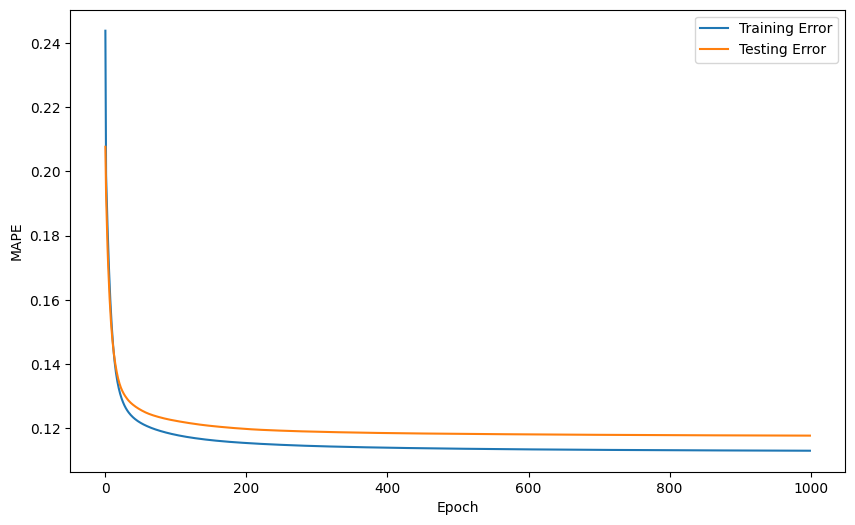

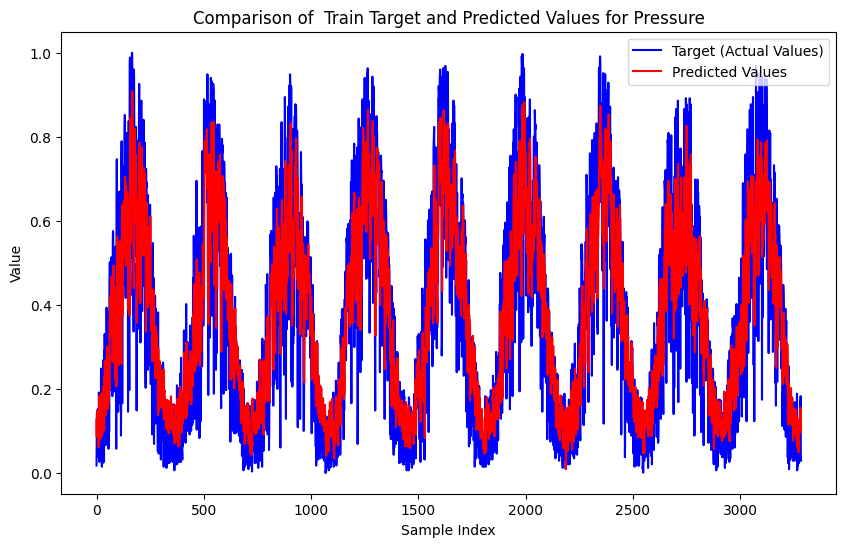

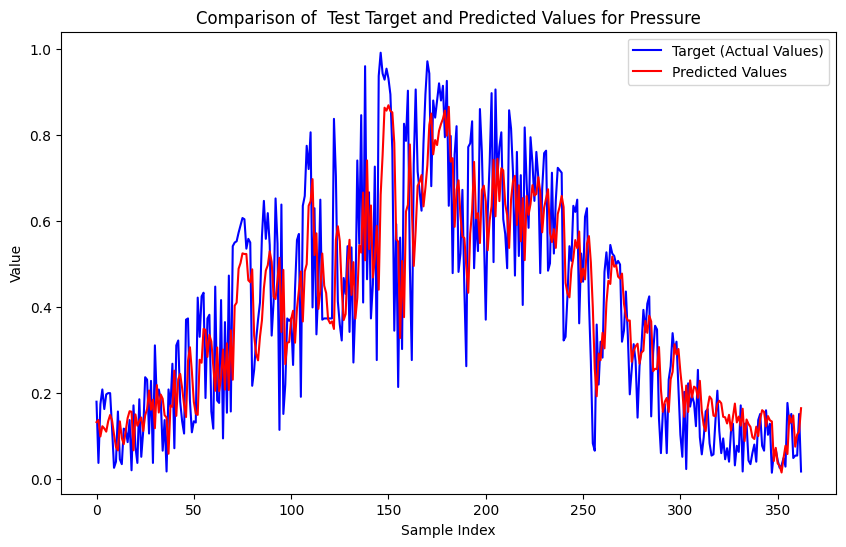

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,19]
Y_test_W = Y_test[:,19]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.00001
threshold = 0.001
epochs = 1000
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue

        lambda_reg = 0.01
        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i] + 2 * lambda_reg * W
        W -= learning_rate * gradient
        #gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        #W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr, label='Training Error')
plt.plot(errors_te, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values for Pressure')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values for Pressure')
plt.legend()
plt.show()


In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.1163262860956611
MEAN MAP of Test: 0.12058983635921455


Optional section (BASEL city)

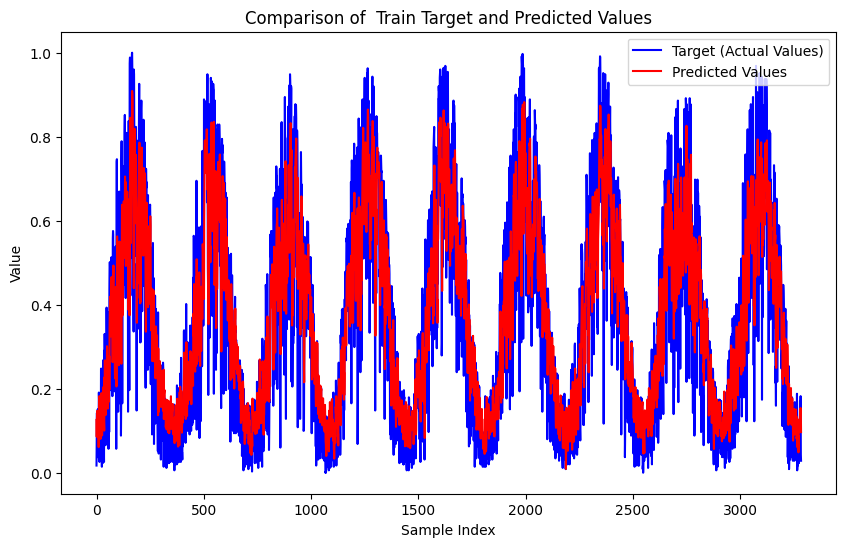

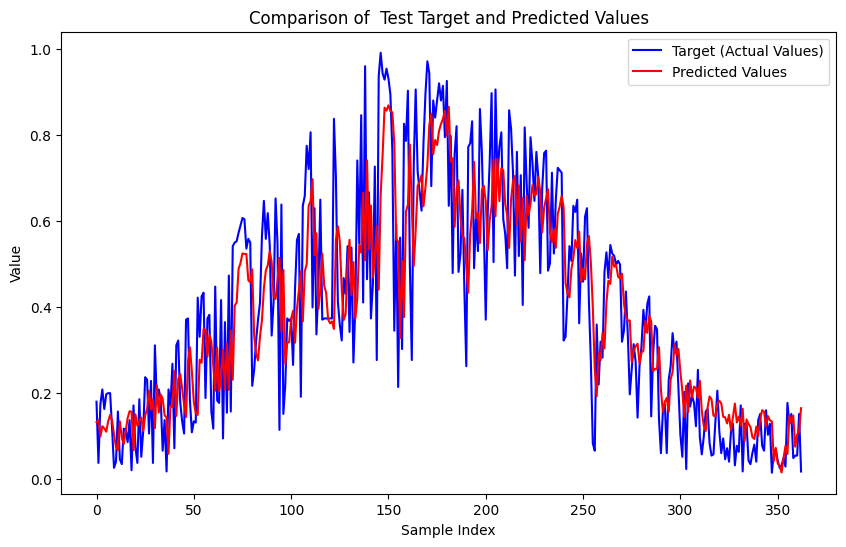

In [ ]:
Y_train_W = Y_train[:,27]
Y_test_W = Y_test[:,27]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values')
plt.legend()
plt.show()

1.3-Prediction Precipitation

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


Training Progress:   0%|          | 3/1000 [00:00<00:42, 23.36it/s]

Epoch 1/1000 - MAP Train: 0.0356 | MAP Test: 0.0332
Epoch 2/1000 - MAP Train: 0.0394 | MAP Test: 0.0357
Epoch 3/1000 - MAP Train: 0.0404 | MAP Test: 0.0361
Epoch 4/1000 - MAP Train: 0.0405 | MAP Test: 0.0361
Epoch 5/1000 - MAP Train: 0.0406 | MAP Test: 0.0362
Epoch 6/1000 - MAP Train: 0.0405 | MAP Test: 0.0362


Training Progress:   1%|          | 9/1000 [00:00<00:37, 26.51it/s]

Epoch 7/1000 - MAP Train: 0.0405 | MAP Test: 0.0362
Epoch 8/1000 - MAP Train: 0.0405 | MAP Test: 0.0362
Epoch 9/1000 - MAP Train: 0.0405 | MAP Test: 0.0362
Epoch 10/1000 - MAP Train: 0.0405 | MAP Test: 0.0362
Epoch 11/1000 - MAP Train: 0.0405 | MAP Test: 0.0363


Training Progress:   1%|          | 12/1000 [00:00<00:41, 23.90it/s]

Epoch 12/1000 - MAP Train: 0.0404 | MAP Test: 0.0363
Epoch 13/1000 - MAP Train: 0.0404 | MAP Test: 0.0363


Training Progress:   2%|▏         | 18/1000 [00:00<00:53, 18.47it/s]

Epoch 14/1000 - MAP Train: 0.0404 | MAP Test: 0.0363
Epoch 15/1000 - MAP Train: 0.0404 | MAP Test: 0.0363
Epoch 16/1000 - MAP Train: 0.0404 | MAP Test: 0.0363
Epoch 17/1000 - MAP Train: 0.0404 | MAP Test: 0.0363
Epoch 18/1000 - MAP Train: 0.0404 | MAP Test: 0.0363
Epoch 19/1000 - MAP Train: 0.0404 | MAP Test: 0.0363


Training Progress:   2%|▏         | 21/1000 [00:01<00:50, 19.49it/s]

Epoch 20/1000 - MAP Train: 0.0404 | MAP Test: 0.0362
Epoch 21/1000 - MAP Train: 0.0403 | MAP Test: 0.0362
Epoch 22/1000 - MAP Train: 0.0403 | MAP Test: 0.0362
Epoch 23/1000 - MAP Train: 0.0403 | MAP Test: 0.0362


Training Progress:   3%|▎         | 27/1000 [00:01<00:54, 17.78it/s]

Epoch 24/1000 - MAP Train: 0.0403 | MAP Test: 0.0362
Epoch 25/1000 - MAP Train: 0.0403 | MAP Test: 0.0362
Epoch 26/1000 - MAP Train: 0.0403 | MAP Test: 0.0362
Epoch 27/1000 - MAP Train: 0.0403 | MAP Test: 0.0362


Training Progress:   3%|▎         | 29/1000 [00:01<01:02, 15.49it/s]

Epoch 28/1000 - MAP Train: 0.0403 | MAP Test: 0.0362
Epoch 29/1000 - MAP Train: 0.0403 | MAP Test: 0.0362


Training Progress:   3%|▎         | 31/1000 [00:01<01:16, 12.58it/s]

Epoch 30/1000 - MAP Train: 0.0403 | MAP Test: 0.0362
Epoch 31/1000 - MAP Train: 0.0402 | MAP Test: 0.0361


Training Progress:   4%|▎         | 35/1000 [00:02<01:12, 13.24it/s]

Epoch 32/1000 - MAP Train: 0.0402 | MAP Test: 0.0361
Epoch 33/1000 - MAP Train: 0.0402 | MAP Test: 0.0361
Epoch 34/1000 - MAP Train: 0.0402 | MAP Test: 0.0361
Epoch 35/1000 - MAP Train: 0.0402 | MAP Test: 0.0361


Training Progress:   4%|▍         | 39/1000 [00:02<01:04, 14.86it/s]

Epoch 36/1000 - MAP Train: 0.0402 | MAP Test: 0.0361
Epoch 37/1000 - MAP Train: 0.0402 | MAP Test: 0.0361
Epoch 38/1000 - MAP Train: 0.0402 | MAP Test: 0.0361
Epoch 39/1000 - MAP Train: 0.0402 | MAP Test: 0.0360


Training Progress:   4%|▍         | 41/1000 [00:02<01:09, 13.88it/s]

Epoch 40/1000 - MAP Train: 0.0402 | MAP Test: 0.0360
Epoch 41/1000 - MAP Train: 0.0402 | MAP Test: 0.0360


Training Progress:   4%|▍         | 43/1000 [00:02<01:19, 12.04it/s]

Epoch 42/1000 - MAP Train: 0.0401 | MAP Test: 0.0360
Epoch 43/1000 - MAP Train: 0.0401 | MAP Test: 0.0360


Training Progress:   4%|▍         | 45/1000 [00:03<01:23, 11.42it/s]

Epoch 44/1000 - MAP Train: 0.0401 | MAP Test: 0.0360
Epoch 45/1000 - MAP Train: 0.0401 | MAP Test: 0.0360
Epoch 46/1000 - MAP Train: 0.0401 | MAP Test: 0.0360


Training Progress:   5%|▍         | 49/1000 [00:03<01:13, 12.99it/s]

Epoch 47/1000 - MAP Train: 0.0401 | MAP Test: 0.0359
Epoch 48/1000 - MAP Train: 0.0401 | MAP Test: 0.0359
Epoch 49/1000 - MAP Train: 0.0401 | MAP Test: 0.0359
Epoch 50/1000 - MAP Train: 0.0401 | MAP Test: 0.0359


Training Progress:   5%|▌         | 51/1000 [00:03<01:13, 12.98it/s]

Epoch 51/1000 - MAP Train: 0.0401 | MAP Test: 0.0359
Epoch 52/1000 - MAP Train: 0.0401 | MAP Test: 0.0359


Training Progress:   5%|▌         | 53/1000 [00:03<01:33, 10.17it/s]

Epoch 53/1000 - MAP Train: 0.0401 | MAP Test: 0.0359
Epoch 54/1000 - MAP Train: 0.0401 | MAP Test: 0.0359


Training Progress:   6%|▌         | 57/1000 [00:04<01:24, 11.21it/s]

Epoch 55/1000 - MAP Train: 0.0401 | MAP Test: 0.0358
Epoch 56/1000 - MAP Train: 0.0400 | MAP Test: 0.0358
Epoch 57/1000 - MAP Train: 0.0400 | MAP Test: 0.0358
Epoch 58/1000 - MAP Train: 0.0400 | MAP Test: 0.0358


Training Progress:   6%|▌         | 62/1000 [00:04<01:05, 14.22it/s]

Epoch 59/1000 - MAP Train: 0.0400 | MAP Test: 0.0358
Epoch 60/1000 - MAP Train: 0.0400 | MAP Test: 0.0358
Epoch 61/1000 - MAP Train: 0.0400 | MAP Test: 0.0358
Epoch 62/1000 - MAP Train: 0.0400 | MAP Test: 0.0358


Training Progress:   6%|▋         | 64/1000 [00:04<01:01, 15.18it/s]

Epoch 63/1000 - MAP Train: 0.0400 | MAP Test: 0.0358
Epoch 64/1000 - MAP Train: 0.0400 | MAP Test: 0.0357
Epoch 65/1000 - MAP Train: 0.0400 | MAP Test: 0.0357


Training Progress:   7%|▋         | 68/1000 [00:04<01:07, 13.73it/s]

Epoch 66/1000 - MAP Train: 0.0400 | MAP Test: 0.0357
Epoch 67/1000 - MAP Train: 0.0400 | MAP Test: 0.0357
Epoch 68/1000 - MAP Train: 0.0400 | MAP Test: 0.0357
Epoch 69/1000 - MAP Train: 0.0400 | MAP Test: 0.0357
Epoch 70/1000 - MAP Train: 0.0400 | MAP Test: 0.0357


Training Progress:   7%|▋         | 74/1000 [00:05<00:49, 18.64it/s]

Epoch 71/1000 - MAP Train: 0.0400 | MAP Test: 0.0357
Epoch 72/1000 - MAP Train: 0.0399 | MAP Test: 0.0357
Epoch 73/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 74/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 75/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 76/1000 - MAP Train: 0.0399 | MAP Test: 0.0356


Training Progress:   8%|▊         | 80/1000 [00:05<00:41, 22.18it/s]

Epoch 77/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 78/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 79/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 80/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 81/1000 - MAP Train: 0.0399 | MAP Test: 0.0356


Training Progress:   9%|▊         | 86/1000 [00:05<00:42, 21.46it/s]

Epoch 82/1000 - MAP Train: 0.0399 | MAP Test: 0.0356
Epoch 83/1000 - MAP Train: 0.0399 | MAP Test: 0.0355
Epoch 84/1000 - MAP Train: 0.0399 | MAP Test: 0.0355
Epoch 85/1000 - MAP Train: 0.0399 | MAP Test: 0.0355
Epoch 86/1000 - MAP Train: 0.0399 | MAP Test: 0.0355


Training Progress:   9%|▊         | 86/1000 [00:05<00:42, 21.46it/s]

Epoch 87/1000 - MAP Train: 0.0399 | MAP Test: 0.0355
Epoch 88/1000 - MAP Train: 0.0399 | MAP Test: 0.0355


Training Progress:   9%|▉         | 91/1000 [00:05<00:56, 16.01it/s]

Epoch 89/1000 - MAP Train: 0.0399 | MAP Test: 0.0355
Epoch 90/1000 - MAP Train: 0.0399 | MAP Test: 0.0355
Epoch 91/1000 - MAP Train: 0.0398 | MAP Test: 0.0355
Epoch 92/1000 - MAP Train: 0.0398 | MAP Test: 0.0355
Epoch 93/1000 - MAP Train: 0.0398 | MAP Test: 0.0354


Training Progress:  10%|▉         | 97/1000 [00:06<00:44, 20.22it/s]

Epoch 94/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 95/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 96/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 97/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 98/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 99/1000 - MAP Train: 0.0398 | MAP Test: 0.0354


Epoch 100/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 101/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 102/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 103/1000 - MAP Train: 0.0398 | MAP Test: 0.0354
Epoch 104/1000 - MAP Train: 0.0398 | MAP Test: 0.0354


Training Progress:  11%|█         | 109/1000 [00:06<00:36, 24.09it/s]

Epoch 105/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 106/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 107/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 108/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 109/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 110/1000 - MAP Train: 0.0398 | MAP Test: 0.0353


Training Progress:  12%|█▏        | 115/1000 [00:06<00:38, 22.83it/s]

Epoch 111/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 112/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 113/1000 - MAP Train: 0.0398 | MAP Test: 0.0353
Epoch 114/1000 - MAP Train: 0.0397 | MAP Test: 0.0353
Epoch 115/1000 - MAP Train: 0.0397 | MAP Test: 0.0353


Training Progress:  12%|█▏        | 118/1000 [00:07<00:39, 22.16it/s]

Epoch 116/1000 - MAP Train: 0.0397 | MAP Test: 0.0353
Epoch 117/1000 - MAP Train: 0.0397 | MAP Test: 0.0353
Epoch 118/1000 - MAP Train: 0.0397 | MAP Test: 0.0353
Epoch 119/1000 - MAP Train: 0.0397 | MAP Test: 0.0352


Training Progress:  12%|█▏        | 121/1000 [00:07<00:41, 21.39it/s]

Epoch 120/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 121/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 122/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 123/1000 - MAP Train: 0.0397 | MAP Test: 0.0352


Training Progress:  13%|█▎        | 127/1000 [00:07<00:45, 19.28it/s]

Epoch 124/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 125/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 126/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 127/1000 - MAP Train: 0.0397 | MAP Test: 0.0352


Training Progress:  13%|█▎        | 131/1000 [00:07<00:45, 19.07it/s]

Epoch 128/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 129/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 130/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 131/1000 - MAP Train: 0.0397 | MAP Test: 0.0352


Training Progress:  13%|█▎        | 133/1000 [00:07<00:48, 18.03it/s]

Epoch 132/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 133/1000 - MAP Train: 0.0397 | MAP Test: 0.0352
Epoch 134/1000 - MAP Train: 0.0397 | MAP Test: 0.0351
Epoch 135/1000 - MAP Train: 0.0397 | MAP Test: 0.0351


Training Progress:  14%|█▍        | 138/1000 [00:08<00:58, 14.81it/s]

Epoch 136/1000 - MAP Train: 0.0397 | MAP Test: 0.0351
Epoch 137/1000 - MAP Train: 0.0397 | MAP Test: 0.0351
Epoch 138/1000 - MAP Train: 0.0397 | MAP Test: 0.0351
Epoch 139/1000 - MAP Train: 0.0397 | MAP Test: 0.0351


Training Progress:  14%|█▍        | 144/1000 [00:08<00:44, 19.42it/s]

Epoch 140/1000 - MAP Train: 0.0397 | MAP Test: 0.0351
Epoch 141/1000 - MAP Train: 0.0397 | MAP Test: 0.0351
Epoch 142/1000 - MAP Train: 0.0397 | MAP Test: 0.0351
Epoch 143/1000 - MAP Train: 0.0396 | MAP Test: 0.0351
Epoch 144/1000 - MAP Train: 0.0396 | MAP Test: 0.0351


Training Progress:  15%|█▍        | 147/1000 [00:08<00:43, 19.41it/s]

Epoch 145/1000 - MAP Train: 0.0396 | MAP Test: 0.0351
Epoch 146/1000 - MAP Train: 0.0396 | MAP Test: 0.0351
Epoch 147/1000 - MAP Train: 0.0396 | MAP Test: 0.0351
Epoch 148/1000 - MAP Train: 0.0396 | MAP Test: 0.0351
Epoch 149/1000 - MAP Train: 0.0396 | MAP Test: 0.0351


Training Progress:  15%|█▌        | 153/1000 [00:08<00:40, 20.91it/s]

Epoch 150/1000 - MAP Train: 0.0396 | MAP Test: 0.0351
Epoch 151/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 152/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 153/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 154/1000 - MAP Train: 0.0396 | MAP Test: 0.0350


Training Progress:  16%|█▌        | 156/1000 [00:09<00:42, 20.09it/s]

Epoch 155/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 156/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 157/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 158/1000 - MAP Train: 0.0396 | MAP Test: 0.0350


Training Progress:  16%|█▌        | 161/1000 [00:09<00:44, 18.80it/s]

Epoch 159/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 160/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 161/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 162/1000 - MAP Train: 0.0396 | MAP Test: 0.0350


Training Progress:  17%|█▋        | 166/1000 [00:09<00:45, 18.42it/s]

Epoch 163/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 164/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 165/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 166/1000 - MAP Train: 0.0396 | MAP Test: 0.0350


Training Progress:  17%|█▋        | 168/1000 [00:09<00:46, 17.71it/s]

Epoch 167/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 168/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 169/1000 - MAP Train: 0.0396 | MAP Test: 0.0350


Training Progress:  17%|█▋        | 170/1000 [00:10<00:55, 14.99it/s]

Epoch 170/1000 - MAP Train: 0.0396 | MAP Test: 0.0350
Epoch 171/1000 - MAP Train: 0.0396 | MAP Test: 0.0349


Training Progress:  17%|█▋        | 174/1000 [00:10<01:03, 12.94it/s]

Epoch 172/1000 - MAP Train: 0.0396 | MAP Test: 0.0349
Epoch 173/1000 - MAP Train: 0.0396 | MAP Test: 0.0349
Epoch 174/1000 - MAP Train: 0.0396 | MAP Test: 0.0349
Epoch 175/1000 - MAP Train: 0.0396 | MAP Test: 0.0349
Epoch 176/1000 - MAP Train: 0.0396 | MAP Test: 0.0349


Training Progress:  18%|█▊        | 180/1000 [00:10<00:44, 18.40it/s]

Epoch 177/1000 - MAP Train: 0.0396 | MAP Test: 0.0349
Epoch 178/1000 - MAP Train: 0.0396 | MAP Test: 0.0349
Epoch 179/1000 - MAP Train: 0.0396 | MAP Test: 0.0349
Epoch 180/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 181/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 182/1000 - MAP Train: 0.0395 | MAP Test: 0.0349


Training Progress:  19%|█▊        | 186/1000 [00:10<00:39, 20.77it/s]

Epoch 183/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 184/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 185/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 186/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 187/1000 - MAP Train: 0.0395 | MAP Test: 0.0349


Training Progress:  19%|█▉        | 192/1000 [00:11<00:34, 23.44it/s]

Epoch 188/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 189/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 190/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 191/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 192/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 193/1000 - MAP Train: 0.0395 | MAP Test: 0.0349


Training Progress:  20%|█▉        | 195/1000 [00:11<00:38, 21.03it/s]

Epoch 194/1000 - MAP Train: 0.0395 | MAP Test: 0.0349
Epoch 195/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 196/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 197/1000 - MAP Train: 0.0395 | MAP Test: 0.0348


Training Progress:  20%|██        | 201/1000 [00:11<00:40, 19.74it/s]

Epoch 198/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 199/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 200/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 201/1000 - MAP Train: 0.0395 | MAP Test: 0.0348


Training Progress:  20%|██        | 204/1000 [00:11<00:41, 19.07it/s]

Epoch 202/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 203/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 204/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 205/1000 - MAP Train: 0.0395 | MAP Test: 0.0348


Training Progress:  21%|██        | 208/1000 [00:11<00:43, 18.15it/s]

Epoch 206/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 207/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 208/1000 - MAP Train: 0.0395 | MAP Test: 0.0348


Training Progress:  21%|██        | 210/1000 [00:12<00:58, 13.40it/s]

Epoch 209/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 210/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 211/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 212/1000 - MAP Train: 0.0395 | MAP Test: 0.0348


Training Progress:  22%|██▏       | 215/1000 [00:12<00:49, 15.84it/s]

Epoch 213/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 214/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 215/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 216/1000 - MAP Train: 0.0395 | MAP Test: 0.0348


Training Progress:  22%|██▏       | 220/1000 [00:12<00:42, 18.34it/s]

Epoch 217/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 218/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 219/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 220/1000 - MAP Train: 0.0395 | MAP Test: 0.0348
Epoch 221/1000 - MAP Train: 0.0395 | MAP Test: 0.0348


Training Progress:  23%|██▎       | 226/1000 [00:12<00:35, 21.67it/s]

Epoch 222/1000 - MAP Train: 0.0395 | MAP Test: 0.0347
Epoch 223/1000 - MAP Train: 0.0395 | MAP Test: 0.0347
Epoch 224/1000 - MAP Train: 0.0395 | MAP Test: 0.0347
Epoch 225/1000 - MAP Train: 0.0395 | MAP Test: 0.0347
Epoch 226/1000 - MAP Train: 0.0395 | MAP Test: 0.0347


Training Progress:  23%|██▎       | 229/1000 [00:13<00:38, 19.97it/s]

Epoch 227/1000 - MAP Train: 0.0395 | MAP Test: 0.0347
Epoch 228/1000 - MAP Train: 0.0395 | MAP Test: 0.0347
Epoch 229/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 230/1000 - MAP Train: 0.0394 | MAP Test: 0.0347


Training Progress:  24%|██▎       | 235/1000 [00:13<00:39, 19.45it/s]

Epoch 231/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 232/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 233/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 234/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 235/1000 - MAP Train: 0.0394 | MAP Test: 0.0347


Training Progress:  24%|██▍       | 238/1000 [00:13<00:39, 19.21it/s]

Epoch 236/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 237/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 238/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 239/1000 - MAP Train: 0.0394 | MAP Test: 0.0347


Training Progress:  24%|██▍       | 242/1000 [00:13<00:41, 18.19it/s]

Epoch 240/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 241/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 242/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 243/1000 - MAP Train: 0.0394 | MAP Test: 0.0347


Training Progress:  24%|██▍       | 244/1000 [00:14<00:47, 15.96it/s]

Epoch 244/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 245/1000 - MAP Train: 0.0394 | MAP Test: 0.0347


Training Progress:  25%|██▍       | 248/1000 [00:14<00:57, 13.06it/s]

Epoch 246/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 247/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 248/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 249/1000 - MAP Train: 0.0394 | MAP Test: 0.0347


Training Progress:  25%|██▌       | 252/1000 [00:14<00:49, 15.03it/s]

Epoch 250/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 251/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 252/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 253/1000 - MAP Train: 0.0394 | MAP Test: 0.0347


Training Progress:  26%|██▌       | 256/1000 [00:14<00:45, 16.42it/s]

Epoch 254/1000 - MAP Train: 0.0394 | MAP Test: 0.0347
Epoch 255/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 256/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 257/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  26%|██▌       | 260/1000 [00:15<00:42, 17.41it/s]

Epoch 258/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 259/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 260/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 261/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  26%|██▋       | 264/1000 [00:15<00:46, 15.89it/s]

Epoch 262/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 263/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 264/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  27%|██▋       | 268/1000 [00:15<00:45, 16.08it/s]

Epoch 265/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 266/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 267/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 268/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  27%|██▋       | 272/1000 [00:15<00:44, 16.54it/s]

Epoch 269/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 270/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 271/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 272/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  27%|██▋       | 274/1000 [00:16<00:51, 14.02it/s]

Epoch 273/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 274/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  28%|██▊       | 276/1000 [00:16<01:01, 11.74it/s]

Epoch 275/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 276/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 277/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  28%|██▊       | 280/1000 [00:16<00:54, 13.32it/s]

Epoch 278/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 279/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 280/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 281/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  28%|██▊       | 284/1000 [00:16<00:48, 14.84it/s]

Epoch 282/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 283/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 284/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 285/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  29%|██▉       | 288/1000 [00:17<00:45, 15.63it/s]

Epoch 286/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 287/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 288/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 289/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  29%|██▉       | 292/1000 [00:17<00:50, 14.06it/s]

Epoch 290/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 291/1000 - MAP Train: 0.0394 | MAP Test: 0.0346
Epoch 292/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Epoch 293/1000 - MAP Train: 0.0394 | MAP Test: 0.0346


Training Progress:  30%|██▉       | 296/1000 [00:17<01:13,  9.61it/s]

Epoch 294/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 295/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 296/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  30%|███       | 300/1000 [00:18<00:58, 11.99it/s]

Epoch 297/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 298/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 299/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 300/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  30%|███       | 304/1000 [00:18<00:50, 13.91it/s]

Epoch 301/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 302/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 303/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 304/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  31%|███       | 309/1000 [00:18<00:39, 17.67it/s]

Epoch 305/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 306/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 307/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 308/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 309/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  31%|███       | 312/1000 [00:18<00:34, 19.87it/s]

Epoch 310/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 311/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 312/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 313/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 314/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 315/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  32%|███▏      | 318/1000 [00:19<00:32, 21.22it/s]

Epoch 316/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 317/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 318/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 319/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  32%|███▏      | 321/1000 [00:19<00:38, 17.53it/s]

Epoch 320/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 321/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 322/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 323/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  33%|███▎      | 326/1000 [00:19<00:37, 18.02it/s]

Epoch 324/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 325/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 326/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 327/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  33%|███▎      | 331/1000 [00:19<00:37, 17.93it/s]

Epoch 328/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 329/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 330/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 331/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Epoch 332/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 333/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  34%|███▎      | 335/1000 [00:20<00:50, 13.28it/s]

Epoch 334/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 335/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 336/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 337/1000 - MAP Train: 0.0393 | MAP Test: 0.0345


Training Progress:  34%|███▍      | 341/1000 [00:20<00:36, 18.23it/s]

Epoch 338/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 339/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 340/1000 - MAP Train: 0.0393 | MAP Test: 0.0345
Epoch 341/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 342/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 343/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  35%|███▍      | 347/1000 [00:20<00:32, 20.19it/s]

Epoch 344/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 345/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 346/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 347/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 348/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 349/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  35%|███▌      | 350/1000 [00:20<00:29, 21.79it/s]

Epoch 350/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 351/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 352/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  35%|███▌      | 353/1000 [00:21<00:37, 17.41it/s]

Epoch 353/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 354/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Epoch 355/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  36%|███▌      | 357/1000 [00:21<01:03, 10.14it/s]

Epoch 356/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 357/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 358/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  36%|███▌      | 361/1000 [00:22<00:54, 11.63it/s]

Epoch 359/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 360/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 361/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  36%|███▋      | 363/1000 [00:22<00:54, 11.59it/s]

Epoch 362/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 363/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  36%|███▋      | 365/1000 [00:22<01:04,  9.88it/s]

Epoch 364/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 365/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  37%|███▋      | 367/1000 [00:22<01:10,  8.96it/s]

Epoch 366/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 367/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  37%|███▋      | 369/1000 [00:22<01:12,  8.68it/s]

Epoch 368/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 369/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  37%|███▋      | 371/1000 [00:23<01:06,  9.48it/s]

Epoch 370/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 371/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  37%|███▋      | 374/1000 [00:23<01:07,  9.24it/s]

Epoch 372/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 373/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 374/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  38%|███▊      | 377/1000 [00:23<01:01, 10.07it/s]

Epoch 375/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 376/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 377/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  38%|███▊      | 379/1000 [00:23<00:57, 10.81it/s]

Epoch 378/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 379/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  38%|███▊      | 379/1000 [00:24<00:57, 10.81it/s]

Epoch 380/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 381/1000 - MAP Train: 0.0393 | MAP Test: 0.0344


Training Progress:  38%|███▊      | 384/1000 [00:24<01:07,  9.14it/s]

Epoch 382/1000 - MAP Train: 0.0393 | MAP Test: 0.0344
Epoch 383/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 384/1000 - MAP Train: 0.0392 | MAP Test: 0.0344


Training Progress:  39%|███▊      | 387/1000 [00:24<01:04,  9.51it/s]

Epoch 385/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 386/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 387/1000 - MAP Train: 0.0392 | MAP Test: 0.0344


Epoch 388/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 389/1000 - MAP Train: 0.0392 | MAP Test: 0.0344


Training Progress:  39%|███▉      | 391/1000 [00:25<01:00,  9.99it/s]

Epoch 390/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 391/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 392/1000 - MAP Train: 0.0392 | MAP Test: 0.0344


Training Progress:  39%|███▉      | 393/1000 [00:25<00:57, 10.52it/s]

Epoch 393/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 394/1000 - MAP Train: 0.0392 | MAP Test: 0.0344


Training Progress:  40%|███▉      | 397/1000 [00:25<00:59, 10.16it/s]

Epoch 395/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 396/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 397/1000 - MAP Train: 0.0392 | MAP Test: 0.0344


Training Progress:  40%|███▉      | 399/1000 [00:26<01:05,  9.20it/s]

Epoch 398/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 399/1000 - MAP Train: 0.0392 | MAP Test: 0.0344


Training Progress:  40%|████      | 401/1000 [00:26<01:15,  7.93it/s]

Epoch 400/1000 - MAP Train: 0.0392 | MAP Test: 0.0344
Epoch 401/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  40%|████      | 403/1000 [00:26<01:16,  7.85it/s]

Epoch 402/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 403/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  40%|████      | 405/1000 [00:26<01:12,  8.22it/s]

Epoch 404/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 405/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  41%|████      | 408/1000 [00:27<01:07,  8.78it/s]

Epoch 406/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 407/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 408/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  41%|████      | 410/1000 [00:27<01:07,  8.72it/s]

Epoch 409/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 410/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 411/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  41%|████▏     | 414/1000 [00:27<00:53, 10.93it/s]

Epoch 412/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 413/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 414/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  42%|████▏     | 416/1000 [00:28<01:02,  9.38it/s]

Epoch 415/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 416/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  42%|████▏     | 418/1000 [00:28<01:27,  6.66it/s]

Epoch 417/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 418/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  42%|████▏     | 420/1000 [00:29<01:44,  5.56it/s]

Epoch 419/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 420/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  42%|████▏     | 422/1000 [00:29<01:28,  6.53it/s]

Epoch 421/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 422/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  42%|████▏     | 424/1000 [00:29<01:28,  6.53it/s]

Epoch 423/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 424/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  43%|████▎     | 426/1000 [00:29<01:18,  7.28it/s]

Epoch 425/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 426/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  43%|████▎     | 428/1000 [00:30<01:16,  7.49it/s]

Epoch 427/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 428/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  43%|████▎     | 430/1000 [00:30<01:24,  6.74it/s]

Epoch 429/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 430/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Epoch 431/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  43%|████▎     | 432/1000 [00:30<01:37,  5.85it/s]

Epoch 432/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  43%|████▎     | 433/1000 [00:31<02:01,  4.68it/s]

Epoch 433/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  44%|████▎     | 435/1000 [00:31<02:05,  4.51it/s]

Epoch 434/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 435/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  44%|████▍     | 438/1000 [00:31<01:20,  7.00it/s]

Epoch 436/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 437/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 438/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  44%|████▍     | 440/1000 [00:32<01:09,  8.02it/s]

Epoch 439/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 440/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 441/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  44%|████▍     | 443/1000 [00:32<01:03,  8.74it/s]

Epoch 442/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 443/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  44%|████▍     | 445/1000 [00:32<01:06,  8.36it/s]

Epoch 444/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 445/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  45%|████▍     | 447/1000 [00:32<01:12,  7.59it/s]

Epoch 446/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 447/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  45%|████▌     | 450/1000 [00:33<01:02,  8.76it/s]

Epoch 448/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 449/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 450/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  45%|████▌     | 452/1000 [00:33<01:05,  8.40it/s]

Epoch 451/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 452/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  46%|████▌     | 455/1000 [00:33<00:54,  9.93it/s]

Epoch 453/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 454/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 455/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  46%|████▌     | 455/1000 [00:33<00:54,  9.93it/s]

Epoch 456/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  46%|████▌     | 457/1000 [00:34<01:03,  8.58it/s]

Epoch 457/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  46%|████▌     | 459/1000 [00:34<01:33,  5.82it/s]

Epoch 458/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 459/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  46%|████▌     | 462/1000 [00:34<01:08,  7.90it/s]

Epoch 460/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 461/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 462/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  46%|████▋     | 464/1000 [00:35<01:00,  8.86it/s]

Epoch 463/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 464/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 465/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  47%|████▋     | 466/1000 [00:35<00:55,  9.54it/s]

Epoch 466/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 467/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  47%|████▋     | 469/1000 [00:35<00:59,  8.90it/s]

Epoch 468/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 469/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  47%|████▋     | 471/1000 [00:35<00:53,  9.87it/s]

Epoch 470/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 471/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 472/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  47%|████▋     | 473/1000 [00:36<00:50, 10.34it/s]

Epoch 473/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 474/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  48%|████▊     | 475/1000 [00:36<00:59,  8.78it/s]

Epoch 475/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 476/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  48%|████▊     | 478/1000 [00:36<01:18,  6.65it/s]

Epoch 477/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 478/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Epoch 479/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 480/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  48%|████▊     | 482/1000 [00:37<01:03,  8.13it/s]

Epoch 481/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 482/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 483/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  48%|████▊     | 485/1000 [00:37<00:59,  8.58it/s]

Epoch 484/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 485/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  49%|████▊     | 486/1000 [00:37<01:00,  8.54it/s]

Epoch 486/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 487/1000 - MAP Train: 0.0392 | MAP Test: 0.0343


Training Progress:  49%|████▉     | 489/1000 [00:38<00:59,  8.60it/s]

Epoch 488/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 489/1000 - MAP Train: 0.0392 | MAP Test: 0.0343
Epoch 490/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  49%|████▉     | 492/1000 [00:38<00:54,  9.40it/s]

Epoch 491/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 492/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Epoch 493/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  49%|████▉     | 494/1000 [00:38<01:15,  6.73it/s]

Epoch 494/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  50%|████▉     | 496/1000 [00:39<01:24,  5.97it/s]

Epoch 495/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 496/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  50%|████▉     | 497/1000 [00:39<01:21,  6.19it/s]

Epoch 497/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 498/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  50%|█████     | 500/1000 [00:39<01:04,  7.77it/s]

Epoch 499/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 500/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 501/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  50%|█████     | 503/1000 [00:39<00:56,  8.77it/s]

Epoch 502/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 503/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  50%|█████     | 505/1000 [00:40<00:49, 10.08it/s]

Epoch 504/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 505/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 506/1000 - MAP Train: 0.0392 | MAP Test: 0.0342


Training Progress:  51%|█████     | 509/1000 [00:40<00:42, 11.44it/s]

Epoch 507/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 508/1000 - MAP Train: 0.0392 | MAP Test: 0.0342
Epoch 509/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  51%|█████     | 511/1000 [00:40<00:50,  9.76it/s]

Epoch 510/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 511/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 512/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  51%|█████▏    | 513/1000 [00:40<00:50,  9.71it/s]

Epoch 513/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 514/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  52%|█████▏    | 516/1000 [00:41<00:59,  8.09it/s]

Epoch 515/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 516/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  52%|█████▏    | 517/1000 [00:41<01:06,  7.30it/s]

Epoch 517/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  52%|█████▏    | 518/1000 [00:41<01:19,  6.06it/s]

Epoch 518/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 519/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  52%|█████▏    | 521/1000 [00:42<01:22,  5.81it/s]

Epoch 520/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 521/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  52%|█████▏    | 523/1000 [00:42<01:14,  6.38it/s]

Epoch 522/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 523/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  52%|█████▏    | 524/1000 [00:42<01:14,  6.35it/s]

Epoch 524/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  53%|█████▎    | 526/1000 [00:43<01:18,  6.01it/s]

Epoch 525/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 526/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  53%|█████▎    | 528/1000 [00:43<01:27,  5.39it/s]

Epoch 527/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 528/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  53%|█████▎    | 530/1000 [00:43<01:26,  5.43it/s]

Epoch 529/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 530/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  53%|█████▎    | 532/1000 [00:44<01:18,  5.99it/s]

Epoch 531/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 532/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  53%|█████▎    | 534/1000 [00:44<01:03,  7.31it/s]

Epoch 533/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 534/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  54%|█████▎    | 536/1000 [00:44<01:03,  7.34it/s]

Epoch 535/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 536/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  54%|█████▍    | 538/1000 [00:44<01:05,  7.05it/s]

Epoch 537/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 538/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  54%|█████▍    | 540/1000 [00:45<00:58,  7.87it/s]

Epoch 539/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 540/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  54%|█████▍    | 543/1000 [00:45<00:50,  9.00it/s]

Epoch 541/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 542/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 543/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  55%|█████▍    | 545/1000 [00:45<00:59,  7.70it/s]

Epoch 544/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 545/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  55%|█████▍    | 547/1000 [00:46<00:53,  8.43it/s]

Epoch 546/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 547/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Epoch 548/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  55%|█████▍    | 549/1000 [00:46<01:11,  6.35it/s]

Epoch 549/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  55%|█████▌    | 550/1000 [00:46<01:24,  5.34it/s]

Epoch 550/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  55%|█████▌    | 553/1000 [00:47<01:05,  6.85it/s]

Epoch 551/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 552/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 553/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Epoch 554/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 555/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  56%|█████▌    | 558/1000 [00:47<00:44,  9.90it/s]

Epoch 556/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 557/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 558/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  56%|█████▌    | 560/1000 [00:47<00:52,  8.40it/s]

Epoch 559/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 560/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  56%|█████▋    | 563/1000 [00:48<00:44,  9.72it/s]

Epoch 561/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 562/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 563/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  56%|█████▋    | 565/1000 [00:48<00:41, 10.50it/s]

Epoch 564/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 565/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 566/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  57%|█████▋    | 568/1000 [00:48<00:46,  9.30it/s]

Epoch 567/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 568/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 569/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  57%|█████▋    | 572/1000 [00:49<00:41, 10.44it/s]

Epoch 570/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 571/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 572/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  57%|█████▋    | 574/1000 [00:49<00:37, 11.31it/s]

Epoch 573/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 574/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 575/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  58%|█████▊    | 577/1000 [00:49<00:52,  8.02it/s]

Epoch 576/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 577/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  58%|█████▊    | 579/1000 [00:49<00:55,  7.52it/s]

Epoch 578/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 579/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  58%|█████▊    | 582/1000 [00:50<00:45,  9.10it/s]

Epoch 580/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 581/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 582/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  58%|█████▊    | 584/1000 [00:50<00:40, 10.37it/s]

Epoch 583/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 584/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 585/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  59%|█████▉    | 588/1000 [00:50<00:41,  9.94it/s]

Epoch 586/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 587/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 588/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  59%|█████▉    | 590/1000 [00:51<00:39, 10.39it/s]

Epoch 589/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 590/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 591/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  59%|█████▉    | 594/1000 [00:51<00:36, 11.04it/s]

Epoch 592/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 593/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 594/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  60%|█████▉    | 596/1000 [00:51<00:34, 11.69it/s]

Epoch 595/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 596/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 597/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  60%|██████    | 600/1000 [00:51<00:31, 12.66it/s]

Epoch 598/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 599/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 600/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Epoch 601/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 602/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  60%|██████    | 604/1000 [00:52<00:37, 10.67it/s]

Epoch 603/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 604/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  61%|██████    | 606/1000 [00:52<00:44,  8.85it/s]

Epoch 605/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 606/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Epoch 607/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 608/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 609/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  61%|██████    | 612/1000 [00:52<00:35, 10.95it/s]

Epoch 610/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 611/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 612/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  61%|██████▏   | 614/1000 [00:53<00:35, 10.75it/s]

Epoch 613/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 614/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 615/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  62%|██████▏   | 616/1000 [00:53<00:38,  9.98it/s]

Epoch 616/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 617/1000 - MAP Train: 0.0391 | MAP Test: 0.0342


Training Progress:  62%|██████▏   | 620/1000 [00:53<00:36, 10.40it/s]

Epoch 618/1000 - MAP Train: 0.0391 | MAP Test: 0.0342
Epoch 619/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 620/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  62%|██████▏   | 622/1000 [00:54<00:38,  9.78it/s]

Epoch 621/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 622/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  62%|██████▏   | 622/1000 [00:54<00:38,  9.78it/s]

Epoch 623/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 624/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  63%|██████▎   | 626/1000 [00:54<00:56,  6.67it/s]

Epoch 625/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 626/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  63%|██████▎   | 629/1000 [00:55<00:44,  8.36it/s]

Epoch 627/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 628/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 629/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  63%|██████▎   | 630/1000 [00:55<00:46,  8.01it/s]

Epoch 630/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  63%|██████▎   | 631/1000 [00:55<00:55,  6.69it/s]

Epoch 631/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  63%|██████▎   | 632/1000 [00:55<01:03,  5.81it/s]

Epoch 632/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  63%|██████▎   | 633/1000 [00:55<01:14,  4.95it/s]

Epoch 633/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  63%|██████▎   | 634/1000 [00:56<01:21,  4.48it/s]

Epoch 634/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▎   | 635/1000 [00:56<01:20,  4.52it/s]

Epoch 635/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▎   | 636/1000 [00:56<01:21,  4.49it/s]

Epoch 636/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▎   | 637/1000 [00:56<01:27,  4.14it/s]

Epoch 637/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▍   | 638/1000 [00:57<01:47,  3.36it/s]

Epoch 638/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Epoch 639/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▍   | 640/1000 [00:57<01:36,  3.74it/s]

Epoch 640/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▍   | 641/1000 [00:58<01:39,  3.60it/s]

Epoch 641/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▍   | 642/1000 [00:58<01:37,  3.67it/s]

Epoch 642/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▍   | 643/1000 [00:58<01:34,  3.79it/s]

Epoch 643/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  64%|██████▍   | 645/1000 [00:59<01:16,  4.65it/s]

Epoch 644/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 645/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  65%|██████▍   | 647/1000 [00:59<01:15,  4.70it/s]

Epoch 646/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 647/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  65%|██████▍   | 649/1000 [00:59<01:07,  5.19it/s]

Epoch 648/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 649/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  65%|██████▌   | 651/1000 [01:00<00:58,  6.00it/s]

Epoch 650/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 651/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  65%|██████▌   | 653/1000 [01:00<00:58,  5.90it/s]

Epoch 652/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 653/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  65%|██████▌   | 654/1000 [01:00<01:09,  5.01it/s]

Epoch 654/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  66%|██████▌   | 655/1000 [01:01<01:30,  3.83it/s]

Epoch 655/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  66%|██████▌   | 657/1000 [01:01<01:20,  4.25it/s]

Epoch 656/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 657/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  66%|██████▌   | 659/1000 [01:01<01:06,  5.16it/s]

Epoch 658/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 659/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  66%|██████▌   | 661/1000 [01:02<00:54,  6.17it/s]

Epoch 660/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 661/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  66%|██████▋   | 663/1000 [01:02<00:53,  6.28it/s]

Epoch 662/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 663/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  66%|██████▋   | 665/1000 [01:02<00:52,  6.34it/s]

Epoch 664/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 665/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  67%|██████▋   | 667/1000 [01:03<00:44,  7.50it/s]

Epoch 666/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 667/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 668/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  67%|██████▋   | 670/1000 [01:03<00:37,  8.70it/s]

Epoch 669/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 670/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  67%|██████▋   | 672/1000 [01:03<00:45,  7.18it/s]

Epoch 671/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 672/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  67%|██████▋   | 674/1000 [01:04<00:50,  6.43it/s]

Epoch 673/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 674/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  68%|██████▊   | 676/1000 [01:04<00:39,  8.19it/s]

Epoch 675/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 676/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 677/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Epoch 678/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 679/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 680/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  68%|██████▊   | 682/1000 [01:04<00:28, 11.13it/s]

Epoch 681/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 682/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 683/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  69%|██████▊   | 686/1000 [01:05<00:27, 11.50it/s]

Epoch 684/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 685/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 686/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  69%|██████▉   | 688/1000 [01:05<00:26, 11.96it/s]

Epoch 687/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 688/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 689/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  69%|██████▉   | 692/1000 [01:05<00:24, 12.44it/s]

Epoch 690/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 691/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 692/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  69%|██████▉   | 694/1000 [01:05<00:28, 10.68it/s]

Epoch 693/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 694/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  70%|██████▉   | 696/1000 [01:06<00:32,  9.30it/s]

Epoch 695/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 696/1000 - MAP Train: 0.0391 | MAP Test: 0.0341
Epoch 697/1000 - MAP Train: 0.0391 | MAP Test: 0.0341


Training Progress:  70%|██████▉   | 698/1000 [01:06<00:29, 10.08it/s]

Epoch 698/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 699/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  70%|███████   | 700/1000 [01:06<00:31,  9.66it/s]

Epoch 700/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 701/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Epoch 702/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 703/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  70%|███████   | 705/1000 [01:07<00:33,  8.81it/s]

Epoch 704/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 705/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 706/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  71%|███████   | 709/1000 [01:07<00:27, 10.70it/s]

Epoch 707/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 708/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 709/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  71%|███████   | 711/1000 [01:07<00:25, 11.33it/s]

Epoch 710/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 711/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 712/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  72%|███████▏  | 715/1000 [01:07<00:24, 11.51it/s]

Epoch 713/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 714/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 715/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  72%|███████▏  | 717/1000 [01:08<00:25, 11.12it/s]

Epoch 716/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 717/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 718/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Epoch 719/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 720/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 721/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  72%|███████▏  | 723/1000 [01:08<00:21, 12.60it/s]

Epoch 722/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 723/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 724/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  72%|███████▎  | 725/1000 [01:08<00:21, 13.01it/s]

Epoch 725/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 726/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  73%|███████▎  | 727/1000 [01:08<00:23, 11.38it/s]

Epoch 727/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  73%|███████▎  | 727/1000 [01:09<00:23, 11.38it/s]

Epoch 728/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  73%|███████▎  | 729/1000 [01:09<00:47,  5.74it/s]

Epoch 729/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  73%|███████▎  | 730/1000 [01:09<00:54,  4.94it/s]

Epoch 730/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  73%|███████▎  | 731/1000 [01:10<00:58,  4.61it/s]

Epoch 731/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  73%|███████▎  | 732/1000 [01:10<00:58,  4.59it/s]

Epoch 732/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 733/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  74%|███████▎  | 735/1000 [01:11<00:55,  4.81it/s]

Epoch 734/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 735/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  74%|███████▎  | 736/1000 [01:11<00:54,  4.81it/s]

Epoch 736/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  74%|███████▍  | 738/1000 [01:11<00:55,  4.74it/s]

Epoch 737/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 738/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  74%|███████▍  | 739/1000 [01:11<00:58,  4.50it/s]

Epoch 739/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  74%|███████▍  | 741/1000 [01:12<00:58,  4.41it/s]

Epoch 740/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 741/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  74%|███████▍  | 742/1000 [01:12<01:01,  4.23it/s]

Epoch 742/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  74%|███████▍  | 744/1000 [01:13<01:06,  3.84it/s]

Epoch 743/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 744/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  75%|███████▍  | 746/1000 [01:13<00:47,  5.40it/s]

Epoch 745/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 746/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  75%|███████▍  | 749/1000 [01:13<00:34,  7.30it/s]

Epoch 747/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 748/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 749/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  75%|███████▌  | 750/1000 [01:14<00:32,  7.70it/s]

Epoch 750/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 751/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  75%|███████▌  | 753/1000 [01:14<00:29,  8.37it/s]

Epoch 752/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 753/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  76%|███████▌  | 755/1000 [01:14<00:33,  7.26it/s]

Epoch 754/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 755/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  76%|███████▌  | 758/1000 [01:14<00:27,  8.92it/s]

Epoch 756/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 757/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 758/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  76%|███████▌  | 760/1000 [01:15<00:28,  8.49it/s]

Epoch 759/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 760/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  76%|███████▌  | 762/1000 [01:15<00:30,  7.75it/s]

Epoch 761/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 762/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  76%|███████▌  | 762/1000 [01:15<00:30,  7.75it/s]

Epoch 763/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  76%|███████▋  | 765/1000 [01:16<00:39,  5.98it/s]

Epoch 764/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 765/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  77%|███████▋  | 766/1000 [01:16<00:44,  5.30it/s]

Epoch 766/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Epoch 767/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 768/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  77%|███████▋  | 770/1000 [01:16<00:36,  6.36it/s]

Epoch 769/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 770/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  77%|███████▋  | 773/1000 [01:17<00:28,  8.01it/s]

Epoch 771/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 772/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 773/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Epoch 774/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 775/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Epoch 776/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 777/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  78%|███████▊  | 779/1000 [01:17<00:27,  8.00it/s]

Epoch 778/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 779/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  78%|███████▊  | 781/1000 [01:18<00:24,  8.96it/s]

Epoch 780/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 781/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 782/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  78%|███████▊  | 784/1000 [01:18<00:21,  9.91it/s]

Epoch 783/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 784/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 785/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  79%|███████▊  | 787/1000 [01:18<00:26,  7.95it/s]

Epoch 786/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 787/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  79%|███████▉  | 788/1000 [01:19<00:39,  5.35it/s]

Epoch 788/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  79%|███████▉  | 790/1000 [01:19<00:39,  5.27it/s]

Epoch 789/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 790/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  79%|███████▉  | 792/1000 [01:19<00:30,  6.92it/s]

Epoch 791/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 792/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 793/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  80%|███████▉  | 795/1000 [01:20<00:29,  7.01it/s]

Epoch 794/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 795/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  80%|███████▉  | 797/1000 [01:20<00:32,  6.16it/s]

Epoch 796/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 797/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  80%|███████▉  | 799/1000 [01:20<00:32,  6.25it/s]

Epoch 798/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 799/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  80%|████████  | 801/1000 [01:21<00:33,  6.02it/s]

Epoch 800/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 801/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  80%|████████  | 804/1000 [01:21<00:25,  7.71it/s]

Epoch 802/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 803/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 804/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  81%|████████  | 806/1000 [01:21<00:24,  7.76it/s]

Epoch 805/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 806/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  81%|████████  | 809/1000 [01:22<00:21,  8.99it/s]

Epoch 807/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 808/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 809/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  81%|████████  | 811/1000 [01:22<00:18, 10.23it/s]

Epoch 810/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 811/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  81%|████████  | 811/1000 [01:22<00:18, 10.23it/s]

Epoch 812/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  81%|████████▏ | 813/1000 [01:22<00:25,  7.44it/s]

Epoch 813/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  82%|████████▏ | 815/1000 [01:23<00:29,  6.32it/s]

Epoch 814/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 815/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  82%|████████▏ | 817/1000 [01:23<00:29,  6.12it/s]

Epoch 816/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 817/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  82%|████████▏ | 819/1000 [01:23<00:31,  5.73it/s]

Epoch 818/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 819/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  82%|████████▏ | 820/1000 [01:23<00:30,  5.82it/s]

Epoch 820/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  82%|████████▏ | 822/1000 [01:24<00:32,  5.53it/s]

Epoch 821/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 822/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  82%|████████▏ | 823/1000 [01:24<00:34,  5.18it/s]

Epoch 823/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  82%|████████▎ | 825/1000 [01:24<00:31,  5.59it/s]

Epoch 824/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 825/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  83%|████████▎ | 826/1000 [01:25<00:33,  5.12it/s]

Epoch 826/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  83%|████████▎ | 827/1000 [01:25<00:39,  4.33it/s]

Epoch 827/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 828/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  83%|████████▎ | 829/1000 [01:25<00:37,  4.60it/s]

Epoch 829/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Epoch 830/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 831/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  83%|████████▎ | 834/1000 [01:26<00:22,  7.54it/s]

Epoch 832/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 833/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 834/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  84%|████████▎ | 836/1000 [01:26<00:18,  8.93it/s]

Epoch 835/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 836/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 837/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  84%|████████▍ | 840/1000 [01:27<00:16,  9.85it/s]

Epoch 838/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 839/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 840/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  84%|████████▍ | 842/1000 [01:27<00:16,  9.37it/s]

Epoch 841/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 842/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  84%|████████▍ | 844/1000 [01:27<00:19,  8.14it/s]

Epoch 843/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 844/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  85%|████████▍ | 846/1000 [01:27<00:21,  7.31it/s]

Epoch 845/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 846/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  85%|████████▍ | 849/1000 [01:28<00:16,  9.27it/s]

Epoch 847/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 848/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 849/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  85%|████████▌ | 851/1000 [01:28<00:14,  9.95it/s]

Epoch 850/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 851/1000 - MAP Train: 0.0390 | MAP Test: 0.0341
Epoch 852/1000 - MAP Train: 0.0390 | MAP Test: 0.0341


Training Progress:  85%|████████▌ | 853/1000 [01:28<00:14,  9.97it/s]

Epoch 853/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  85%|████████▌ | 854/1000 [01:28<00:20,  7.17it/s]

Epoch 854/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  86%|████████▌ | 855/1000 [01:29<00:23,  6.26it/s]

Epoch 855/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 856/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  86%|████████▌ | 858/1000 [01:29<00:19,  7.11it/s]

Epoch 857/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 858/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  86%|████████▌ | 861/1000 [01:29<00:15,  8.97it/s]

Epoch 859/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 860/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 861/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  86%|████████▋ | 864/1000 [01:29<00:12, 10.54it/s]

Epoch 862/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 863/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 864/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  87%|████████▋ | 866/1000 [01:30<00:13, 10.00it/s]

Epoch 865/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 866/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 867/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  87%|████████▋ | 870/1000 [01:30<00:11, 10.99it/s]

Epoch 868/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 869/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 870/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  87%|████████▋ | 872/1000 [01:30<00:11, 11.37it/s]

Epoch 871/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 872/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 873/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  88%|████████▊ | 876/1000 [01:30<00:10, 12.10it/s]

Epoch 874/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 875/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 876/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  88%|████████▊ | 878/1000 [01:31<00:12, 10.11it/s]

Epoch 877/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 878/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  88%|████████▊ | 880/1000 [01:31<00:15,  7.74it/s]

Epoch 879/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 880/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  88%|████████▊ | 882/1000 [01:31<00:15,  7.61it/s]

Epoch 881/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 882/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  88%|████████▊ | 884/1000 [01:32<00:14,  8.08it/s]

Epoch 883/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 884/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 885/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  89%|████████▉ | 888/1000 [01:32<00:10, 10.91it/s]

Epoch 886/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 887/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 888/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  89%|████████▉ | 890/1000 [01:32<00:10, 10.61it/s]

Epoch 889/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 890/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 891/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  89%|████████▉ | 892/1000 [01:32<00:09, 10.88it/s]

Epoch 892/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 893/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  89%|████████▉ | 894/1000 [01:33<00:10, 10.36it/s]

Epoch 894/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 895/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  90%|████████▉ | 897/1000 [01:33<00:11,  9.00it/s]

Epoch 896/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 897/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  90%|████████▉ | 898/1000 [01:33<00:12,  8.11it/s]

Epoch 898/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 899/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 900/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  90%|█████████ | 902/1000 [01:33<00:10,  9.00it/s]

Epoch 901/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 902/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  90%|█████████ | 904/1000 [01:34<00:13,  7.35it/s]

Epoch 903/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 904/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  91%|█████████ | 906/1000 [01:34<00:14,  6.47it/s]

Epoch 905/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 906/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  91%|█████████ | 909/1000 [01:34<00:11,  8.20it/s]

Epoch 907/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 908/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 909/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  91%|█████████ | 911/1000 [01:35<00:09,  9.40it/s]

Epoch 910/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 911/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 912/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  91%|█████████▏| 914/1000 [01:35<00:09,  8.75it/s]

Epoch 913/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 914/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  92%|█████████▏| 917/1000 [01:35<00:08,  9.84it/s]

Epoch 915/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 916/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 917/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  92%|█████████▏| 919/1000 [01:36<00:07, 10.60it/s]

Epoch 918/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 919/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 920/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  92%|█████████▏| 922/1000 [01:36<00:09,  7.99it/s]

Epoch 921/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 922/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  92%|█████████▏| 924/1000 [01:36<00:10,  7.08it/s]

Epoch 923/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 924/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  93%|█████████▎| 927/1000 [01:37<00:08,  8.64it/s]

Epoch 925/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 926/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 927/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  93%|█████████▎| 929/1000 [01:37<00:08,  8.50it/s]

Epoch 928/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 929/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  93%|█████████▎| 931/1000 [01:37<00:09,  7.33it/s]

Epoch 930/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 931/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  93%|█████████▎| 933/1000 [01:37<00:09,  6.71it/s]

Epoch 932/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 933/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  94%|█████████▎| 935/1000 [01:38<00:09,  6.54it/s]

Epoch 934/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 935/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  94%|█████████▎| 937/1000 [01:38<00:09,  6.36it/s]

Epoch 936/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 937/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  94%|█████████▍| 938/1000 [01:38<00:11,  5.27it/s]

Epoch 938/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  94%|█████████▍| 940/1000 [01:39<00:11,  5.20it/s]

Epoch 939/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 940/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  94%|█████████▍| 942/1000 [01:39<00:09,  6.17it/s]

Epoch 941/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 942/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  94%|█████████▍| 944/1000 [01:39<00:07,  7.23it/s]

Epoch 943/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 944/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 945/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  95%|█████████▍| 948/1000 [01:39<00:04, 10.88it/s]

Epoch 946/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 947/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 948/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  95%|█████████▌| 950/1000 [01:40<00:04, 11.69it/s]

Epoch 949/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 950/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 951/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  95%|█████████▌| 954/1000 [01:40<00:03, 14.00it/s]

Epoch 952/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 953/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 954/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 955/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  96%|█████████▌| 958/1000 [01:40<00:02, 15.82it/s]

Epoch 956/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 957/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 958/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 959/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  96%|█████████▌| 962/1000 [01:40<00:02, 15.54it/s]

Epoch 960/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 961/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 962/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 963/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  97%|█████████▋| 966/1000 [01:41<00:02, 16.91it/s]

Epoch 964/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 965/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 966/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 967/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Epoch 968/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  97%|█████████▋| 972/1000 [01:41<00:02, 13.46it/s]

Epoch 969/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 970/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 971/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 972/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  98%|█████████▊| 976/1000 [01:41<00:01, 15.64it/s]

Epoch 973/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 974/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 975/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 976/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  98%|█████████▊| 980/1000 [01:42<00:01, 16.89it/s]

Epoch 977/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 978/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 979/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 980/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Epoch 981/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 982/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 983/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 984/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  99%|█████████▊| 987/1000 [01:42<00:00, 18.54it/s]

Epoch 985/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 986/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 987/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 988/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress:  99%|█████████▉| 991/1000 [01:42<00:00, 18.04it/s]

Epoch 989/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 990/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 991/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 992/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress: 100%|█████████▉| 995/1000 [01:42<00:00, 16.85it/s]

Epoch 993/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 994/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 995/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 996/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Epoch 997/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 998/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


Training Progress: 100%|██████████| 1000/1000 [01:43<00:00,  9.68it/s]


Epoch 999/1000 - MAP Train: 0.0390 | MAP Test: 0.0340
Epoch 1000/1000 - MAP Train: 0.0390 | MAP Test: 0.0340


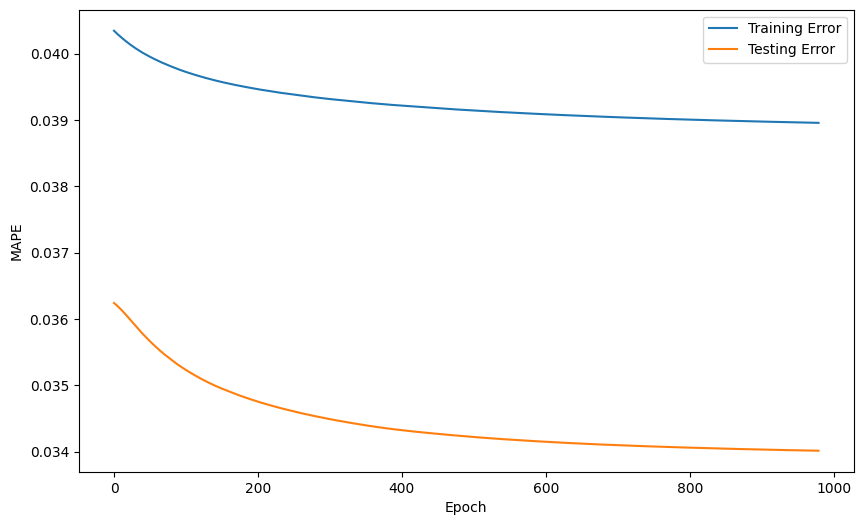

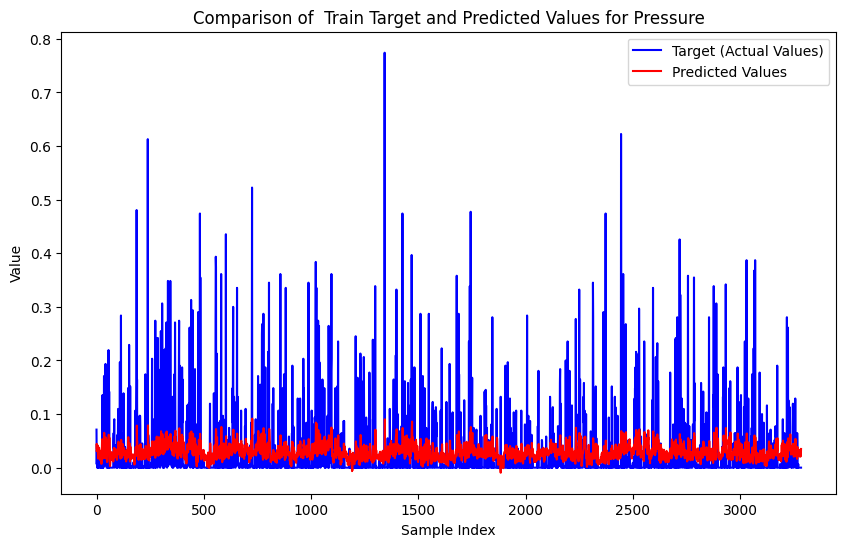

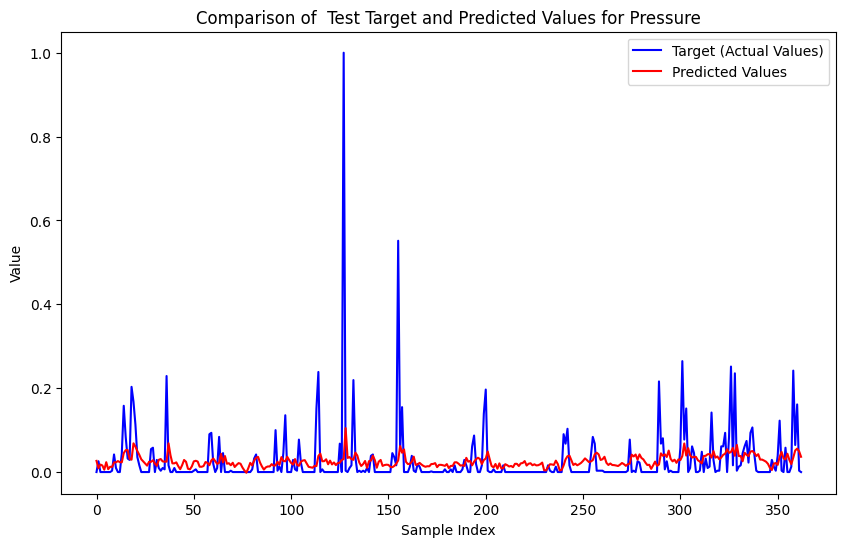

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,20]
Y_test_W = Y_test[:,20]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.00001
threshold = 0.001
epochs = 1000
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue

        lambda_reg = 0.01
        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i] + 2 * lambda_reg * W
        W -= learning_rate * gradient
        #gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        #W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr[20:], label='Training Error')
plt.plot(errors_te[20:], label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values for Pressure')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values for Pressure')
plt.legend()
plt.show()


In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.039388078934333194
MEAN MAP of Test: 0.03478578353471775


Optional section (BASEL city)

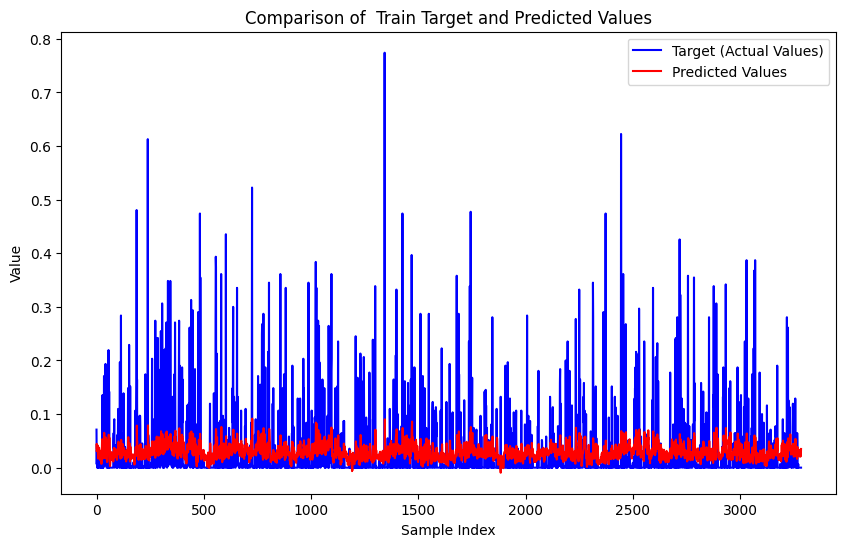

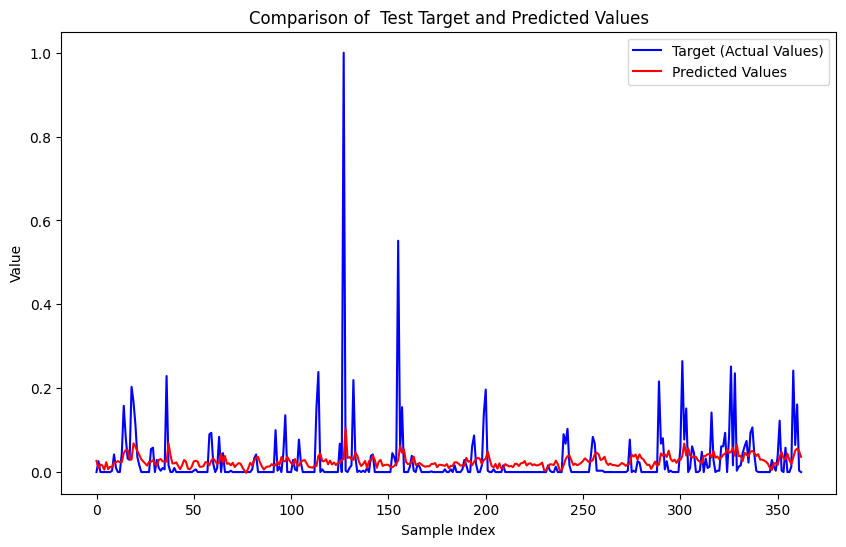

In [ ]:
Y_train_W = Y_train[:,28]
Y_test_W = Y_test[:,28]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values')
plt.legend()
plt.show()

1.3-Prediction Mean Temperature

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


Training Progress:   0%|          | 2/1000 [00:00<01:09, 14.37it/s]

Epoch 1/1000 - MAP Train: 0.2369 | MAP Test: 0.1254
Epoch 2/1000 - MAP Train: 0.1064 | MAP Test: 0.1002
Epoch 3/1000 - MAP Train: 0.0960 | MAP Test: 0.0934


Epoch 4/1000 - MAP Train: 0.0904 | MAP Test: 0.0880
Epoch 5/1000 - MAP Train: 0.0857 | MAP Test: 0.0834
Epoch 6/1000 - MAP Train: 0.0816 | MAP Test: 0.0793


Training Progress:   1%|          | 10/1000 [00:00<01:05, 15.03it/s]

Epoch 7/1000 - MAP Train: 0.0780 | MAP Test: 0.0757
Epoch 8/1000 - MAP Train: 0.0749 | MAP Test: 0.0727
Epoch 9/1000 - MAP Train: 0.0723 | MAP Test: 0.0700
Epoch 10/1000 - MAP Train: 0.0700 | MAP Test: 0.0677


Training Progress:   1%|          | 12/1000 [00:00<01:06, 14.80it/s]

Epoch 11/1000 - MAP Train: 0.0680 | MAP Test: 0.0657
Epoch 12/1000 - MAP Train: 0.0664 | MAP Test: 0.0639
Epoch 13/1000 - MAP Train: 0.0649 | MAP Test: 0.0624


Training Progress:   1%|▏         | 14/1000 [00:01<01:14, 13.29it/s]

Epoch 14/1000 - MAP Train: 0.0637 | MAP Test: 0.0611
Epoch 15/1000 - MAP Train: 0.0626 | MAP Test: 0.0601


Training Progress:   2%|▏         | 19/1000 [00:01<01:11, 13.74it/s]

Epoch 16/1000 - MAP Train: 0.0617 | MAP Test: 0.0591
Epoch 17/1000 - MAP Train: 0.0609 | MAP Test: 0.0583
Epoch 18/1000 - MAP Train: 0.0602 | MAP Test: 0.0576
Epoch 19/1000 - MAP Train: 0.0596 | MAP Test: 0.0570


Training Progress:   2%|▏         | 24/1000 [00:01<00:58, 16.68it/s]

Epoch 20/1000 - MAP Train: 0.0591 | MAP Test: 0.0566
Epoch 21/1000 - MAP Train: 0.0586 | MAP Test: 0.0562
Epoch 22/1000 - MAP Train: 0.0582 | MAP Test: 0.0558
Epoch 23/1000 - MAP Train: 0.0579 | MAP Test: 0.0554
Epoch 24/1000 - MAP Train: 0.0576 | MAP Test: 0.0551


Epoch 25/1000 - MAP Train: 0.0573 | MAP Test: 0.0548
Epoch 26/1000 - MAP Train: 0.0570 | MAP Test: 0.0546
Epoch 27/1000 - MAP Train: 0.0568 | MAP Test: 0.0544
Epoch 28/1000 - MAP Train: 0.0566 | MAP Test: 0.0542


Training Progress:   3%|▎         | 29/1000 [00:01<00:53, 18.03it/s]

Epoch 29/1000 - MAP Train: 0.0564 | MAP Test: 0.0540
Epoch 30/1000 - MAP Train: 0.0562 | MAP Test: 0.0539


Training Progress:   3%|▎         | 33/1000 [00:02<01:11, 13.51it/s]

Epoch 31/1000 - MAP Train: 0.0560 | MAP Test: 0.0537
Epoch 32/1000 - MAP Train: 0.0559 | MAP Test: 0.0536
Epoch 33/1000 - MAP Train: 0.0557 | MAP Test: 0.0535
Epoch 34/1000 - MAP Train: 0.0556 | MAP Test: 0.0534


Training Progress:   4%|▍         | 38/1000 [00:02<00:59, 16.08it/s]

Epoch 35/1000 - MAP Train: 0.0555 | MAP Test: 0.0533
Epoch 36/1000 - MAP Train: 0.0554 | MAP Test: 0.0532
Epoch 37/1000 - MAP Train: 0.0552 | MAP Test: 0.0531
Epoch 38/1000 - MAP Train: 0.0551 | MAP Test: 0.0530
Epoch 39/1000 - MAP Train: 0.0550 | MAP Test: 0.0529


Training Progress:   4%|▍         | 41/1000 [00:02<00:55, 17.28it/s]

Epoch 40/1000 - MAP Train: 0.0549 | MAP Test: 0.0528
Epoch 41/1000 - MAP Train: 0.0549 | MAP Test: 0.0527
Epoch 42/1000 - MAP Train: 0.0548 | MAP Test: 0.0526


Training Progress:   4%|▍         | 45/1000 [00:03<01:11, 13.43it/s]

Epoch 43/1000 - MAP Train: 0.0547 | MAP Test: 0.0525
Epoch 44/1000 - MAP Train: 0.0546 | MAP Test: 0.0524
Epoch 45/1000 - MAP Train: 0.0545 | MAP Test: 0.0524
Epoch 46/1000 - MAP Train: 0.0544 | MAP Test: 0.0523


Training Progress:   5%|▌         | 51/1000 [00:03<00:53, 17.90it/s]

Epoch 47/1000 - MAP Train: 0.0543 | MAP Test: 0.0522
Epoch 48/1000 - MAP Train: 0.0543 | MAP Test: 0.0521
Epoch 49/1000 - MAP Train: 0.0542 | MAP Test: 0.0520
Epoch 50/1000 - MAP Train: 0.0541 | MAP Test: 0.0519
Epoch 51/1000 - MAP Train: 0.0540 | MAP Test: 0.0519
Epoch 52/1000 - MAP Train: 0.0540 | MAP Test: 0.0518


Training Progress:   6%|▌         | 56/1000 [00:03<00:50, 18.75it/s]

Epoch 53/1000 - MAP Train: 0.0539 | MAP Test: 0.0517
Epoch 54/1000 - MAP Train: 0.0538 | MAP Test: 0.0516
Epoch 55/1000 - MAP Train: 0.0538 | MAP Test: 0.0516
Epoch 56/1000 - MAP Train: 0.0537 | MAP Test: 0.0515
Epoch 57/1000 - MAP Train: 0.0536 | MAP Test: 0.0514


Training Progress:   6%|▌         | 58/1000 [00:03<00:52, 17.97it/s]

Epoch 58/1000 - MAP Train: 0.0536 | MAP Test: 0.0514
Epoch 59/1000 - MAP Train: 0.0535 | MAP Test: 0.0513


Training Progress:   6%|▋         | 63/1000 [00:04<01:02, 15.07it/s]

Epoch 60/1000 - MAP Train: 0.0534 | MAP Test: 0.0513
Epoch 61/1000 - MAP Train: 0.0534 | MAP Test: 0.0512
Epoch 62/1000 - MAP Train: 0.0533 | MAP Test: 0.0511
Epoch 63/1000 - MAP Train: 0.0533 | MAP Test: 0.0511
Epoch 64/1000 - MAP Train: 0.0532 | MAP Test: 0.0510


Training Progress:   7%|▋         | 68/1000 [00:04<00:56, 16.39it/s]

Epoch 65/1000 - MAP Train: 0.0532 | MAP Test: 0.0510
Epoch 66/1000 - MAP Train: 0.0531 | MAP Test: 0.0509
Epoch 67/1000 - MAP Train: 0.0530 | MAP Test: 0.0508
Epoch 68/1000 - MAP Train: 0.0530 | MAP Test: 0.0508


Epoch 69/1000 - MAP Train: 0.0529 | MAP Test: 0.0507
Epoch 70/1000 - MAP Train: 0.0529 | MAP Test: 0.0507
Epoch 71/1000 - MAP Train: 0.0528 | MAP Test: 0.0506
Epoch 72/1000 - MAP Train: 0.0528 | MAP Test: 0.0506


Training Progress:   8%|▊         | 77/1000 [00:04<00:50, 18.10it/s]

Epoch 73/1000 - MAP Train: 0.0527 | MAP Test: 0.0505
Epoch 74/1000 - MAP Train: 0.0527 | MAP Test: 0.0505
Epoch 75/1000 - MAP Train: 0.0526 | MAP Test: 0.0504
Epoch 76/1000 - MAP Train: 0.0526 | MAP Test: 0.0504
Epoch 77/1000 - MAP Train: 0.0525 | MAP Test: 0.0503
Epoch 78/1000 - MAP Train: 0.0525 | MAP Test: 0.0503


Training Progress:   8%|▊         | 83/1000 [00:05<00:45, 20.11it/s]

Epoch 79/1000 - MAP Train: 0.0524 | MAP Test: 0.0502
Epoch 80/1000 - MAP Train: 0.0524 | MAP Test: 0.0502
Epoch 81/1000 - MAP Train: 0.0523 | MAP Test: 0.0501
Epoch 82/1000 - MAP Train: 0.0523 | MAP Test: 0.0501
Epoch 83/1000 - MAP Train: 0.0522 | MAP Test: 0.0501


Training Progress:   9%|▊         | 86/1000 [00:05<00:44, 20.32it/s]

Epoch 84/1000 - MAP Train: 0.0522 | MAP Test: 0.0500
Epoch 85/1000 - MAP Train: 0.0522 | MAP Test: 0.0500
Epoch 86/1000 - MAP Train: 0.0521 | MAP Test: 0.0499
Epoch 87/1000 - MAP Train: 0.0521 | MAP Test: 0.0499
Epoch 88/1000 - MAP Train: 0.0520 | MAP Test: 0.0499


Training Progress:   9%|▉         | 89/1000 [00:05<00:46, 19.43it/s]

Epoch 89/1000 - MAP Train: 0.0520 | MAP Test: 0.0498
Epoch 90/1000 - MAP Train: 0.0520 | MAP Test: 0.0498


Training Progress:   9%|▉         | 91/1000 [00:06<01:12, 12.61it/s]

Epoch 91/1000 - MAP Train: 0.0519 | MAP Test: 0.0498
Epoch 92/1000 - MAP Train: 0.0519 | MAP Test: 0.0497


Training Progress:  10%|▉         | 95/1000 [00:06<01:16, 11.84it/s]

Epoch 93/1000 - MAP Train: 0.0518 | MAP Test: 0.0497
Epoch 94/1000 - MAP Train: 0.0518 | MAP Test: 0.0496
Epoch 95/1000 - MAP Train: 0.0518 | MAP Test: 0.0496


Training Progress:  10%|▉         | 99/1000 [00:06<01:06, 13.63it/s]

Epoch 96/1000 - MAP Train: 0.0517 | MAP Test: 0.0496
Epoch 97/1000 - MAP Train: 0.0517 | MAP Test: 0.0495
Epoch 98/1000 - MAP Train: 0.0517 | MAP Test: 0.0495
Epoch 99/1000 - MAP Train: 0.0516 | MAP Test: 0.0495


Epoch 100/1000 - MAP Train: 0.0516 | MAP Test: 0.0494
Epoch 101/1000 - MAP Train: 0.0515 | MAP Test: 0.0494
Epoch 102/1000 - MAP Train: 0.0515 | MAP Test: 0.0494


Training Progress:  10%|█         | 105/1000 [00:06<01:03, 14.19it/s]

Epoch 103/1000 - MAP Train: 0.0515 | MAP Test: 0.0493
Epoch 104/1000 - MAP Train: 0.0514 | MAP Test: 0.0493
Epoch 105/1000 - MAP Train: 0.0514 | MAP Test: 0.0493


Training Progress:  11%|█         | 109/1000 [00:07<01:00, 14.78it/s]

Epoch 106/1000 - MAP Train: 0.0514 | MAP Test: 0.0493
Epoch 107/1000 - MAP Train: 0.0514 | MAP Test: 0.0492
Epoch 108/1000 - MAP Train: 0.0513 | MAP Test: 0.0492
Epoch 109/1000 - MAP Train: 0.0513 | MAP Test: 0.0492


Training Progress:  11%|█▏        | 113/1000 [00:07<00:55, 16.01it/s]

Epoch 110/1000 - MAP Train: 0.0513 | MAP Test: 0.0491
Epoch 111/1000 - MAP Train: 0.0512 | MAP Test: 0.0491
Epoch 112/1000 - MAP Train: 0.0512 | MAP Test: 0.0491
Epoch 113/1000 - MAP Train: 0.0512 | MAP Test: 0.0490


Training Progress:  12%|█▏        | 117/1000 [00:07<00:56, 15.58it/s]

Epoch 114/1000 - MAP Train: 0.0511 | MAP Test: 0.0490
Epoch 115/1000 - MAP Train: 0.0511 | MAP Test: 0.0490
Epoch 116/1000 - MAP Train: 0.0511 | MAP Test: 0.0490
Epoch 117/1000 - MAP Train: 0.0510 | MAP Test: 0.0489


Training Progress:  12%|█▏        | 121/1000 [00:07<00:56, 15.60it/s]

Epoch 118/1000 - MAP Train: 0.0510 | MAP Test: 0.0489
Epoch 119/1000 - MAP Train: 0.0510 | MAP Test: 0.0489
Epoch 120/1000 - MAP Train: 0.0510 | MAP Test: 0.0488
Epoch 121/1000 - MAP Train: 0.0509 | MAP Test: 0.0488


Training Progress:  12%|█▏        | 123/1000 [00:08<00:55, 15.69it/s]

Epoch 122/1000 - MAP Train: 0.0509 | MAP Test: 0.0488
Epoch 123/1000 - MAP Train: 0.0509 | MAP Test: 0.0488
Epoch 124/1000 - MAP Train: 0.0509 | MAP Test: 0.0487
Epoch 125/1000 - MAP Train: 0.0508 | MAP Test: 0.0487


Training Progress:  13%|█▎        | 127/1000 [00:08<01:08, 12.77it/s]

Epoch 126/1000 - MAP Train: 0.0508 | MAP Test: 0.0487
Epoch 127/1000 - MAP Train: 0.0508 | MAP Test: 0.0487


Training Progress:  13%|█▎        | 129/1000 [00:08<01:22, 10.58it/s]

Epoch 128/1000 - MAP Train: 0.0507 | MAP Test: 0.0486
Epoch 129/1000 - MAP Train: 0.0507 | MAP Test: 0.0486
Epoch 130/1000 - MAP Train: 0.0507 | MAP Test: 0.0486


Training Progress:  13%|█▎        | 133/1000 [00:08<01:07, 12.76it/s]

Epoch 131/1000 - MAP Train: 0.0507 | MAP Test: 0.0486
Epoch 132/1000 - MAP Train: 0.0506 | MAP Test: 0.0485
Epoch 133/1000 - MAP Train: 0.0506 | MAP Test: 0.0485
Epoch 134/1000 - MAP Train: 0.0506 | MAP Test: 0.0485


Training Progress:  14%|█▎        | 137/1000 [00:09<01:00, 14.24it/s]

Epoch 135/1000 - MAP Train: 0.0506 | MAP Test: 0.0485
Epoch 136/1000 - MAP Train: 0.0505 | MAP Test: 0.0484
Epoch 137/1000 - MAP Train: 0.0505 | MAP Test: 0.0484
Epoch 138/1000 - MAP Train: 0.0505 | MAP Test: 0.0484


Training Progress:  14%|█▍        | 141/1000 [00:09<00:58, 14.61it/s]

Epoch 139/1000 - MAP Train: 0.0505 | MAP Test: 0.0484
Epoch 140/1000 - MAP Train: 0.0504 | MAP Test: 0.0483
Epoch 141/1000 - MAP Train: 0.0504 | MAP Test: 0.0483
Epoch 142/1000 - MAP Train: 0.0504 | MAP Test: 0.0483


Training Progress:  14%|█▍        | 145/1000 [00:09<00:51, 16.50it/s]

Epoch 143/1000 - MAP Train: 0.0504 | MAP Test: 0.0483
Epoch 144/1000 - MAP Train: 0.0503 | MAP Test: 0.0483
Epoch 145/1000 - MAP Train: 0.0503 | MAP Test: 0.0482
Epoch 146/1000 - MAP Train: 0.0503 | MAP Test: 0.0482


Training Progress:  15%|█▍        | 149/1000 [00:09<00:56, 15.01it/s]

Epoch 147/1000 - MAP Train: 0.0503 | MAP Test: 0.0482
Epoch 148/1000 - MAP Train: 0.0503 | MAP Test: 0.0482
Epoch 149/1000 - MAP Train: 0.0502 | MAP Test: 0.0481


Epoch 150/1000 - MAP Train: 0.0502 | MAP Test: 0.0481
Epoch 151/1000 - MAP Train: 0.0502 | MAP Test: 0.0481


Training Progress:  15%|█▌        | 153/1000 [00:10<01:20, 10.52it/s]

Epoch 152/1000 - MAP Train: 0.0502 | MAP Test: 0.0481
Epoch 153/1000 - MAP Train: 0.0501 | MAP Test: 0.0481


Training Progress:  16%|█▌        | 155/1000 [00:10<01:44,  8.08it/s]

Epoch 154/1000 - MAP Train: 0.0501 | MAP Test: 0.0480
Epoch 155/1000 - MAP Train: 0.0501 | MAP Test: 0.0480


Training Progress:  16%|█▌        | 157/1000 [00:11<01:57,  7.16it/s]

Epoch 156/1000 - MAP Train: 0.0501 | MAP Test: 0.0480
Epoch 157/1000 - MAP Train: 0.0501 | MAP Test: 0.0480


Training Progress:  16%|█▌        | 160/1000 [00:11<01:40,  8.32it/s]

Epoch 158/1000 - MAP Train: 0.0500 | MAP Test: 0.0480
Epoch 159/1000 - MAP Train: 0.0500 | MAP Test: 0.0479
Epoch 160/1000 - MAP Train: 0.0500 | MAP Test: 0.0479


Training Progress:  16%|█▌        | 162/1000 [00:11<01:36,  8.65it/s]

Epoch 161/1000 - MAP Train: 0.0500 | MAP Test: 0.0479
Epoch 162/1000 - MAP Train: 0.0500 | MAP Test: 0.0479


Training Progress:  16%|█▋        | 163/1000 [00:11<01:39,  8.39it/s]

Epoch 163/1000 - MAP Train: 0.0499 | MAP Test: 0.0479
Epoch 164/1000 - MAP Train: 0.0499 | MAP Test: 0.0479


Training Progress:  17%|█▋        | 166/1000 [00:12<01:39,  8.42it/s]

Epoch 165/1000 - MAP Train: 0.0499 | MAP Test: 0.0478
Epoch 166/1000 - MAP Train: 0.0499 | MAP Test: 0.0478


Training Progress:  17%|█▋        | 169/1000 [00:12<01:25,  9.74it/s]

Epoch 167/1000 - MAP Train: 0.0499 | MAP Test: 0.0478
Epoch 168/1000 - MAP Train: 0.0498 | MAP Test: 0.0478
Epoch 169/1000 - MAP Train: 0.0498 | MAP Test: 0.0478


Training Progress:  17%|█▋        | 171/1000 [00:12<01:38,  8.43it/s]

Epoch 170/1000 - MAP Train: 0.0498 | MAP Test: 0.0477
Epoch 171/1000 - MAP Train: 0.0498 | MAP Test: 0.0477


Training Progress:  17%|█▋        | 173/1000 [00:13<01:59,  6.91it/s]

Epoch 172/1000 - MAP Train: 0.0498 | MAP Test: 0.0477
Epoch 173/1000 - MAP Train: 0.0498 | MAP Test: 0.0477


Training Progress:  18%|█▊        | 176/1000 [00:13<01:38,  8.39it/s]

Epoch 174/1000 - MAP Train: 0.0497 | MAP Test: 0.0477
Epoch 175/1000 - MAP Train: 0.0497 | MAP Test: 0.0477
Epoch 176/1000 - MAP Train: 0.0497 | MAP Test: 0.0476


Training Progress:  18%|█▊        | 178/1000 [00:13<01:22,  9.98it/s]

Epoch 177/1000 - MAP Train: 0.0497 | MAP Test: 0.0476
Epoch 178/1000 - MAP Train: 0.0497 | MAP Test: 0.0476
Epoch 179/1000 - MAP Train: 0.0496 | MAP Test: 0.0476


Training Progress:  18%|█▊        | 182/1000 [00:13<01:14, 11.02it/s]

Epoch 180/1000 - MAP Train: 0.0496 | MAP Test: 0.0476
Epoch 181/1000 - MAP Train: 0.0496 | MAP Test: 0.0476
Epoch 182/1000 - MAP Train: 0.0496 | MAP Test: 0.0475


Training Progress:  18%|█▊        | 184/1000 [00:14<01:08, 11.83it/s]

Epoch 183/1000 - MAP Train: 0.0496 | MAP Test: 0.0475
Epoch 184/1000 - MAP Train: 0.0496 | MAP Test: 0.0475
Epoch 185/1000 - MAP Train: 0.0495 | MAP Test: 0.0475


Training Progress:  19%|█▉        | 188/1000 [00:14<01:11, 11.36it/s]

Epoch 186/1000 - MAP Train: 0.0495 | MAP Test: 0.0475
Epoch 187/1000 - MAP Train: 0.0495 | MAP Test: 0.0475
Epoch 188/1000 - MAP Train: 0.0495 | MAP Test: 0.0474


Training Progress:  19%|█▉        | 190/1000 [00:14<01:09, 11.58it/s]

Epoch 189/1000 - MAP Train: 0.0495 | MAP Test: 0.0474
Epoch 190/1000 - MAP Train: 0.0495 | MAP Test: 0.0474


Training Progress:  19%|█▉        | 192/1000 [00:14<01:21,  9.90it/s]

Epoch 191/1000 - MAP Train: 0.0494 | MAP Test: 0.0474
Epoch 192/1000 - MAP Train: 0.0494 | MAP Test: 0.0474


Training Progress:  19%|█▉        | 194/1000 [00:15<01:30,  8.94it/s]

Epoch 193/1000 - MAP Train: 0.0494 | MAP Test: 0.0474
Epoch 194/1000 - MAP Train: 0.0494 | MAP Test: 0.0473


Epoch 195/1000 - MAP Train: 0.0494 | MAP Test: 0.0473
Epoch 196/1000 - MAP Train: 0.0494 | MAP Test: 0.0473


Training Progress:  20%|█▉        | 198/1000 [00:15<01:38,  8.11it/s]

Epoch 197/1000 - MAP Train: 0.0493 | MAP Test: 0.0473
Epoch 198/1000 - MAP Train: 0.0493 | MAP Test: 0.0473


Training Progress:  20%|██        | 200/1000 [00:15<01:41,  7.85it/s]

Epoch 199/1000 - MAP Train: 0.0493 | MAP Test: 0.0473
Epoch 200/1000 - MAP Train: 0.0493 | MAP Test: 0.0473


Training Progress:  20%|██        | 202/1000 [00:16<01:31,  8.71it/s]

Epoch 201/1000 - MAP Train: 0.0493 | MAP Test: 0.0472
Epoch 202/1000 - MAP Train: 0.0493 | MAP Test: 0.0472


Training Progress:  20%|██        | 203/1000 [00:16<01:30,  8.84it/s]

Epoch 203/1000 - MAP Train: 0.0492 | MAP Test: 0.0472
Epoch 204/1000 - MAP Train: 0.0492 | MAP Test: 0.0472


Training Progress:  21%|██        | 206/1000 [00:16<01:34,  8.43it/s]

Epoch 205/1000 - MAP Train: 0.0492 | MAP Test: 0.0472
Epoch 206/1000 - MAP Train: 0.0492 | MAP Test: 0.0472


Training Progress:  21%|██        | 209/1000 [00:16<01:21,  9.72it/s]

Epoch 207/1000 - MAP Train: 0.0492 | MAP Test: 0.0472
Epoch 208/1000 - MAP Train: 0.0492 | MAP Test: 0.0471
Epoch 209/1000 - MAP Train: 0.0492 | MAP Test: 0.0471


Training Progress:  21%|██        | 212/1000 [00:17<01:15, 10.50it/s]

Epoch 210/1000 - MAP Train: 0.0491 | MAP Test: 0.0471
Epoch 211/1000 - MAP Train: 0.0491 | MAP Test: 0.0471
Epoch 212/1000 - MAP Train: 0.0491 | MAP Test: 0.0471


Epoch 213/1000 - MAP Train: 0.0491 | MAP Test: 0.0471
Epoch 214/1000 - MAP Train: 0.0491 | MAP Test: 0.0471


Training Progress:  22%|██▏       | 216/1000 [00:17<01:24,  9.29it/s]

Epoch 215/1000 - MAP Train: 0.0491 | MAP Test: 0.0470
Epoch 216/1000 - MAP Train: 0.0491 | MAP Test: 0.0470


Training Progress:  22%|██▏       | 218/1000 [00:17<01:29,  8.78it/s]

Epoch 217/1000 - MAP Train: 0.0490 | MAP Test: 0.0470
Epoch 218/1000 - MAP Train: 0.0490 | MAP Test: 0.0470


Training Progress:  22%|██▏       | 220/1000 [00:18<01:30,  8.63it/s]

Epoch 219/1000 - MAP Train: 0.0490 | MAP Test: 0.0470
Epoch 220/1000 - MAP Train: 0.0490 | MAP Test: 0.0470
Epoch 221/1000 - MAP Train: 0.0490 | MAP Test: 0.0470


Training Progress:  22%|██▏       | 224/1000 [00:18<01:08, 11.40it/s]

Epoch 222/1000 - MAP Train: 0.0490 | MAP Test: 0.0469
Epoch 223/1000 - MAP Train: 0.0490 | MAP Test: 0.0469
Epoch 224/1000 - MAP Train: 0.0489 | MAP Test: 0.0469


Training Progress:  23%|██▎       | 226/1000 [00:18<01:06, 11.68it/s]

Epoch 225/1000 - MAP Train: 0.0489 | MAP Test: 0.0469
Epoch 226/1000 - MAP Train: 0.0489 | MAP Test: 0.0469
Epoch 227/1000 - MAP Train: 0.0489 | MAP Test: 0.0469


Training Progress:  23%|██▎       | 230/1000 [00:18<01:05, 11.73it/s]

Epoch 228/1000 - MAP Train: 0.0489 | MAP Test: 0.0469
Epoch 229/1000 - MAP Train: 0.0489 | MAP Test: 0.0469
Epoch 230/1000 - MAP Train: 0.0489 | MAP Test: 0.0468


Training Progress:  23%|██▎       | 232/1000 [00:19<01:07, 11.43it/s]

Epoch 231/1000 - MAP Train: 0.0488 | MAP Test: 0.0468
Epoch 232/1000 - MAP Train: 0.0488 | MAP Test: 0.0468
Epoch 233/1000 - MAP Train: 0.0488 | MAP Test: 0.0468


Training Progress:  24%|██▎       | 236/1000 [00:19<01:11, 10.68it/s]

Epoch 234/1000 - MAP Train: 0.0488 | MAP Test: 0.0468
Epoch 235/1000 - MAP Train: 0.0488 | MAP Test: 0.0468
Epoch 236/1000 - MAP Train: 0.0488 | MAP Test: 0.0468


Training Progress:  24%|██▍       | 238/1000 [00:19<01:32,  8.21it/s]

Epoch 237/1000 - MAP Train: 0.0488 | MAP Test: 0.0468
Epoch 238/1000 - MAP Train: 0.0488 | MAP Test: 0.0468


Training Progress:  24%|██▍       | 240/1000 [00:20<02:06,  6.01it/s]

Epoch 239/1000 - MAP Train: 0.0487 | MAP Test: 0.0467
Epoch 240/1000 - MAP Train: 0.0487 | MAP Test: 0.0467


Training Progress:  24%|██▍       | 241/1000 [00:20<02:05,  6.07it/s]

Epoch 241/1000 - MAP Train: 0.0487 | MAP Test: 0.0467
Epoch 242/1000 - MAP Train: 0.0487 | MAP Test: 0.0467


Training Progress:  24%|██▍       | 244/1000 [00:21<02:13,  5.66it/s]

Epoch 243/1000 - MAP Train: 0.0487 | MAP Test: 0.0467
Epoch 244/1000 - MAP Train: 0.0487 | MAP Test: 0.0467


Training Progress:  24%|██▍       | 245/1000 [00:21<02:15,  5.56it/s]

Epoch 245/1000 - MAP Train: 0.0487 | MAP Test: 0.0467


Training Progress:  25%|██▍       | 246/1000 [00:21<02:23,  5.27it/s]

Epoch 246/1000 - MAP Train: 0.0487 | MAP Test: 0.0467


Training Progress:  25%|██▍       | 247/1000 [00:21<02:55,  4.29it/s]

Epoch 247/1000 - MAP Train: 0.0486 | MAP Test: 0.0467


Training Progress:  25%|██▍       | 248/1000 [00:22<04:09,  3.01it/s]

Epoch 248/1000 - MAP Train: 0.0486 | MAP Test: 0.0466


Training Progress:  25%|██▌       | 250/1000 [00:22<03:17,  3.79it/s]

Epoch 249/1000 - MAP Train: 0.0486 | MAP Test: 0.0466
Epoch 250/1000 - MAP Train: 0.0486 | MAP Test: 0.0466


Training Progress:  25%|██▌       | 253/1000 [00:23<01:54,  6.55it/s]

Epoch 251/1000 - MAP Train: 0.0486 | MAP Test: 0.0466
Epoch 252/1000 - MAP Train: 0.0486 | MAP Test: 0.0466
Epoch 253/1000 - MAP Train: 0.0486 | MAP Test: 0.0466


Training Progress:  26%|██▌       | 255/1000 [00:23<01:41,  7.33it/s]

Epoch 254/1000 - MAP Train: 0.0486 | MAP Test: 0.0466
Epoch 255/1000 - MAP Train: 0.0485 | MAP Test: 0.0466


Training Progress:  26%|██▌       | 258/1000 [00:23<01:16,  9.64it/s]

Epoch 256/1000 - MAP Train: 0.0485 | MAP Test: 0.0466
Epoch 257/1000 - MAP Train: 0.0485 | MAP Test: 0.0465
Epoch 258/1000 - MAP Train: 0.0485 | MAP Test: 0.0465


Training Progress:  26%|██▌       | 260/1000 [00:23<01:24,  8.72it/s]

Epoch 259/1000 - MAP Train: 0.0485 | MAP Test: 0.0465
Epoch 260/1000 - MAP Train: 0.0485 | MAP Test: 0.0465


Training Progress:  26%|██▋       | 263/1000 [00:24<01:19,  9.25it/s]

Epoch 261/1000 - MAP Train: 0.0485 | MAP Test: 0.0465
Epoch 262/1000 - MAP Train: 0.0485 | MAP Test: 0.0465
Epoch 263/1000 - MAP Train: 0.0484 | MAP Test: 0.0465


Training Progress:  26%|██▋       | 265/1000 [00:24<01:20,  9.09it/s]

Epoch 264/1000 - MAP Train: 0.0484 | MAP Test: 0.0465
Epoch 265/1000 - MAP Train: 0.0484 | MAP Test: 0.0465


Training Progress:  27%|██▋       | 268/1000 [00:24<01:12, 10.05it/s]

Epoch 266/1000 - MAP Train: 0.0484 | MAP Test: 0.0465
Epoch 267/1000 - MAP Train: 0.0484 | MAP Test: 0.0465
Epoch 268/1000 - MAP Train: 0.0484 | MAP Test: 0.0464


Training Progress:  27%|██▋       | 270/1000 [00:24<01:16,  9.59it/s]

Epoch 269/1000 - MAP Train: 0.0484 | MAP Test: 0.0464
Epoch 270/1000 - MAP Train: 0.0484 | MAP Test: 0.0464
Epoch 271/1000 - MAP Train: 0.0484 | MAP Test: 0.0464


Training Progress:  27%|██▋       | 274/1000 [00:25<01:06, 10.88it/s]

Epoch 272/1000 - MAP Train: 0.0483 | MAP Test: 0.0464
Epoch 273/1000 - MAP Train: 0.0483 | MAP Test: 0.0464
Epoch 274/1000 - MAP Train: 0.0483 | MAP Test: 0.0464


Training Progress:  28%|██▊       | 276/1000 [00:25<01:04, 11.23it/s]

Epoch 275/1000 - MAP Train: 0.0483 | MAP Test: 0.0464
Epoch 276/1000 - MAP Train: 0.0483 | MAP Test: 0.0464
Epoch 277/1000 - MAP Train: 0.0483 | MAP Test: 0.0464


Training Progress:  28%|██▊       | 278/1000 [00:25<01:08, 10.51it/s]

Epoch 278/1000 - MAP Train: 0.0483 | MAP Test: 0.0464
Epoch 279/1000 - MAP Train: 0.0483 | MAP Test: 0.0463


Epoch 280/1000 - MAP Train: 0.0483 | MAP Test: 0.0463
Epoch 281/1000 - MAP Train: 0.0482 | MAP Test: 0.0463


Training Progress:  28%|██▊       | 283/1000 [00:26<01:13,  9.76it/s]

Epoch 282/1000 - MAP Train: 0.0482 | MAP Test: 0.0463
Epoch 283/1000 - MAP Train: 0.0482 | MAP Test: 0.0463
Epoch 284/1000 - MAP Train: 0.0482 | MAP Test: 0.0463


Training Progress:  29%|██▊       | 287/1000 [00:26<01:01, 11.53it/s]

Epoch 285/1000 - MAP Train: 0.0482 | MAP Test: 0.0463
Epoch 286/1000 - MAP Train: 0.0482 | MAP Test: 0.0463
Epoch 287/1000 - MAP Train: 0.0482 | MAP Test: 0.0463


Training Progress:  29%|██▉       | 289/1000 [00:26<00:57, 12.34it/s]

Epoch 288/1000 - MAP Train: 0.0482 | MAP Test: 0.0463
Epoch 289/1000 - MAP Train: 0.0482 | MAP Test: 0.0463
Epoch 290/1000 - MAP Train: 0.0481 | MAP Test: 0.0462


Training Progress:  29%|██▉       | 293/1000 [00:26<00:56, 12.53it/s]

Epoch 291/1000 - MAP Train: 0.0481 | MAP Test: 0.0462
Epoch 292/1000 - MAP Train: 0.0481 | MAP Test: 0.0462
Epoch 293/1000 - MAP Train: 0.0481 | MAP Test: 0.0462


Training Progress:  30%|██▉       | 295/1000 [00:27<00:57, 12.19it/s]

Epoch 294/1000 - MAP Train: 0.0481 | MAP Test: 0.0462
Epoch 295/1000 - MAP Train: 0.0481 | MAP Test: 0.0462
Epoch 296/1000 - MAP Train: 0.0481 | MAP Test: 0.0462


Training Progress:  30%|██▉       | 297/1000 [00:27<01:00, 11.53it/s]

Epoch 297/1000 - MAP Train: 0.0481 | MAP Test: 0.0462
Epoch 298/1000 - MAP Train: 0.0481 | MAP Test: 0.0462


Training Progress:  30%|██▉       | 299/1000 [00:27<01:09, 10.12it/s]

Epoch 299/1000 - MAP Train: 0.0481 | MAP Test: 0.0462


Training Progress:  30%|███       | 301/1000 [00:28<01:50,  6.33it/s]

Epoch 300/1000 - MAP Train: 0.0480 | MAP Test: 0.0462
Epoch 301/1000 - MAP Train: 0.0480 | MAP Test: 0.0462


Training Progress:  30%|███       | 303/1000 [00:28<01:47,  6.48it/s]

Epoch 302/1000 - MAP Train: 0.0480 | MAP Test: 0.0461
Epoch 303/1000 - MAP Train: 0.0480 | MAP Test: 0.0461
Epoch 304/1000 - MAP Train: 0.0480 | MAP Test: 0.0461


Training Progress:  31%|███       | 307/1000 [00:28<01:11,  9.68it/s]

Epoch 305/1000 - MAP Train: 0.0480 | MAP Test: 0.0461
Epoch 306/1000 - MAP Train: 0.0480 | MAP Test: 0.0461
Epoch 307/1000 - MAP Train: 0.0480 | MAP Test: 0.0461


Training Progress:  31%|███       | 309/1000 [00:28<01:10,  9.74it/s]

Epoch 308/1000 - MAP Train: 0.0480 | MAP Test: 0.0461
Epoch 309/1000 - MAP Train: 0.0480 | MAP Test: 0.0461
Epoch 310/1000 - MAP Train: 0.0479 | MAP Test: 0.0461


Training Progress:  31%|███▏      | 313/1000 [00:29<01:00, 11.30it/s]

Epoch 311/1000 - MAP Train: 0.0479 | MAP Test: 0.0461
Epoch 312/1000 - MAP Train: 0.0479 | MAP Test: 0.0461
Epoch 313/1000 - MAP Train: 0.0479 | MAP Test: 0.0461


Training Progress:  32%|███▏      | 315/1000 [00:29<00:57, 11.91it/s]

Epoch 314/1000 - MAP Train: 0.0479 | MAP Test: 0.0461
Epoch 315/1000 - MAP Train: 0.0479 | MAP Test: 0.0460
Epoch 316/1000 - MAP Train: 0.0479 | MAP Test: 0.0460


Training Progress:  32%|███▏      | 319/1000 [00:29<00:57, 11.93it/s]

Epoch 317/1000 - MAP Train: 0.0479 | MAP Test: 0.0460
Epoch 318/1000 - MAP Train: 0.0479 | MAP Test: 0.0460
Epoch 319/1000 - MAP Train: 0.0479 | MAP Test: 0.0460


Training Progress:  32%|███▏      | 321/1000 [00:29<01:00, 11.18it/s]

Epoch 320/1000 - MAP Train: 0.0479 | MAP Test: 0.0460
Epoch 321/1000 - MAP Train: 0.0478 | MAP Test: 0.0460


Training Progress:  32%|███▎      | 325/1000 [00:30<00:56, 11.99it/s]

Epoch 322/1000 - MAP Train: 0.0478 | MAP Test: 0.0460
Epoch 323/1000 - MAP Train: 0.0478 | MAP Test: 0.0460
Epoch 324/1000 - MAP Train: 0.0478 | MAP Test: 0.0460
Epoch 325/1000 - MAP Train: 0.0478 | MAP Test: 0.0460


Training Progress:  33%|███▎      | 327/1000 [00:30<00:58, 11.51it/s]

Epoch 326/1000 - MAP Train: 0.0478 | MAP Test: 0.0460
Epoch 327/1000 - MAP Train: 0.0478 | MAP Test: 0.0460


Training Progress:  33%|███▎      | 329/1000 [00:30<01:15,  8.86it/s]

Epoch 328/1000 - MAP Train: 0.0478 | MAP Test: 0.0460
Epoch 329/1000 - MAP Train: 0.0478 | MAP Test: 0.0459


Training Progress:  33%|███▎      | 331/1000 [00:31<01:19,  8.41it/s]

Epoch 330/1000 - MAP Train: 0.0478 | MAP Test: 0.0459
Epoch 331/1000 - MAP Train: 0.0478 | MAP Test: 0.0459


Training Progress:  33%|███▎      | 333/1000 [00:31<01:18,  8.53it/s]

Epoch 332/1000 - MAP Train: 0.0477 | MAP Test: 0.0459
Epoch 333/1000 - MAP Train: 0.0477 | MAP Test: 0.0459


Training Progress:  34%|███▎      | 337/1000 [00:31<01:01, 10.83it/s]

Epoch 334/1000 - MAP Train: 0.0477 | MAP Test: 0.0459
Epoch 335/1000 - MAP Train: 0.0477 | MAP Test: 0.0459
Epoch 336/1000 - MAP Train: 0.0477 | MAP Test: 0.0459
Epoch 337/1000 - MAP Train: 0.0477 | MAP Test: 0.0459


Training Progress:  34%|███▍      | 339/1000 [00:31<01:08,  9.65it/s]

Epoch 338/1000 - MAP Train: 0.0477 | MAP Test: 0.0459
Epoch 339/1000 - MAP Train: 0.0477 | MAP Test: 0.0459


Training Progress:  34%|███▍      | 341/1000 [00:32<01:07,  9.72it/s]

Epoch 340/1000 - MAP Train: 0.0477 | MAP Test: 0.0459
Epoch 341/1000 - MAP Train: 0.0477 | MAP Test: 0.0459
Epoch 342/1000 - MAP Train: 0.0477 | MAP Test: 0.0459


Training Progress:  34%|███▍      | 345/1000 [00:32<00:58, 11.28it/s]

Epoch 343/1000 - MAP Train: 0.0476 | MAP Test: 0.0459
Epoch 344/1000 - MAP Train: 0.0476 | MAP Test: 0.0458
Epoch 345/1000 - MAP Train: 0.0476 | MAP Test: 0.0458


Training Progress:  35%|███▍      | 347/1000 [00:32<01:05,  9.98it/s]

Epoch 346/1000 - MAP Train: 0.0476 | MAP Test: 0.0458
Epoch 347/1000 - MAP Train: 0.0476 | MAP Test: 0.0458


Training Progress:  35%|███▍      | 347/1000 [00:32<01:05,  9.98it/s]

Epoch 348/1000 - MAP Train: 0.0476 | MAP Test: 0.0458


Training Progress:  35%|███▌      | 350/1000 [00:33<01:34,  6.90it/s]

Epoch 349/1000 - MAP Train: 0.0476 | MAP Test: 0.0458
Epoch 350/1000 - MAP Train: 0.0476 | MAP Test: 0.0458


Training Progress:  35%|███▌      | 353/1000 [00:33<01:22,  7.82it/s]

Epoch 351/1000 - MAP Train: 0.0476 | MAP Test: 0.0458
Epoch 352/1000 - MAP Train: 0.0476 | MAP Test: 0.0458
Epoch 353/1000 - MAP Train: 0.0476 | MAP Test: 0.0458


Training Progress:  36%|███▌      | 355/1000 [00:33<01:24,  7.62it/s]

Epoch 354/1000 - MAP Train: 0.0476 | MAP Test: 0.0458
Epoch 355/1000 - MAP Train: 0.0475 | MAP Test: 0.0458


Training Progress:  36%|███▌      | 356/1000 [00:33<01:25,  7.58it/s]

Epoch 356/1000 - MAP Train: 0.0475 | MAP Test: 0.0458


Training Progress:  36%|███▌      | 358/1000 [00:34<01:40,  6.39it/s]

Epoch 357/1000 - MAP Train: 0.0475 | MAP Test: 0.0458
Epoch 358/1000 - MAP Train: 0.0475 | MAP Test: 0.0458


Training Progress:  36%|███▌      | 360/1000 [00:34<01:36,  6.64it/s]

Epoch 359/1000 - MAP Train: 0.0475 | MAP Test: 0.0457
Epoch 360/1000 - MAP Train: 0.0475 | MAP Test: 0.0457


Training Progress:  36%|███▌      | 361/1000 [00:34<01:45,  6.03it/s]

Epoch 361/1000 - MAP Train: 0.0475 | MAP Test: 0.0457


Training Progress:  36%|███▌      | 362/1000 [00:35<02:16,  4.66it/s]

Epoch 362/1000 - MAP Train: 0.0475 | MAP Test: 0.0457


Training Progress:  36%|███▋      | 363/1000 [00:35<02:26,  4.36it/s]

Epoch 363/1000 - MAP Train: 0.0475 | MAP Test: 0.0457
Epoch 364/1000 - MAP Train: 0.0475 | MAP Test: 0.0457


Training Progress:  37%|███▋      | 366/1000 [00:35<01:52,  5.61it/s]

Epoch 365/1000 - MAP Train: 0.0475 | MAP Test: 0.0457
Epoch 366/1000 - MAP Train: 0.0475 | MAP Test: 0.0457


Training Progress:  37%|███▋      | 368/1000 [00:36<01:42,  6.19it/s]

Epoch 367/1000 - MAP Train: 0.0475 | MAP Test: 0.0457
Epoch 368/1000 - MAP Train: 0.0474 | MAP Test: 0.0457


Training Progress:  37%|███▋      | 371/1000 [00:36<01:17,  8.11it/s]

Epoch 369/1000 - MAP Train: 0.0474 | MAP Test: 0.0457
Epoch 370/1000 - MAP Train: 0.0474 | MAP Test: 0.0457
Epoch 371/1000 - MAP Train: 0.0474 | MAP Test: 0.0457


Training Progress:  37%|███▋      | 372/1000 [00:36<01:20,  7.81it/s]

Epoch 372/1000 - MAP Train: 0.0474 | MAP Test: 0.0457
Epoch 373/1000 - MAP Train: 0.0474 | MAP Test: 0.0457


Training Progress:  38%|███▊      | 375/1000 [00:37<01:31,  6.83it/s]

Epoch 374/1000 - MAP Train: 0.0474 | MAP Test: 0.0457
Epoch 375/1000 - MAP Train: 0.0474 | MAP Test: 0.0457


Training Progress:  38%|███▊      | 377/1000 [00:37<01:42,  6.05it/s]

Epoch 376/1000 - MAP Train: 0.0474 | MAP Test: 0.0456
Epoch 377/1000 - MAP Train: 0.0474 | MAP Test: 0.0456


Training Progress:  38%|███▊      | 380/1000 [00:37<01:16,  8.09it/s]

Epoch 378/1000 - MAP Train: 0.0474 | MAP Test: 0.0456
Epoch 379/1000 - MAP Train: 0.0474 | MAP Test: 0.0456
Epoch 380/1000 - MAP Train: 0.0474 | MAP Test: 0.0456


Training Progress:  38%|███▊      | 382/1000 [00:38<01:21,  7.62it/s]

Epoch 381/1000 - MAP Train: 0.0473 | MAP Test: 0.0456
Epoch 382/1000 - MAP Train: 0.0473 | MAP Test: 0.0456


Training Progress:  38%|███▊      | 383/1000 [00:38<01:21,  7.58it/s]

Epoch 383/1000 - MAP Train: 0.0473 | MAP Test: 0.0456
Epoch 384/1000 - MAP Train: 0.0473 | MAP Test: 0.0456


Training Progress:  38%|███▊      | 385/1000 [00:38<01:25,  7.15it/s]

Epoch 385/1000 - MAP Train: 0.0473 | MAP Test: 0.0456


Training Progress:  39%|███▊      | 386/1000 [00:38<01:40,  6.12it/s]

Epoch 386/1000 - MAP Train: 0.0473 | MAP Test: 0.0456


Training Progress:  39%|███▉      | 388/1000 [00:39<01:48,  5.65it/s]

Epoch 387/1000 - MAP Train: 0.0473 | MAP Test: 0.0456
Epoch 388/1000 - MAP Train: 0.0473 | MAP Test: 0.0456


Training Progress:  39%|███▉      | 391/1000 [00:39<01:17,  7.90it/s]

Epoch 389/1000 - MAP Train: 0.0473 | MAP Test: 0.0456
Epoch 390/1000 - MAP Train: 0.0473 | MAP Test: 0.0456
Epoch 391/1000 - MAP Train: 0.0473 | MAP Test: 0.0456


Training Progress:  39%|███▉      | 393/1000 [00:39<01:11,  8.46it/s]

Epoch 392/1000 - MAP Train: 0.0473 | MAP Test: 0.0456
Epoch 393/1000 - MAP Train: 0.0473 | MAP Test: 0.0455


Training Progress:  40%|███▉      | 395/1000 [00:39<01:13,  8.27it/s]

Epoch 394/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 395/1000 - MAP Train: 0.0472 | MAP Test: 0.0455


Training Progress:  40%|███▉      | 397/1000 [00:40<01:13,  8.23it/s]

Epoch 396/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 397/1000 - MAP Train: 0.0472 | MAP Test: 0.0455


Training Progress:  40%|████      | 400/1000 [00:40<01:03,  9.42it/s]

Epoch 398/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 399/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 400/1000 - MAP Train: 0.0472 | MAP Test: 0.0455


Training Progress:  40%|████      | 402/1000 [00:40<01:08,  8.69it/s]

Epoch 401/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 402/1000 - MAP Train: 0.0472 | MAP Test: 0.0455


Training Progress:  40%|████      | 404/1000 [00:41<01:32,  6.43it/s]

Epoch 403/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 404/1000 - MAP Train: 0.0472 | MAP Test: 0.0455


Training Progress:  41%|████      | 407/1000 [00:41<01:09,  8.52it/s]

Epoch 405/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 406/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 407/1000 - MAP Train: 0.0472 | MAP Test: 0.0455


Training Progress:  41%|████      | 410/1000 [00:41<01:01,  9.59it/s]

Epoch 408/1000 - MAP Train: 0.0472 | MAP Test: 0.0455
Epoch 409/1000 - MAP Train: 0.0471 | MAP Test: 0.0455
Epoch 410/1000 - MAP Train: 0.0471 | MAP Test: 0.0455


Training Progress:  41%|████      | 412/1000 [00:41<01:10,  8.36it/s]

Epoch 411/1000 - MAP Train: 0.0471 | MAP Test: 0.0455
Epoch 412/1000 - MAP Train: 0.0471 | MAP Test: 0.0454


Training Progress:  41%|████▏     | 414/1000 [00:42<01:19,  7.36it/s]

Epoch 413/1000 - MAP Train: 0.0471 | MAP Test: 0.0454
Epoch 414/1000 - MAP Train: 0.0471 | MAP Test: 0.0454


Training Progress:  42%|████▏     | 416/1000 [00:42<01:08,  8.58it/s]

Epoch 415/1000 - MAP Train: 0.0471 | MAP Test: 0.0454
Epoch 416/1000 - MAP Train: 0.0471 | MAP Test: 0.0454
Epoch 417/1000 - MAP Train: 0.0471 | MAP Test: 0.0454


Training Progress:  42%|████▏     | 419/1000 [00:42<01:09,  8.38it/s]

Epoch 418/1000 - MAP Train: 0.0471 | MAP Test: 0.0454
Epoch 419/1000 - MAP Train: 0.0471 | MAP Test: 0.0454


Training Progress:  42%|████▏     | 421/1000 [00:43<01:20,  7.20it/s]

Epoch 420/1000 - MAP Train: 0.0471 | MAP Test: 0.0454
Epoch 421/1000 - MAP Train: 0.0471 | MAP Test: 0.0454


Training Progress:  42%|████▏     | 423/1000 [00:43<01:19,  7.27it/s]

Epoch 422/1000 - MAP Train: 0.0471 | MAP Test: 0.0454
Epoch 423/1000 - MAP Train: 0.0471 | MAP Test: 0.0454


Training Progress:  42%|████▏     | 424/1000 [00:43<01:25,  6.77it/s]

Epoch 424/1000 - MAP Train: 0.0470 | MAP Test: 0.0454
Epoch 425/1000 - MAP Train: 0.0470 | MAP Test: 0.0454


Training Progress:  43%|████▎     | 427/1000 [00:43<01:20,  7.09it/s]

Epoch 426/1000 - MAP Train: 0.0470 | MAP Test: 0.0454
Epoch 427/1000 - MAP Train: 0.0470 | MAP Test: 0.0454


Training Progress:  43%|████▎     | 429/1000 [00:44<01:21,  7.00it/s]

Epoch 428/1000 - MAP Train: 0.0470 | MAP Test: 0.0454
Epoch 429/1000 - MAP Train: 0.0470 | MAP Test: 0.0454


Training Progress:  43%|████▎     | 431/1000 [00:44<01:12,  7.81it/s]

Epoch 430/1000 - MAP Train: 0.0470 | MAP Test: 0.0454
Epoch 431/1000 - MAP Train: 0.0470 | MAP Test: 0.0453


Training Progress:  43%|████▎     | 432/1000 [00:44<01:17,  7.33it/s]

Epoch 432/1000 - MAP Train: 0.0470 | MAP Test: 0.0453
Epoch 433/1000 - MAP Train: 0.0470 | MAP Test: 0.0453


Training Progress:  44%|████▎     | 435/1000 [00:45<01:17,  7.29it/s]

Epoch 434/1000 - MAP Train: 0.0470 | MAP Test: 0.0453
Epoch 435/1000 - MAP Train: 0.0470 | MAP Test: 0.0453


Training Progress:  44%|████▎     | 437/1000 [00:45<01:29,  6.31it/s]

Epoch 436/1000 - MAP Train: 0.0470 | MAP Test: 0.0453
Epoch 437/1000 - MAP Train: 0.0470 | MAP Test: 0.0453


Training Progress:  44%|████▍     | 439/1000 [00:45<01:43,  5.44it/s]

Epoch 438/1000 - MAP Train: 0.0470 | MAP Test: 0.0453
Epoch 439/1000 - MAP Train: 0.0470 | MAP Test: 0.0453


Epoch 440/1000 - MAP Train: 0.0469 | MAP Test: 0.0453
Epoch 441/1000 - MAP Train: 0.0469 | MAP Test: 0.0453


Training Progress:  44%|████▍     | 443/1000 [00:46<01:16,  7.26it/s]

Epoch 442/1000 - MAP Train: 0.0469 | MAP Test: 0.0453
Epoch 443/1000 - MAP Train: 0.0469 | MAP Test: 0.0453


Training Progress:  44%|████▍     | 445/1000 [00:46<01:06,  8.40it/s]

Epoch 444/1000 - MAP Train: 0.0469 | MAP Test: 0.0453
Epoch 445/1000 - MAP Train: 0.0469 | MAP Test: 0.0453


Training Progress:  45%|████▍     | 447/1000 [00:46<01:06,  8.31it/s]

Epoch 446/1000 - MAP Train: 0.0469 | MAP Test: 0.0453
Epoch 447/1000 - MAP Train: 0.0469 | MAP Test: 0.0453


Training Progress:  45%|████▍     | 449/1000 [00:46<01:08,  8.09it/s]

Epoch 448/1000 - MAP Train: 0.0469 | MAP Test: 0.0453
Epoch 449/1000 - MAP Train: 0.0469 | MAP Test: 0.0453


Training Progress:  45%|████▌     | 451/1000 [00:47<01:14,  7.40it/s]

Epoch 450/1000 - MAP Train: 0.0469 | MAP Test: 0.0453
Epoch 451/1000 - MAP Train: 0.0469 | MAP Test: 0.0453


Training Progress:  45%|████▌     | 452/1000 [00:47<01:15,  7.23it/s]

Epoch 452/1000 - MAP Train: 0.0469 | MAP Test: 0.0453


Training Progress:  45%|████▌     | 453/1000 [00:47<01:37,  5.59it/s]

Epoch 453/1000 - MAP Train: 0.0469 | MAP Test: 0.0452


Training Progress:  45%|████▌     | 454/1000 [00:47<01:41,  5.38it/s]

Epoch 454/1000 - MAP Train: 0.0469 | MAP Test: 0.0452


Epoch 455/1000 - MAP Train: 0.0469 | MAP Test: 0.0452


Training Progress:  46%|████▌     | 456/1000 [00:48<01:46,  5.09it/s]

Epoch 456/1000 - MAP Train: 0.0469 | MAP Test: 0.0452


Training Progress:  46%|████▌     | 458/1000 [00:48<01:48,  5.00it/s]

Epoch 457/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 458/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  46%|████▌     | 459/1000 [00:49<01:42,  5.30it/s]

Epoch 459/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 460/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  46%|████▌     | 462/1000 [00:49<01:34,  5.67it/s]

Epoch 461/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 462/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  46%|████▋     | 464/1000 [00:49<01:30,  5.89it/s]

Epoch 463/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 464/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  47%|████▋     | 466/1000 [00:50<01:33,  5.72it/s]

Epoch 465/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 466/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  47%|████▋     | 468/1000 [00:50<01:31,  5.84it/s]

Epoch 467/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 468/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  47%|████▋     | 470/1000 [00:50<01:30,  5.89it/s]

Epoch 469/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 470/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  47%|████▋     | 472/1000 [00:51<01:30,  5.84it/s]

Epoch 471/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 472/1000 - MAP Train: 0.0468 | MAP Test: 0.0452


Training Progress:  47%|████▋     | 474/1000 [00:51<01:09,  7.57it/s]

Epoch 473/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 474/1000 - MAP Train: 0.0468 | MAP Test: 0.0452
Epoch 475/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  48%|████▊     | 478/1000 [00:51<00:53,  9.77it/s]

Epoch 476/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 477/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 478/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  48%|████▊     | 480/1000 [00:51<00:47, 10.89it/s]

Epoch 479/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 480/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  48%|████▊     | 482/1000 [00:52<00:52,  9.96it/s]

Epoch 481/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 482/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  48%|████▊     | 484/1000 [00:52<00:59,  8.62it/s]

Epoch 483/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 484/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 485/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  49%|████▊     | 486/1000 [00:52<00:54,  9.39it/s]

Epoch 486/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 487/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  49%|████▉     | 489/1000 [00:52<01:03,  8.01it/s]

Epoch 488/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 489/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  49%|████▉     | 490/1000 [00:53<01:17,  6.60it/s]

Epoch 490/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  49%|████▉     | 492/1000 [00:53<01:18,  6.48it/s]

Epoch 491/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 492/1000 - MAP Train: 0.0467 | MAP Test: 0.0451


Training Progress:  50%|████▉     | 495/1000 [00:53<01:04,  7.81it/s]

Epoch 493/1000 - MAP Train: 0.0467 | MAP Test: 0.0451
Epoch 494/1000 - MAP Train: 0.0466 | MAP Test: 0.0451
Epoch 495/1000 - MAP Train: 0.0466 | MAP Test: 0.0451


Training Progress:  50%|████▉     | 497/1000 [00:54<01:08,  7.31it/s]

Epoch 496/1000 - MAP Train: 0.0466 | MAP Test: 0.0451
Epoch 497/1000 - MAP Train: 0.0466 | MAP Test: 0.0451


Training Progress:  50%|█████     | 500/1000 [00:54<00:54,  9.25it/s]

Epoch 498/1000 - MAP Train: 0.0466 | MAP Test: 0.0451
Epoch 499/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 500/1000 - MAP Train: 0.0466 | MAP Test: 0.0450


Training Progress:  50%|█████     | 502/1000 [00:54<00:47, 10.58it/s]

Epoch 501/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 502/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 503/1000 - MAP Train: 0.0466 | MAP Test: 0.0450


Training Progress:  51%|█████     | 506/1000 [00:54<00:40, 12.23it/s]

Epoch 504/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 505/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 506/1000 - MAP Train: 0.0466 | MAP Test: 0.0450


Training Progress:  51%|█████     | 508/1000 [00:55<00:43, 11.28it/s]

Epoch 507/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 508/1000 - MAP Train: 0.0466 | MAP Test: 0.0450


Training Progress:  51%|█████     | 510/1000 [00:55<00:46, 10.63it/s]

Epoch 509/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 510/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 511/1000 - MAP Train: 0.0466 | MAP Test: 0.0450


Training Progress:  51%|█████     | 512/1000 [00:55<00:48,  9.97it/s]

Epoch 512/1000 - MAP Train: 0.0466 | MAP Test: 0.0450
Epoch 513/1000 - MAP Train: 0.0466 | MAP Test: 0.0450


Training Progress:  51%|█████▏    | 514/1000 [00:55<00:56,  8.64it/s]

Epoch 514/1000 - MAP Train: 0.0466 | MAP Test: 0.0450


Training Progress:  52%|█████▏    | 516/1000 [00:56<01:06,  7.24it/s]

Epoch 515/1000 - MAP Train: 0.0465 | MAP Test: 0.0450
Epoch 516/1000 - MAP Train: 0.0465 | MAP Test: 0.0450


Training Progress:  52%|█████▏    | 519/1000 [00:56<00:55,  8.61it/s]

Epoch 517/1000 - MAP Train: 0.0465 | MAP Test: 0.0450
Epoch 518/1000 - MAP Train: 0.0465 | MAP Test: 0.0450
Epoch 519/1000 - MAP Train: 0.0465 | MAP Test: 0.0450


Training Progress:  52%|█████▏    | 522/1000 [00:56<00:50,  9.39it/s]

Epoch 520/1000 - MAP Train: 0.0465 | MAP Test: 0.0450
Epoch 521/1000 - MAP Train: 0.0465 | MAP Test: 0.0450
Epoch 522/1000 - MAP Train: 0.0465 | MAP Test: 0.0450


Training Progress:  52%|█████▏    | 524/1000 [00:57<00:54,  8.67it/s]

Epoch 523/1000 - MAP Train: 0.0465 | MAP Test: 0.0450
Epoch 524/1000 - MAP Train: 0.0465 | MAP Test: 0.0450
Epoch 525/1000 - MAP Train: 0.0465 | MAP Test: 0.0450


Training Progress:  53%|█████▎    | 528/1000 [00:57<00:46, 10.07it/s]

Epoch 526/1000 - MAP Train: 0.0465 | MAP Test: 0.0449
Epoch 527/1000 - MAP Train: 0.0465 | MAP Test: 0.0449
Epoch 528/1000 - MAP Train: 0.0465 | MAP Test: 0.0449


Training Progress:  53%|█████▎    | 530/1000 [00:57<00:49,  9.52it/s]

Epoch 529/1000 - MAP Train: 0.0465 | MAP Test: 0.0449
Epoch 530/1000 - MAP Train: 0.0465 | MAP Test: 0.0449


Training Progress:  53%|█████▎    | 533/1000 [00:57<00:45, 10.24it/s]

Epoch 531/1000 - MAP Train: 0.0465 | MAP Test: 0.0449
Epoch 532/1000 - MAP Train: 0.0465 | MAP Test: 0.0449
Epoch 533/1000 - MAP Train: 0.0465 | MAP Test: 0.0449


Training Progress:  54%|█████▎    | 535/1000 [00:58<00:47,  9.82it/s]

Epoch 534/1000 - MAP Train: 0.0465 | MAP Test: 0.0449
Epoch 535/1000 - MAP Train: 0.0465 | MAP Test: 0.0449
Epoch 536/1000 - MAP Train: 0.0465 | MAP Test: 0.0449


Epoch 537/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Epoch 538/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Training Progress:  54%|█████▍    | 540/1000 [00:58<01:06,  6.90it/s]

Epoch 539/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 540/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Training Progress:  54%|█████▍    | 543/1000 [00:59<00:54,  8.42it/s]

Epoch 541/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 542/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 543/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Training Progress:  55%|█████▍    | 545/1000 [00:59<00:48,  9.37it/s]

Epoch 544/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 545/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Training Progress:  55%|█████▍    | 548/1000 [00:59<00:45, 10.03it/s]

Epoch 546/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 547/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 548/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Training Progress:  55%|█████▌    | 550/1000 [00:59<00:42, 10.66it/s]

Epoch 549/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 550/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 551/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Training Progress:  55%|█████▌    | 554/1000 [01:00<00:38, 11.63it/s]

Epoch 552/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 553/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 554/1000 - MAP Train: 0.0464 | MAP Test: 0.0449


Training Progress:  56%|█████▌    | 556/1000 [01:00<00:36, 12.10it/s]

Epoch 555/1000 - MAP Train: 0.0464 | MAP Test: 0.0449
Epoch 556/1000 - MAP Train: 0.0464 | MAP Test: 0.0448
Epoch 557/1000 - MAP Train: 0.0464 | MAP Test: 0.0448


Training Progress:  56%|█████▌    | 558/1000 [01:00<00:36, 11.98it/s]

Epoch 558/1000 - MAP Train: 0.0464 | MAP Test: 0.0448
Epoch 559/1000 - MAP Train: 0.0464 | MAP Test: 0.0448


Training Progress:  56%|█████▌    | 560/1000 [01:00<00:39, 11.21it/s]

Epoch 560/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 561/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  56%|█████▋    | 563/1000 [01:01<00:54,  8.00it/s]

Epoch 562/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 563/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  56%|█████▋    | 565/1000 [01:01<00:52,  8.21it/s]

Epoch 564/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 565/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  57%|█████▋    | 567/1000 [01:01<00:51,  8.40it/s]

Epoch 566/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 567/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  57%|█████▋    | 569/1000 [01:01<00:52,  8.27it/s]

Epoch 568/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 569/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  57%|█████▋    | 571/1000 [01:02<00:50,  8.47it/s]

Epoch 570/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 571/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  57%|█████▋    | 573/1000 [01:02<00:49,  8.58it/s]

Epoch 572/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 573/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  57%|█████▋    | 574/1000 [01:02<00:52,  8.14it/s]

Epoch 574/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 575/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  58%|█████▊    | 578/1000 [01:03<00:47,  8.90it/s]

Epoch 576/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 577/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 578/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  58%|█████▊    | 580/1000 [01:03<00:38, 10.81it/s]

Epoch 579/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 580/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 581/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  58%|█████▊    | 584/1000 [01:03<00:35, 11.67it/s]

Epoch 582/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 583/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 584/1000 - MAP Train: 0.0463 | MAP Test: 0.0448


Training Progress:  59%|█████▊    | 586/1000 [01:03<00:41,  9.91it/s]

Epoch 585/1000 - MAP Train: 0.0463 | MAP Test: 0.0448
Epoch 586/1000 - MAP Train: 0.0462 | MAP Test: 0.0448


Training Progress:  59%|█████▉    | 588/1000 [01:03<00:41, 10.01it/s]

Epoch 587/1000 - MAP Train: 0.0462 | MAP Test: 0.0448
Epoch 588/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 589/1000 - MAP Train: 0.0462 | MAP Test: 0.0447


Training Progress:  59%|█████▉    | 592/1000 [01:04<00:35, 11.65it/s]

Epoch 590/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 591/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 592/1000 - MAP Train: 0.0462 | MAP Test: 0.0447


Training Progress:  60%|█████▉    | 596/1000 [01:04<00:30, 13.42it/s]

Epoch 593/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 594/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 595/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 596/1000 - MAP Train: 0.0462 | MAP Test: 0.0447


Epoch 597/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 598/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 599/1000 - MAP Train: 0.0462 | MAP Test: 0.0447


Training Progress:  60%|██████    | 602/1000 [01:04<00:27, 14.71it/s]

Epoch 600/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 601/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 602/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 603/1000 - MAP Train: 0.0462 | MAP Test: 0.0447


Training Progress:  61%|██████    | 607/1000 [01:05<00:23, 16.87it/s]

Epoch 604/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 605/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 606/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 607/1000 - MAP Train: 0.0462 | MAP Test: 0.0447


Training Progress:  61%|██████    | 611/1000 [01:05<00:22, 17.20it/s]

Epoch 608/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 609/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 610/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 611/1000 - MAP Train: 0.0462 | MAP Test: 0.0447


Training Progress:  61%|██████    | 611/1000 [01:05<00:22, 17.20it/s]

Epoch 612/1000 - MAP Train: 0.0462 | MAP Test: 0.0447
Epoch 613/1000 - MAP Train: 0.0461 | MAP Test: 0.0447


Training Progress:  62%|██████▏   | 618/1000 [01:05<00:24, 15.60it/s]

Epoch 614/1000 - MAP Train: 0.0461 | MAP Test: 0.0447
Epoch 615/1000 - MAP Train: 0.0461 | MAP Test: 0.0447
Epoch 616/1000 - MAP Train: 0.0461 | MAP Test: 0.0447
Epoch 617/1000 - MAP Train: 0.0461 | MAP Test: 0.0447
Epoch 618/1000 - MAP Train: 0.0461 | MAP Test: 0.0447


Training Progress:  62%|██████▏   | 621/1000 [01:06<00:21, 17.44it/s]

Epoch 619/1000 - MAP Train: 0.0461 | MAP Test: 0.0447
Epoch 620/1000 - MAP Train: 0.0461 | MAP Test: 0.0447
Epoch 621/1000 - MAP Train: 0.0461 | MAP Test: 0.0447
Epoch 622/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 623/1000 - MAP Train: 0.0461 | MAP Test: 0.0446


Training Progress:  63%|██████▎   | 627/1000 [01:06<00:19, 19.37it/s]

Epoch 624/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 625/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 626/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 627/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 628/1000 - MAP Train: 0.0461 | MAP Test: 0.0446


Training Progress:  63%|██████▎   | 632/1000 [01:06<00:18, 20.37it/s]

Epoch 629/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 630/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 631/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 632/1000 - MAP Train: 0.0461 | MAP Test: 0.0446


Training Progress:  64%|██████▎   | 635/1000 [01:06<00:19, 18.97it/s]

Epoch 633/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 634/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 635/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 636/1000 - MAP Train: 0.0461 | MAP Test: 0.0446


Training Progress:  64%|██████▍   | 640/1000 [01:06<00:19, 18.68it/s]

Epoch 637/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 638/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 639/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 640/1000 - MAP Train: 0.0461 | MAP Test: 0.0446


Training Progress:  64%|██████▍   | 642/1000 [01:07<00:19, 18.11it/s]

Epoch 641/1000 - MAP Train: 0.0461 | MAP Test: 0.0446
Epoch 642/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 643/1000 - MAP Train: 0.0460 | MAP Test: 0.0446


Training Progress:  64%|██████▍   | 644/1000 [01:07<00:22, 15.94it/s]

Epoch 644/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 645/1000 - MAP Train: 0.0460 | MAP Test: 0.0446


Training Progress:  65%|██████▍   | 648/1000 [01:07<00:24, 14.38it/s]

Epoch 646/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 647/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 648/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 649/1000 - MAP Train: 0.0460 | MAP Test: 0.0446


Training Progress:  65%|██████▌   | 653/1000 [01:07<00:19, 17.49it/s]

Epoch 650/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 651/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 652/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 653/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 654/1000 - MAP Train: 0.0460 | MAP Test: 0.0446


Training Progress:  66%|██████▌   | 657/1000 [01:08<00:19, 17.26it/s]

Epoch 655/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 656/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 657/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 658/1000 - MAP Train: 0.0460 | MAP Test: 0.0446


Training Progress:  66%|██████▌   | 659/1000 [01:08<00:19, 17.60it/s]

Epoch 659/1000 - MAP Train: 0.0460 | MAP Test: 0.0446
Epoch 660/1000 - MAP Train: 0.0460 | MAP Test: 0.0445


Training Progress:  66%|██████▋   | 663/1000 [01:08<00:25, 13.13it/s]

Epoch 661/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 662/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 663/1000 - MAP Train: 0.0460 | MAP Test: 0.0445


Training Progress:  67%|██████▋   | 667/1000 [01:08<00:21, 15.37it/s]

Epoch 664/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 665/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 666/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 667/1000 - MAP Train: 0.0460 | MAP Test: 0.0445


Training Progress:  67%|██████▋   | 671/1000 [01:09<00:19, 16.56it/s]

Epoch 668/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 669/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 670/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 671/1000 - MAP Train: 0.0460 | MAP Test: 0.0445


Training Progress:  68%|██████▊   | 675/1000 [01:09<00:20, 16.10it/s]

Epoch 672/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 673/1000 - MAP Train: 0.0460 | MAP Test: 0.0445
Epoch 674/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 675/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  68%|██████▊   | 677/1000 [01:09<00:22, 14.22it/s]

Epoch 676/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 677/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  68%|██████▊   | 679/1000 [01:09<00:25, 12.70it/s]

Epoch 678/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 679/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 680/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 681/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  68%|██████▊   | 685/1000 [01:10<00:18, 16.67it/s]

Epoch 682/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 683/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 684/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 685/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 686/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  69%|██████▉   | 689/1000 [01:10<00:17, 17.60it/s]

Epoch 687/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 688/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 689/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 690/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  69%|██████▉   | 693/1000 [01:10<00:17, 17.72it/s]

Epoch 691/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 692/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 693/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 694/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  70%|██████▉   | 695/1000 [01:10<00:17, 17.31it/s]

Epoch 695/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 696/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  70%|██████▉   | 699/1000 [01:10<00:21, 13.73it/s]

Epoch 697/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 698/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 699/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 700/1000 - MAP Train: 0.0459 | MAP Test: 0.0445


Training Progress:  70%|███████   | 703/1000 [01:11<00:19, 15.06it/s]

Epoch 701/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 702/1000 - MAP Train: 0.0459 | MAP Test: 0.0445
Epoch 703/1000 - MAP Train: 0.0459 | MAP Test: 0.0444
Epoch 704/1000 - MAP Train: 0.0459 | MAP Test: 0.0444


Training Progress:  71%|███████   | 709/1000 [01:11<00:15, 18.65it/s]

Epoch 705/1000 - MAP Train: 0.0459 | MAP Test: 0.0444
Epoch 706/1000 - MAP Train: 0.0459 | MAP Test: 0.0444
Epoch 707/1000 - MAP Train: 0.0459 | MAP Test: 0.0444
Epoch 708/1000 - MAP Train: 0.0459 | MAP Test: 0.0444
Epoch 709/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  71%|███████   | 712/1000 [01:11<00:14, 19.48it/s]

Epoch 710/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 711/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 712/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 713/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  72%|███████▏  | 717/1000 [01:11<00:15, 18.42it/s]

Epoch 714/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 715/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 716/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 717/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  72%|███████▏  | 721/1000 [01:12<00:15, 17.91it/s]

Epoch 718/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 719/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 720/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 721/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  72%|███████▎  | 725/1000 [01:12<00:15, 18.09it/s]

Epoch 722/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 723/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 724/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 725/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  73%|███████▎  | 727/1000 [01:12<00:15, 17.17it/s]

Epoch 726/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 727/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 728/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  73%|███████▎  | 731/1000 [01:12<00:21, 12.66it/s]

Epoch 729/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 730/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 731/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  73%|███████▎  | 734/1000 [01:13<00:17, 14.79it/s]

Epoch 732/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 733/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 734/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 735/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  74%|███████▍  | 738/1000 [01:13<00:16, 16.20it/s]

Epoch 736/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 737/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 738/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 739/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  74%|███████▍  | 743/1000 [01:13<00:13, 18.61it/s]

Epoch 740/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 741/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 742/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 743/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 744/1000 - MAP Train: 0.0458 | MAP Test: 0.0444


Training Progress:  75%|███████▍  | 747/1000 [01:13<00:13, 18.73it/s]

Epoch 745/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 746/1000 - MAP Train: 0.0458 | MAP Test: 0.0444
Epoch 747/1000 - MAP Train: 0.0457 | MAP Test: 0.0444
Epoch 748/1000 - MAP Train: 0.0457 | MAP Test: 0.0444


Training Progress:  75%|███████▌  | 751/1000 [01:13<00:13, 18.61it/s]

Epoch 749/1000 - MAP Train: 0.0457 | MAP Test: 0.0444
Epoch 750/1000 - MAP Train: 0.0457 | MAP Test: 0.0444
Epoch 751/1000 - MAP Train: 0.0457 | MAP Test: 0.0444
Epoch 752/1000 - MAP Train: 0.0457 | MAP Test: 0.0444


Training Progress:  76%|███████▌  | 755/1000 [01:14<00:13, 18.34it/s]

Epoch 753/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 754/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 755/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 756/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  76%|███████▌  | 757/1000 [01:14<00:14, 17.32it/s]

Epoch 757/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 758/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  76%|███████▌  | 762/1000 [01:14<00:15, 15.20it/s]

Epoch 759/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 760/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 761/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 762/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  77%|███████▋  | 766/1000 [01:14<00:15, 15.35it/s]

Epoch 763/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 764/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 765/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 766/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  77%|███████▋  | 768/1000 [01:15<00:16, 14.46it/s]

Epoch 767/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 768/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 769/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  77%|███████▋  | 770/1000 [01:15<00:17, 13.34it/s]

Epoch 770/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 771/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  77%|███████▋  | 774/1000 [01:15<00:22, 10.02it/s]

Epoch 772/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 773/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 774/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  78%|███████▊  | 778/1000 [01:15<00:18, 12.30it/s]

Epoch 775/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 776/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 777/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 778/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  78%|███████▊  | 782/1000 [01:16<00:15, 14.07it/s]

Epoch 779/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 780/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 781/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 782/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  79%|███████▊  | 786/1000 [01:16<00:14, 14.64it/s]

Epoch 783/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 784/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 785/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 786/1000 - MAP Train: 0.0457 | MAP Test: 0.0443


Training Progress:  79%|███████▉  | 788/1000 [01:16<00:14, 14.54it/s]

Epoch 787/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 788/1000 - MAP Train: 0.0457 | MAP Test: 0.0443
Epoch 789/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  79%|███████▉  | 792/1000 [01:16<00:13, 15.14it/s]

Epoch 790/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 791/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 792/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 793/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  80%|███████▉  | 796/1000 [01:17<00:13, 14.94it/s]

Epoch 794/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 795/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 796/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  80%|███████▉  | 798/1000 [01:17<00:13, 14.86it/s]

Epoch 797/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 798/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 799/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  80%|████████  | 800/1000 [01:17<00:16, 12.11it/s]

Epoch 800/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 801/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  80%|████████  | 804/1000 [01:17<00:16, 11.82it/s]

Epoch 802/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 803/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 804/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 805/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  81%|████████  | 808/1000 [01:18<00:14, 13.03it/s]

Epoch 806/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 807/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 808/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  81%|████████  | 812/1000 [01:18<00:13, 14.00it/s]

Epoch 809/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 810/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 811/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 812/1000 - MAP Train: 0.0456 | MAP Test: 0.0443


Training Progress:  82%|████████▏ | 816/1000 [01:18<00:12, 14.56it/s]

Epoch 813/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 814/1000 - MAP Train: 0.0456 | MAP Test: 0.0443
Epoch 815/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 816/1000 - MAP Train: 0.0456 | MAP Test: 0.0442


Training Progress:  82%|████████▏ | 818/1000 [01:18<00:12, 14.29it/s]

Epoch 817/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 818/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 819/1000 - MAP Train: 0.0456 | MAP Test: 0.0442


Training Progress:  82%|████████▏ | 822/1000 [01:19<00:12, 14.37it/s]

Epoch 820/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 821/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 822/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 823/1000 - MAP Train: 0.0456 | MAP Test: 0.0442


Training Progress:  83%|████████▎ | 826/1000 [01:19<00:10, 16.04it/s]

Epoch 824/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 825/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 826/1000 - MAP Train: 0.0456 | MAP Test: 0.0442


Training Progress:  83%|████████▎ | 828/1000 [01:19<00:15, 11.39it/s]

Epoch 827/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 828/1000 - MAP Train: 0.0456 | MAP Test: 0.0442


Training Progress:  83%|████████▎ | 833/1000 [01:19<00:11, 15.01it/s]

Epoch 829/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 830/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 831/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 832/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 833/1000 - MAP Train: 0.0456 | MAP Test: 0.0442


Epoch 834/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 835/1000 - MAP Train: 0.0456 | MAP Test: 0.0442
Epoch 836/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 837/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  84%|████████▍ | 841/1000 [01:20<00:09, 17.20it/s]

Epoch 838/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 839/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 840/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 841/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  84%|████████▍ | 845/1000 [01:20<00:09, 16.68it/s]

Epoch 842/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 843/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 844/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 845/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  85%|████████▍ | 847/1000 [01:20<00:08, 17.01it/s]

Epoch 846/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 847/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  85%|████████▍ | 849/1000 [01:21<00:12, 12.01it/s]

Epoch 848/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 849/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 850/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  85%|████████▌ | 853/1000 [01:21<00:10, 14.05it/s]

Epoch 851/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 852/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 853/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 854/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  86%|████████▌ | 857/1000 [01:21<00:09, 15.71it/s]

Epoch 855/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 856/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 857/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 858/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  86%|████████▌ | 861/1000 [01:21<00:08, 16.33it/s]

Epoch 859/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 860/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 861/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 862/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  86%|████████▋ | 865/1000 [01:21<00:08, 16.62it/s]

Epoch 863/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 864/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 865/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 866/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  87%|████████▋ | 869/1000 [01:22<00:07, 17.15it/s]

Epoch 867/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 868/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 869/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 870/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  87%|████████▋ | 871/1000 [01:22<00:08, 15.67it/s]

Epoch 871/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 872/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  88%|████████▊ | 875/1000 [01:22<00:09, 13.04it/s]

Epoch 873/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 874/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 875/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 876/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Training Progress:  88%|████████▊ | 879/1000 [01:22<00:07, 15.58it/s]

Epoch 877/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 878/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 879/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 880/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 881/1000 - MAP Train: 0.0455 | MAP Test: 0.0442


Epoch 882/1000 - MAP Train: 0.0455 | MAP Test: 0.0442
Epoch 883/1000 - MAP Train: 0.0455 | MAP Test: 0.0441
Epoch 884/1000 - MAP Train: 0.0455 | MAP Test: 0.0441
Epoch 885/1000 - MAP Train: 0.0455 | MAP Test: 0.0441


Training Progress:  89%|████████▊ | 887/1000 [01:23<00:06, 17.72it/s]

Epoch 886/1000 - MAP Train: 0.0455 | MAP Test: 0.0441
Epoch 887/1000 - MAP Train: 0.0455 | MAP Test: 0.0441
Epoch 888/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 889/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  89%|████████▉ | 893/1000 [01:23<00:05, 19.27it/s]

Epoch 890/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 891/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 892/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 893/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  90%|████████▉ | 897/1000 [01:23<00:05, 18.36it/s]

Epoch 894/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 895/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 896/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 897/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  90%|█████████ | 901/1000 [01:24<00:05, 17.70it/s]

Epoch 898/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 899/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 900/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 901/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  90%|█████████ | 903/1000 [01:24<00:05, 17.28it/s]

Epoch 902/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 903/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 904/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  90%|█████████ | 905/1000 [01:24<00:06, 15.35it/s]

Epoch 905/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 906/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  91%|█████████ | 909/1000 [01:24<00:06, 13.85it/s]

Epoch 907/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 908/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 909/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 910/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  91%|█████████▏| 913/1000 [01:24<00:05, 15.38it/s]

Epoch 911/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 912/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 913/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 914/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  92%|█████████▏| 917/1000 [01:25<00:05, 16.30it/s]

Epoch 915/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 916/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 917/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 918/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  92%|█████████▏| 919/1000 [01:25<00:04, 16.37it/s]

Epoch 919/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 920/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  92%|█████████▏| 923/1000 [01:25<00:05, 13.74it/s]

Epoch 921/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 922/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 923/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 924/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  93%|█████████▎| 927/1000 [01:25<00:04, 15.44it/s]

Epoch 925/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 926/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 927/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 928/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  93%|█████████▎| 931/1000 [01:26<00:04, 16.58it/s]

Epoch 929/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 930/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 931/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 932/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  94%|█████████▎| 935/1000 [01:26<00:03, 16.98it/s]

Epoch 933/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 934/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 935/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  94%|█████████▎| 937/1000 [01:26<00:05, 11.94it/s]

Epoch 936/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 937/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  94%|█████████▍| 941/1000 [01:26<00:04, 14.11it/s]

Epoch 938/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 939/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 940/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 941/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  94%|█████████▍| 945/1000 [01:27<00:03, 16.32it/s]

Epoch 942/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 943/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 944/1000 - MAP Train: 0.0454 | MAP Test: 0.0441
Epoch 945/1000 - MAP Train: 0.0454 | MAP Test: 0.0441


Training Progress:  95%|█████████▌| 950/1000 [01:27<00:02, 18.13it/s]

Epoch 946/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 947/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 948/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 949/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 950/1000 - MAP Train: 0.0453 | MAP Test: 0.0441


Training Progress:  95%|█████████▌| 954/1000 [01:27<00:02, 18.17it/s]

Epoch 951/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 952/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 953/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 954/1000 - MAP Train: 0.0453 | MAP Test: 0.0441


Training Progress:  96%|█████████▌| 958/1000 [01:27<00:02, 18.11it/s]

Epoch 955/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 956/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 957/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 958/1000 - MAP Train: 0.0453 | MAP Test: 0.0441


Training Progress:  96%|█████████▌| 962/1000 [01:27<00:02, 17.21it/s]

Epoch 959/1000 - MAP Train: 0.0453 | MAP Test: 0.0441
Epoch 960/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 961/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 962/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  97%|█████████▋| 966/1000 [01:28<00:01, 17.20it/s]

Epoch 963/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 964/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 965/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 966/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  97%|█████████▋| 968/1000 [01:28<00:02, 12.32it/s]

Epoch 967/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 968/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  97%|█████████▋| 972/1000 [01:28<00:01, 14.28it/s]

Epoch 969/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 970/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 971/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 972/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  98%|█████████▊| 976/1000 [01:28<00:01, 16.03it/s]

Epoch 973/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 974/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 975/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 976/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  98%|█████████▊| 980/1000 [01:29<00:01, 16.05it/s]

Epoch 977/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 978/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 979/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 980/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  98%|█████████▊| 982/1000 [01:29<00:01, 14.90it/s]

Epoch 981/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 982/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 983/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  98%|█████████▊| 984/1000 [01:29<00:01, 11.64it/s]

Epoch 984/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 985/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  99%|█████████▉| 988/1000 [01:29<00:01, 11.06it/s]

Epoch 986/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 987/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 988/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  99%|█████████▉| 990/1000 [01:30<00:00, 12.28it/s]

Epoch 989/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 990/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 991/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress:  99%|█████████▉| 994/1000 [01:30<00:00, 13.37it/s]

Epoch 992/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 993/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 994/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress: 100%|█████████▉| 996/1000 [01:30<00:00, 13.31it/s]

Epoch 995/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 996/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 997/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


Training Progress: 100%|██████████| 1000/1000 [01:30<00:00, 11.01it/s]


Epoch 998/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 999/1000 - MAP Train: 0.0453 | MAP Test: 0.0440
Epoch 1000/1000 - MAP Train: 0.0453 | MAP Test: 0.0440


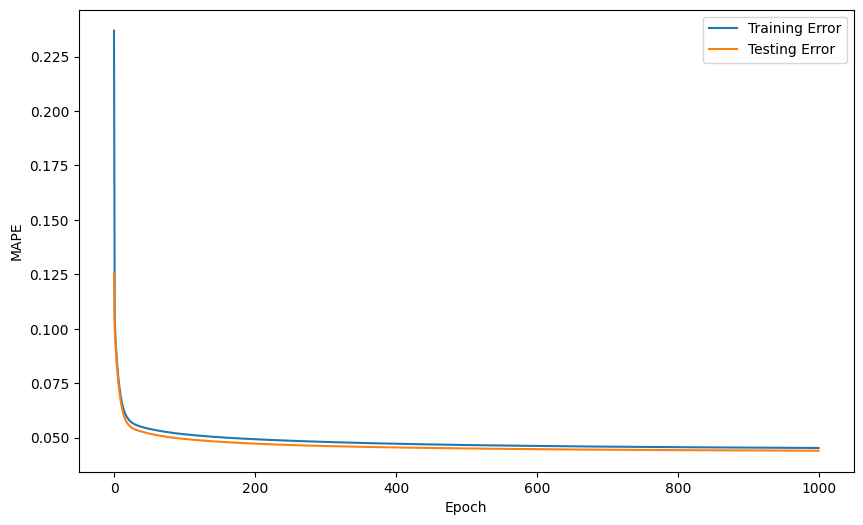

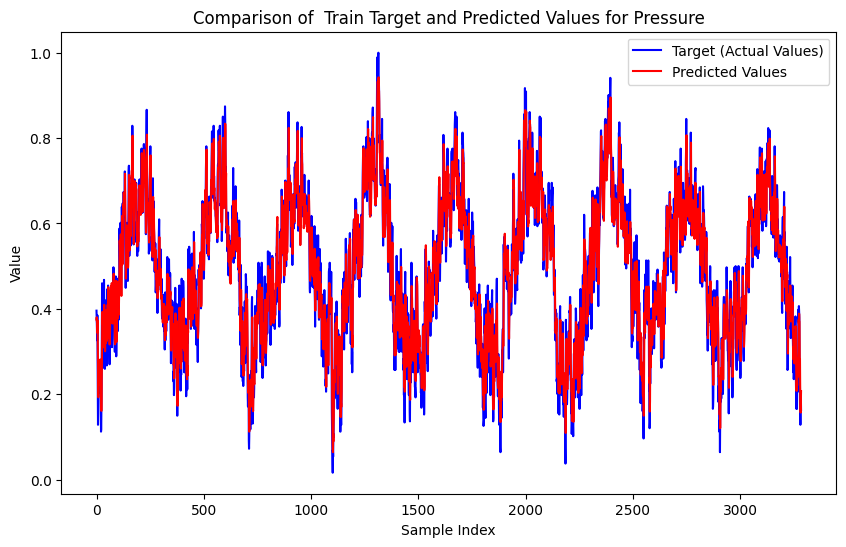

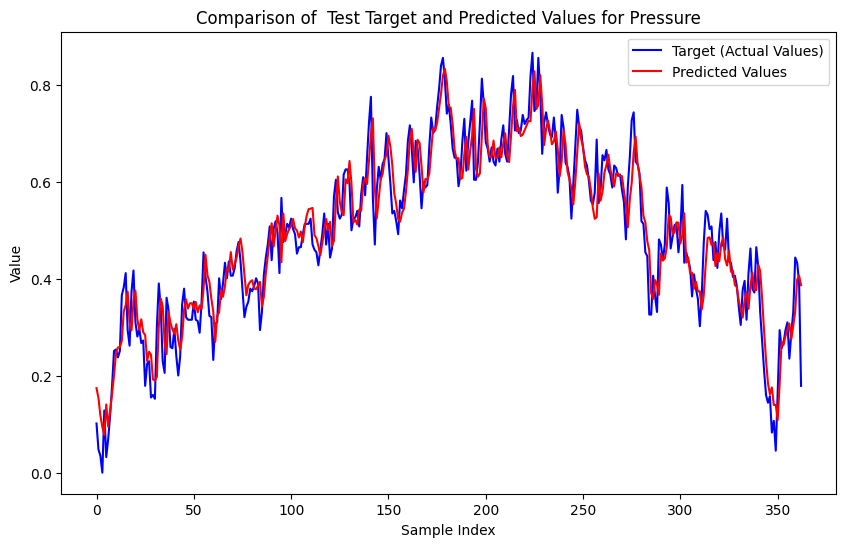

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,21]
Y_test_W = Y_test[:,21]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.00001
threshold = 0.001
epochs = 1000
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue

        lambda_reg = 0.01
        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i] + 2 * lambda_reg * W
        W -= learning_rate * gradient
        #gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        #W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr, label='Training Error')
plt.plot(errors_te, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values for Pressure')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values for Pressure')
plt.legend()
plt.show()


In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.04923012087603041
MEAN MAP of Test: 0.04723921937595128


Optional section (BASEL city)

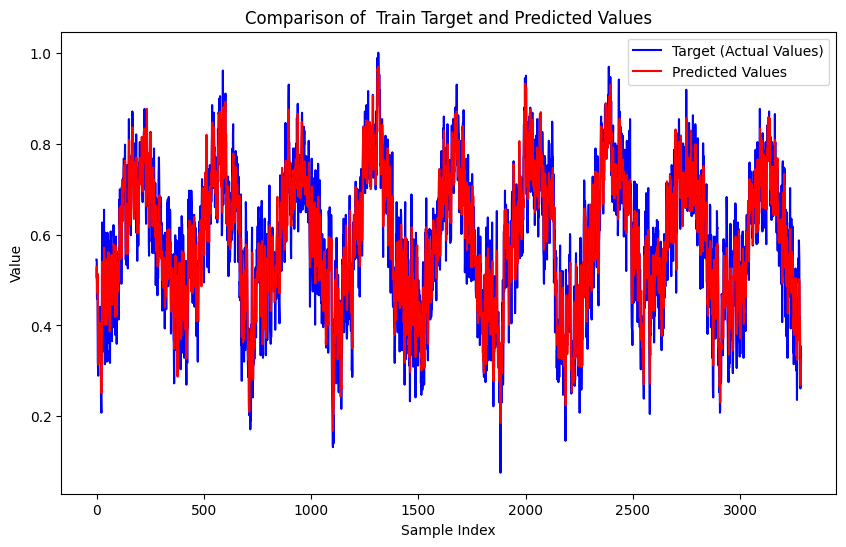

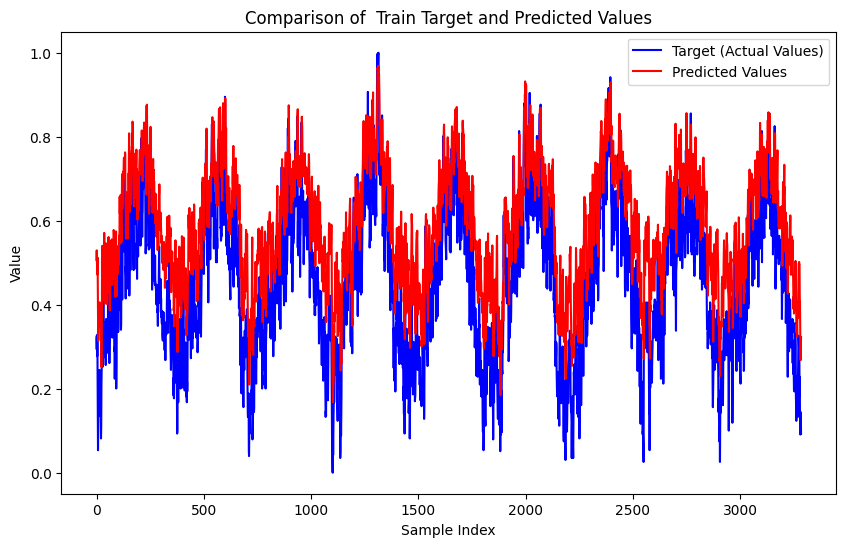

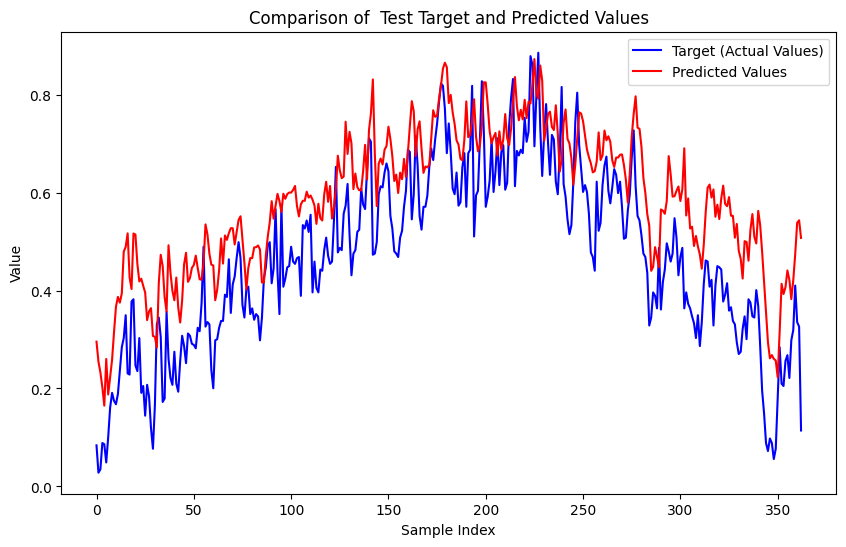

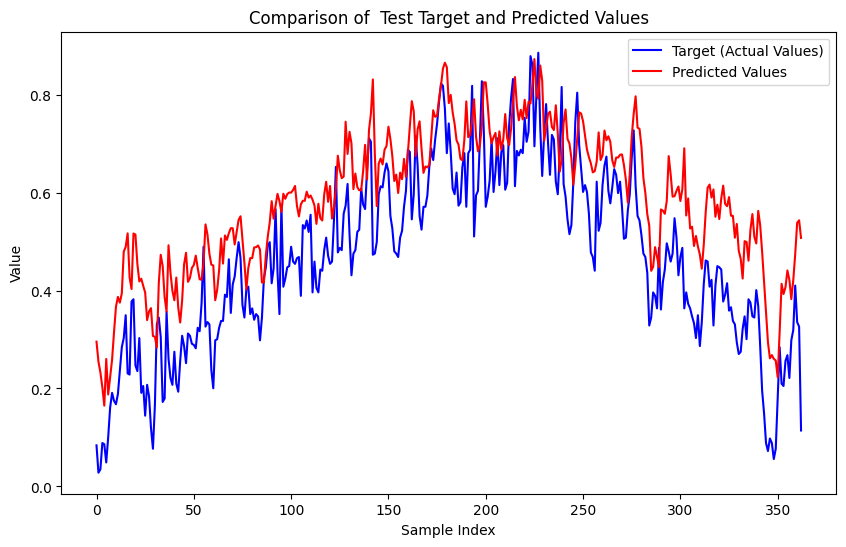

In [ ]:
Y_train_W = Y_train[:,30]
Y_test_W = Y_test[:,30]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()
Y_train_W = Y_train[:,31]
Y_test_W = Y_test[:,31]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values')
plt.legend()
plt.show()

1.3-Prediction Min Temperature

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


Training Progress:   0%|          | 3/1000 [00:00<01:33, 10.68it/s]

Epoch 1/1000 - MAP Train: 0.2693 | MAP Test: 0.1198
Epoch 2/1000 - MAP Train: 0.0987 | MAP Test: 0.0890
Epoch 3/1000 - MAP Train: 0.0879 | MAP Test: 0.0843


Training Progress:   1%|          | 7/1000 [00:00<01:11, 13.83it/s]

Epoch 4/1000 - MAP Train: 0.0846 | MAP Test: 0.0810
Epoch 5/1000 - MAP Train: 0.0821 | MAP Test: 0.0783
Epoch 6/1000 - MAP Train: 0.0800 | MAP Test: 0.0760
Epoch 7/1000 - MAP Train: 0.0781 | MAP Test: 0.0741


Training Progress:   1%|          | 11/1000 [00:00<01:08, 14.42it/s]

Epoch 8/1000 - MAP Train: 0.0766 | MAP Test: 0.0724
Epoch 9/1000 - MAP Train: 0.0752 | MAP Test: 0.0709
Epoch 10/1000 - MAP Train: 0.0740 | MAP Test: 0.0696
Epoch 11/1000 - MAP Train: 0.0729 | MAP Test: 0.0684


Training Progress:   2%|▏         | 15/1000 [00:01<01:02, 15.80it/s]

Epoch 12/1000 - MAP Train: 0.0720 | MAP Test: 0.0674
Epoch 13/1000 - MAP Train: 0.0711 | MAP Test: 0.0665
Epoch 14/1000 - MAP Train: 0.0704 | MAP Test: 0.0656
Epoch 15/1000 - MAP Train: 0.0697 | MAP Test: 0.0649


Epoch 16/1000 - MAP Train: 0.0692 | MAP Test: 0.0642
Epoch 17/1000 - MAP Train: 0.0686 | MAP Test: 0.0636
Epoch 18/1000 - MAP Train: 0.0682 | MAP Test: 0.0631


Training Progress:   2%|▏         | 21/1000 [00:01<01:05, 14.95it/s]

Epoch 19/1000 - MAP Train: 0.0678 | MAP Test: 0.0626
Epoch 20/1000 - MAP Train: 0.0674 | MAP Test: 0.0622
Epoch 21/1000 - MAP Train: 0.0670 | MAP Test: 0.0618


Training Progress:   2%|▏         | 23/1000 [00:01<01:05, 15.01it/s]

Epoch 22/1000 - MAP Train: 0.0667 | MAP Test: 0.0614
Epoch 23/1000 - MAP Train: 0.0664 | MAP Test: 0.0611
Epoch 24/1000 - MAP Train: 0.0662 | MAP Test: 0.0608


Training Progress:   3%|▎         | 27/1000 [00:01<01:03, 15.33it/s]

Epoch 25/1000 - MAP Train: 0.0659 | MAP Test: 0.0605
Epoch 26/1000 - MAP Train: 0.0657 | MAP Test: 0.0603
Epoch 27/1000 - MAP Train: 0.0655 | MAP Test: 0.0600
Epoch 28/1000 - MAP Train: 0.0653 | MAP Test: 0.0598
Epoch 29/1000 - MAP Train: 0.0651 | MAP Test: 0.0597


Training Progress:   3%|▎         | 32/1000 [00:02<00:54, 17.87it/s]

Epoch 30/1000 - MAP Train: 0.0650 | MAP Test: 0.0595
Epoch 31/1000 - MAP Train: 0.0648 | MAP Test: 0.0593
Epoch 32/1000 - MAP Train: 0.0647 | MAP Test: 0.0592
Epoch 33/1000 - MAP Train: 0.0645 | MAP Test: 0.0590


Training Progress:   4%|▎         | 37/1000 [00:02<00:53, 17.93it/s]

Epoch 34/1000 - MAP Train: 0.0644 | MAP Test: 0.0589
Epoch 35/1000 - MAP Train: 0.0642 | MAP Test: 0.0587
Epoch 36/1000 - MAP Train: 0.0641 | MAP Test: 0.0586
Epoch 37/1000 - MAP Train: 0.0640 | MAP Test: 0.0585


Training Progress:   4%|▍         | 39/1000 [00:02<01:00, 15.93it/s]

Epoch 38/1000 - MAP Train: 0.0639 | MAP Test: 0.0584
Epoch 39/1000 - MAP Train: 0.0637 | MAP Test: 0.0583


Training Progress:   4%|▍         | 43/1000 [00:02<01:07, 14.11it/s]

Epoch 40/1000 - MAP Train: 0.0636 | MAP Test: 0.0582
Epoch 41/1000 - MAP Train: 0.0635 | MAP Test: 0.0581
Epoch 42/1000 - MAP Train: 0.0634 | MAP Test: 0.0580
Epoch 43/1000 - MAP Train: 0.0633 | MAP Test: 0.0579


Training Progress:   5%|▍         | 46/1000 [00:03<00:58, 16.44it/s]

Epoch 44/1000 - MAP Train: 0.0632 | MAP Test: 0.0578
Epoch 45/1000 - MAP Train: 0.0631 | MAP Test: 0.0577
Epoch 46/1000 - MAP Train: 0.0630 | MAP Test: 0.0576
Epoch 47/1000 - MAP Train: 0.0629 | MAP Test: 0.0575
Epoch 48/1000 - MAP Train: 0.0628 | MAP Test: 0.0575


Training Progress:   5%|▌         | 51/1000 [00:03<00:53, 17.60it/s]

Epoch 49/1000 - MAP Train: 0.0627 | MAP Test: 0.0574
Epoch 50/1000 - MAP Train: 0.0626 | MAP Test: 0.0573
Epoch 51/1000 - MAP Train: 0.0625 | MAP Test: 0.0572
Epoch 52/1000 - MAP Train: 0.0624 | MAP Test: 0.0572
Epoch 53/1000 - MAP Train: 0.0623 | MAP Test: 0.0571


Training Progress:   6%|▌         | 56/1000 [00:03<00:53, 17.80it/s]

Epoch 54/1000 - MAP Train: 0.0622 | MAP Test: 0.0570
Epoch 55/1000 - MAP Train: 0.0622 | MAP Test: 0.0569
Epoch 56/1000 - MAP Train: 0.0621 | MAP Test: 0.0569
Epoch 57/1000 - MAP Train: 0.0620 | MAP Test: 0.0568


Training Progress:   6%|▌         | 61/1000 [00:03<00:48, 19.26it/s]

Epoch 58/1000 - MAP Train: 0.0619 | MAP Test: 0.0567
Epoch 59/1000 - MAP Train: 0.0618 | MAP Test: 0.0567
Epoch 60/1000 - MAP Train: 0.0618 | MAP Test: 0.0566
Epoch 61/1000 - MAP Train: 0.0617 | MAP Test: 0.0565
Epoch 62/1000 - MAP Train: 0.0616 | MAP Test: 0.0565


Training Progress:   7%|▋         | 66/1000 [00:04<00:46, 20.12it/s]

Epoch 63/1000 - MAP Train: 0.0615 | MAP Test: 0.0564
Epoch 64/1000 - MAP Train: 0.0615 | MAP Test: 0.0564
Epoch 65/1000 - MAP Train: 0.0614 | MAP Test: 0.0563
Epoch 66/1000 - MAP Train: 0.0613 | MAP Test: 0.0562
Epoch 67/1000 - MAP Train: 0.0613 | MAP Test: 0.0562


Epoch 68/1000 - MAP Train: 0.0612 | MAP Test: 0.0561
Epoch 69/1000 - MAP Train: 0.0611 | MAP Test: 0.0561
Epoch 70/1000 - MAP Train: 0.0611 | MAP Test: 0.0560
Epoch 71/1000 - MAP Train: 0.0610 | MAP Test: 0.0559


Training Progress:   8%|▊         | 75/1000 [00:04<00:46, 19.92it/s]

Epoch 72/1000 - MAP Train: 0.0609 | MAP Test: 0.0559
Epoch 73/1000 - MAP Train: 0.0609 | MAP Test: 0.0558
Epoch 74/1000 - MAP Train: 0.0608 | MAP Test: 0.0558
Epoch 75/1000 - MAP Train: 0.0607 | MAP Test: 0.0557


Training Progress:   8%|▊         | 78/1000 [00:04<00:52, 17.63it/s]

Epoch 76/1000 - MAP Train: 0.0607 | MAP Test: 0.0557
Epoch 77/1000 - MAP Train: 0.0606 | MAP Test: 0.0556
Epoch 78/1000 - MAP Train: 0.0606 | MAP Test: 0.0556
Epoch 79/1000 - MAP Train: 0.0605 | MAP Test: 0.0555


Training Progress:   8%|▊         | 82/1000 [00:04<00:51, 17.79it/s]

Epoch 80/1000 - MAP Train: 0.0605 | MAP Test: 0.0555
Epoch 81/1000 - MAP Train: 0.0604 | MAP Test: 0.0554
Epoch 82/1000 - MAP Train: 0.0604 | MAP Test: 0.0554
Epoch 83/1000 - MAP Train: 0.0603 | MAP Test: 0.0554


Training Progress:   9%|▊         | 87/1000 [00:05<00:49, 18.39it/s]

Epoch 84/1000 - MAP Train: 0.0602 | MAP Test: 0.0553
Epoch 85/1000 - MAP Train: 0.0602 | MAP Test: 0.0553
Epoch 86/1000 - MAP Train: 0.0601 | MAP Test: 0.0552
Epoch 87/1000 - MAP Train: 0.0601 | MAP Test: 0.0552


Training Progress:   9%|▉         | 91/1000 [00:05<00:51, 17.77it/s]

Epoch 88/1000 - MAP Train: 0.0600 | MAP Test: 0.0551
Epoch 89/1000 - MAP Train: 0.0600 | MAP Test: 0.0551
Epoch 90/1000 - MAP Train: 0.0599 | MAP Test: 0.0551
Epoch 91/1000 - MAP Train: 0.0599 | MAP Test: 0.0550


Training Progress:  10%|▉         | 95/1000 [00:05<00:52, 17.12it/s]

Epoch 92/1000 - MAP Train: 0.0599 | MAP Test: 0.0550
Epoch 93/1000 - MAP Train: 0.0598 | MAP Test: 0.0550
Epoch 94/1000 - MAP Train: 0.0598 | MAP Test: 0.0549
Epoch 95/1000 - MAP Train: 0.0597 | MAP Test: 0.0549


Training Progress:  10%|▉         | 97/1000 [00:05<00:53, 16.83it/s]

Epoch 96/1000 - MAP Train: 0.0597 | MAP Test: 0.0549
Epoch 97/1000 - MAP Train: 0.0596 | MAP Test: 0.0548
Epoch 98/1000 - MAP Train: 0.0596 | MAP Test: 0.0548


Training Progress:  10%|█         | 101/1000 [00:06<01:10, 12.76it/s]

Epoch 99/1000 - MAP Train: 0.0595 | MAP Test: 0.0548
Epoch 100/1000 - MAP Train: 0.0595 | MAP Test: 0.0547
Epoch 101/1000 - MAP Train: 0.0594 | MAP Test: 0.0547


Training Progress:  11%|█         | 107/1000 [00:06<00:50, 17.58it/s]

Epoch 102/1000 - MAP Train: 0.0594 | MAP Test: 0.0547
Epoch 103/1000 - MAP Train: 0.0594 | MAP Test: 0.0547
Epoch 104/1000 - MAP Train: 0.0593 | MAP Test: 0.0546
Epoch 105/1000 - MAP Train: 0.0593 | MAP Test: 0.0546
Epoch 106/1000 - MAP Train: 0.0592 | MAP Test: 0.0546
Epoch 107/1000 - MAP Train: 0.0592 | MAP Test: 0.0545


Training Progress:  11%|█         | 112/1000 [00:06<00:47, 18.81it/s]

Epoch 108/1000 - MAP Train: 0.0592 | MAP Test: 0.0545
Epoch 109/1000 - MAP Train: 0.0591 | MAP Test: 0.0545
Epoch 110/1000 - MAP Train: 0.0591 | MAP Test: 0.0544
Epoch 111/1000 - MAP Train: 0.0590 | MAP Test: 0.0544
Epoch 112/1000 - MAP Train: 0.0590 | MAP Test: 0.0544


Training Progress:  12%|█▏        | 117/1000 [00:06<00:45, 19.25it/s]

Epoch 113/1000 - MAP Train: 0.0590 | MAP Test: 0.0544
Epoch 114/1000 - MAP Train: 0.0589 | MAP Test: 0.0543
Epoch 115/1000 - MAP Train: 0.0589 | MAP Test: 0.0543
Epoch 116/1000 - MAP Train: 0.0589 | MAP Test: 0.0543
Epoch 117/1000 - MAP Train: 0.0588 | MAP Test: 0.0543


Training Progress:  12%|█▏        | 120/1000 [00:07<00:43, 20.38it/s]

Epoch 118/1000 - MAP Train: 0.0588 | MAP Test: 0.0542
Epoch 119/1000 - MAP Train: 0.0588 | MAP Test: 0.0542
Epoch 120/1000 - MAP Train: 0.0587 | MAP Test: 0.0542
Epoch 121/1000 - MAP Train: 0.0587 | MAP Test: 0.0541


Training Progress:  12%|█▏        | 123/1000 [00:07<00:47, 18.47it/s]

Epoch 122/1000 - MAP Train: 0.0587 | MAP Test: 0.0541
Epoch 123/1000 - MAP Train: 0.0586 | MAP Test: 0.0541
Epoch 124/1000 - MAP Train: 0.0586 | MAP Test: 0.0541
Epoch 125/1000 - MAP Train: 0.0586 | MAP Test: 0.0540


Training Progress:  13%|█▎        | 128/1000 [00:07<00:48, 17.97it/s]

Epoch 126/1000 - MAP Train: 0.0585 | MAP Test: 0.0540
Epoch 127/1000 - MAP Train: 0.0585 | MAP Test: 0.0540
Epoch 128/1000 - MAP Train: 0.0585 | MAP Test: 0.0540
Epoch 129/1000 - MAP Train: 0.0584 | MAP Test: 0.0539


Training Progress:  13%|█▎        | 133/1000 [00:07<00:49, 17.66it/s]

Epoch 130/1000 - MAP Train: 0.0584 | MAP Test: 0.0539
Epoch 131/1000 - MAP Train: 0.0584 | MAP Test: 0.0539
Epoch 132/1000 - MAP Train: 0.0583 | MAP Test: 0.0539
Epoch 133/1000 - MAP Train: 0.0583 | MAP Test: 0.0538


Training Progress:  14%|█▎        | 135/1000 [00:08<01:05, 13.15it/s]

Epoch 134/1000 - MAP Train: 0.0583 | MAP Test: 0.0538
Epoch 135/1000 - MAP Train: 0.0582 | MAP Test: 0.0538


Training Progress:  14%|█▎        | 137/1000 [00:08<01:03, 13.51it/s]

Epoch 136/1000 - MAP Train: 0.0582 | MAP Test: 0.0538
Epoch 137/1000 - MAP Train: 0.0582 | MAP Test: 0.0538
Epoch 138/1000 - MAP Train: 0.0581 | MAP Test: 0.0537
Epoch 139/1000 - MAP Train: 0.0581 | MAP Test: 0.0537


Training Progress:  14%|█▍        | 143/1000 [00:08<00:49, 17.37it/s]

Epoch 140/1000 - MAP Train: 0.0581 | MAP Test: 0.0537
Epoch 141/1000 - MAP Train: 0.0581 | MAP Test: 0.0537
Epoch 142/1000 - MAP Train: 0.0580 | MAP Test: 0.0536
Epoch 143/1000 - MAP Train: 0.0580 | MAP Test: 0.0536
Epoch 144/1000 - MAP Train: 0.0580 | MAP Test: 0.0536


Epoch 145/1000 - MAP Train: 0.0579 | MAP Test: 0.0536
Epoch 146/1000 - MAP Train: 0.0579 | MAP Test: 0.0535
Epoch 147/1000 - MAP Train: 0.0579 | MAP Test: 0.0535
Epoch 148/1000 - MAP Train: 0.0579 | MAP Test: 0.0535


Training Progress:  15%|█▌        | 153/1000 [00:09<00:41, 20.65it/s]

Epoch 149/1000 - MAP Train: 0.0578 | MAP Test: 0.0535
Epoch 150/1000 - MAP Train: 0.0578 | MAP Test: 0.0535
Epoch 151/1000 - MAP Train: 0.0578 | MAP Test: 0.0534
Epoch 152/1000 - MAP Train: 0.0578 | MAP Test: 0.0534
Epoch 153/1000 - MAP Train: 0.0577 | MAP Test: 0.0534


Training Progress:  16%|█▌        | 156/1000 [00:09<00:43, 19.34it/s]

Epoch 154/1000 - MAP Train: 0.0577 | MAP Test: 0.0534
Epoch 155/1000 - MAP Train: 0.0577 | MAP Test: 0.0534
Epoch 156/1000 - MAP Train: 0.0577 | MAP Test: 0.0533


Training Progress:  16%|█▌        | 158/1000 [00:09<01:01, 13.78it/s]

Epoch 157/1000 - MAP Train: 0.0576 | MAP Test: 0.0533
Epoch 158/1000 - MAP Train: 0.0576 | MAP Test: 0.0533


Training Progress:  16%|█▌        | 162/1000 [00:09<00:54, 15.50it/s]

Epoch 159/1000 - MAP Train: 0.0576 | MAP Test: 0.0533
Epoch 160/1000 - MAP Train: 0.0576 | MAP Test: 0.0533
Epoch 161/1000 - MAP Train: 0.0575 | MAP Test: 0.0532
Epoch 162/1000 - MAP Train: 0.0575 | MAP Test: 0.0532


Training Progress:  17%|█▋        | 166/1000 [00:09<00:49, 16.98it/s]

Epoch 163/1000 - MAP Train: 0.0575 | MAP Test: 0.0532
Epoch 164/1000 - MAP Train: 0.0575 | MAP Test: 0.0532
Epoch 165/1000 - MAP Train: 0.0574 | MAP Test: 0.0532
Epoch 166/1000 - MAP Train: 0.0574 | MAP Test: 0.0531


Training Progress:  17%|█▋        | 168/1000 [00:10<00:48, 17.32it/s]

Epoch 167/1000 - MAP Train: 0.0574 | MAP Test: 0.0531
Epoch 168/1000 - MAP Train: 0.0574 | MAP Test: 0.0531
Epoch 169/1000 - MAP Train: 0.0573 | MAP Test: 0.0531
Epoch 170/1000 - MAP Train: 0.0573 | MAP Test: 0.0531
Epoch 171/1000 - MAP Train: 0.0573 | MAP Test: 0.0531


Training Progress:  18%|█▊        | 175/1000 [00:10<00:46, 17.91it/s]

Epoch 172/1000 - MAP Train: 0.0573 | MAP Test: 0.0530
Epoch 173/1000 - MAP Train: 0.0572 | MAP Test: 0.0530
Epoch 174/1000 - MAP Train: 0.0572 | MAP Test: 0.0530
Epoch 175/1000 - MAP Train: 0.0572 | MAP Test: 0.0530


Training Progress:  18%|█▊        | 177/1000 [00:10<00:51, 15.85it/s]

Epoch 176/1000 - MAP Train: 0.0572 | MAP Test: 0.0530
Epoch 177/1000 - MAP Train: 0.0572 | MAP Test: 0.0529
Epoch 178/1000 - MAP Train: 0.0571 | MAP Test: 0.0529


Training Progress:  18%|█▊        | 181/1000 [00:10<00:59, 13.75it/s]

Epoch 179/1000 - MAP Train: 0.0571 | MAP Test: 0.0529
Epoch 180/1000 - MAP Train: 0.0571 | MAP Test: 0.0529
Epoch 181/1000 - MAP Train: 0.0571 | MAP Test: 0.0529


Training Progress:  18%|█▊        | 183/1000 [00:11<01:03, 12.78it/s]

Epoch 182/1000 - MAP Train: 0.0570 | MAP Test: 0.0529
Epoch 183/1000 - MAP Train: 0.0570 | MAP Test: 0.0529


Training Progress:  18%|█▊        | 185/1000 [00:11<01:39,  8.17it/s]

Epoch 184/1000 - MAP Train: 0.0570 | MAP Test: 0.0528
Epoch 185/1000 - MAP Train: 0.0570 | MAP Test: 0.0528


Training Progress:  19%|█▊        | 187/1000 [00:11<01:44,  7.76it/s]

Epoch 186/1000 - MAP Train: 0.0570 | MAP Test: 0.0528
Epoch 187/1000 - MAP Train: 0.0569 | MAP Test: 0.0528


Training Progress:  19%|█▉        | 189/1000 [00:12<02:16,  5.94it/s]

Epoch 188/1000 - MAP Train: 0.0569 | MAP Test: 0.0528
Epoch 189/1000 - MAP Train: 0.0569 | MAP Test: 0.0528


Training Progress:  19%|█▉        | 191/1000 [00:12<01:51,  7.25it/s]

Epoch 190/1000 - MAP Train: 0.0569 | MAP Test: 0.0527
Epoch 191/1000 - MAP Train: 0.0569 | MAP Test: 0.0527
Epoch 192/1000 - MAP Train: 0.0568 | MAP Test: 0.0527


Training Progress:  19%|█▉        | 194/1000 [00:12<01:53,  7.07it/s]

Epoch 193/1000 - MAP Train: 0.0568 | MAP Test: 0.0527
Epoch 194/1000 - MAP Train: 0.0568 | MAP Test: 0.0527


Training Progress:  20%|█▉        | 196/1000 [00:13<01:48,  7.38it/s]

Epoch 195/1000 - MAP Train: 0.0568 | MAP Test: 0.0527
Epoch 196/1000 - MAP Train: 0.0568 | MAP Test: 0.0527


Training Progress:  20%|█▉        | 199/1000 [00:13<01:32,  8.68it/s]

Epoch 197/1000 - MAP Train: 0.0567 | MAP Test: 0.0526
Epoch 198/1000 - MAP Train: 0.0567 | MAP Test: 0.0526
Epoch 199/1000 - MAP Train: 0.0567 | MAP Test: 0.0526


Training Progress:  20%|██        | 201/1000 [00:13<01:52,  7.08it/s]

Epoch 200/1000 - MAP Train: 0.0567 | MAP Test: 0.0526
Epoch 201/1000 - MAP Train: 0.0567 | MAP Test: 0.0526


Training Progress:  20%|██        | 202/1000 [00:14<02:22,  5.59it/s]

Epoch 202/1000 - MAP Train: 0.0567 | MAP Test: 0.0526


Training Progress:  20%|██        | 203/1000 [00:14<02:32,  5.21it/s]

Epoch 203/1000 - MAP Train: 0.0566 | MAP Test: 0.0526


Training Progress:  20%|██        | 204/1000 [00:14<02:55,  4.55it/s]

Epoch 204/1000 - MAP Train: 0.0566 | MAP Test: 0.0525


Training Progress:  21%|██        | 206/1000 [00:15<02:39,  4.98it/s]

Epoch 205/1000 - MAP Train: 0.0566 | MAP Test: 0.0525
Epoch 206/1000 - MAP Train: 0.0566 | MAP Test: 0.0525


Training Progress:  21%|██        | 207/1000 [00:15<02:26,  5.40it/s]

Epoch 207/1000 - MAP Train: 0.0566 | MAP Test: 0.0525
Epoch 208/1000 - MAP Train: 0.0565 | MAP Test: 0.0525
Epoch 209/1000 - MAP Train: 0.0565 | MAP Test: 0.0525


Training Progress:  21%|██        | 212/1000 [00:15<01:34,  8.35it/s]

Epoch 210/1000 - MAP Train: 0.0565 | MAP Test: 0.0525
Epoch 211/1000 - MAP Train: 0.0565 | MAP Test: 0.0524
Epoch 212/1000 - MAP Train: 0.0565 | MAP Test: 0.0524


Training Progress:  21%|██▏       | 214/1000 [00:15<01:29,  8.74it/s]

Epoch 213/1000 - MAP Train: 0.0565 | MAP Test: 0.0524
Epoch 214/1000 - MAP Train: 0.0564 | MAP Test: 0.0524


Training Progress:  22%|██▏       | 218/1000 [00:16<01:06, 11.83it/s]

Epoch 215/1000 - MAP Train: 0.0564 | MAP Test: 0.0524
Epoch 216/1000 - MAP Train: 0.0564 | MAP Test: 0.0524
Epoch 217/1000 - MAP Train: 0.0564 | MAP Test: 0.0524
Epoch 218/1000 - MAP Train: 0.0564 | MAP Test: 0.0524


Training Progress:  22%|██▏       | 222/1000 [00:16<00:53, 14.51it/s]

Epoch 219/1000 - MAP Train: 0.0564 | MAP Test: 0.0523
Epoch 220/1000 - MAP Train: 0.0563 | MAP Test: 0.0523
Epoch 221/1000 - MAP Train: 0.0563 | MAP Test: 0.0523
Epoch 222/1000 - MAP Train: 0.0563 | MAP Test: 0.0523


Training Progress:  23%|██▎       | 226/1000 [00:16<00:48, 16.07it/s]

Epoch 223/1000 - MAP Train: 0.0563 | MAP Test: 0.0523
Epoch 224/1000 - MAP Train: 0.0563 | MAP Test: 0.0523
Epoch 225/1000 - MAP Train: 0.0563 | MAP Test: 0.0523
Epoch 226/1000 - MAP Train: 0.0562 | MAP Test: 0.0523


Training Progress:  23%|██▎       | 230/1000 [00:16<00:45, 16.80it/s]

Epoch 227/1000 - MAP Train: 0.0562 | MAP Test: 0.0522
Epoch 228/1000 - MAP Train: 0.0562 | MAP Test: 0.0522
Epoch 229/1000 - MAP Train: 0.0562 | MAP Test: 0.0522
Epoch 230/1000 - MAP Train: 0.0562 | MAP Test: 0.0522


Epoch 231/1000 - MAP Train: 0.0562 | MAP Test: 0.0522


Training Progress:  23%|██▎       | 232/1000 [00:17<01:05, 11.74it/s]

Epoch 232/1000 - MAP Train: 0.0561 | MAP Test: 0.0522
Epoch 233/1000 - MAP Train: 0.0561 | MAP Test: 0.0522


Training Progress:  24%|██▎       | 236/1000 [00:17<01:13, 10.40it/s]

Epoch 234/1000 - MAP Train: 0.0561 | MAP Test: 0.0522
Epoch 235/1000 - MAP Train: 0.0561 | MAP Test: 0.0521
Epoch 236/1000 - MAP Train: 0.0561 | MAP Test: 0.0521


Training Progress:  24%|██▍       | 238/1000 [00:17<01:16,  9.90it/s]

Epoch 237/1000 - MAP Train: 0.0561 | MAP Test: 0.0521
Epoch 238/1000 - MAP Train: 0.0561 | MAP Test: 0.0521


Training Progress:  24%|██▍       | 240/1000 [00:18<01:19,  9.61it/s]

Epoch 239/1000 - MAP Train: 0.0560 | MAP Test: 0.0521
Epoch 240/1000 - MAP Train: 0.0560 | MAP Test: 0.0521
Epoch 241/1000 - MAP Train: 0.0560 | MAP Test: 0.0521


Training Progress:  24%|██▍       | 242/1000 [00:18<01:13, 10.32it/s]

Epoch 242/1000 - MAP Train: 0.0560 | MAP Test: 0.0521
Epoch 243/1000 - MAP Train: 0.0560 | MAP Test: 0.0521


Training Progress:  24%|██▍       | 245/1000 [00:18<01:24,  8.90it/s]

Epoch 244/1000 - MAP Train: 0.0560 | MAP Test: 0.0520
Epoch 245/1000 - MAP Train: 0.0560 | MAP Test: 0.0520
Epoch 246/1000 - MAP Train: 0.0559 | MAP Test: 0.0520


Training Progress:  25%|██▌       | 250/1000 [00:18<01:00, 12.35it/s]

Epoch 247/1000 - MAP Train: 0.0559 | MAP Test: 0.0520
Epoch 248/1000 - MAP Train: 0.0559 | MAP Test: 0.0520
Epoch 249/1000 - MAP Train: 0.0559 | MAP Test: 0.0520
Epoch 250/1000 - MAP Train: 0.0559 | MAP Test: 0.0520


Training Progress:  25%|██▌       | 252/1000 [00:19<01:04, 11.65it/s]

Epoch 251/1000 - MAP Train: 0.0559 | MAP Test: 0.0520
Epoch 252/1000 - MAP Train: 0.0559 | MAP Test: 0.0520


Training Progress:  25%|██▌       | 252/1000 [00:19<01:04, 11.65it/s]

Epoch 253/1000 - MAP Train: 0.0558 | MAP Test: 0.0519


Training Progress:  25%|██▌       | 254/1000 [00:19<01:29,  8.30it/s]

Epoch 254/1000 - MAP Train: 0.0558 | MAP Test: 0.0519


Training Progress:  25%|██▌       | 254/1000 [00:19<01:29,  8.30it/s]

Epoch 255/1000 - MAP Train: 0.0558 | MAP Test: 0.0519
Epoch 256/1000 - MAP Train: 0.0558 | MAP Test: 0.0519


Training Progress:  26%|██▌       | 259/1000 [00:20<01:32,  8.02it/s]

Epoch 257/1000 - MAP Train: 0.0558 | MAP Test: 0.0519
Epoch 258/1000 - MAP Train: 0.0558 | MAP Test: 0.0519
Epoch 259/1000 - MAP Train: 0.0558 | MAP Test: 0.0519


Training Progress:  26%|██▌       | 261/1000 [00:20<01:26,  8.59it/s]

Epoch 260/1000 - MAP Train: 0.0557 | MAP Test: 0.0519
Epoch 261/1000 - MAP Train: 0.0557 | MAP Test: 0.0519


Training Progress:  26%|██▌       | 262/1000 [00:20<01:42,  7.18it/s]

Epoch 262/1000 - MAP Train: 0.0557 | MAP Test: 0.0519


Training Progress:  26%|██▋       | 265/1000 [00:21<01:41,  7.22it/s]

Epoch 263/1000 - MAP Train: 0.0557 | MAP Test: 0.0518
Epoch 264/1000 - MAP Train: 0.0557 | MAP Test: 0.0518
Epoch 265/1000 - MAP Train: 0.0557 | MAP Test: 0.0518


Training Progress:  27%|██▋       | 267/1000 [00:21<01:25,  8.59it/s]

Epoch 266/1000 - MAP Train: 0.0557 | MAP Test: 0.0518
Epoch 267/1000 - MAP Train: 0.0557 | MAP Test: 0.0518
Epoch 268/1000 - MAP Train: 0.0556 | MAP Test: 0.0518


Training Progress:  27%|██▋       | 271/1000 [00:21<01:06, 10.96it/s]

Epoch 269/1000 - MAP Train: 0.0556 | MAP Test: 0.0518
Epoch 270/1000 - MAP Train: 0.0556 | MAP Test: 0.0518
Epoch 271/1000 - MAP Train: 0.0556 | MAP Test: 0.0518


Epoch 272/1000 - MAP Train: 0.0556 | MAP Test: 0.0518
Epoch 273/1000 - MAP Train: 0.0556 | MAP Test: 0.0518
Epoch 274/1000 - MAP Train: 0.0556 | MAP Test: 0.0517


Epoch 275/1000 - MAP Train: 0.0555 | MAP Test: 0.0517
Epoch 276/1000 - MAP Train: 0.0555 | MAP Test: 0.0517
Epoch 277/1000 - MAP Train: 0.0555 | MAP Test: 0.0517


Training Progress:  28%|██▊       | 279/1000 [00:22<00:52, 13.70it/s]

Epoch 278/1000 - MAP Train: 0.0555 | MAP Test: 0.0517
Epoch 279/1000 - MAP Train: 0.0555 | MAP Test: 0.0517


Training Progress:  28%|██▊       | 281/1000 [00:22<01:30,  7.97it/s]

Epoch 280/1000 - MAP Train: 0.0555 | MAP Test: 0.0517
Epoch 281/1000 - MAP Train: 0.0555 | MAP Test: 0.0517


Training Progress:  28%|██▊       | 283/1000 [00:22<01:33,  7.64it/s]

Epoch 282/1000 - MAP Train: 0.0555 | MAP Test: 0.0517
Epoch 283/1000 - MAP Train: 0.0554 | MAP Test: 0.0517


Training Progress:  28%|██▊       | 285/1000 [00:23<01:23,  8.52it/s]

Epoch 284/1000 - MAP Train: 0.0554 | MAP Test: 0.0517
Epoch 285/1000 - MAP Train: 0.0554 | MAP Test: 0.0517
Epoch 286/1000 - MAP Train: 0.0554 | MAP Test: 0.0516


Training Progress:  29%|██▉       | 289/1000 [00:23<01:07, 10.49it/s]

Epoch 287/1000 - MAP Train: 0.0554 | MAP Test: 0.0516
Epoch 288/1000 - MAP Train: 0.0554 | MAP Test: 0.0516
Epoch 289/1000 - MAP Train: 0.0554 | MAP Test: 0.0516


Training Progress:  29%|██▉       | 291/1000 [00:23<01:05, 10.84it/s]

Epoch 290/1000 - MAP Train: 0.0554 | MAP Test: 0.0516
Epoch 291/1000 - MAP Train: 0.0554 | MAP Test: 0.0516
Epoch 292/1000 - MAP Train: 0.0553 | MAP Test: 0.0516


Training Progress:  30%|██▉       | 295/1000 [00:23<01:02, 11.28it/s]

Epoch 293/1000 - MAP Train: 0.0553 | MAP Test: 0.0516
Epoch 294/1000 - MAP Train: 0.0553 | MAP Test: 0.0516
Epoch 295/1000 - MAP Train: 0.0553 | MAP Test: 0.0516


Training Progress:  30%|██▉       | 297/1000 [00:24<00:58, 11.98it/s]

Epoch 296/1000 - MAP Train: 0.0553 | MAP Test: 0.0516
Epoch 297/1000 - MAP Train: 0.0553 | MAP Test: 0.0516
Epoch 298/1000 - MAP Train: 0.0553 | MAP Test: 0.0515


Training Progress:  30%|██▉       | 299/1000 [00:24<00:58, 12.04it/s]

Epoch 299/1000 - MAP Train: 0.0553 | MAP Test: 0.0515
Epoch 300/1000 - MAP Train: 0.0553 | MAP Test: 0.0515


Training Progress:  30%|███       | 303/1000 [00:24<01:01, 11.41it/s]

Epoch 301/1000 - MAP Train: 0.0552 | MAP Test: 0.0515
Epoch 302/1000 - MAP Train: 0.0552 | MAP Test: 0.0515
Epoch 303/1000 - MAP Train: 0.0552 | MAP Test: 0.0515


Training Progress:  30%|███       | 305/1000 [00:24<01:06, 10.51it/s]

Epoch 304/1000 - MAP Train: 0.0552 | MAP Test: 0.0515
Epoch 305/1000 - MAP Train: 0.0552 | MAP Test: 0.0515


Training Progress:  31%|███       | 307/1000 [00:25<01:28,  7.87it/s]

Epoch 306/1000 - MAP Train: 0.0552 | MAP Test: 0.0515
Epoch 307/1000 - MAP Train: 0.0552 | MAP Test: 0.0515


Training Progress:  31%|███       | 308/1000 [00:25<01:40,  6.92it/s]

Epoch 308/1000 - MAP Train: 0.0552 | MAP Test: 0.0515


Training Progress:  31%|███       | 310/1000 [00:25<01:45,  6.57it/s]

Epoch 309/1000 - MAP Train: 0.0552 | MAP Test: 0.0515
Epoch 310/1000 - MAP Train: 0.0551 | MAP Test: 0.0515


Training Progress:  31%|███       | 312/1000 [00:26<01:39,  6.89it/s]

Epoch 311/1000 - MAP Train: 0.0551 | MAP Test: 0.0514
Epoch 312/1000 - MAP Train: 0.0551 | MAP Test: 0.0514


Training Progress:  31%|███▏      | 314/1000 [00:26<01:44,  6.54it/s]

Epoch 313/1000 - MAP Train: 0.0551 | MAP Test: 0.0514
Epoch 314/1000 - MAP Train: 0.0551 | MAP Test: 0.0514


Training Progress:  32%|███▏      | 316/1000 [00:26<01:32,  7.37it/s]

Epoch 315/1000 - MAP Train: 0.0551 | MAP Test: 0.0514
Epoch 316/1000 - MAP Train: 0.0551 | MAP Test: 0.0514


Training Progress:  32%|███▏      | 318/1000 [00:26<01:26,  7.86it/s]

Epoch 317/1000 - MAP Train: 0.0551 | MAP Test: 0.0514
Epoch 318/1000 - MAP Train: 0.0551 | MAP Test: 0.0514


Training Progress:  32%|███▏      | 320/1000 [00:27<01:30,  7.54it/s]

Epoch 319/1000 - MAP Train: 0.0551 | MAP Test: 0.0514
Epoch 320/1000 - MAP Train: 0.0550 | MAP Test: 0.0514


Training Progress:  32%|███▏      | 322/1000 [00:27<01:23,  8.16it/s]

Epoch 321/1000 - MAP Train: 0.0550 | MAP Test: 0.0514
Epoch 322/1000 - MAP Train: 0.0550 | MAP Test: 0.0514


Training Progress:  32%|███▏      | 324/1000 [00:27<01:27,  7.75it/s]

Epoch 323/1000 - MAP Train: 0.0550 | MAP Test: 0.0514
Epoch 324/1000 - MAP Train: 0.0550 | MAP Test: 0.0514


Training Progress:  33%|███▎      | 326/1000 [00:27<01:20,  8.40it/s]

Epoch 325/1000 - MAP Train: 0.0550 | MAP Test: 0.0514
Epoch 326/1000 - MAP Train: 0.0550 | MAP Test: 0.0513


Training Progress:  33%|███▎      | 328/1000 [00:28<01:45,  6.39it/s]

Epoch 327/1000 - MAP Train: 0.0550 | MAP Test: 0.0513
Epoch 328/1000 - MAP Train: 0.0550 | MAP Test: 0.0513


Training Progress:  33%|███▎      | 330/1000 [00:28<01:47,  6.25it/s]

Epoch 329/1000 - MAP Train: 0.0550 | MAP Test: 0.0513
Epoch 330/1000 - MAP Train: 0.0550 | MAP Test: 0.0513


Training Progress:  33%|███▎      | 332/1000 [00:28<01:27,  7.66it/s]

Epoch 331/1000 - MAP Train: 0.0549 | MAP Test: 0.0513
Epoch 332/1000 - MAP Train: 0.0549 | MAP Test: 0.0513


Training Progress:  33%|███▎      | 334/1000 [00:29<01:32,  7.21it/s]

Epoch 333/1000 - MAP Train: 0.0549 | MAP Test: 0.0513
Epoch 334/1000 - MAP Train: 0.0549 | MAP Test: 0.0513


Training Progress:  34%|███▎      | 336/1000 [00:29<01:24,  7.88it/s]

Epoch 335/1000 - MAP Train: 0.0549 | MAP Test: 0.0513
Epoch 336/1000 - MAP Train: 0.0549 | MAP Test: 0.0513


Training Progress:  34%|███▍      | 338/1000 [00:29<01:21,  8.12it/s]

Epoch 337/1000 - MAP Train: 0.0549 | MAP Test: 0.0513
Epoch 338/1000 - MAP Train: 0.0549 | MAP Test: 0.0513


Training Progress:  34%|███▍      | 340/1000 [00:29<01:25,  7.70it/s]

Epoch 339/1000 - MAP Train: 0.0549 | MAP Test: 0.0513
Epoch 340/1000 - MAP Train: 0.0549 | MAP Test: 0.0513


Training Progress:  34%|███▍      | 342/1000 [00:29<01:21,  8.07it/s]

Epoch 341/1000 - MAP Train: 0.0548 | MAP Test: 0.0512
Epoch 342/1000 - MAP Train: 0.0548 | MAP Test: 0.0512


Training Progress:  34%|███▍      | 344/1000 [00:30<01:40,  6.53it/s]

Epoch 343/1000 - MAP Train: 0.0548 | MAP Test: 0.0512
Epoch 344/1000 - MAP Train: 0.0548 | MAP Test: 0.0512


Training Progress:  35%|███▍      | 346/1000 [00:30<02:02,  5.32it/s]

Epoch 345/1000 - MAP Train: 0.0548 | MAP Test: 0.0512
Epoch 346/1000 - MAP Train: 0.0548 | MAP Test: 0.0512


Training Progress:  35%|███▍      | 348/1000 [00:31<01:38,  6.65it/s]

Epoch 347/1000 - MAP Train: 0.0548 | MAP Test: 0.0512
Epoch 348/1000 - MAP Train: 0.0548 | MAP Test: 0.0512


Training Progress:  35%|███▌      | 350/1000 [00:31<01:24,  7.68it/s]

Epoch 349/1000 - MAP Train: 0.0548 | MAP Test: 0.0512
Epoch 350/1000 - MAP Train: 0.0548 | MAP Test: 0.0512


Training Progress:  35%|███▌      | 352/1000 [00:31<01:26,  7.46it/s]

Epoch 351/1000 - MAP Train: 0.0548 | MAP Test: 0.0512
Epoch 352/1000 - MAP Train: 0.0548 | MAP Test: 0.0512


Training Progress:  35%|███▌      | 354/1000 [00:31<01:21,  7.90it/s]

Epoch 353/1000 - MAP Train: 0.0547 | MAP Test: 0.0512
Epoch 354/1000 - MAP Train: 0.0547 | MAP Test: 0.0512
Epoch 355/1000 - MAP Train: 0.0547 | MAP Test: 0.0512


Training Progress:  36%|███▌      | 358/1000 [00:32<01:02, 10.34it/s]

Epoch 356/1000 - MAP Train: 0.0547 | MAP Test: 0.0512
Epoch 357/1000 - MAP Train: 0.0547 | MAP Test: 0.0511
Epoch 358/1000 - MAP Train: 0.0547 | MAP Test: 0.0511


Training Progress:  36%|███▌      | 360/1000 [00:32<00:59, 10.70it/s]

Epoch 359/1000 - MAP Train: 0.0547 | MAP Test: 0.0511
Epoch 360/1000 - MAP Train: 0.0547 | MAP Test: 0.0511
Epoch 361/1000 - MAP Train: 0.0547 | MAP Test: 0.0511


Training Progress:  36%|███▋      | 364/1000 [00:32<00:55, 11.51it/s]

Epoch 362/1000 - MAP Train: 0.0547 | MAP Test: 0.0511
Epoch 363/1000 - MAP Train: 0.0547 | MAP Test: 0.0511
Epoch 364/1000 - MAP Train: 0.0546 | MAP Test: 0.0511


Training Progress:  37%|███▋      | 366/1000 [00:32<00:54, 11.53it/s]

Epoch 365/1000 - MAP Train: 0.0546 | MAP Test: 0.0511
Epoch 366/1000 - MAP Train: 0.0546 | MAP Test: 0.0511


Training Progress:  37%|███▋      | 366/1000 [00:32<00:54, 11.53it/s]

Epoch 367/1000 - MAP Train: 0.0546 | MAP Test: 0.0511


Epoch 368/1000 - MAP Train: 0.0546 | MAP Test: 0.0511
Epoch 369/1000 - MAP Train: 0.0546 | MAP Test: 0.0511


Training Progress:  37%|███▋      | 372/1000 [00:33<01:09,  9.07it/s]

Epoch 370/1000 - MAP Train: 0.0546 | MAP Test: 0.0511
Epoch 371/1000 - MAP Train: 0.0546 | MAP Test: 0.0511
Epoch 372/1000 - MAP Train: 0.0546 | MAP Test: 0.0511
Epoch 373/1000 - MAP Train: 0.0546 | MAP Test: 0.0510


Training Progress:  38%|███▊      | 376/1000 [00:33<00:56, 11.03it/s]

Epoch 374/1000 - MAP Train: 0.0546 | MAP Test: 0.0510
Epoch 375/1000 - MAP Train: 0.0546 | MAP Test: 0.0510
Epoch 376/1000 - MAP Train: 0.0546 | MAP Test: 0.0510


Training Progress:  38%|███▊      | 378/1000 [00:34<00:59, 10.39it/s]

Epoch 377/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 378/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 379/1000 - MAP Train: 0.0545 | MAP Test: 0.0510


Training Progress:  38%|███▊      | 380/1000 [00:34<00:53, 11.55it/s]

Epoch 380/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 381/1000 - MAP Train: 0.0545 | MAP Test: 0.0510


Training Progress:  38%|███▊      | 384/1000 [00:34<00:53, 11.46it/s]

Epoch 382/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 383/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 384/1000 - MAP Train: 0.0545 | MAP Test: 0.0510


Training Progress:  39%|███▊      | 386/1000 [00:34<00:53, 11.45it/s]

Epoch 385/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 386/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 387/1000 - MAP Train: 0.0545 | MAP Test: 0.0510


Training Progress:  39%|███▉      | 388/1000 [00:35<00:56, 10.86it/s]

Epoch 388/1000 - MAP Train: 0.0545 | MAP Test: 0.0510
Epoch 389/1000 - MAP Train: 0.0545 | MAP Test: 0.0510


Training Progress:  39%|███▉      | 391/1000 [00:35<01:07,  9.06it/s]

Epoch 390/1000 - MAP Train: 0.0544 | MAP Test: 0.0510
Epoch 391/1000 - MAP Train: 0.0544 | MAP Test: 0.0510


Training Progress:  39%|███▉      | 393/1000 [00:35<01:00,  9.96it/s]

Epoch 392/1000 - MAP Train: 0.0544 | MAP Test: 0.0509
Epoch 393/1000 - MAP Train: 0.0544 | MAP Test: 0.0509
Epoch 394/1000 - MAP Train: 0.0544 | MAP Test: 0.0509


Training Progress:  40%|███▉      | 397/1000 [00:35<00:58, 10.31it/s]

Epoch 395/1000 - MAP Train: 0.0544 | MAP Test: 0.0509
Epoch 396/1000 - MAP Train: 0.0544 | MAP Test: 0.0509
Epoch 397/1000 - MAP Train: 0.0544 | MAP Test: 0.0509


Training Progress:  40%|███▉      | 399/1000 [00:36<01:01,  9.83it/s]

Epoch 398/1000 - MAP Train: 0.0544 | MAP Test: 0.0509
Epoch 399/1000 - MAP Train: 0.0544 | MAP Test: 0.0509


Epoch 400/1000 - MAP Train: 0.0544 | MAP Test: 0.0509
Epoch 401/1000 - MAP Train: 0.0544 | MAP Test: 0.0509


Epoch 402/1000 - MAP Train: 0.0544 | MAP Test: 0.0509


Training Progress:  40%|████      | 404/1000 [00:36<01:17,  7.68it/s]

Epoch 403/1000 - MAP Train: 0.0543 | MAP Test: 0.0509
Epoch 404/1000 - MAP Train: 0.0543 | MAP Test: 0.0509


Training Progress:  41%|████      | 406/1000 [00:37<01:38,  6.06it/s]

Epoch 405/1000 - MAP Train: 0.0543 | MAP Test: 0.0509
Epoch 406/1000 - MAP Train: 0.0543 | MAP Test: 0.0509


Training Progress:  41%|████      | 407/1000 [00:37<01:46,  5.57it/s]

Epoch 407/1000 - MAP Train: 0.0543 | MAP Test: 0.0509


Training Progress:  41%|████      | 409/1000 [00:37<01:42,  5.76it/s]

Epoch 408/1000 - MAP Train: 0.0543 | MAP Test: 0.0509
Epoch 409/1000 - MAP Train: 0.0543 | MAP Test: 0.0509


Training Progress:  41%|████      | 411/1000 [00:38<01:36,  6.09it/s]

Epoch 410/1000 - MAP Train: 0.0543 | MAP Test: 0.0509
Epoch 411/1000 - MAP Train: 0.0543 | MAP Test: 0.0509


Training Progress:  41%|████▏     | 413/1000 [00:38<01:39,  5.89it/s]

Epoch 412/1000 - MAP Train: 0.0543 | MAP Test: 0.0509
Epoch 413/1000 - MAP Train: 0.0543 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 415/1000 [00:38<01:33,  6.26it/s]

Epoch 414/1000 - MAP Train: 0.0543 | MAP Test: 0.0508
Epoch 415/1000 - MAP Train: 0.0543 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 416/1000 [00:39<01:36,  6.06it/s]

Epoch 416/1000 - MAP Train: 0.0543 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 417/1000 [00:39<01:44,  5.57it/s]

Epoch 417/1000 - MAP Train: 0.0542 | MAP Test: 0.0508
Epoch 418/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 420/1000 [00:39<01:39,  5.81it/s]

Epoch 419/1000 - MAP Train: 0.0542 | MAP Test: 0.0508
Epoch 420/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 421/1000 [00:40<02:02,  4.71it/s]

Epoch 421/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 422/1000 [00:40<02:23,  4.03it/s]

Epoch 422/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 423/1000 [00:40<02:57,  3.25it/s]

Epoch 423/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  42%|████▏     | 424/1000 [00:41<03:13,  2.98it/s]

Epoch 424/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  42%|████▎     | 425/1000 [00:41<03:04,  3.11it/s]

Epoch 425/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  43%|████▎     | 427/1000 [00:41<02:24,  3.97it/s]

Epoch 426/1000 - MAP Train: 0.0542 | MAP Test: 0.0508
Epoch 427/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  43%|████▎     | 429/1000 [00:42<02:00,  4.74it/s]

Epoch 428/1000 - MAP Train: 0.0542 | MAP Test: 0.0508
Epoch 429/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  43%|████▎     | 431/1000 [00:42<01:47,  5.30it/s]

Epoch 430/1000 - MAP Train: 0.0542 | MAP Test: 0.0508
Epoch 431/1000 - MAP Train: 0.0542 | MAP Test: 0.0508


Training Progress:  43%|████▎     | 433/1000 [00:42<01:39,  5.69it/s]

Epoch 432/1000 - MAP Train: 0.0541 | MAP Test: 0.0508
Epoch 433/1000 - MAP Train: 0.0541 | MAP Test: 0.0508


Training Progress:  43%|████▎     | 434/1000 [00:43<02:04,  4.54it/s]

Epoch 434/1000 - MAP Train: 0.0541 | MAP Test: 0.0508


Training Progress:  44%|████▎     | 435/1000 [00:43<02:08,  4.39it/s]

Epoch 435/1000 - MAP Train: 0.0541 | MAP Test: 0.0508


Training Progress:  44%|████▎     | 437/1000 [00:43<02:02,  4.61it/s]

Epoch 436/1000 - MAP Train: 0.0541 | MAP Test: 0.0508
Epoch 437/1000 - MAP Train: 0.0541 | MAP Test: 0.0507


Training Progress:  44%|████▍     | 439/1000 [00:44<01:27,  6.41it/s]

Epoch 438/1000 - MAP Train: 0.0541 | MAP Test: 0.0507
Epoch 439/1000 - MAP Train: 0.0541 | MAP Test: 0.0507
Epoch 440/1000 - MAP Train: 0.0541 | MAP Test: 0.0507


Training Progress:  44%|████▍     | 442/1000 [00:44<01:10,  7.92it/s]

Epoch 441/1000 - MAP Train: 0.0541 | MAP Test: 0.0507
Epoch 442/1000 - MAP Train: 0.0541 | MAP Test: 0.0507
Epoch 443/1000 - MAP Train: 0.0541 | MAP Test: 0.0507


Training Progress:  45%|████▍     | 446/1000 [00:44<00:52, 10.48it/s]

Epoch 444/1000 - MAP Train: 0.0541 | MAP Test: 0.0507
Epoch 445/1000 - MAP Train: 0.0541 | MAP Test: 0.0507
Epoch 446/1000 - MAP Train: 0.0541 | MAP Test: 0.0507


Training Progress:  45%|████▍     | 448/1000 [00:45<00:53, 10.36it/s]

Epoch 447/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 448/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 449/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  45%|████▌     | 451/1000 [00:45<01:07,  8.19it/s]

Epoch 450/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 451/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  45%|████▌     | 453/1000 [00:45<01:15,  7.22it/s]

Epoch 452/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 453/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  46%|████▌     | 455/1000 [00:46<01:19,  6.84it/s]

Epoch 454/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 455/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  46%|████▌     | 456/1000 [00:46<01:31,  5.96it/s]

Epoch 456/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  46%|████▌     | 457/1000 [00:46<01:39,  5.47it/s]

Epoch 457/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  46%|████▌     | 458/1000 [00:46<01:42,  5.29it/s]

Epoch 458/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  46%|████▌     | 461/1000 [00:47<01:20,  6.68it/s]

Epoch 459/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 460/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 461/1000 - MAP Train: 0.0540 | MAP Test: 0.0507


Training Progress:  46%|████▋     | 463/1000 [00:47<01:06,  8.11it/s]

Epoch 462/1000 - MAP Train: 0.0540 | MAP Test: 0.0507
Epoch 463/1000 - MAP Train: 0.0540 | MAP Test: 0.0506


Training Progress:  47%|████▋     | 466/1000 [00:47<00:58,  9.16it/s]

Epoch 464/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 465/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 466/1000 - MAP Train: 0.0539 | MAP Test: 0.0506


Training Progress:  47%|████▋     | 468/1000 [00:47<00:55,  9.65it/s]

Epoch 467/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 468/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 469/1000 - MAP Train: 0.0539 | MAP Test: 0.0506


Training Progress:  47%|████▋     | 472/1000 [00:48<00:47, 11.08it/s]

Epoch 470/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 471/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 472/1000 - MAP Train: 0.0539 | MAP Test: 0.0506


Epoch 473/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 474/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 475/1000 - MAP Train: 0.0539 | MAP Test: 0.0506


Training Progress:  48%|████▊     | 478/1000 [00:48<00:40, 12.97it/s]

Epoch 476/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 477/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 478/1000 - MAP Train: 0.0539 | MAP Test: 0.0506


Training Progress:  48%|████▊     | 480/1000 [00:48<00:46, 11.30it/s]

Epoch 479/1000 - MAP Train: 0.0539 | MAP Test: 0.0506
Epoch 480/1000 - MAP Train: 0.0539 | MAP Test: 0.0506


Training Progress:  48%|████▊     | 482/1000 [00:48<00:45, 11.45it/s]

Epoch 481/1000 - MAP Train: 0.0538 | MAP Test: 0.0506
Epoch 482/1000 - MAP Train: 0.0538 | MAP Test: 0.0506
Epoch 483/1000 - MAP Train: 0.0538 | MAP Test: 0.0506


Training Progress:  48%|████▊     | 484/1000 [00:49<00:46, 11.19it/s]

Epoch 484/1000 - MAP Train: 0.0538 | MAP Test: 0.0506
Epoch 485/1000 - MAP Train: 0.0538 | MAP Test: 0.0506


Training Progress:  49%|████▊     | 486/1000 [00:49<00:50, 10.14it/s]

Epoch 486/1000 - MAP Train: 0.0538 | MAP Test: 0.0506
Epoch 487/1000 - MAP Train: 0.0538 | MAP Test: 0.0506


Epoch 488/1000 - MAP Train: 0.0538 | MAP Test: 0.0506
Epoch 489/1000 - MAP Train: 0.0538 | MAP Test: 0.0506


Training Progress:  49%|████▉     | 491/1000 [00:49<00:52,  9.62it/s]

Epoch 490/1000 - MAP Train: 0.0538 | MAP Test: 0.0505
Epoch 491/1000 - MAP Train: 0.0538 | MAP Test: 0.0505
Epoch 492/1000 - MAP Train: 0.0538 | MAP Test: 0.0505


Training Progress:  50%|████▉     | 495/1000 [00:50<00:47, 10.64it/s]

Epoch 493/1000 - MAP Train: 0.0538 | MAP Test: 0.0505
Epoch 494/1000 - MAP Train: 0.0538 | MAP Test: 0.0505
Epoch 495/1000 - MAP Train: 0.0538 | MAP Test: 0.0505


Training Progress:  50%|████▉     | 497/1000 [00:50<00:45, 11.10it/s]

Epoch 496/1000 - MAP Train: 0.0538 | MAP Test: 0.0505
Epoch 497/1000 - MAP Train: 0.0538 | MAP Test: 0.0505
Epoch 498/1000 - MAP Train: 0.0538 | MAP Test: 0.0505


Training Progress:  50%|█████     | 501/1000 [00:50<00:44, 11.26it/s]

Epoch 499/1000 - MAP Train: 0.0538 | MAP Test: 0.0505
Epoch 500/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 501/1000 - MAP Train: 0.0537 | MAP Test: 0.0505


Training Progress:  50%|█████     | 505/1000 [00:51<00:38, 12.76it/s]

Epoch 502/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 503/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 504/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 505/1000 - MAP Train: 0.0537 | MAP Test: 0.0505


Training Progress:  51%|█████     | 507/1000 [00:51<00:38, 12.90it/s]

Epoch 506/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 507/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 508/1000 - MAP Train: 0.0537 | MAP Test: 0.0505


Training Progress:  51%|█████     | 511/1000 [00:51<00:38, 12.81it/s]

Epoch 509/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 510/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 511/1000 - MAP Train: 0.0537 | MAP Test: 0.0505


Training Progress:  51%|█████▏    | 513/1000 [00:51<00:39, 12.22it/s]

Epoch 512/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 513/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 514/1000 - MAP Train: 0.0537 | MAP Test: 0.0505


Training Progress:  52%|█████▏    | 515/1000 [00:52<00:40, 12.05it/s]

Epoch 515/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 516/1000 - MAP Train: 0.0537 | MAP Test: 0.0505


Training Progress:  52%|█████▏    | 517/1000 [00:52<00:48,  9.88it/s]

Epoch 517/1000 - MAP Train: 0.0537 | MAP Test: 0.0505
Epoch 518/1000 - MAP Train: 0.0537 | MAP Test: 0.0505


Training Progress:  52%|█████▏    | 521/1000 [00:52<00:46, 10.20it/s]

Epoch 519/1000 - MAP Train: 0.0536 | MAP Test: 0.0505
Epoch 520/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 521/1000 - MAP Train: 0.0536 | MAP Test: 0.0504


Training Progress:  52%|█████▏    | 523/1000 [00:52<00:43, 10.91it/s]

Epoch 522/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 523/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 524/1000 - MAP Train: 0.0536 | MAP Test: 0.0504


Training Progress:  53%|█████▎    | 527/1000 [00:52<00:36, 13.04it/s]

Epoch 525/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 526/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 527/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 528/1000 - MAP Train: 0.0536 | MAP Test: 0.0504


Training Progress:  53%|█████▎    | 531/1000 [00:53<00:35, 13.24it/s]

Epoch 529/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 530/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 531/1000 - MAP Train: 0.0536 | MAP Test: 0.0504


Training Progress:  53%|█████▎    | 533/1000 [00:53<00:35, 13.18it/s]

Epoch 532/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 533/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 534/1000 - MAP Train: 0.0536 | MAP Test: 0.0504


Training Progress:  54%|█████▎    | 537/1000 [00:53<00:36, 12.60it/s]

Epoch 535/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 536/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 537/1000 - MAP Train: 0.0536 | MAP Test: 0.0504


Training Progress:  54%|█████▍    | 539/1000 [00:53<00:44, 10.26it/s]

Epoch 538/1000 - MAP Train: 0.0536 | MAP Test: 0.0504
Epoch 539/1000 - MAP Train: 0.0536 | MAP Test: 0.0504


Training Progress:  54%|█████▍    | 539/1000 [00:54<00:44, 10.26it/s]

Epoch 540/1000 - MAP Train: 0.0535 | MAP Test: 0.0504


Training Progress:  54%|█████▍    | 542/1000 [00:54<01:04,  7.08it/s]

Epoch 541/1000 - MAP Train: 0.0535 | MAP Test: 0.0504
Epoch 542/1000 - MAP Train: 0.0535 | MAP Test: 0.0504


Training Progress:  54%|█████▍    | 544/1000 [00:54<01:10,  6.45it/s]

Epoch 543/1000 - MAP Train: 0.0535 | MAP Test: 0.0504
Epoch 544/1000 - MAP Train: 0.0535 | MAP Test: 0.0504


Training Progress:  55%|█████▍    | 546/1000 [00:55<01:06,  6.87it/s]

Epoch 545/1000 - MAP Train: 0.0535 | MAP Test: 0.0504
Epoch 546/1000 - MAP Train: 0.0535 | MAP Test: 0.0504


Training Progress:  55%|█████▍    | 548/1000 [00:55<01:06,  6.79it/s]

Epoch 547/1000 - MAP Train: 0.0535 | MAP Test: 0.0504
Epoch 548/1000 - MAP Train: 0.0535 | MAP Test: 0.0504


Training Progress:  55%|█████▌    | 550/1000 [00:55<01:12,  6.19it/s]

Epoch 549/1000 - MAP Train: 0.0535 | MAP Test: 0.0504
Epoch 550/1000 - MAP Train: 0.0535 | MAP Test: 0.0504


Training Progress:  55%|█████▌    | 552/1000 [00:56<01:06,  6.70it/s]

Epoch 551/1000 - MAP Train: 0.0535 | MAP Test: 0.0504
Epoch 552/1000 - MAP Train: 0.0535 | MAP Test: 0.0503


Training Progress:  55%|█████▌    | 554/1000 [00:56<00:59,  7.48it/s]

Epoch 553/1000 - MAP Train: 0.0535 | MAP Test: 0.0503
Epoch 554/1000 - MAP Train: 0.0535 | MAP Test: 0.0503
Epoch 555/1000 - MAP Train: 0.0535 | MAP Test: 0.0503


Training Progress:  56%|█████▌    | 557/1000 [00:56<00:50,  8.73it/s]

Epoch 556/1000 - MAP Train: 0.0535 | MAP Test: 0.0503
Epoch 557/1000 - MAP Train: 0.0535 | MAP Test: 0.0503


Training Progress:  56%|█████▌    | 558/1000 [00:56<01:05,  6.75it/s]

Epoch 558/1000 - MAP Train: 0.0535 | MAP Test: 0.0503


Training Progress:  56%|█████▌    | 560/1000 [00:57<01:17,  5.67it/s]

Epoch 559/1000 - MAP Train: 0.0535 | MAP Test: 0.0503
Epoch 560/1000 - MAP Train: 0.0535 | MAP Test: 0.0503


Training Progress:  56%|█████▌    | 562/1000 [00:57<01:08,  6.35it/s]

Epoch 561/1000 - MAP Train: 0.0535 | MAP Test: 0.0503
Epoch 562/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  56%|█████▋    | 564/1000 [00:57<01:00,  7.18it/s]

Epoch 563/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 564/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  57%|█████▋    | 566/1000 [00:58<01:01,  7.10it/s]

Epoch 565/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 566/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  57%|█████▋    | 568/1000 [00:58<00:57,  7.51it/s]

Epoch 567/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 568/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  57%|█████▋    | 570/1000 [00:58<00:46,  9.24it/s]

Epoch 569/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 570/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 571/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  57%|█████▋    | 574/1000 [00:58<00:35, 12.05it/s]

Epoch 572/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 573/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 574/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  58%|█████▊    | 576/1000 [00:59<00:42, 10.00it/s]

Epoch 575/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 576/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  58%|█████▊    | 578/1000 [00:59<00:49,  8.53it/s]

Epoch 577/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 578/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  58%|█████▊    | 581/1000 [00:59<00:45,  9.23it/s]

Epoch 579/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 580/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 581/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  58%|█████▊    | 583/1000 [00:59<00:41,  9.98it/s]

Epoch 582/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 583/1000 - MAP Train: 0.0534 | MAP Test: 0.0503
Epoch 584/1000 - MAP Train: 0.0534 | MAP Test: 0.0503


Training Progress:  59%|█████▊    | 587/1000 [01:00<00:35, 11.77it/s]

Epoch 585/1000 - MAP Train: 0.0533 | MAP Test: 0.0503
Epoch 586/1000 - MAP Train: 0.0533 | MAP Test: 0.0503
Epoch 587/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  59%|█████▉    | 589/1000 [01:00<00:32, 12.72it/s]

Epoch 588/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 589/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 590/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  59%|█████▉    | 591/1000 [01:00<00:33, 12.36it/s]

Epoch 591/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 592/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  59%|█████▉    | 593/1000 [01:00<00:38, 10.68it/s]

Epoch 593/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 594/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  60%|█████▉    | 597/1000 [01:01<00:41,  9.63it/s]

Epoch 595/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 596/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 597/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  60%|█████▉    | 599/1000 [01:01<00:47,  8.48it/s]

Epoch 598/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 599/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  60%|██████    | 602/1000 [01:01<00:44,  8.97it/s]

Epoch 600/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 601/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 602/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  60%|██████    | 604/1000 [01:02<00:40,  9.81it/s]

Epoch 603/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 604/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 605/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  61%|██████    | 608/1000 [01:02<00:38, 10.07it/s]

Epoch 606/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 607/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 608/1000 - MAP Train: 0.0533 | MAP Test: 0.0502


Training Progress:  61%|██████    | 610/1000 [01:02<00:38, 10.23it/s]

Epoch 609/1000 - MAP Train: 0.0533 | MAP Test: 0.0502
Epoch 610/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 611/1000 - MAP Train: 0.0532 | MAP Test: 0.0502


Training Progress:  61%|██████▏   | 614/1000 [01:02<00:35, 10.96it/s]

Epoch 612/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 613/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 614/1000 - MAP Train: 0.0532 | MAP Test: 0.0502


Training Progress:  62%|██████▏   | 616/1000 [01:03<00:39,  9.77it/s]

Epoch 615/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 616/1000 - MAP Train: 0.0532 | MAP Test: 0.0502


Training Progress:  62%|██████▏   | 618/1000 [01:03<00:40,  9.44it/s]

Epoch 617/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 618/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 619/1000 - MAP Train: 0.0532 | MAP Test: 0.0502


Training Progress:  62%|██████▏   | 622/1000 [01:03<00:35, 10.67it/s]

Epoch 620/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 621/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 622/1000 - MAP Train: 0.0532 | MAP Test: 0.0502


Training Progress:  62%|██████▏   | 624/1000 [01:03<00:34, 10.87it/s]

Epoch 623/1000 - MAP Train: 0.0532 | MAP Test: 0.0502
Epoch 624/1000 - MAP Train: 0.0532 | MAP Test: 0.0501


Training Progress:  63%|██████▎   | 626/1000 [01:04<00:40,  9.26it/s]

Epoch 625/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 626/1000 - MAP Train: 0.0532 | MAP Test: 0.0501


Training Progress:  63%|██████▎   | 628/1000 [01:04<00:41,  9.02it/s]

Epoch 627/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 628/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 629/1000 - MAP Train: 0.0532 | MAP Test: 0.0501


Training Progress:  63%|██████▎   | 632/1000 [01:04<00:34, 10.55it/s]

Epoch 630/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 631/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 632/1000 - MAP Train: 0.0532 | MAP Test: 0.0501


Training Progress:  63%|██████▎   | 634/1000 [01:05<00:33, 10.96it/s]

Epoch 633/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 634/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 635/1000 - MAP Train: 0.0532 | MAP Test: 0.0501


Training Progress:  64%|██████▍   | 638/1000 [01:05<00:29, 12.23it/s]

Epoch 636/1000 - MAP Train: 0.0532 | MAP Test: 0.0501
Epoch 637/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 638/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  64%|██████▍   | 640/1000 [01:05<00:30, 11.68it/s]

Epoch 639/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 640/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 641/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  64%|██████▍   | 644/1000 [01:05<00:27, 13.18it/s]

Epoch 642/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 643/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 644/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Epoch 645/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 646/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  65%|██████▍   | 648/1000 [01:06<00:34, 10.22it/s]

Epoch 647/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 648/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  65%|██████▌   | 650/1000 [01:06<00:38,  9.10it/s]

Epoch 649/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 650/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  65%|██████▌   | 653/1000 [01:06<00:35,  9.75it/s]

Epoch 651/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 652/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 653/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  66%|██████▌   | 655/1000 [01:06<00:33, 10.28it/s]

Epoch 654/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 655/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 656/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  66%|██████▌   | 659/1000 [01:07<00:28, 11.86it/s]

Epoch 657/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 658/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 659/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  66%|██████▌   | 661/1000 [01:07<00:27, 12.21it/s]

Epoch 660/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 661/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 662/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  66%|██████▋   | 665/1000 [01:07<00:28, 11.92it/s]

Epoch 663/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 664/1000 - MAP Train: 0.0531 | MAP Test: 0.0501
Epoch 665/1000 - MAP Train: 0.0531 | MAP Test: 0.0501


Training Progress:  67%|██████▋   | 667/1000 [01:07<00:27, 12.07it/s]

Epoch 666/1000 - MAP Train: 0.0531 | MAP Test: 0.0500
Epoch 667/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 668/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  67%|██████▋   | 669/1000 [01:08<00:30, 10.72it/s]

Epoch 669/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  67%|██████▋   | 669/1000 [01:08<00:30, 10.72it/s]

Epoch 670/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  67%|██████▋   | 671/1000 [01:08<00:49,  6.60it/s]

Epoch 671/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  67%|██████▋   | 673/1000 [01:09<00:54,  5.98it/s]

Epoch 672/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 673/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  68%|██████▊   | 675/1000 [01:09<00:48,  6.73it/s]

Epoch 674/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 675/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  68%|██████▊   | 677/1000 [01:09<00:44,  7.24it/s]

Epoch 676/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 677/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  68%|██████▊   | 679/1000 [01:09<00:42,  7.59it/s]

Epoch 678/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 679/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  68%|██████▊   | 682/1000 [01:10<00:36,  8.61it/s]

Epoch 680/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 681/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 682/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  68%|██████▊   | 684/1000 [01:10<00:35,  8.99it/s]

Epoch 683/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 684/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  69%|██████▊   | 686/1000 [01:10<00:37,  8.46it/s]

Epoch 685/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 686/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 687/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  69%|██████▉   | 690/1000 [01:10<00:25, 12.06it/s]

Epoch 688/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 689/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 690/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 691/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  69%|██████▉   | 694/1000 [01:11<00:21, 14.30it/s]

Epoch 692/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 693/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 694/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 695/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  70%|██████▉   | 696/1000 [01:11<00:23, 12.70it/s]

Epoch 696/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 697/1000 - MAP Train: 0.0530 | MAP Test: 0.0500


Training Progress:  70%|███████   | 700/1000 [01:11<00:27, 11.02it/s]

Epoch 698/1000 - MAP Train: 0.0530 | MAP Test: 0.0500
Epoch 699/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 700/1000 - MAP Train: 0.0529 | MAP Test: 0.0500


Training Progress:  70%|███████   | 704/1000 [01:11<00:22, 13.12it/s]

Epoch 701/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 702/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 703/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 704/1000 - MAP Train: 0.0529 | MAP Test: 0.0500


Epoch 705/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 706/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 707/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 708/1000 - MAP Train: 0.0529 | MAP Test: 0.0500


Training Progress:  71%|███████   | 712/1000 [01:12<00:19, 14.54it/s]

Epoch 709/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 710/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 711/1000 - MAP Train: 0.0529 | MAP Test: 0.0500
Epoch 712/1000 - MAP Train: 0.0529 | MAP Test: 0.0500


Training Progress:  71%|███████▏  | 714/1000 [01:12<00:20, 14.09it/s]

Epoch 713/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 714/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 715/1000 - MAP Train: 0.0529 | MAP Test: 0.0499


Training Progress:  72%|███████▏  | 718/1000 [01:12<00:20, 13.92it/s]

Epoch 716/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 717/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 718/1000 - MAP Train: 0.0529 | MAP Test: 0.0499


Training Progress:  72%|███████▏  | 720/1000 [01:13<00:18, 15.15it/s]

Epoch 719/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 720/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 721/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 722/1000 - MAP Train: 0.0529 | MAP Test: 0.0499


Training Progress:  72%|███████▎  | 725/1000 [01:13<00:16, 16.65it/s]

Epoch 723/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 724/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 725/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 726/1000 - MAP Train: 0.0529 | MAP Test: 0.0499


Training Progress:  73%|███████▎  | 729/1000 [01:13<00:15, 17.40it/s]

Epoch 727/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 728/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 729/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 730/1000 - MAP Train: 0.0529 | MAP Test: 0.0499


Training Progress:  73%|███████▎  | 733/1000 [01:13<00:15, 16.83it/s]

Epoch 731/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 732/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 733/1000 - MAP Train: 0.0529 | MAP Test: 0.0499
Epoch 734/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  74%|███████▎  | 735/1000 [01:14<00:16, 16.04it/s]

Epoch 735/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 736/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  74%|███████▍  | 739/1000 [01:14<00:19, 13.67it/s]

Epoch 737/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 738/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 739/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 740/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  74%|███████▍  | 743/1000 [01:14<00:16, 15.61it/s]

Epoch 741/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 742/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 743/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 744/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  75%|███████▍  | 748/1000 [01:14<00:14, 17.54it/s]

Epoch 745/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 746/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 747/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 748/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  75%|███████▌  | 752/1000 [01:14<00:14, 16.78it/s]

Epoch 749/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 750/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 751/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 752/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  75%|███████▌  | 754/1000 [01:15<00:19, 12.44it/s]

Epoch 753/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 754/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 755/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  76%|███████▌  | 758/1000 [01:15<00:16, 14.48it/s]

Epoch 756/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 757/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 758/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 759/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  76%|███████▌  | 762/1000 [01:15<00:14, 16.14it/s]

Epoch 760/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 761/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 762/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 763/1000 - MAP Train: 0.0528 | MAP Test: 0.0499


Training Progress:  77%|███████▋  | 767/1000 [01:15<00:13, 17.39it/s]

Epoch 764/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 765/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 766/1000 - MAP Train: 0.0528 | MAP Test: 0.0499
Epoch 767/1000 - MAP Train: 0.0528 | MAP Test: 0.0498


Training Progress:  77%|███████▋  | 771/1000 [01:16<00:13, 17.07it/s]

Epoch 768/1000 - MAP Train: 0.0528 | MAP Test: 0.0498
Epoch 769/1000 - MAP Train: 0.0528 | MAP Test: 0.0498
Epoch 770/1000 - MAP Train: 0.0528 | MAP Test: 0.0498
Epoch 771/1000 - MAP Train: 0.0528 | MAP Test: 0.0498


Training Progress:  78%|███████▊  | 775/1000 [01:16<00:13, 16.89it/s]

Epoch 772/1000 - MAP Train: 0.0528 | MAP Test: 0.0498
Epoch 773/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 774/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 775/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  78%|███████▊  | 779/1000 [01:16<00:12, 17.18it/s]

Epoch 776/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 777/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 778/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 779/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  78%|███████▊  | 781/1000 [01:16<00:13, 16.62it/s]

Epoch 780/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 781/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 782/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  78%|███████▊  | 785/1000 [01:17<00:17, 12.35it/s]

Epoch 783/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 784/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 785/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  79%|███████▉  | 789/1000 [01:17<00:14, 14.61it/s]

Epoch 786/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 787/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 788/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 789/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  79%|███████▉  | 793/1000 [01:17<00:13, 15.75it/s]

Epoch 790/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 791/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 792/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 793/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  80%|███████▉  | 798/1000 [01:17<00:10, 18.44it/s]

Epoch 794/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 795/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 796/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 797/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 798/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  80%|████████  | 800/1000 [01:18<00:10, 18.39it/s]

Epoch 799/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 800/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 801/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  80%|████████  | 804/1000 [01:18<00:14, 13.79it/s]

Epoch 802/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 803/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 804/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 805/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  81%|████████  | 808/1000 [01:18<00:12, 15.76it/s]

Epoch 806/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 807/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 808/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 809/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  81%|████████▏ | 813/1000 [01:18<00:10, 18.15it/s]

Epoch 810/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 811/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 812/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 813/1000 - MAP Train: 0.0527 | MAP Test: 0.0498
Epoch 814/1000 - MAP Train: 0.0527 | MAP Test: 0.0498


Training Progress:  82%|████████▏ | 817/1000 [01:19<00:10, 17.90it/s]

Epoch 815/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 816/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 817/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 818/1000 - MAP Train: 0.0526 | MAP Test: 0.0498


Training Progress:  82%|████████▏ | 821/1000 [01:19<00:10, 17.49it/s]

Epoch 819/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 820/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 821/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 822/1000 - MAP Train: 0.0526 | MAP Test: 0.0498


Training Progress:  82%|████████▎ | 825/1000 [01:19<00:10, 16.24it/s]

Epoch 823/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 824/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 825/1000 - MAP Train: 0.0526 | MAP Test: 0.0498
Epoch 826/1000 - MAP Train: 0.0526 | MAP Test: 0.0498


Training Progress:  83%|████████▎ | 829/1000 [01:19<00:10, 17.02it/s]

Epoch 827/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 828/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 829/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 830/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  83%|████████▎ | 833/1000 [01:20<00:12, 13.53it/s]

Epoch 831/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 832/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 833/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 834/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  84%|████████▎ | 837/1000 [01:20<00:10, 15.41it/s]

Epoch 835/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 836/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 837/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 838/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  84%|████████▍ | 841/1000 [01:20<00:09, 16.69it/s]

Epoch 839/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 840/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 841/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 842/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  84%|████████▍ | 845/1000 [01:20<00:08, 17.49it/s]

Epoch 843/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 844/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 845/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 846/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  85%|████████▍ | 849/1000 [01:21<00:08, 17.89it/s]

Epoch 847/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 848/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 849/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 850/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  85%|████████▌ | 853/1000 [01:21<00:08, 16.98it/s]

Epoch 851/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 852/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 853/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 854/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  86%|████████▌ | 857/1000 [01:21<00:08, 17.62it/s]

Epoch 855/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 856/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 857/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 858/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  86%|████████▌ | 859/1000 [01:21<00:07, 18.15it/s]

Epoch 859/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 860/1000 - MAP Train: 0.0526 | MAP Test: 0.0497


Training Progress:  86%|████████▋ | 863/1000 [01:22<00:10, 13.43it/s]

Epoch 861/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 862/1000 - MAP Train: 0.0526 | MAP Test: 0.0497
Epoch 863/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  87%|████████▋ | 867/1000 [01:22<00:08, 15.03it/s]

Epoch 864/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 865/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 866/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 867/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  87%|████████▋ | 871/1000 [01:22<00:07, 16.22it/s]

Epoch 868/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 869/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 870/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 871/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  88%|████████▊ | 875/1000 [01:22<00:07, 16.45it/s]

Epoch 872/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 873/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 874/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 875/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  88%|████████▊ | 877/1000 [01:23<00:10, 12.26it/s]

Epoch 876/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 877/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  88%|████████▊ | 879/1000 [01:23<00:11, 10.21it/s]

Epoch 878/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 879/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Epoch 880/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 881/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 882/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  88%|████████▊ | 885/1000 [01:23<00:09, 12.62it/s]

Epoch 883/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 884/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 885/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  89%|████████▊ | 887/1000 [01:23<00:09, 12.25it/s]

Epoch 886/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 887/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 888/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  89%|████████▉ | 891/1000 [01:24<00:08, 13.04it/s]

Epoch 889/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 890/1000 - MAP Train: 0.0525 | MAP Test: 0.0497
Epoch 891/1000 - MAP Train: 0.0525 | MAP Test: 0.0497


Training Progress:  89%|████████▉ | 893/1000 [01:24<00:08, 12.39it/s]

Epoch 892/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 893/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 894/1000 - MAP Train: 0.0525 | MAP Test: 0.0496


Training Progress:  90%|████████▉ | 897/1000 [01:24<00:08, 12.81it/s]

Epoch 895/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 896/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 897/1000 - MAP Train: 0.0525 | MAP Test: 0.0496


Training Progress:  90%|████████▉ | 899/1000 [01:24<00:07, 12.74it/s]

Epoch 898/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 899/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 900/1000 - MAP Train: 0.0525 | MAP Test: 0.0496


Training Progress:  90%|█████████ | 901/1000 [01:25<00:08, 11.15it/s]

Epoch 901/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 902/1000 - MAP Train: 0.0525 | MAP Test: 0.0496


Training Progress:  90%|█████████ | 905/1000 [01:25<00:08, 11.56it/s]

Epoch 903/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 904/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 905/1000 - MAP Train: 0.0525 | MAP Test: 0.0496


Training Progress:  91%|█████████ | 907/1000 [01:25<00:07, 12.42it/s]

Epoch 906/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 907/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 908/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 909/1000 - MAP Train: 0.0525 | MAP Test: 0.0496


Epoch 910/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 911/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 912/1000 - MAP Train: 0.0525 | MAP Test: 0.0496


Training Progress:  92%|█████████▏| 915/1000 [01:26<00:05, 14.43it/s]

Epoch 913/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 914/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 915/1000 - MAP Train: 0.0525 | MAP Test: 0.0496
Epoch 916/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  92%|█████████▏| 919/1000 [01:26<00:06, 13.47it/s]

Epoch 917/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 918/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 919/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  92%|█████████▏| 921/1000 [01:26<00:06, 12.82it/s]

Epoch 920/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 921/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 922/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  92%|█████████▎| 925/1000 [01:26<00:05, 13.22it/s]

Epoch 923/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 924/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 925/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  93%|█████████▎| 927/1000 [01:27<00:07, 10.24it/s]

Epoch 926/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 927/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  93%|█████████▎| 931/1000 [01:27<00:05, 13.47it/s]

Epoch 928/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 929/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 930/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 931/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 932/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  94%|█████████▎| 936/1000 [01:27<00:04, 15.73it/s]

Epoch 933/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 934/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 935/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 936/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  94%|█████████▍| 940/1000 [01:27<00:03, 16.75it/s]

Epoch 937/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 938/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 939/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 940/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  94%|█████████▍| 944/1000 [01:28<00:03, 16.89it/s]

Epoch 941/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 942/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 943/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 944/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  95%|█████████▍| 946/1000 [01:28<00:03, 17.18it/s]

Epoch 945/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 946/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  95%|█████████▍| 948/1000 [01:28<00:04, 12.34it/s]

Epoch 947/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 948/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 949/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  95%|█████████▌| 952/1000 [01:28<00:03, 13.34it/s]

Epoch 950/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 951/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 952/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 953/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  96%|█████████▌| 956/1000 [01:29<00:02, 14.88it/s]

Epoch 954/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 955/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 956/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 957/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  96%|█████████▌| 960/1000 [01:29<00:02, 15.63it/s]

Epoch 958/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 959/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 960/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 961/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  96%|█████████▋| 964/1000 [01:29<00:02, 16.32it/s]

Epoch 962/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 963/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 964/1000 - MAP Train: 0.0524 | MAP Test: 0.0496
Epoch 965/1000 - MAP Train: 0.0524 | MAP Test: 0.0496


Training Progress:  97%|█████████▋| 968/1000 [01:29<00:02, 15.71it/s]

Epoch 966/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 967/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 968/1000 - MAP Train: 0.0524 | MAP Test: 0.0495


Epoch 969/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 970/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 971/1000 - MAP Train: 0.0524 | MAP Test: 0.0495


Training Progress:  97%|█████████▋| 974/1000 [01:30<00:01, 13.47it/s]

Epoch 972/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 973/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 974/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 975/1000 - MAP Train: 0.0524 | MAP Test: 0.0495


Training Progress:  98%|█████████▊| 978/1000 [01:30<00:01, 14.43it/s]

Epoch 976/1000 - MAP Train: 0.0524 | MAP Test: 0.0495
Epoch 977/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 978/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 979/1000 - MAP Train: 0.0523 | MAP Test: 0.0495


Training Progress:  98%|█████████▊| 981/1000 [01:30<00:01, 15.51it/s]

Epoch 980/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 981/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 982/1000 - MAP Train: 0.0523 | MAP Test: 0.0495


Training Progress:  98%|█████████▊| 983/1000 [01:31<00:01, 14.65it/s]

Epoch 983/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 984/1000 - MAP Train: 0.0523 | MAP Test: 0.0495


Training Progress:  99%|█████████▉| 988/1000 [01:31<00:00, 13.20it/s]

Epoch 985/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 986/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 987/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 988/1000 - MAP Train: 0.0523 | MAP Test: 0.0495


Training Progress:  99%|█████████▉| 992/1000 [01:31<00:00, 14.71it/s]

Epoch 989/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 990/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 991/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 992/1000 - MAP Train: 0.0523 | MAP Test: 0.0495


Training Progress: 100%|█████████▉| 996/1000 [01:31<00:00, 16.05it/s]

Epoch 993/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 994/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 995/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 996/1000 - MAP Train: 0.0523 | MAP Test: 0.0495


Training Progress: 100%|██████████| 1000/1000 [01:31<00:00, 10.87it/s]


Epoch 997/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 998/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 999/1000 - MAP Train: 0.0523 | MAP Test: 0.0495
Epoch 1000/1000 - MAP Train: 0.0523 | MAP Test: 0.0495


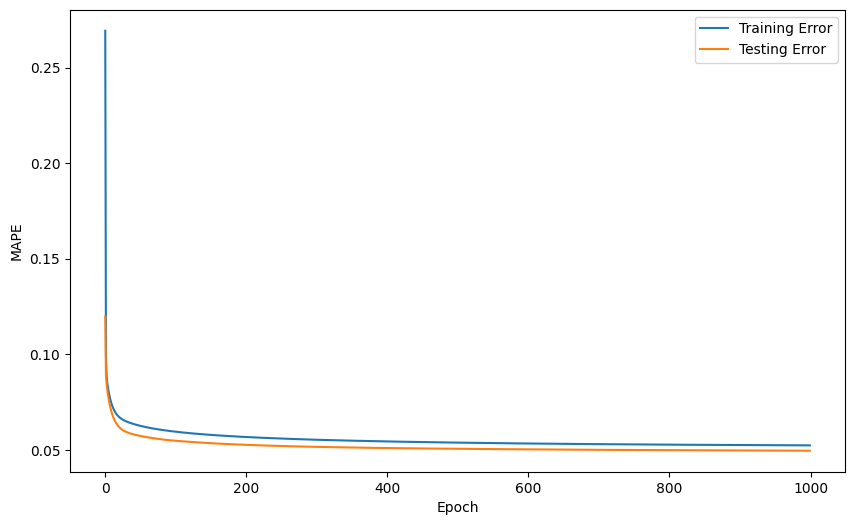

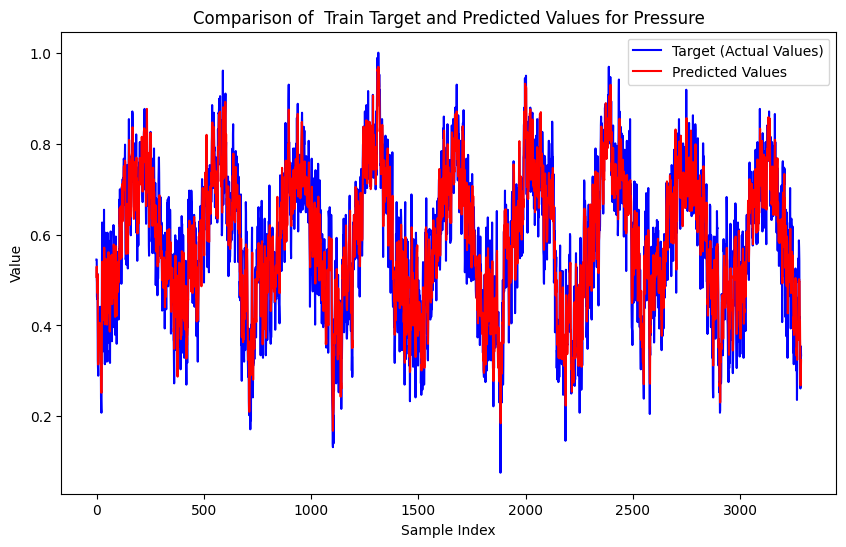

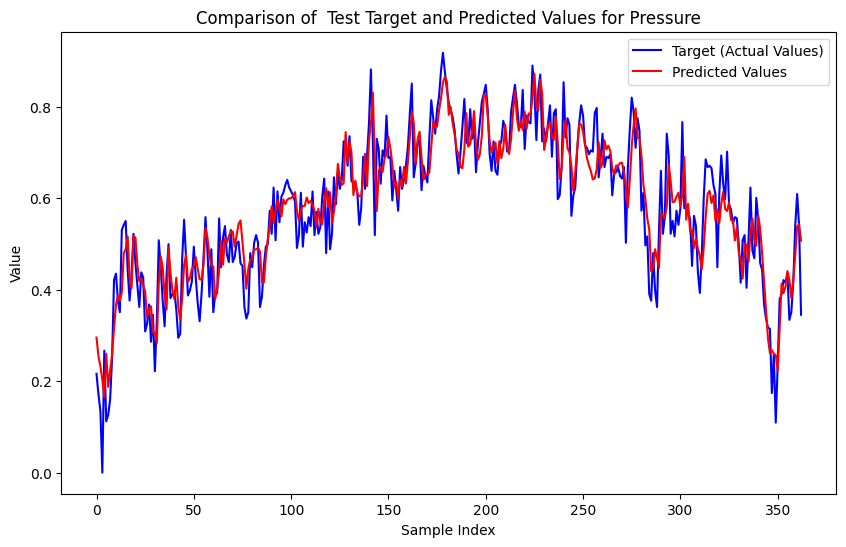

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,22]
Y_test_W = Y_test[:,22]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.00001
threshold = 0.001
epochs = 1000
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue

        lambda_reg = 0.01
        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i] + 2 * lambda_reg * W
        W -= learning_rate * gradient
        #gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        #W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr, label='Training Error')
plt.plot(errors_te, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values for Pressure')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values for Pressure')
plt.legend()
plt.show()


In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.05654619314370389
MEAN MAP of Test: 0.05255804381156499


Optional section (BASEL city)

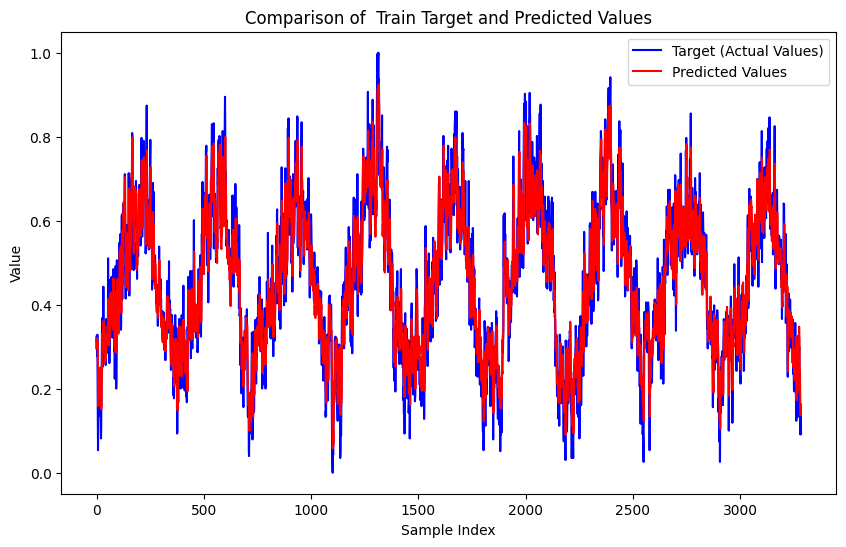

In [ ]:
Y_train_W = Y_train[:,31]
Y_test_W = Y_test[:,31]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values')
plt.legend()
plt.show()




1.3-Prediction Max Temperature

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


Training Progress:   0%|          | 2/1000 [00:00<02:24,  6.90it/s]

Epoch 1/1000 - MAP Train: 0.2263 | MAP Test: 0.1311
Epoch 2/1000 - MAP Train: 0.1138 | MAP Test: 0.1068


Training Progress:   0%|          | 4/1000 [00:00<01:35, 10.42it/s]

Epoch 3/1000 - MAP Train: 0.1044 | MAP Test: 0.0996
Epoch 4/1000 - MAP Train: 0.0982 | MAP Test: 0.0939
Epoch 5/1000 - MAP Train: 0.0927 | MAP Test: 0.0890


Training Progress:   1%|          | 8/1000 [00:00<01:38, 10.10it/s]

Epoch 6/1000 - MAP Train: 0.0879 | MAP Test: 0.0846
Epoch 7/1000 - MAP Train: 0.0836 | MAP Test: 0.0808
Epoch 8/1000 - MAP Train: 0.0800 | MAP Test: 0.0775


Training Progress:   1%|          | 10/1000 [00:01<01:28, 11.20it/s]

Epoch 9/1000 - MAP Train: 0.0769 | MAP Test: 0.0747
Epoch 10/1000 - MAP Train: 0.0743 | MAP Test: 0.0723
Epoch 11/1000 - MAP Train: 0.0721 | MAP Test: 0.0702


Training Progress:   1%|          | 12/1000 [00:01<01:22, 11.91it/s]

Epoch 12/1000 - MAP Train: 0.0702 | MAP Test: 0.0684
Epoch 13/1000 - MAP Train: 0.0686 | MAP Test: 0.0669


Training Progress:   1%|▏         | 14/1000 [00:01<01:32, 10.64it/s]

Epoch 14/1000 - MAP Train: 0.0672 | MAP Test: 0.0656
Epoch 15/1000 - MAP Train: 0.0661 | MAP Test: 0.0645


Training Progress:   2%|▏         | 18/1000 [00:01<01:36, 10.19it/s]

Epoch 16/1000 - MAP Train: 0.0651 | MAP Test: 0.0637
Epoch 17/1000 - MAP Train: 0.0643 | MAP Test: 0.0630
Epoch 18/1000 - MAP Train: 0.0636 | MAP Test: 0.0624


Training Progress:   2%|▏         | 20/1000 [00:02<01:35, 10.25it/s]

Epoch 19/1000 - MAP Train: 0.0630 | MAP Test: 0.0618
Epoch 20/1000 - MAP Train: 0.0625 | MAP Test: 0.0614
Epoch 21/1000 - MAP Train: 0.0620 | MAP Test: 0.0611


Training Progress:   2%|▏         | 22/1000 [00:02<01:38,  9.89it/s]

Epoch 22/1000 - MAP Train: 0.0617 | MAP Test: 0.0608
Epoch 23/1000 - MAP Train: 0.0613 | MAP Test: 0.0606


Training Progress:   2%|▎         | 25/1000 [00:02<01:43,  9.45it/s]

Epoch 24/1000 - MAP Train: 0.0610 | MAP Test: 0.0604
Epoch 25/1000 - MAP Train: 0.0608 | MAP Test: 0.0603


Training Progress:   3%|▎         | 27/1000 [00:02<01:53,  8.58it/s]

Epoch 26/1000 - MAP Train: 0.0606 | MAP Test: 0.0601
Epoch 27/1000 - MAP Train: 0.0604 | MAP Test: 0.0600


Training Progress:   3%|▎         | 29/1000 [00:03<01:55,  8.43it/s]

Epoch 28/1000 - MAP Train: 0.0602 | MAP Test: 0.0598
Epoch 29/1000 - MAP Train: 0.0600 | MAP Test: 0.0597


Training Progress:   3%|▎         | 31/1000 [00:03<01:49,  8.83it/s]

Epoch 30/1000 - MAP Train: 0.0599 | MAP Test: 0.0596
Epoch 31/1000 - MAP Train: 0.0598 | MAP Test: 0.0595


Training Progress:   3%|▎         | 34/1000 [00:03<01:37,  9.92it/s]

Epoch 32/1000 - MAP Train: 0.0597 | MAP Test: 0.0594
Epoch 33/1000 - MAP Train: 0.0596 | MAP Test: 0.0593
Epoch 34/1000 - MAP Train: 0.0595 | MAP Test: 0.0593


Training Progress:   4%|▎         | 36/1000 [00:03<01:54,  8.41it/s]

Epoch 35/1000 - MAP Train: 0.0594 | MAP Test: 0.0592
Epoch 36/1000 - MAP Train: 0.0593 | MAP Test: 0.0591


Training Progress:   4%|▍         | 38/1000 [00:04<02:33,  6.25it/s]

Epoch 37/1000 - MAP Train: 0.0592 | MAP Test: 0.0590
Epoch 38/1000 - MAP Train: 0.0591 | MAP Test: 0.0590


Training Progress:   4%|▍         | 40/1000 [00:04<02:24,  6.64it/s]

Epoch 39/1000 - MAP Train: 0.0591 | MAP Test: 0.0589
Epoch 40/1000 - MAP Train: 0.0590 | MAP Test: 0.0588


Training Progress:   4%|▍         | 42/1000 [00:04<02:04,  7.71it/s]

Epoch 41/1000 - MAP Train: 0.0589 | MAP Test: 0.0588
Epoch 42/1000 - MAP Train: 0.0589 | MAP Test: 0.0587


Training Progress:   4%|▍         | 45/1000 [00:05<01:39,  9.63it/s]

Epoch 43/1000 - MAP Train: 0.0588 | MAP Test: 0.0587
Epoch 44/1000 - MAP Train: 0.0587 | MAP Test: 0.0586
Epoch 45/1000 - MAP Train: 0.0587 | MAP Test: 0.0585
Epoch 46/1000 - MAP Train: 0.0586 | MAP Test: 0.0585


Training Progress:   5%|▍         | 49/1000 [00:05<01:13, 12.90it/s]

Epoch 47/1000 - MAP Train: 0.0586 | MAP Test: 0.0584
Epoch 48/1000 - MAP Train: 0.0585 | MAP Test: 0.0584
Epoch 49/1000 - MAP Train: 0.0584 | MAP Test: 0.0583
Epoch 50/1000 - MAP Train: 0.0584 | MAP Test: 0.0582


Training Progress:   5%|▌         | 53/1000 [00:05<01:15, 12.61it/s]

Epoch 51/1000 - MAP Train: 0.0583 | MAP Test: 0.0582
Epoch 52/1000 - MAP Train: 0.0583 | MAP Test: 0.0581
Epoch 53/1000 - MAP Train: 0.0582 | MAP Test: 0.0581


Training Progress:   6%|▌         | 55/1000 [00:05<01:14, 12.65it/s]

Epoch 54/1000 - MAP Train: 0.0582 | MAP Test: 0.0580
Epoch 55/1000 - MAP Train: 0.0581 | MAP Test: 0.0579
Epoch 56/1000 - MAP Train: 0.0581 | MAP Test: 0.0579


Training Progress:   6%|▌         | 60/1000 [00:06<01:06, 14.21it/s]

Epoch 57/1000 - MAP Train: 0.0580 | MAP Test: 0.0578
Epoch 58/1000 - MAP Train: 0.0580 | MAP Test: 0.0578
Epoch 59/1000 - MAP Train: 0.0579 | MAP Test: 0.0577
Epoch 60/1000 - MAP Train: 0.0579 | MAP Test: 0.0577


Training Progress:   6%|▌         | 62/1000 [00:06<01:02, 14.89it/s]

Epoch 61/1000 - MAP Train: 0.0579 | MAP Test: 0.0576
Epoch 62/1000 - MAP Train: 0.0578 | MAP Test: 0.0576
Epoch 63/1000 - MAP Train: 0.0578 | MAP Test: 0.0575
Epoch 64/1000 - MAP Train: 0.0577 | MAP Test: 0.0575


Training Progress:   7%|▋         | 67/1000 [00:06<00:57, 16.16it/s]

Epoch 65/1000 - MAP Train: 0.0577 | MAP Test: 0.0574
Epoch 66/1000 - MAP Train: 0.0577 | MAP Test: 0.0574
Epoch 67/1000 - MAP Train: 0.0576 | MAP Test: 0.0573
Epoch 68/1000 - MAP Train: 0.0576 | MAP Test: 0.0573


Training Progress:   7%|▋         | 71/1000 [00:06<00:55, 16.81it/s]

Epoch 69/1000 - MAP Train: 0.0575 | MAP Test: 0.0572
Epoch 70/1000 - MAP Train: 0.0575 | MAP Test: 0.0572
Epoch 71/1000 - MAP Train: 0.0575 | MAP Test: 0.0571
Epoch 72/1000 - MAP Train: 0.0574 | MAP Test: 0.0571


Training Progress:   7%|▋         | 73/1000 [00:07<01:04, 14.45it/s]

Epoch 73/1000 - MAP Train: 0.0574 | MAP Test: 0.0570
Epoch 74/1000 - MAP Train: 0.0574 | MAP Test: 0.0570


Training Progress:   8%|▊         | 77/1000 [00:07<01:29, 10.33it/s]

Epoch 75/1000 - MAP Train: 0.0573 | MAP Test: 0.0569
Epoch 76/1000 - MAP Train: 0.0573 | MAP Test: 0.0569
Epoch 77/1000 - MAP Train: 0.0572 | MAP Test: 0.0568
Epoch 78/1000 - MAP Train: 0.0572 | MAP Test: 0.0568


Training Progress:   8%|▊         | 82/1000 [00:07<01:07, 13.64it/s]

Epoch 79/1000 - MAP Train: 0.0572 | MAP Test: 0.0568
Epoch 80/1000 - MAP Train: 0.0571 | MAP Test: 0.0567
Epoch 81/1000 - MAP Train: 0.0571 | MAP Test: 0.0567
Epoch 82/1000 - MAP Train: 0.0571 | MAP Test: 0.0566


Training Progress:   8%|▊         | 85/1000 [00:07<00:56, 16.34it/s]

Epoch 83/1000 - MAP Train: 0.0571 | MAP Test: 0.0566
Epoch 84/1000 - MAP Train: 0.0570 | MAP Test: 0.0565
Epoch 85/1000 - MAP Train: 0.0570 | MAP Test: 0.0565
Epoch 86/1000 - MAP Train: 0.0570 | MAP Test: 0.0565
Epoch 87/1000 - MAP Train: 0.0569 | MAP Test: 0.0564


Training Progress:   9%|▉         | 88/1000 [00:08<01:01, 14.90it/s]

Epoch 88/1000 - MAP Train: 0.0569 | MAP Test: 0.0564
Epoch 89/1000 - MAP Train: 0.0569 | MAP Test: 0.0563


Training Progress:   9%|▉         | 92/1000 [00:08<01:08, 13.34it/s]

Epoch 90/1000 - MAP Train: 0.0568 | MAP Test: 0.0563
Epoch 91/1000 - MAP Train: 0.0568 | MAP Test: 0.0563
Epoch 92/1000 - MAP Train: 0.0568 | MAP Test: 0.0562
Epoch 93/1000 - MAP Train: 0.0568 | MAP Test: 0.0562


Training Progress:  10%|▉         | 96/1000 [00:08<01:00, 15.06it/s]

Epoch 94/1000 - MAP Train: 0.0567 | MAP Test: 0.0562
Epoch 95/1000 - MAP Train: 0.0567 | MAP Test: 0.0561
Epoch 96/1000 - MAP Train: 0.0567 | MAP Test: 0.0561
Epoch 97/1000 - MAP Train: 0.0566 | MAP Test: 0.0561


Training Progress:  10%|█         | 101/1000 [00:09<01:13, 12.30it/s]

Epoch 98/1000 - MAP Train: 0.0566 | MAP Test: 0.0560
Epoch 99/1000 - MAP Train: 0.0566 | MAP Test: 0.0560
Epoch 100/1000 - MAP Train: 0.0566 | MAP Test: 0.0559
Epoch 101/1000 - MAP Train: 0.0565 | MAP Test: 0.0559
Epoch 102/1000 - MAP Train: 0.0565 | MAP Test: 0.0559


Training Progress:  11%|█         | 106/1000 [00:09<00:55, 16.05it/s]

Epoch 103/1000 - MAP Train: 0.0565 | MAP Test: 0.0558
Epoch 104/1000 - MAP Train: 0.0565 | MAP Test: 0.0558
Epoch 105/1000 - MAP Train: 0.0564 | MAP Test: 0.0558
Epoch 106/1000 - MAP Train: 0.0564 | MAP Test: 0.0557
Epoch 107/1000 - MAP Train: 0.0564 | MAP Test: 0.0557


Training Progress:  11%|█         | 112/1000 [00:09<00:46, 19.13it/s]

Epoch 108/1000 - MAP Train: 0.0564 | MAP Test: 0.0557
Epoch 109/1000 - MAP Train: 0.0564 | MAP Test: 0.0556
Epoch 110/1000 - MAP Train: 0.0563 | MAP Test: 0.0556
Epoch 111/1000 - MAP Train: 0.0563 | MAP Test: 0.0556
Epoch 112/1000 - MAP Train: 0.0563 | MAP Test: 0.0556


Training Progress:  12%|█▏        | 115/1000 [00:09<00:45, 19.54it/s]

Epoch 113/1000 - MAP Train: 0.0563 | MAP Test: 0.0555
Epoch 114/1000 - MAP Train: 0.0562 | MAP Test: 0.0555
Epoch 115/1000 - MAP Train: 0.0562 | MAP Test: 0.0555
Epoch 116/1000 - MAP Train: 0.0562 | MAP Test: 0.0554
Epoch 117/1000 - MAP Train: 0.0562 | MAP Test: 0.0554


Training Progress:  12%|█▏        | 121/1000 [00:10<00:45, 19.23it/s]

Epoch 118/1000 - MAP Train: 0.0562 | MAP Test: 0.0554
Epoch 119/1000 - MAP Train: 0.0561 | MAP Test: 0.0554
Epoch 120/1000 - MAP Train: 0.0561 | MAP Test: 0.0553
Epoch 121/1000 - MAP Train: 0.0561 | MAP Test: 0.0553
Epoch 122/1000 - MAP Train: 0.0561 | MAP Test: 0.0553


Training Progress:  12%|█▎        | 125/1000 [00:10<00:46, 18.83it/s]

Epoch 123/1000 - MAP Train: 0.0561 | MAP Test: 0.0553
Epoch 124/1000 - MAP Train: 0.0560 | MAP Test: 0.0552
Epoch 125/1000 - MAP Train: 0.0560 | MAP Test: 0.0552
Epoch 126/1000 - MAP Train: 0.0560 | MAP Test: 0.0552


Training Progress:  13%|█▎        | 129/1000 [00:10<00:48, 18.07it/s]

Epoch 127/1000 - MAP Train: 0.0560 | MAP Test: 0.0552
Epoch 128/1000 - MAP Train: 0.0560 | MAP Test: 0.0551
Epoch 129/1000 - MAP Train: 0.0559 | MAP Test: 0.0551
Epoch 130/1000 - MAP Train: 0.0559 | MAP Test: 0.0551


Training Progress:  13%|█▎        | 131/1000 [00:10<00:51, 16.84it/s]

Epoch 131/1000 - MAP Train: 0.0559 | MAP Test: 0.0551
Epoch 132/1000 - MAP Train: 0.0559 | MAP Test: 0.0550


Training Progress:  14%|█▎        | 136/1000 [00:11<00:52, 16.58it/s]

Epoch 133/1000 - MAP Train: 0.0559 | MAP Test: 0.0550
Epoch 134/1000 - MAP Train: 0.0558 | MAP Test: 0.0550
Epoch 135/1000 - MAP Train: 0.0558 | MAP Test: 0.0550
Epoch 136/1000 - MAP Train: 0.0558 | MAP Test: 0.0549
Epoch 137/1000 - MAP Train: 0.0558 | MAP Test: 0.0549


Training Progress:  14%|█▍        | 141/1000 [00:11<00:48, 17.71it/s]

Epoch 138/1000 - MAP Train: 0.0558 | MAP Test: 0.0549
Epoch 139/1000 - MAP Train: 0.0558 | MAP Test: 0.0549
Epoch 140/1000 - MAP Train: 0.0557 | MAP Test: 0.0549
Epoch 141/1000 - MAP Train: 0.0557 | MAP Test: 0.0548


Training Progress:  14%|█▍        | 145/1000 [00:11<00:52, 16.41it/s]

Epoch 142/1000 - MAP Train: 0.0557 | MAP Test: 0.0548
Epoch 143/1000 - MAP Train: 0.0557 | MAP Test: 0.0548
Epoch 144/1000 - MAP Train: 0.0557 | MAP Test: 0.0548
Epoch 145/1000 - MAP Train: 0.0557 | MAP Test: 0.0548


Training Progress:  15%|█▍        | 147/1000 [00:11<00:55, 15.47it/s]

Epoch 146/1000 - MAP Train: 0.0556 | MAP Test: 0.0547
Epoch 147/1000 - MAP Train: 0.0556 | MAP Test: 0.0547
Epoch 148/1000 - MAP Train: 0.0556 | MAP Test: 0.0547


Training Progress:  15%|█▍        | 149/1000 [00:12<00:58, 14.57it/s]

Epoch 149/1000 - MAP Train: 0.0556 | MAP Test: 0.0547
Epoch 150/1000 - MAP Train: 0.0556 | MAP Test: 0.0547


Training Progress:  15%|█▌        | 151/1000 [00:12<01:12, 11.66it/s]

Epoch 151/1000 - MAP Train: 0.0556 | MAP Test: 0.0546
Epoch 152/1000 - MAP Train: 0.0555 | MAP Test: 0.0546


Training Progress:  15%|█▌        | 153/1000 [00:12<01:22, 10.23it/s]

Epoch 153/1000 - MAP Train: 0.0555 | MAP Test: 0.0546
Epoch 154/1000 - MAP Train: 0.0555 | MAP Test: 0.0546


Epoch 155/1000 - MAP Train: 0.0555 | MAP Test: 0.0546


Training Progress:  16%|█▌        | 156/1000 [00:13<01:59,  7.05it/s]

Epoch 156/1000 - MAP Train: 0.0555 | MAP Test: 0.0546


Training Progress:  16%|█▌        | 157/1000 [00:13<02:25,  5.80it/s]

Epoch 157/1000 - MAP Train: 0.0555 | MAP Test: 0.0545


Training Progress:  16%|█▌        | 159/1000 [00:13<02:16,  6.18it/s]

Epoch 158/1000 - MAP Train: 0.0555 | MAP Test: 0.0545
Epoch 159/1000 - MAP Train: 0.0554 | MAP Test: 0.0545
Epoch 160/1000 - MAP Train: 0.0554 | MAP Test: 0.0545


Training Progress:  16%|█▋        | 163/1000 [00:13<01:24,  9.86it/s]

Epoch 161/1000 - MAP Train: 0.0554 | MAP Test: 0.0545
Epoch 162/1000 - MAP Train: 0.0554 | MAP Test: 0.0545
Epoch 163/1000 - MAP Train: 0.0554 | MAP Test: 0.0544
Epoch 164/1000 - MAP Train: 0.0554 | MAP Test: 0.0544


Training Progress:  17%|█▋        | 167/1000 [00:14<01:14, 11.24it/s]

Epoch 165/1000 - MAP Train: 0.0554 | MAP Test: 0.0544
Epoch 166/1000 - MAP Train: 0.0553 | MAP Test: 0.0544
Epoch 167/1000 - MAP Train: 0.0553 | MAP Test: 0.0544


Training Progress:  17%|█▋        | 169/1000 [00:14<01:12, 11.53it/s]

Epoch 168/1000 - MAP Train: 0.0553 | MAP Test: 0.0544
Epoch 169/1000 - MAP Train: 0.0553 | MAP Test: 0.0543
Epoch 170/1000 - MAP Train: 0.0553 | MAP Test: 0.0543


Training Progress:  17%|█▋        | 173/1000 [00:14<01:05, 12.60it/s]

Epoch 171/1000 - MAP Train: 0.0553 | MAP Test: 0.0543
Epoch 172/1000 - MAP Train: 0.0553 | MAP Test: 0.0543
Epoch 173/1000 - MAP Train: 0.0552 | MAP Test: 0.0543


Training Progress:  18%|█▊        | 175/1000 [00:14<01:12, 11.34it/s]

Epoch 174/1000 - MAP Train: 0.0552 | MAP Test: 0.0543
Epoch 175/1000 - MAP Train: 0.0552 | MAP Test: 0.0542


Training Progress:  18%|█▊        | 177/1000 [00:15<01:23,  9.87it/s]

Epoch 176/1000 - MAP Train: 0.0552 | MAP Test: 0.0542
Epoch 177/1000 - MAP Train: 0.0552 | MAP Test: 0.0542


Training Progress:  18%|█▊        | 179/1000 [00:15<01:33,  8.76it/s]

Epoch 178/1000 - MAP Train: 0.0552 | MAP Test: 0.0542
Epoch 179/1000 - MAP Train: 0.0552 | MAP Test: 0.0542


Training Progress:  18%|█▊        | 181/1000 [00:15<01:25,  9.53it/s]

Epoch 180/1000 - MAP Train: 0.0552 | MAP Test: 0.0542
Epoch 181/1000 - MAP Train: 0.0551 | MAP Test: 0.0541


Training Progress:  18%|█▊        | 181/1000 [00:15<01:25,  9.53it/s]

Epoch 182/1000 - MAP Train: 0.0551 | MAP Test: 0.0541


Training Progress:  18%|█▊        | 183/1000 [00:16<02:18,  5.89it/s]

Epoch 183/1000 - MAP Train: 0.0551 | MAP Test: 0.0541


Training Progress:  18%|█▊        | 185/1000 [00:16<02:27,  5.52it/s]

Epoch 184/1000 - MAP Train: 0.0551 | MAP Test: 0.0541
Epoch 185/1000 - MAP Train: 0.0551 | MAP Test: 0.0541


Training Progress:  19%|█▊        | 187/1000 [00:16<01:52,  7.25it/s]

Epoch 186/1000 - MAP Train: 0.0551 | MAP Test: 0.0541
Epoch 187/1000 - MAP Train: 0.0551 | MAP Test: 0.0541
Epoch 188/1000 - MAP Train: 0.0551 | MAP Test: 0.0540


Epoch 189/1000 - MAP Train: 0.0550 | MAP Test: 0.0540
Epoch 190/1000 - MAP Train: 0.0550 | MAP Test: 0.0540


Training Progress:  19%|█▉        | 192/1000 [00:17<01:29,  8.98it/s]

Epoch 191/1000 - MAP Train: 0.0550 | MAP Test: 0.0540
Epoch 192/1000 - MAP Train: 0.0550 | MAP Test: 0.0540
Epoch 193/1000 - MAP Train: 0.0550 | MAP Test: 0.0540


Training Progress:  20%|█▉        | 195/1000 [00:17<01:29,  8.96it/s]

Epoch 194/1000 - MAP Train: 0.0550 | MAP Test: 0.0540
Epoch 195/1000 - MAP Train: 0.0550 | MAP Test: 0.0539


Training Progress:  20%|█▉        | 197/1000 [00:17<01:37,  8.27it/s]

Epoch 196/1000 - MAP Train: 0.0550 | MAP Test: 0.0539
Epoch 197/1000 - MAP Train: 0.0550 | MAP Test: 0.0539


Training Progress:  20%|██        | 200/1000 [00:18<01:26,  9.22it/s]

Epoch 198/1000 - MAP Train: 0.0549 | MAP Test: 0.0539
Epoch 199/1000 - MAP Train: 0.0549 | MAP Test: 0.0539
Epoch 200/1000 - MAP Train: 0.0549 | MAP Test: 0.0539


Training Progress:  20%|██        | 202/1000 [00:18<01:21,  9.79it/s]

Epoch 201/1000 - MAP Train: 0.0549 | MAP Test: 0.0539
Epoch 202/1000 - MAP Train: 0.0549 | MAP Test: 0.0539


Training Progress:  20%|██        | 204/1000 [00:18<01:32,  8.57it/s]

Epoch 203/1000 - MAP Train: 0.0549 | MAP Test: 0.0538
Epoch 204/1000 - MAP Train: 0.0549 | MAP Test: 0.0538


Training Progress:  21%|██        | 206/1000 [00:18<01:40,  7.90it/s]

Epoch 205/1000 - MAP Train: 0.0549 | MAP Test: 0.0538
Epoch 206/1000 - MAP Train: 0.0549 | MAP Test: 0.0538


Training Progress:  21%|██        | 208/1000 [00:19<01:55,  6.84it/s]

Epoch 207/1000 - MAP Train: 0.0548 | MAP Test: 0.0538
Epoch 208/1000 - MAP Train: 0.0548 | MAP Test: 0.0538


Epoch 209/1000 - MAP Train: 0.0548 | MAP Test: 0.0538
Epoch 210/1000 - MAP Train: 0.0548 | MAP Test: 0.0538
Epoch 211/1000 - MAP Train: 0.0548 | MAP Test: 0.0537


Training Progress:  21%|██▏       | 214/1000 [00:19<01:11, 10.97it/s]

Epoch 212/1000 - MAP Train: 0.0548 | MAP Test: 0.0537
Epoch 213/1000 - MAP Train: 0.0548 | MAP Test: 0.0537
Epoch 214/1000 - MAP Train: 0.0548 | MAP Test: 0.0537


Training Progress:  22%|██▏       | 216/1000 [00:19<01:05, 11.89it/s]

Epoch 215/1000 - MAP Train: 0.0548 | MAP Test: 0.0537
Epoch 216/1000 - MAP Train: 0.0548 | MAP Test: 0.0537
Epoch 217/1000 - MAP Train: 0.0547 | MAP Test: 0.0537


Training Progress:  22%|██▏       | 220/1000 [00:20<01:00, 12.92it/s]

Epoch 218/1000 - MAP Train: 0.0547 | MAP Test: 0.0537
Epoch 219/1000 - MAP Train: 0.0547 | MAP Test: 0.0536
Epoch 220/1000 - MAP Train: 0.0547 | MAP Test: 0.0536


Training Progress:  22%|██▏       | 222/1000 [00:20<01:03, 12.22it/s]

Epoch 221/1000 - MAP Train: 0.0547 | MAP Test: 0.0536
Epoch 222/1000 - MAP Train: 0.0547 | MAP Test: 0.0536
Epoch 223/1000 - MAP Train: 0.0547 | MAP Test: 0.0536


Training Progress:  23%|██▎       | 226/1000 [00:20<00:56, 13.65it/s]

Epoch 224/1000 - MAP Train: 0.0547 | MAP Test: 0.0536
Epoch 225/1000 - MAP Train: 0.0547 | MAP Test: 0.0536
Epoch 226/1000 - MAP Train: 0.0547 | MAP Test: 0.0536


Training Progress:  23%|██▎       | 228/1000 [00:20<01:10, 10.93it/s]

Epoch 227/1000 - MAP Train: 0.0546 | MAP Test: 0.0536
Epoch 228/1000 - MAP Train: 0.0546 | MAP Test: 0.0536


Training Progress:  23%|██▎       | 230/1000 [00:21<01:22,  9.36it/s]

Epoch 229/1000 - MAP Train: 0.0546 | MAP Test: 0.0535
Epoch 230/1000 - MAP Train: 0.0546 | MAP Test: 0.0535


Training Progress:  23%|██▎       | 232/1000 [00:21<01:14, 10.26it/s]

Epoch 231/1000 - MAP Train: 0.0546 | MAP Test: 0.0535
Epoch 232/1000 - MAP Train: 0.0546 | MAP Test: 0.0535
Epoch 233/1000 - MAP Train: 0.0546 | MAP Test: 0.0535
Epoch 234/1000 - MAP Train: 0.0546 | MAP Test: 0.0535


Epoch 235/1000 - MAP Train: 0.0546 | MAP Test: 0.0535
Epoch 236/1000 - MAP Train: 0.0546 | MAP Test: 0.0535
Epoch 237/1000 - MAP Train: 0.0546 | MAP Test: 0.0535
Epoch 238/1000 - MAP Train: 0.0545 | MAP Test: 0.0535


Training Progress:  24%|██▍       | 240/1000 [00:21<00:56, 13.41it/s]

Epoch 239/1000 - MAP Train: 0.0545 | MAP Test: 0.0534
Epoch 240/1000 - MAP Train: 0.0545 | MAP Test: 0.0534
Epoch 241/1000 - MAP Train: 0.0545 | MAP Test: 0.0534
Epoch 242/1000 - MAP Train: 0.0545 | MAP Test: 0.0534


Training Progress:  24%|██▍       | 244/1000 [00:22<00:55, 13.61it/s]

Epoch 243/1000 - MAP Train: 0.0545 | MAP Test: 0.0534
Epoch 244/1000 - MAP Train: 0.0545 | MAP Test: 0.0534
Epoch 245/1000 - MAP Train: 0.0545 | MAP Test: 0.0534


Training Progress:  25%|██▍       | 248/1000 [00:22<00:55, 13.66it/s]

Epoch 246/1000 - MAP Train: 0.0545 | MAP Test: 0.0534
Epoch 247/1000 - MAP Train: 0.0545 | MAP Test: 0.0534
Epoch 248/1000 - MAP Train: 0.0545 | MAP Test: 0.0534


Training Progress:  25%|██▌       | 250/1000 [00:22<00:55, 13.51it/s]

Epoch 249/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 250/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 251/1000 - MAP Train: 0.0544 | MAP Test: 0.0533


Training Progress:  25%|██▌       | 254/1000 [00:22<00:56, 13.12it/s]

Epoch 252/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 253/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 254/1000 - MAP Train: 0.0544 | MAP Test: 0.0533


Training Progress:  26%|██▌       | 256/1000 [00:23<01:17,  9.61it/s]

Epoch 255/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 256/1000 - MAP Train: 0.0544 | MAP Test: 0.0533


Training Progress:  26%|██▌       | 258/1000 [00:23<01:23,  8.91it/s]

Epoch 257/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 258/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 259/1000 - MAP Train: 0.0544 | MAP Test: 0.0533


Training Progress:  26%|██▌       | 262/1000 [00:23<01:04, 11.36it/s]

Epoch 260/1000 - MAP Train: 0.0544 | MAP Test: 0.0533
Epoch 261/1000 - MAP Train: 0.0544 | MAP Test: 0.0532
Epoch 262/1000 - MAP Train: 0.0543 | MAP Test: 0.0532
Epoch 263/1000 - MAP Train: 0.0543 | MAP Test: 0.0532


Training Progress:  27%|██▋       | 266/1000 [00:24<00:57, 12.68it/s]

Epoch 264/1000 - MAP Train: 0.0543 | MAP Test: 0.0532
Epoch 265/1000 - MAP Train: 0.0543 | MAP Test: 0.0532
Epoch 266/1000 - MAP Train: 0.0543 | MAP Test: 0.0532
Epoch 267/1000 - MAP Train: 0.0543 | MAP Test: 0.0532


Training Progress:  27%|██▋       | 270/1000 [00:24<00:53, 13.59it/s]

Epoch 268/1000 - MAP Train: 0.0543 | MAP Test: 0.0532
Epoch 269/1000 - MAP Train: 0.0543 | MAP Test: 0.0532
Epoch 270/1000 - MAP Train: 0.0543 | MAP Test: 0.0532


Training Progress:  27%|██▋       | 272/1000 [00:24<00:55, 13.20it/s]

Epoch 271/1000 - MAP Train: 0.0543 | MAP Test: 0.0532
Epoch 272/1000 - MAP Train: 0.0543 | MAP Test: 0.0531
Epoch 273/1000 - MAP Train: 0.0543 | MAP Test: 0.0531


Training Progress:  28%|██▊       | 276/1000 [00:24<00:53, 13.41it/s]

Epoch 274/1000 - MAP Train: 0.0543 | MAP Test: 0.0531
Epoch 275/1000 - MAP Train: 0.0542 | MAP Test: 0.0531
Epoch 276/1000 - MAP Train: 0.0542 | MAP Test: 0.0531


Training Progress:  28%|██▊       | 278/1000 [00:25<00:58, 12.26it/s]

Epoch 277/1000 - MAP Train: 0.0542 | MAP Test: 0.0531
Epoch 278/1000 - MAP Train: 0.0542 | MAP Test: 0.0531
Epoch 279/1000 - MAP Train: 0.0542 | MAP Test: 0.0531


Training Progress:  28%|██▊       | 280/1000 [00:25<01:11, 10.12it/s]

Epoch 280/1000 - MAP Train: 0.0542 | MAP Test: 0.0531
Epoch 281/1000 - MAP Train: 0.0542 | MAP Test: 0.0531


Training Progress:  28%|██▊       | 284/1000 [00:25<01:12,  9.92it/s]

Epoch 282/1000 - MAP Train: 0.0542 | MAP Test: 0.0531
Epoch 283/1000 - MAP Train: 0.0542 | MAP Test: 0.0531
Epoch 284/1000 - MAP Train: 0.0542 | MAP Test: 0.0531


Training Progress:  29%|██▊       | 286/1000 [00:25<01:09, 10.33it/s]

Epoch 285/1000 - MAP Train: 0.0542 | MAP Test: 0.0530
Epoch 286/1000 - MAP Train: 0.0542 | MAP Test: 0.0530
Epoch 287/1000 - MAP Train: 0.0542 | MAP Test: 0.0530


Epoch 288/1000 - MAP Train: 0.0542 | MAP Test: 0.0530
Epoch 289/1000 - MAP Train: 0.0541 | MAP Test: 0.0530
Epoch 290/1000 - MAP Train: 0.0541 | MAP Test: 0.0530


Training Progress:  29%|██▉       | 292/1000 [00:26<00:57, 12.41it/s]

Epoch 291/1000 - MAP Train: 0.0541 | MAP Test: 0.0530
Epoch 292/1000 - MAP Train: 0.0541 | MAP Test: 0.0530
Epoch 293/1000 - MAP Train: 0.0541 | MAP Test: 0.0530


Training Progress:  30%|██▉       | 296/1000 [00:26<00:54, 13.01it/s]

Epoch 294/1000 - MAP Train: 0.0541 | MAP Test: 0.0530
Epoch 295/1000 - MAP Train: 0.0541 | MAP Test: 0.0530
Epoch 296/1000 - MAP Train: 0.0541 | MAP Test: 0.0530


Training Progress:  30%|██▉       | 298/1000 [00:26<00:54, 12.87it/s]

Epoch 297/1000 - MAP Train: 0.0541 | MAP Test: 0.0530
Epoch 298/1000 - MAP Train: 0.0541 | MAP Test: 0.0530
Epoch 299/1000 - MAP Train: 0.0541 | MAP Test: 0.0530


Training Progress:  30%|███       | 302/1000 [00:27<00:55, 12.55it/s]

Epoch 300/1000 - MAP Train: 0.0541 | MAP Test: 0.0529
Epoch 301/1000 - MAP Train: 0.0541 | MAP Test: 0.0529
Epoch 302/1000 - MAP Train: 0.0541 | MAP Test: 0.0529


Training Progress:  30%|███       | 304/1000 [00:27<00:56, 12.34it/s]

Epoch 303/1000 - MAP Train: 0.0541 | MAP Test: 0.0529
Epoch 304/1000 - MAP Train: 0.0540 | MAP Test: 0.0529


Training Progress:  31%|███       | 306/1000 [00:27<01:06, 10.48it/s]

Epoch 305/1000 - MAP Train: 0.0540 | MAP Test: 0.0529
Epoch 306/1000 - MAP Train: 0.0540 | MAP Test: 0.0529
Epoch 307/1000 - MAP Train: 0.0540 | MAP Test: 0.0529


Training Progress:  31%|███       | 308/1000 [00:27<01:02, 11.10it/s]

Epoch 308/1000 - MAP Train: 0.0540 | MAP Test: 0.0529
Epoch 309/1000 - MAP Train: 0.0540 | MAP Test: 0.0529


Training Progress:  31%|███       | 310/1000 [00:28<01:09,  9.91it/s]

Epoch 310/1000 - MAP Train: 0.0540 | MAP Test: 0.0529
Epoch 311/1000 - MAP Train: 0.0540 | MAP Test: 0.0529


Training Progress:  31%|███▏      | 314/1000 [00:28<01:10,  9.78it/s]

Epoch 312/1000 - MAP Train: 0.0540 | MAP Test: 0.0529
Epoch 313/1000 - MAP Train: 0.0540 | MAP Test: 0.0529
Epoch 314/1000 - MAP Train: 0.0540 | MAP Test: 0.0529
Epoch 315/1000 - MAP Train: 0.0540 | MAP Test: 0.0528


Training Progress:  32%|███▏      | 318/1000 [00:28<00:59, 11.53it/s]

Epoch 316/1000 - MAP Train: 0.0540 | MAP Test: 0.0528
Epoch 317/1000 - MAP Train: 0.0540 | MAP Test: 0.0528
Epoch 318/1000 - MAP Train: 0.0540 | MAP Test: 0.0528


Training Progress:  32%|███▏      | 320/1000 [00:28<01:07, 10.09it/s]

Epoch 319/1000 - MAP Train: 0.0540 | MAP Test: 0.0528
Epoch 320/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  32%|███▏      | 320/1000 [00:29<01:07, 10.09it/s]

Epoch 321/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  32%|███▏      | 322/1000 [00:29<01:32,  7.31it/s]

Epoch 322/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  32%|███▏      | 323/1000 [00:29<01:43,  6.54it/s]

Epoch 323/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  32%|███▏      | 324/1000 [00:29<01:57,  5.74it/s]

Epoch 324/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  32%|███▎      | 325/1000 [00:30<02:49,  3.97it/s]

Epoch 325/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  33%|███▎      | 326/1000 [00:30<02:51,  3.93it/s]

Epoch 326/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  33%|███▎      | 327/1000 [00:30<02:48,  4.00it/s]

Epoch 327/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  33%|███▎      | 328/1000 [00:31<02:50,  3.94it/s]

Epoch 328/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  33%|███▎      | 329/1000 [00:31<03:01,  3.70it/s]

Epoch 329/1000 - MAP Train: 0.0539 | MAP Test: 0.0528


Training Progress:  33%|███▎      | 331/1000 [00:31<02:42,  4.13it/s]

Epoch 330/1000 - MAP Train: 0.0539 | MAP Test: 0.0528
Epoch 331/1000 - MAP Train: 0.0539 | MAP Test: 0.0527


Training Progress:  33%|███▎      | 333/1000 [00:32<02:26,  4.56it/s]

Epoch 332/1000 - MAP Train: 0.0539 | MAP Test: 0.0527
Epoch 333/1000 - MAP Train: 0.0539 | MAP Test: 0.0527


Training Progress:  34%|███▎      | 335/1000 [00:32<02:10,  5.12it/s]

Epoch 334/1000 - MAP Train: 0.0539 | MAP Test: 0.0527
Epoch 335/1000 - MAP Train: 0.0539 | MAP Test: 0.0527


Training Progress:  34%|███▎      | 337/1000 [00:33<02:07,  5.21it/s]

Epoch 336/1000 - MAP Train: 0.0539 | MAP Test: 0.0527
Epoch 337/1000 - MAP Train: 0.0538 | MAP Test: 0.0527


Training Progress:  34%|███▍      | 339/1000 [00:33<01:40,  6.59it/s]

Epoch 338/1000 - MAP Train: 0.0538 | MAP Test: 0.0527
Epoch 339/1000 - MAP Train: 0.0538 | MAP Test: 0.0527
Epoch 340/1000 - MAP Train: 0.0538 | MAP Test: 0.0527


Training Progress:  34%|███▍      | 343/1000 [00:33<01:09,  9.49it/s]

Epoch 341/1000 - MAP Train: 0.0538 | MAP Test: 0.0527
Epoch 342/1000 - MAP Train: 0.0538 | MAP Test: 0.0527
Epoch 343/1000 - MAP Train: 0.0538 | MAP Test: 0.0527


Training Progress:  34%|███▍      | 345/1000 [00:33<01:01, 10.59it/s]

Epoch 344/1000 - MAP Train: 0.0538 | MAP Test: 0.0527
Epoch 345/1000 - MAP Train: 0.0538 | MAP Test: 0.0527
Epoch 346/1000 - MAP Train: 0.0538 | MAP Test: 0.0527


Training Progress:  35%|███▍      | 347/1000 [00:33<00:59, 10.98it/s]

Epoch 347/1000 - MAP Train: 0.0538 | MAP Test: 0.0527


Training Progress:  35%|███▍      | 347/1000 [00:34<00:59, 10.98it/s]

Epoch 348/1000 - MAP Train: 0.0538 | MAP Test: 0.0527


Training Progress:  35%|███▍      | 349/1000 [00:34<01:37,  6.69it/s]

Epoch 349/1000 - MAP Train: 0.0538 | MAP Test: 0.0526


Training Progress:  35%|███▌      | 351/1000 [00:34<01:48,  6.00it/s]

Epoch 350/1000 - MAP Train: 0.0538 | MAP Test: 0.0526
Epoch 351/1000 - MAP Train: 0.0538 | MAP Test: 0.0526


Training Progress:  35%|███▌      | 353/1000 [00:35<01:34,  6.86it/s]

Epoch 352/1000 - MAP Train: 0.0538 | MAP Test: 0.0526
Epoch 353/1000 - MAP Train: 0.0538 | MAP Test: 0.0526


Training Progress:  36%|███▌      | 355/1000 [00:35<01:32,  6.98it/s]

Epoch 354/1000 - MAP Train: 0.0538 | MAP Test: 0.0526
Epoch 355/1000 - MAP Train: 0.0538 | MAP Test: 0.0526


Epoch 356/1000 - MAP Train: 0.0537 | MAP Test: 0.0526
Epoch 357/1000 - MAP Train: 0.0537 | MAP Test: 0.0526


Epoch 358/1000 - MAP Train: 0.0537 | MAP Test: 0.0526
Epoch 359/1000 - MAP Train: 0.0537 | MAP Test: 0.0526


Training Progress:  36%|███▌      | 361/1000 [00:36<01:12,  8.83it/s]

Epoch 360/1000 - MAP Train: 0.0537 | MAP Test: 0.0526
Epoch 361/1000 - MAP Train: 0.0537 | MAP Test: 0.0526


Training Progress:  36%|███▋      | 363/1000 [00:36<01:17,  8.19it/s]

Epoch 362/1000 - MAP Train: 0.0537 | MAP Test: 0.0526
Epoch 363/1000 - MAP Train: 0.0537 | MAP Test: 0.0526


Training Progress:  36%|███▋      | 365/1000 [00:36<01:25,  7.40it/s]

Epoch 364/1000 - MAP Train: 0.0537 | MAP Test: 0.0526
Epoch 365/1000 - MAP Train: 0.0537 | MAP Test: 0.0526


Training Progress:  37%|███▋      | 367/1000 [00:36<01:22,  7.68it/s]

Epoch 366/1000 - MAP Train: 0.0537 | MAP Test: 0.0526
Epoch 367/1000 - MAP Train: 0.0537 | MAP Test: 0.0526


Training Progress:  37%|███▋      | 369/1000 [00:37<01:24,  7.48it/s]

Epoch 368/1000 - MAP Train: 0.0537 | MAP Test: 0.0526
Epoch 369/1000 - MAP Train: 0.0537 | MAP Test: 0.0525


Training Progress:  37%|███▋      | 370/1000 [00:37<01:52,  5.60it/s]

Epoch 370/1000 - MAP Train: 0.0537 | MAP Test: 0.0525


Epoch 371/1000 - MAP Train: 0.0537 | MAP Test: 0.0525


Training Progress:  37%|███▋      | 373/1000 [00:38<01:57,  5.35it/s]

Epoch 372/1000 - MAP Train: 0.0537 | MAP Test: 0.0525
Epoch 373/1000 - MAP Train: 0.0537 | MAP Test: 0.0525


Training Progress:  38%|███▊      | 375/1000 [00:38<01:38,  6.37it/s]

Epoch 374/1000 - MAP Train: 0.0537 | MAP Test: 0.0525
Epoch 375/1000 - MAP Train: 0.0537 | MAP Test: 0.0525


Training Progress:  38%|███▊      | 376/1000 [00:38<01:34,  6.62it/s]

Epoch 376/1000 - MAP Train: 0.0537 | MAP Test: 0.0525
Epoch 377/1000 - MAP Train: 0.0536 | MAP Test: 0.0525


Training Progress:  38%|███▊      | 379/1000 [00:38<01:22,  7.49it/s]

Epoch 378/1000 - MAP Train: 0.0536 | MAP Test: 0.0525
Epoch 379/1000 - MAP Train: 0.0536 | MAP Test: 0.0525


Training Progress:  38%|███▊      | 381/1000 [00:39<01:20,  7.71it/s]

Epoch 380/1000 - MAP Train: 0.0536 | MAP Test: 0.0525
Epoch 381/1000 - MAP Train: 0.0536 | MAP Test: 0.0525


Training Progress:  38%|███▊      | 383/1000 [00:39<01:17,  7.96it/s]

Epoch 382/1000 - MAP Train: 0.0536 | MAP Test: 0.0525
Epoch 383/1000 - MAP Train: 0.0536 | MAP Test: 0.0525


Training Progress:  38%|███▊      | 385/1000 [00:39<01:24,  7.25it/s]

Epoch 384/1000 - MAP Train: 0.0536 | MAP Test: 0.0525
Epoch 385/1000 - MAP Train: 0.0536 | MAP Test: 0.0525


Training Progress:  39%|███▉      | 388/1000 [00:39<01:06,  9.22it/s]

Epoch 386/1000 - MAP Train: 0.0536 | MAP Test: 0.0525
Epoch 387/1000 - MAP Train: 0.0536 | MAP Test: 0.0525
Epoch 388/1000 - MAP Train: 0.0536 | MAP Test: 0.0525


Training Progress:  39%|███▉      | 390/1000 [00:40<01:17,  7.91it/s]

Epoch 389/1000 - MAP Train: 0.0536 | MAP Test: 0.0525
Epoch 390/1000 - MAP Train: 0.0536 | MAP Test: 0.0524


Training Progress:  39%|███▉      | 392/1000 [00:40<01:34,  6.42it/s]

Epoch 391/1000 - MAP Train: 0.0536 | MAP Test: 0.0524
Epoch 392/1000 - MAP Train: 0.0536 | MAP Test: 0.0524


Training Progress:  39%|███▉      | 394/1000 [00:40<01:37,  6.22it/s]

Epoch 393/1000 - MAP Train: 0.0536 | MAP Test: 0.0524
Epoch 394/1000 - MAP Train: 0.0536 | MAP Test: 0.0524


Training Progress:  40%|███▉      | 396/1000 [00:41<01:35,  6.30it/s]

Epoch 395/1000 - MAP Train: 0.0536 | MAP Test: 0.0524
Epoch 396/1000 - MAP Train: 0.0536 | MAP Test: 0.0524


Training Progress:  40%|███▉      | 399/1000 [00:41<01:10,  8.51it/s]

Epoch 397/1000 - MAP Train: 0.0536 | MAP Test: 0.0524
Epoch 398/1000 - MAP Train: 0.0536 | MAP Test: 0.0524
Epoch 399/1000 - MAP Train: 0.0536 | MAP Test: 0.0524


Training Progress:  40%|████      | 401/1000 [00:41<01:01,  9.71it/s]

Epoch 400/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 401/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 402/1000 - MAP Train: 0.0535 | MAP Test: 0.0524


Training Progress:  40%|████      | 405/1000 [00:41<00:51, 11.63it/s]

Epoch 403/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 404/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 405/1000 - MAP Train: 0.0535 | MAP Test: 0.0524


Training Progress:  41%|████      | 409/1000 [00:42<00:44, 13.23it/s]

Epoch 406/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 407/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 408/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 409/1000 - MAP Train: 0.0535 | MAP Test: 0.0524


Training Progress:  41%|████      | 411/1000 [00:42<00:46, 12.70it/s]

Epoch 410/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 411/1000 - MAP Train: 0.0535 | MAP Test: 0.0524
Epoch 412/1000 - MAP Train: 0.0535 | MAP Test: 0.0524


Training Progress:  42%|████▏     | 415/1000 [00:42<00:43, 13.43it/s]

Epoch 413/1000 - MAP Train: 0.0535 | MAP Test: 0.0523
Epoch 414/1000 - MAP Train: 0.0535 | MAP Test: 0.0523
Epoch 415/1000 - MAP Train: 0.0535 | MAP Test: 0.0523


Training Progress:  42%|████▏     | 417/1000 [00:42<00:44, 13.16it/s]

Epoch 416/1000 - MAP Train: 0.0535 | MAP Test: 0.0523
Epoch 417/1000 - MAP Train: 0.0535 | MAP Test: 0.0523


Training Progress:  42%|████▏     | 419/1000 [00:43<00:55, 10.40it/s]

Epoch 418/1000 - MAP Train: 0.0535 | MAP Test: 0.0523
Epoch 419/1000 - MAP Train: 0.0535 | MAP Test: 0.0523


Training Progress:  42%|████▏     | 421/1000 [00:43<01:13,  7.86it/s]

Epoch 420/1000 - MAP Train: 0.0535 | MAP Test: 0.0523
Epoch 421/1000 - MAP Train: 0.0535 | MAP Test: 0.0523


Training Progress:  42%|████▏     | 423/1000 [00:43<01:18,  7.35it/s]

Epoch 422/1000 - MAP Train: 0.0535 | MAP Test: 0.0523
Epoch 423/1000 - MAP Train: 0.0535 | MAP Test: 0.0523


Training Progress:  42%|████▎     | 425/1000 [00:44<01:15,  7.66it/s]

Epoch 424/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 425/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  43%|████▎     | 427/1000 [00:44<01:11,  8.03it/s]

Epoch 426/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 427/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  43%|████▎     | 429/1000 [00:44<01:14,  7.62it/s]

Epoch 428/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 429/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  43%|████▎     | 431/1000 [00:44<01:12,  7.84it/s]

Epoch 430/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 431/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  43%|████▎     | 433/1000 [00:45<01:13,  7.68it/s]

Epoch 432/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 433/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  44%|████▎     | 435/1000 [00:45<01:10,  7.99it/s]

Epoch 434/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 435/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  44%|████▎     | 437/1000 [00:45<01:12,  7.80it/s]

Epoch 436/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 437/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  44%|████▍     | 439/1000 [00:45<01:13,  7.68it/s]

Epoch 438/1000 - MAP Train: 0.0534 | MAP Test: 0.0523
Epoch 439/1000 - MAP Train: 0.0534 | MAP Test: 0.0523


Training Progress:  44%|████▍     | 441/1000 [00:46<01:12,  7.69it/s]

Epoch 440/1000 - MAP Train: 0.0534 | MAP Test: 0.0522
Epoch 441/1000 - MAP Train: 0.0534 | MAP Test: 0.0522


Training Progress:  44%|████▍     | 444/1000 [00:46<01:00,  9.17it/s]

Epoch 442/1000 - MAP Train: 0.0534 | MAP Test: 0.0522
Epoch 443/1000 - MAP Train: 0.0534 | MAP Test: 0.0522
Epoch 444/1000 - MAP Train: 0.0534 | MAP Test: 0.0522


Epoch 445/1000 - MAP Train: 0.0534 | MAP Test: 0.0522
Epoch 446/1000 - MAP Train: 0.0534 | MAP Test: 0.0522


Training Progress:  45%|████▍     | 448/1000 [00:46<00:59,  9.23it/s]

Epoch 447/1000 - MAP Train: 0.0534 | MAP Test: 0.0522
Epoch 448/1000 - MAP Train: 0.0534 | MAP Test: 0.0522


Training Progress:  45%|████▌     | 450/1000 [00:47<01:03,  8.61it/s]

Epoch 449/1000 - MAP Train: 0.0534 | MAP Test: 0.0522
Epoch 450/1000 - MAP Train: 0.0534 | MAP Test: 0.0522


Training Progress:  45%|████▌     | 452/1000 [00:47<01:04,  8.54it/s]

Epoch 451/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 452/1000 - MAP Train: 0.0533 | MAP Test: 0.0522


Training Progress:  46%|████▌     | 455/1000 [00:47<00:53, 10.22it/s]

Epoch 453/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 454/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 455/1000 - MAP Train: 0.0533 | MAP Test: 0.0522


Training Progress:  46%|████▌     | 457/1000 [00:47<00:46, 11.56it/s]

Epoch 456/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 457/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 458/1000 - MAP Train: 0.0533 | MAP Test: 0.0522


Training Progress:  46%|████▌     | 459/1000 [00:48<00:55,  9.74it/s]

Epoch 459/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 460/1000 - MAP Train: 0.0533 | MAP Test: 0.0522


Training Progress:  46%|████▋     | 463/1000 [00:48<00:53, 10.13it/s]

Epoch 461/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 462/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 463/1000 - MAP Train: 0.0533 | MAP Test: 0.0522


Training Progress:  47%|████▋     | 467/1000 [00:48<00:42, 12.45it/s]

Epoch 464/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 465/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 466/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 467/1000 - MAP Train: 0.0533 | MAP Test: 0.0522


Training Progress:  47%|████▋     | 469/1000 [00:48<00:41, 12.90it/s]

Epoch 468/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 469/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 470/1000 - MAP Train: 0.0533 | MAP Test: 0.0522


Training Progress:  47%|████▋     | 473/1000 [00:49<00:40, 13.13it/s]

Epoch 471/1000 - MAP Train: 0.0533 | MAP Test: 0.0522
Epoch 472/1000 - MAP Train: 0.0533 | MAP Test: 0.0521
Epoch 473/1000 - MAP Train: 0.0533 | MAP Test: 0.0521


Training Progress:  48%|████▊     | 475/1000 [00:49<00:39, 13.32it/s]

Epoch 474/1000 - MAP Train: 0.0533 | MAP Test: 0.0521
Epoch 475/1000 - MAP Train: 0.0533 | MAP Test: 0.0521
Epoch 476/1000 - MAP Train: 0.0533 | MAP Test: 0.0521


Training Progress:  48%|████▊     | 479/1000 [00:49<00:42, 12.38it/s]

Epoch 477/1000 - MAP Train: 0.0533 | MAP Test: 0.0521
Epoch 478/1000 - MAP Train: 0.0533 | MAP Test: 0.0521
Epoch 479/1000 - MAP Train: 0.0533 | MAP Test: 0.0521


Training Progress:  48%|████▊     | 481/1000 [00:49<00:49, 10.47it/s]

Epoch 480/1000 - MAP Train: 0.0533 | MAP Test: 0.0521
Epoch 481/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  48%|████▊     | 483/1000 [00:50<00:54,  9.45it/s]

Epoch 482/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 483/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 484/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  49%|████▊     | 487/1000 [00:50<00:46, 11.02it/s]

Epoch 485/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 486/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 487/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  49%|████▉     | 489/1000 [00:50<00:49, 10.27it/s]

Epoch 488/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 489/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  49%|████▉     | 491/1000 [00:50<00:53,  9.45it/s]

Epoch 490/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 491/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  49%|████▉     | 492/1000 [00:50<00:56,  8.94it/s]

Epoch 492/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  49%|████▉     | 493/1000 [00:51<01:10,  7.16it/s]

Epoch 493/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  50%|████▉     | 495/1000 [00:51<01:22,  6.11it/s]

Epoch 494/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 495/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  50%|████▉     | 497/1000 [00:51<01:23,  6.00it/s]

Epoch 496/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 497/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  50%|████▉     | 499/1000 [00:52<01:20,  6.22it/s]

Epoch 498/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 499/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  50%|█████     | 501/1000 [00:52<01:14,  6.70it/s]

Epoch 500/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 501/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  50%|█████     | 503/1000 [00:52<01:09,  7.18it/s]

Epoch 502/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 503/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  50%|█████     | 505/1000 [00:53<01:06,  7.40it/s]

Epoch 504/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 505/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  51%|█████     | 507/1000 [00:53<01:07,  7.35it/s]

Epoch 506/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 507/1000 - MAP Train: 0.0532 | MAP Test: 0.0521


Training Progress:  51%|█████     | 509/1000 [00:53<01:06,  7.42it/s]

Epoch 508/1000 - MAP Train: 0.0532 | MAP Test: 0.0521
Epoch 509/1000 - MAP Train: 0.0532 | MAP Test: 0.0520


Training Progress:  51%|█████     | 511/1000 [00:53<01:11,  6.80it/s]

Epoch 510/1000 - MAP Train: 0.0532 | MAP Test: 0.0520
Epoch 511/1000 - MAP Train: 0.0532 | MAP Test: 0.0520


Training Progress:  51%|█████     | 512/1000 [00:54<01:24,  5.78it/s]

Epoch 512/1000 - MAP Train: 0.0532 | MAP Test: 0.0520


Training Progress:  51%|█████▏    | 514/1000 [00:54<01:41,  4.81it/s]

Epoch 513/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 514/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  52%|█████▏    | 516/1000 [00:55<01:31,  5.30it/s]

Epoch 515/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 516/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Epoch 517/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 518/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 519/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  52%|█████▏    | 522/1000 [00:55<00:45, 10.62it/s]

Epoch 520/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 521/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 522/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  52%|█████▏    | 524/1000 [00:55<00:46, 10.28it/s]

Epoch 523/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 524/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 525/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  53%|█████▎    | 528/1000 [00:55<00:39, 11.93it/s]

Epoch 526/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 527/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 528/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  53%|█████▎    | 530/1000 [00:56<00:38, 12.08it/s]

Epoch 529/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 530/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 531/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  53%|█████▎    | 534/1000 [00:56<00:37, 12.45it/s]

Epoch 532/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 533/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 534/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  54%|█████▎    | 536/1000 [00:56<00:36, 12.81it/s]

Epoch 535/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 536/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 537/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  54%|█████▍    | 538/1000 [00:56<00:36, 12.62it/s]

Epoch 538/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 539/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  54%|█████▍    | 540/1000 [00:57<00:43, 10.60it/s]

Epoch 540/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 541/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  54%|█████▍    | 543/1000 [00:57<00:53,  8.55it/s]

Epoch 542/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 543/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  54%|█████▍    | 544/1000 [00:57<01:00,  7.49it/s]

Epoch 544/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  55%|█████▍    | 546/1000 [00:57<01:07,  6.71it/s]

Epoch 545/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 546/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  55%|█████▍    | 548/1000 [00:58<01:08,  6.55it/s]

Epoch 547/1000 - MAP Train: 0.0531 | MAP Test: 0.0520
Epoch 548/1000 - MAP Train: 0.0531 | MAP Test: 0.0520


Training Progress:  55%|█████▌    | 550/1000 [00:58<01:06,  6.75it/s]

Epoch 549/1000 - MAP Train: 0.0530 | MAP Test: 0.0520
Epoch 550/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  55%|█████▌    | 551/1000 [00:58<01:07,  6.67it/s]

Epoch 551/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 552/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  55%|█████▌    | 553/1000 [00:59<01:16,  5.85it/s]

Epoch 553/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  55%|█████▌    | 554/1000 [00:59<01:21,  5.44it/s]

Epoch 554/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  56%|█████▌    | 555/1000 [00:59<01:25,  5.19it/s]

Epoch 555/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  56%|█████▌    | 556/1000 [00:59<01:32,  4.80it/s]

Epoch 556/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  56%|█████▌    | 557/1000 [01:00<01:44,  4.25it/s]

Epoch 557/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  56%|█████▌    | 558/1000 [01:00<01:52,  3.93it/s]

Epoch 558/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  56%|█████▌    | 560/1000 [01:00<01:35,  4.60it/s]

Epoch 559/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 560/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  56%|█████▌    | 562/1000 [01:01<01:22,  5.31it/s]

Epoch 561/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 562/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  56%|█████▋    | 564/1000 [01:01<01:14,  5.84it/s]

Epoch 563/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 564/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  57%|█████▋    | 566/1000 [01:01<01:14,  5.81it/s]

Epoch 565/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 566/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  57%|█████▋    | 568/1000 [01:02<01:13,  5.88it/s]

Epoch 567/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 568/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  57%|█████▋    | 570/1000 [01:02<01:08,  6.32it/s]

Epoch 569/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 570/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  57%|█████▋    | 571/1000 [01:02<01:14,  5.78it/s]

Epoch 571/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  57%|█████▋    | 572/1000 [01:02<01:21,  5.24it/s]

Epoch 572/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  57%|█████▋    | 573/1000 [01:03<01:30,  4.73it/s]

Epoch 573/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  57%|█████▋    | 574/1000 [01:03<01:36,  4.42it/s]

Epoch 574/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  58%|█████▊    | 577/1000 [01:03<01:08,  6.19it/s]

Epoch 575/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 576/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 577/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  58%|█████▊    | 579/1000 [01:03<00:55,  7.60it/s]

Epoch 578/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 579/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  58%|█████▊    | 580/1000 [01:04<00:59,  7.04it/s]

Epoch 580/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  58%|█████▊    | 581/1000 [01:04<01:12,  5.76it/s]

Epoch 581/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  58%|█████▊    | 582/1000 [01:04<01:28,  4.74it/s]

Epoch 582/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  58%|█████▊    | 584/1000 [01:05<01:28,  4.73it/s]

Epoch 583/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 584/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  59%|█████▊    | 586/1000 [01:05<01:15,  5.51it/s]

Epoch 585/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 586/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  59%|█████▉    | 588/1000 [01:05<01:15,  5.45it/s]

Epoch 587/1000 - MAP Train: 0.0530 | MAP Test: 0.0519
Epoch 588/1000 - MAP Train: 0.0530 | MAP Test: 0.0519


Training Progress:  59%|█████▉    | 589/1000 [01:06<01:29,  4.60it/s]

Epoch 589/1000 - MAP Train: 0.0529 | MAP Test: 0.0519


Training Progress:  59%|█████▉    | 590/1000 [01:06<01:34,  4.36it/s]

Epoch 590/1000 - MAP Train: 0.0529 | MAP Test: 0.0519


Training Progress:  59%|█████▉    | 592/1000 [01:06<01:24,  4.84it/s]

Epoch 591/1000 - MAP Train: 0.0529 | MAP Test: 0.0519
Epoch 592/1000 - MAP Train: 0.0529 | MAP Test: 0.0519


Training Progress:  59%|█████▉    | 594/1000 [01:07<01:12,  5.62it/s]

Epoch 593/1000 - MAP Train: 0.0529 | MAP Test: 0.0519
Epoch 594/1000 - MAP Train: 0.0529 | MAP Test: 0.0519


Training Progress:  60%|█████▉    | 596/1000 [01:07<01:06,  6.06it/s]

Epoch 595/1000 - MAP Train: 0.0529 | MAP Test: 0.0519
Epoch 596/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  60%|█████▉    | 598/1000 [01:07<01:05,  6.10it/s]

Epoch 597/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 598/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Epoch 599/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  60%|██████    | 600/1000 [01:08<01:12,  5.51it/s]

Epoch 600/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  60%|██████    | 601/1000 [01:08<01:21,  4.87it/s]

Epoch 601/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  60%|██████    | 603/1000 [01:08<01:20,  4.92it/s]

Epoch 602/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 603/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  60%|██████    | 605/1000 [01:08<00:58,  6.77it/s]

Epoch 604/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 605/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 606/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  61%|██████    | 608/1000 [01:09<00:51,  7.69it/s]

Epoch 607/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 608/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 609/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  61%|██████    | 612/1000 [01:09<00:38, 10.09it/s]

Epoch 610/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 611/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 612/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  61%|██████▏   | 614/1000 [01:09<00:36, 10.71it/s]

Epoch 613/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 614/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 615/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  62%|██████▏   | 618/1000 [01:10<00:34, 10.93it/s]

Epoch 616/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 617/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 618/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  62%|██████▏   | 620/1000 [01:10<00:33, 11.28it/s]

Epoch 619/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 620/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 621/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  62%|██████▏   | 624/1000 [01:10<00:32, 11.52it/s]

Epoch 622/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 623/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 624/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  63%|██████▎   | 626/1000 [01:10<00:30, 12.11it/s]

Epoch 625/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 626/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 627/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  63%|██████▎   | 628/1000 [01:11<00:30, 12.36it/s]

Epoch 628/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 629/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  63%|██████▎   | 630/1000 [01:11<00:39,  9.38it/s]

Epoch 630/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 631/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  63%|██████▎   | 634/1000 [01:11<00:35, 10.29it/s]

Epoch 632/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 633/1000 - MAP Train: 0.0529 | MAP Test: 0.0518
Epoch 634/1000 - MAP Train: 0.0529 | MAP Test: 0.0518


Training Progress:  64%|██████▎   | 636/1000 [01:11<00:31, 11.45it/s]

Epoch 635/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 636/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 637/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  64%|██████▍   | 640/1000 [01:12<00:29, 12.01it/s]

Epoch 638/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 639/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 640/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  64%|██████▍   | 642/1000 [01:12<00:33, 10.83it/s]

Epoch 641/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 642/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  64%|██████▍   | 644/1000 [01:12<00:39,  9.12it/s]

Epoch 643/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 644/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  65%|██████▍   | 646/1000 [01:12<00:40,  8.72it/s]

Epoch 645/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 646/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  65%|██████▍   | 648/1000 [01:13<00:41,  8.56it/s]

Epoch 647/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 648/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  65%|██████▌   | 650/1000 [01:13<00:42,  8.24it/s]

Epoch 649/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 650/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  65%|██████▌   | 652/1000 [01:13<00:43,  7.94it/s]

Epoch 651/1000 - MAP Train: 0.0528 | MAP Test: 0.0518
Epoch 652/1000 - MAP Train: 0.0528 | MAP Test: 0.0518


Training Progress:  65%|██████▌   | 654/1000 [01:13<00:51,  6.77it/s]

Epoch 653/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 654/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  66%|██████▌   | 656/1000 [01:14<00:53,  6.48it/s]

Epoch 655/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 656/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  66%|██████▌   | 658/1000 [01:14<00:58,  5.82it/s]

Epoch 657/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 658/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  66%|██████▌   | 660/1000 [01:14<00:48,  7.03it/s]

Epoch 659/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 660/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  66%|██████▌   | 662/1000 [01:15<00:44,  7.59it/s]

Epoch 661/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 662/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  66%|██████▋   | 664/1000 [01:15<00:44,  7.59it/s]

Epoch 663/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 664/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  67%|██████▋   | 666/1000 [01:15<00:42,  7.90it/s]

Epoch 665/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 666/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  67%|██████▋   | 668/1000 [01:15<00:40,  8.27it/s]

Epoch 667/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 668/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 669/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  67%|██████▋   | 671/1000 [01:16<00:38,  8.65it/s]

Epoch 670/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 671/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  67%|██████▋   | 673/1000 [01:16<00:46,  6.96it/s]

Epoch 672/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 673/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  67%|██████▋   | 674/1000 [01:16<00:47,  6.87it/s]

Epoch 674/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 675/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  68%|██████▊   | 676/1000 [01:16<00:46,  6.97it/s]

Epoch 676/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  68%|██████▊   | 677/1000 [01:17<00:55,  5.86it/s]

Epoch 677/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  68%|██████▊   | 680/1000 [01:17<00:45,  7.01it/s]

Epoch 678/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 679/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 680/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  68%|██████▊   | 683/1000 [01:17<00:35,  8.82it/s]

Epoch 681/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 682/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 683/1000 - MAP Train: 0.0528 | MAP Test: 0.0517


Training Progress:  68%|██████▊   | 685/1000 [01:18<00:31,  9.97it/s]

Epoch 684/1000 - MAP Train: 0.0528 | MAP Test: 0.0517
Epoch 685/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 686/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  69%|██████▉   | 689/1000 [01:18<00:27, 11.14it/s]

Epoch 687/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 688/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 689/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  69%|██████▉   | 691/1000 [01:18<00:26, 11.56it/s]

Epoch 690/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 691/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 692/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  70%|██████▉   | 695/1000 [01:18<00:27, 11.17it/s]

Epoch 693/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 694/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 695/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  70%|██████▉   | 699/1000 [01:19<00:24, 12.29it/s]

Epoch 696/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 697/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 698/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 699/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  70%|███████   | 701/1000 [01:19<00:29, 10.08it/s]

Epoch 700/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 701/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  70%|███████   | 703/1000 [01:19<00:29,  9.99it/s]

Epoch 702/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 703/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  70%|███████   | 705/1000 [01:20<00:34,  8.51it/s]

Epoch 704/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 705/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  71%|███████   | 708/1000 [01:20<00:34,  8.58it/s]

Epoch 706/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 707/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 708/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  71%|███████   | 710/1000 [01:20<00:31,  9.29it/s]

Epoch 709/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 710/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 711/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  71%|███████▏  | 714/1000 [01:20<00:25, 11.25it/s]

Epoch 712/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 713/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 714/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Training Progress:  72%|███████▏  | 716/1000 [01:21<00:25, 11.06it/s]

Epoch 715/1000 - MAP Train: 0.0527 | MAP Test: 0.0517
Epoch 716/1000 - MAP Train: 0.0527 | MAP Test: 0.0517


Epoch 717/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 718/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  72%|███████▏  | 720/1000 [01:21<00:29,  9.64it/s]

Epoch 719/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 720/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 721/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  72%|███████▏  | 724/1000 [01:21<00:26, 10.42it/s]

Epoch 722/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 723/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 724/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  72%|███████▏  | 724/1000 [01:22<00:26, 10.42it/s]

Epoch 725/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  73%|███████▎  | 726/1000 [01:22<00:37,  7.37it/s]

Epoch 726/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  73%|███████▎  | 728/1000 [01:22<00:44,  6.15it/s]

Epoch 727/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 728/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  73%|███████▎  | 730/1000 [01:23<00:38,  6.96it/s]

Epoch 729/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 730/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  73%|███████▎  | 732/1000 [01:23<00:40,  6.69it/s]

Epoch 731/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 732/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  73%|███████▎  | 734/1000 [01:23<00:38,  6.88it/s]

Epoch 733/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 734/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  74%|███████▎  | 736/1000 [01:23<00:30,  8.56it/s]

Epoch 735/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 736/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 737/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  74%|███████▍  | 738/1000 [01:24<00:26,  9.74it/s]

Epoch 738/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 739/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  74%|███████▍  | 740/1000 [01:24<00:27,  9.47it/s]

Epoch 740/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 741/1000 - MAP Train: 0.0527 | MAP Test: 0.0516


Training Progress:  74%|███████▍  | 743/1000 [01:24<00:29,  8.79it/s]

Epoch 742/1000 - MAP Train: 0.0527 | MAP Test: 0.0516
Epoch 743/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  74%|███████▍  | 744/1000 [01:24<00:39,  6.43it/s]

Epoch 744/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  75%|███████▍  | 746/1000 [01:25<00:45,  5.55it/s]

Epoch 745/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 746/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  75%|███████▍  | 748/1000 [01:25<00:41,  6.01it/s]

Epoch 747/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 748/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  75%|███████▌  | 750/1000 [01:25<00:35,  6.97it/s]

Epoch 749/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 750/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  75%|███████▌  | 752/1000 [01:26<00:31,  7.91it/s]

Epoch 751/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 752/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  75%|███████▌  | 754/1000 [01:26<00:36,  6.67it/s]

Epoch 753/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 754/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  76%|███████▌  | 757/1000 [01:26<00:30,  8.03it/s]

Epoch 755/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 756/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 757/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  76%|███████▌  | 759/1000 [01:27<00:34,  7.03it/s]

Epoch 758/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 759/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  76%|███████▌  | 761/1000 [01:27<00:34,  6.93it/s]

Epoch 760/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 761/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  76%|███████▋  | 763/1000 [01:27<00:33,  7.07it/s]

Epoch 762/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 763/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  76%|███████▋  | 765/1000 [01:27<00:30,  7.75it/s]

Epoch 764/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 765/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  77%|███████▋  | 767/1000 [01:28<00:28,  8.07it/s]

Epoch 766/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 767/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  77%|███████▋  | 769/1000 [01:28<00:28,  8.06it/s]

Epoch 768/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 769/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  77%|███████▋  | 771/1000 [01:28<00:30,  7.39it/s]

Epoch 770/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 771/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  77%|███████▋  | 773/1000 [01:28<00:33,  6.70it/s]

Epoch 772/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 773/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  78%|███████▊  | 775/1000 [01:29<00:39,  5.63it/s]

Epoch 774/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 775/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  78%|███████▊  | 777/1000 [01:29<00:43,  5.15it/s]

Epoch 776/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 777/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  78%|███████▊  | 779/1000 [01:30<00:34,  6.48it/s]

Epoch 778/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 779/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  78%|███████▊  | 781/1000 [01:30<00:30,  7.09it/s]

Epoch 780/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 781/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  78%|███████▊  | 783/1000 [01:30<00:29,  7.34it/s]

Epoch 782/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 783/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  78%|███████▊  | 785/1000 [01:30<00:28,  7.67it/s]

Epoch 784/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 785/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  79%|███████▊  | 787/1000 [01:31<00:25,  8.34it/s]

Epoch 786/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 787/1000 - MAP Train: 0.0526 | MAP Test: 0.0516


Training Progress:  79%|███████▉  | 789/1000 [01:31<00:25,  8.30it/s]

Epoch 788/1000 - MAP Train: 0.0526 | MAP Test: 0.0516
Epoch 789/1000 - MAP Train: 0.0526 | MAP Test: 0.0515


Training Progress:  79%|███████▉  | 792/1000 [01:31<00:20, 10.33it/s]

Epoch 790/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 791/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 792/1000 - MAP Train: 0.0526 | MAP Test: 0.0515


Training Progress:  79%|███████▉  | 794/1000 [01:31<00:17, 11.46it/s]

Epoch 793/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 794/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 795/1000 - MAP Train: 0.0526 | MAP Test: 0.0515


Training Progress:  80%|███████▉  | 798/1000 [01:32<00:16, 12.00it/s]

Epoch 796/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 797/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 798/1000 - MAP Train: 0.0526 | MAP Test: 0.0515


Training Progress:  80%|████████  | 800/1000 [01:32<00:20,  9.68it/s]

Epoch 799/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 800/1000 - MAP Train: 0.0526 | MAP Test: 0.0515


Training Progress:  80%|████████  | 802/1000 [01:32<00:21,  9.16it/s]

Epoch 801/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 802/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 803/1000 - MAP Train: 0.0526 | MAP Test: 0.0515


Training Progress:  81%|████████  | 806/1000 [01:32<00:18, 10.42it/s]

Epoch 804/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 805/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 806/1000 - MAP Train: 0.0526 | MAP Test: 0.0515


Training Progress:  81%|████████  | 808/1000 [01:33<00:17, 11.07it/s]

Epoch 807/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 808/1000 - MAP Train: 0.0526 | MAP Test: 0.0515
Epoch 809/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  81%|████████  | 812/1000 [01:33<00:15, 11.94it/s]

Epoch 810/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 811/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 812/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  81%|████████▏ | 814/1000 [01:33<00:16, 11.25it/s]

Epoch 813/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 814/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 815/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  82%|████████▏ | 818/1000 [01:33<00:16, 11.30it/s]

Epoch 816/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 817/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 818/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  82%|████████▏ | 820/1000 [01:34<00:16, 10.79it/s]

Epoch 819/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 820/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 821/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  82%|████████▏ | 824/1000 [01:34<00:15, 11.73it/s]

Epoch 822/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 823/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 824/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Epoch 825/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 826/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  83%|████████▎ | 828/1000 [01:34<00:17, 10.00it/s]

Epoch 827/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 828/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  83%|████████▎ | 830/1000 [01:35<00:23,  7.17it/s]

Epoch 829/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 830/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  83%|████████▎ | 833/1000 [01:35<00:19,  8.49it/s]

Epoch 831/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 832/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 833/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Epoch 834/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 835/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  84%|████████▎ | 837/1000 [01:36<00:16,  9.82it/s]

Epoch 836/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 837/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 838/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  84%|████████▍ | 839/1000 [01:36<00:16,  9.96it/s]

Epoch 839/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 840/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  84%|████████▍ | 843/1000 [01:36<00:15,  9.93it/s]

Epoch 841/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 842/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 843/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  84%|████████▍ | 845/1000 [01:36<00:14, 10.66it/s]

Epoch 844/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 845/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 846/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  85%|████████▍ | 847/1000 [01:37<00:15,  9.83it/s]

Epoch 847/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 848/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  85%|████████▌ | 850/1000 [01:37<00:17,  8.82it/s]

Epoch 849/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 850/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  85%|████████▌ | 853/1000 [01:37<00:14, 10.09it/s]

Epoch 851/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 852/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 853/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  86%|████████▌ | 855/1000 [01:37<00:13, 11.11it/s]

Epoch 854/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 855/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 856/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  86%|████████▌ | 859/1000 [01:38<00:11, 12.02it/s]

Epoch 857/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 858/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 859/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  86%|████████▌ | 861/1000 [01:38<00:12, 11.29it/s]

Epoch 860/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 861/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 862/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  86%|████████▋ | 865/1000 [01:38<00:11, 11.65it/s]

Epoch 863/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 864/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 865/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  87%|████████▋ | 867/1000 [01:38<00:11, 11.99it/s]

Epoch 866/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 867/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 868/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  87%|████████▋ | 869/1000 [01:39<00:11, 11.65it/s]

Epoch 869/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 870/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  87%|████████▋ | 871/1000 [01:39<00:13,  9.69it/s]

Epoch 871/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 872/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  88%|████████▊ | 875/1000 [01:39<00:14,  8.85it/s]

Epoch 873/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 874/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 875/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  88%|████████▊ | 877/1000 [01:39<00:12,  9.94it/s]

Epoch 876/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 877/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 878/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  88%|████████▊ | 881/1000 [01:40<00:10, 10.85it/s]

Epoch 879/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 880/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 881/1000 - MAP Train: 0.0525 | MAP Test: 0.0515


Training Progress:  88%|████████▊ | 883/1000 [01:40<00:10, 11.09it/s]

Epoch 882/1000 - MAP Train: 0.0525 | MAP Test: 0.0515
Epoch 883/1000 - MAP Train: 0.0525 | MAP Test: 0.0514
Epoch 884/1000 - MAP Train: 0.0525 | MAP Test: 0.0514


Training Progress:  89%|████████▊ | 887/1000 [01:40<00:09, 11.64it/s]

Epoch 885/1000 - MAP Train: 0.0525 | MAP Test: 0.0514
Epoch 886/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 887/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  89%|████████▉ | 889/1000 [01:40<00:09, 11.74it/s]

Epoch 888/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 889/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 890/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  89%|████████▉ | 893/1000 [01:41<00:09, 11.70it/s]

Epoch 891/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 892/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 893/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  90%|████████▉ | 895/1000 [01:41<00:09, 10.78it/s]

Epoch 894/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 895/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 896/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  90%|████████▉ | 897/1000 [01:41<00:10,  9.77it/s]

Epoch 897/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  90%|████████▉ | 897/1000 [01:41<00:10,  9.77it/s]

Epoch 898/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  90%|█████████ | 900/1000 [01:42<00:15,  6.63it/s]

Epoch 899/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 900/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  90%|█████████ | 903/1000 [01:42<00:12,  7.88it/s]

Epoch 901/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 902/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 903/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  90%|█████████ | 905/1000 [01:42<00:11,  8.12it/s]

Epoch 904/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 905/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  91%|█████████ | 907/1000 [01:43<00:11,  8.41it/s]

Epoch 906/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 907/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  91%|█████████ | 909/1000 [01:43<00:10,  8.84it/s]

Epoch 908/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 909/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  91%|█████████ | 911/1000 [01:43<00:10,  8.68it/s]

Epoch 910/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 911/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  91%|█████████▏| 913/1000 [01:43<00:10,  8.47it/s]

Epoch 912/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 913/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  92%|█████████▏| 915/1000 [01:44<00:11,  7.46it/s]

Epoch 914/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 915/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  92%|█████████▏| 916/1000 [01:44<00:12,  7.00it/s]

Epoch 916/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  92%|█████████▏| 918/1000 [01:44<00:13,  6.19it/s]

Epoch 917/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 918/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  92%|█████████▏| 920/1000 [01:44<00:11,  6.84it/s]

Epoch 919/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 920/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  92%|█████████▏| 922/1000 [01:45<00:10,  7.73it/s]

Epoch 921/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 922/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  92%|█████████▏| 924/1000 [01:45<00:09,  7.78it/s]

Epoch 923/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 924/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  93%|█████████▎| 926/1000 [01:45<00:09,  7.61it/s]

Epoch 925/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 926/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  93%|█████████▎| 929/1000 [01:46<00:08,  8.42it/s]

Epoch 927/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 928/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 929/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  93%|█████████▎| 931/1000 [01:46<00:07,  9.44it/s]

Epoch 930/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 931/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 932/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  94%|█████████▎| 935/1000 [01:46<00:06, 10.80it/s]

Epoch 933/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 934/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 935/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  94%|█████████▎| 937/1000 [01:46<00:06, 10.07it/s]

Epoch 936/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 937/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  94%|█████████▍| 939/1000 [01:47<00:07,  7.96it/s]

Epoch 938/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 939/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  94%|█████████▍| 942/1000 [01:47<00:06,  9.42it/s]

Epoch 940/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 941/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 942/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  94%|█████████▍| 944/1000 [01:47<00:05, 10.48it/s]

Epoch 943/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 944/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 945/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 946/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  95%|█████████▍| 948/1000 [01:47<00:04, 11.66it/s]

Epoch 947/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 948/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 949/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  95%|█████████▌| 952/1000 [01:48<00:04, 11.95it/s]

Epoch 950/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 951/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 952/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  95%|█████████▌| 954/1000 [01:48<00:03, 11.54it/s]

Epoch 953/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 954/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 955/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  96%|█████████▌| 958/1000 [01:48<00:03, 11.60it/s]

Epoch 956/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 957/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 958/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  96%|█████████▌| 960/1000 [01:48<00:03, 10.23it/s]

Epoch 959/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 960/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  96%|█████████▌| 962/1000 [01:49<00:04,  8.49it/s]

Epoch 961/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 962/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  96%|█████████▋| 964/1000 [01:49<00:04,  8.53it/s]

Epoch 963/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 964/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  97%|█████████▋| 967/1000 [01:49<00:03, 10.58it/s]

Epoch 965/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 966/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 967/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 968/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  97%|█████████▋| 971/1000 [01:50<00:02, 14.10it/s]

Epoch 969/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 970/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 971/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 972/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  98%|█████████▊| 975/1000 [01:50<00:01, 16.06it/s]

Epoch 973/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 974/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 975/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 976/1000 - MAP Train: 0.0524 | MAP Test: 0.0514


Training Progress:  98%|█████████▊| 979/1000 [01:50<00:01, 16.11it/s]

Epoch 977/1000 - MAP Train: 0.0524 | MAP Test: 0.0514
Epoch 978/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 979/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 980/1000 - MAP Train: 0.0523 | MAP Test: 0.0514


Training Progress:  98%|█████████▊| 983/1000 [01:50<00:00, 17.29it/s]

Epoch 981/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 982/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 983/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 984/1000 - MAP Train: 0.0523 | MAP Test: 0.0514


Training Progress:  99%|█████████▊| 987/1000 [01:50<00:00, 17.03it/s]

Epoch 985/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 986/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 987/1000 - MAP Train: 0.0523 | MAP Test: 0.0514


Training Progress:  99%|█████████▉| 991/1000 [01:51<00:00, 16.80it/s]

Epoch 988/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 989/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 990/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 991/1000 - MAP Train: 0.0523 | MAP Test: 0.0514


Training Progress: 100%|█████████▉| 995/1000 [01:51<00:00, 16.33it/s]

Epoch 992/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 993/1000 - MAP Train: 0.0523 | MAP Test: 0.0514
Epoch 994/1000 - MAP Train: 0.0523 | MAP Test: 0.0513
Epoch 995/1000 - MAP Train: 0.0523 | MAP Test: 0.0513


Training Progress: 100%|█████████▉| 999/1000 [01:51<00:00, 17.44it/s]

Epoch 996/1000 - MAP Train: 0.0523 | MAP Test: 0.0513
Epoch 997/1000 - MAP Train: 0.0523 | MAP Test: 0.0513
Epoch 998/1000 - MAP Train: 0.0523 | MAP Test: 0.0513
Epoch 999/1000 - MAP Train: 0.0523 | MAP Test: 0.0513


Training Progress: 100%|██████████| 1000/1000 [01:51<00:00,  8.95it/s]


Epoch 1000/1000 - MAP Train: 0.0523 | MAP Test: 0.0513


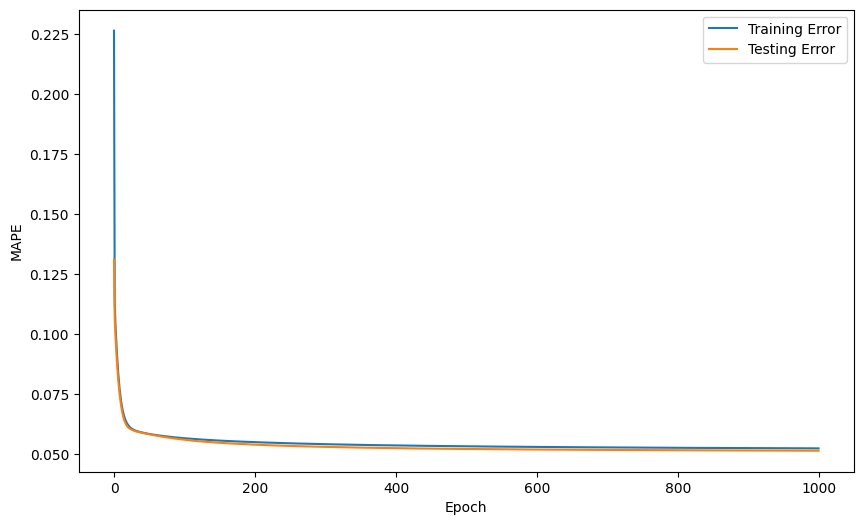

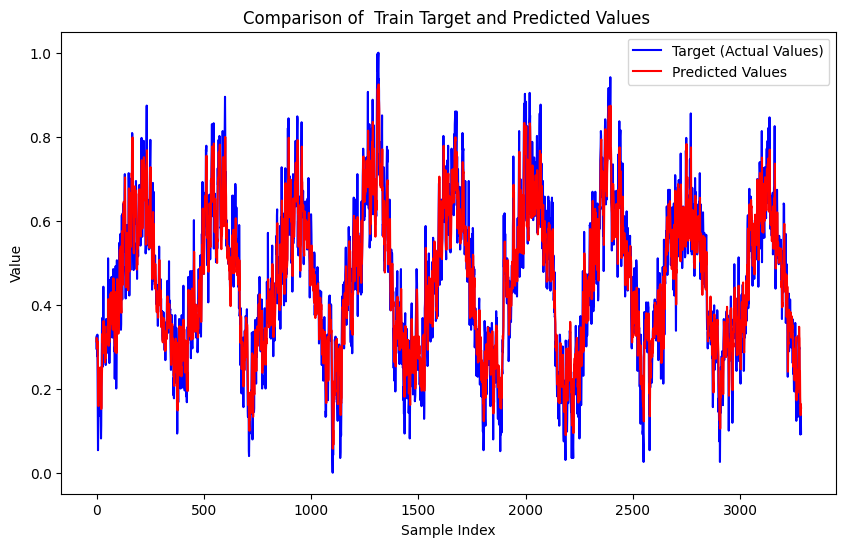

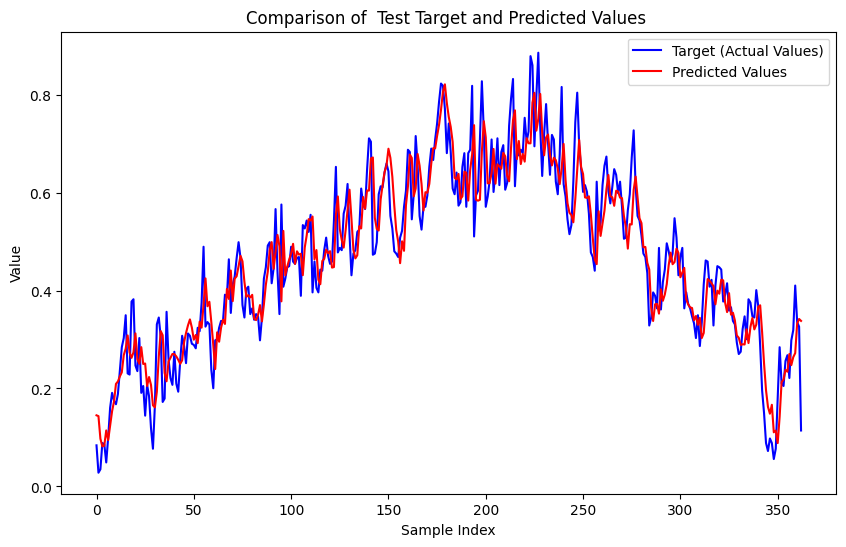

In [ ]:
import numpy as np
from tqdm import tqdm
np.random.seed(16)

Y_train_W = Y_train[:,23]
Y_test_W = Y_test[:,23]

X_train = X_train
X_test = X_test

num_features = X_train.shape[2]
window_size = X_train.shape[1]
num_train = X_train.shape[0]
num_test = X_test.shape[0]

dim = num_features*window_size

X_train_flatt = X_train.reshape(num_train, dim)
X_test_flatt = X_test.reshape(num_test, dim)


W = np.random.uniform(-0.01,0.01,(dim))

errors_train = []
errors_test = []
errors_tr = []
errors_te = []

learning_rate = 0.00001
threshold = 0.001
epochs = 1000
epsilon = 1e-8
for epoch in tqdm(range(epochs), desc="Training Progress"):
    errors_train = []
    errors_test = []

    for i in range(num_train):
        Y_out = np.dot(X_train_flatt[i], W)
        #error_train = np.mean(np.abs((Y_train_W[i] - Y_out) / Y_train_W[i] + epsilon))
        error_train = np.abs(Y_train_W[i] - Y_out)
        errors_train.append(error_train)

        if error_train < threshold:
            continue

        lambda_reg = 0.01
        gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i] + 2 * lambda_reg * W
        W -= learning_rate * gradient
        #gradient = -2 * (Y_train_W[i] - Y_out) * X_train_flatt[i]
        #W -= learning_rate * gradient



    for i in range(num_test):
        Y_out_test = np.dot(X_test_flatt[i], W)
        #error_test = np.mean(np.abs((Y_test_W[i] - Y_out_test) / Y_test_W[i] + epsilon))
        error_test = np.abs(Y_test_W[i] - Y_out_test)
        errors_test.append(error_test)

    mean_error_train = np.mean(errors_train)
    mean_error_test = np.mean(errors_test)



    errors_tr.append(mean_error_train)
    errors_te.append(mean_error_test)

    tqdm.write(f"Epoch {epoch+1}/{epochs} - MAP Train: {mean_error_train:.4f} | MAP Test: {mean_error_test:.4f}")



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors_tr, label='Training Error')
plt.plot(errors_te, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_train_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Train Target and Predicted Values ')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(np.dot(X_test_flatt, W), label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of  Test Target and Predicted Values ')
plt.legend()
plt.show()


In [ ]:
print('MEAN MAP of Train:', np.mean(errors_tr))
print('MEAN MAP of Test:', np.mean(errors_te))

MEAN MAP of Train: 0.05514541274536484
MEAN MAP of Test: 0.05399375161592157


1.3.1 Training Linear Regeression with sklearn

In [ ]:
import numpy as np

def create_time_windows(data, window_size, overlap):
    step = window_size - overlap
    X, y = [], []

    for start in range(0, len(data) - window_size, step):
        end = start + window_size
        X.append(data[start:end])
        y.append(data[end])
    return np.array(X), np.array(y)

def train_test(data):
  Train = data[:-366, :]
  Test  = data[-366:,:]
  return Train, Test

data = F_Data_norm
data_train, data_test = train_test(data)
window_size = 3
overlap = 2

X_train, Y_train = create_time_windows(data_train, window_size, overlap)
X_test,  Y_test  = create_time_windows(data_test, window_size, overlap)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error

# Data Preparation
Y_train_W = Y_train[:, 23]
Y_test_W = Y_test[:, 23]

X_train_flatt = X_train.reshape(X_train.shape[0], -1)
X_test_flatt = X_test.reshape(X_test.shape[0], -1)

# Initialize model
#model = LinearRegression()
#model = Lasso(alpha = 0.002)
model = Ridge(alpha = 0.002)



errors_train = []
errors_test = []

epochs = 10
for epoch in tqdm(range(epochs), desc="Training Progress"):

    model.fit(X_train_flatt, Y_train_W)


    Y_train_pred = model.predict(X_train_flatt)
    Y_test_pred = model.predict(X_test_flatt)


    error_train = np.mean(np.abs(Y_train_W - Y_train_pred))
    error_test = np.mean(np.abs(Y_test_W - Y_test_pred))

    errors_train.append(error_train)
    errors_test.append(error_test)

    tqdm.write(f"Epoch {epoch + 1}/{epochs} - MAE Train: {error_train:.4f} | MAE Test: {error_test:.4f}")
'''
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(errors_train, label='Training Error')
plt.plot(errors_test, label='Testing Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_train_W, label='Target (Actual Values)', color='blue')
plt.plot(Y_train_pred, label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Train Target and Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test_W, label='Target (Actual Values)', color='blue')
plt.plot(Y_test_pred, label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Test Target and Predicted Values')
plt.legend()
plt.show()
'''

Epoch 1/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 2/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 3/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 4/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 5/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 6/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 7/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 8/10 - MAE Train: 0.0498 | MAE Test: 0.0487
Epoch 9/10 - MAE Train: 0.0498 | MAE Test: 0.0487


Training Progress: 100%|██████████| 10/10 [00:00<00:00, 42.57it/s]


Epoch 10/10 - MAE Train: 0.0498 | MAE Test: 0.0487


"\n# Plotting results\nplt.figure(figsize=(10, 6))\nplt.plot(errors_train, label='Training Error')\nplt.plot(errors_test, label='Testing Error')\nplt.xlabel('Epoch')\nplt.ylabel('MAE')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 6))\nplt.plot(Y_train_W, label='Target (Actual Values)', color='blue')\nplt.plot(Y_train_pred, label='Predicted Values', color='red')\nplt.xlabel('Sample Index')\nplt.ylabel('Value')\nplt.title('Comparison of Train Target and Predicted Values')\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(10, 6))\nplt.plot(Y_test_W, label='Target (Actual Values)', color='blue')\nplt.plot(Y_test_pred, label='Predicted Values', color='red')\nplt.xlabel('Sample Index')\nplt.ylabel('Value')\nplt.title('Comparison of Test Target and Predicted Values')\nplt.legend()\nplt.show()\n"

In [ ]:
print('MEAN MAP of Train:', np.mean(errors_train))
print('MEAN MAP of Test:', np.mean(errors_test))

MEAN MAP of Train: 0.04984727687251305
MEAN MAP of Test: 0.048695820612548416


<Figure size 1000x600 with 0 Axes>

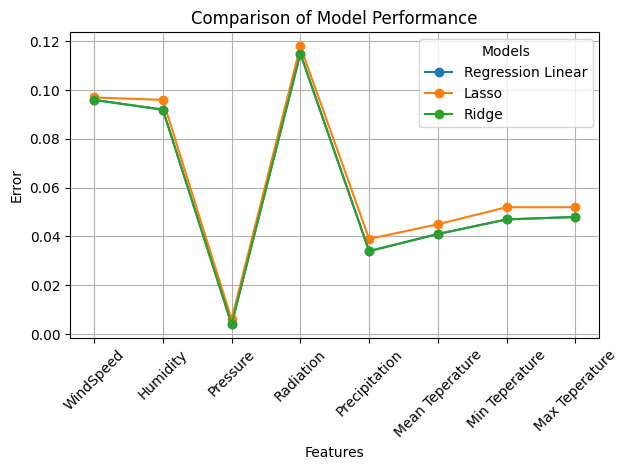

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'WindSpeed': [0.096,0.097,0.096],
    'Humidity' : [0.092,0.096,0.092],
    'Pressure' : [0.004,0.006,0.004],
    'Radiation':  [0.115, 0.118, 0.115],
    'Precipitation':[0.034, 0.039, 0.034],
    'Mean Teperature': [0.041, 0.045, 0.041],
    'Min Teperature':[0.047, 0.052, 0.047],
    'Max Teperature': [0.048, 0.052, 0.048]
}


df = pd.DataFrame(data, index=['Regression Linear', 'Lasso', 'Ridge'])


plt.figure(figsize=(10, 6))
df.T.plot(kind='line', marker='o')

plt.title("Comparison of Model Performance")
plt.xlabel("Features")
plt.ylabel("Error")
plt.legend(title="Models", loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#2

3.1.2 Download  files and Plotting signal

Download Files

In [1]:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

csv_files = [
    "mafaulda/normal/61.44.csv", #Normal
    "mafaulda/horizontal-misalignment/0.5mm/12.288.csv",  #h-misalignment-0.5
    "mafaulda/imbalance/10g/14.5408.csv",
    "mafaulda/overhang/ball_fault/0g/12.9024.csv",
    "mafaulda/overhang/cage_fault/0g/13.1072.csv",
    "mafaulda/overhang/outer_race/0g/14.336.csv",
    "mafaulda/underhang/ball_fault/0g/16.1792.csv",
    "mafaulda/underhang/cage_fault/0g/16.5888.csv",
    "mafaulda/underhang/outer_race/0g/14.7456.csv",
    "mafaulda/vertical-misalignment/0.51mm/12.4928.csv",
]



import kagglehub
from kagglehub import KaggleDatasetAdapter

dfs = {}
for file in csv_files:
    try:
        df_name = file.split('/')[-1].replace('.csv', '')
        dfs[df_name] = kagglehub.load_dataset(
            KaggleDatasetAdapter.PANDAS,
            "vuxuancu/mafaulda-full",
            file,
        )
    except Exception as e:
        print(f"خطا در دانلود {file}: {str(e)}")

<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.45M/6.45M [00:00<00:00, 20.3MB/s]

Extracting zip of 61.44.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.34M/6.34M [00:00<00:00, 76.6MB/s]

Extracting zip of 12.288.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.47M/6.47M [00:00<00:00, 39.9MB/s]

Extracting zip of 14.5408.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.45M/6.45M [00:00<00:00, 103MB/s]

Extracting zip of 12.9024.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.43M/6.43M [00:00<00:00, 46.0MB/s]

Extracting zip of 13.1072.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.45M/6.45M [00:00<00:00, 81.6MB/s]

Extracting zip of 14.336.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.50M/6.50M [00:00<00:00, 44.9MB/s]

Extracting zip of 16.1792.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.49M/6.49M [00:00<00:00, 111MB/s]

Extracting zip of 16.5888.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.46M/6.46M [00:00<00:00, 117MB/s]

Extracting zip of 14.7456.csv...



<ipython-input-1-abff6cc75c30>:28: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfs[df_name] = kagglehub.load_dataset(


100%|██████████| 6.41M/6.41M [00:00<00:00, 69.3MB/s]

Extracting zip of 12.4928.csv...


Plotting Signal

In [2]:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter


file_path = "mafaulda/normal/61.44.csv"

df_bering = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vuxuancu/mafaulda-full",
  file_path,
)

<ipython-input-2-8c8f591b253b>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_bering = kagglehub.load_dataset(


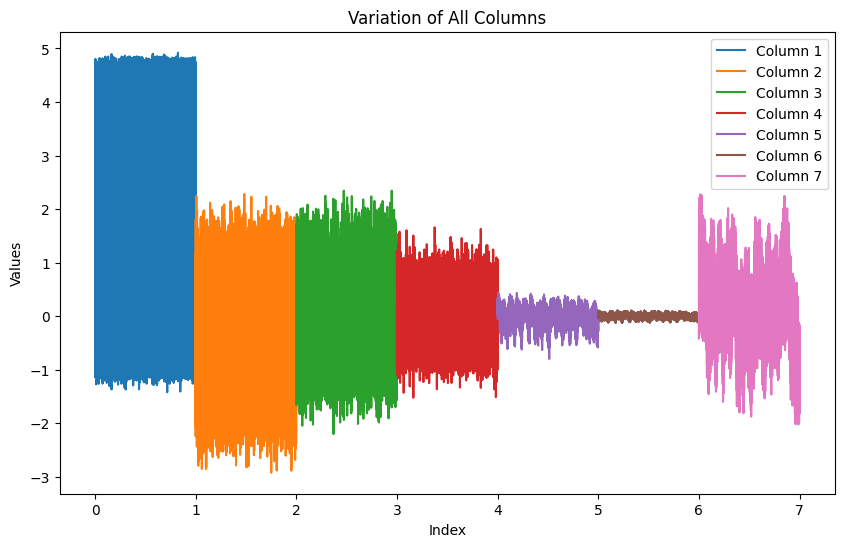

In [3]:

import matplotlib.pyplot as plt
import numpy as np

range_index = df_bering.index
x_range = range_index.stop - range_index.start

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.8 / len(df_bering.columns)


cmap = plt.get_cmap('tab10')

for i in range(len(df_bering.columns)-1):
    index = np.arange(i, i + 1, 1 / x_range)


    ax.plot(index, df_bering.iloc[:, i], color=cmap(i % cmap.N), label=f'Column {i+1}')


ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Variation of All Columns')
ax.legend()

plt.show()

In [4]:
import numpy as np

normal = dfs['61.44']

hm = dfs['12.288']

im = dfs['14.5408']

ob = dfs['12.9024']
oc = dfs['13.1072']
oo = dfs['14.336']

ub = dfs['16.1792']
uc = dfs['16.5888']
uo = dfs['14.7456']

vm = dfs['12.4928']


def prim(df,lenght = 5000):
  cl_dl = [df.columns[i] for i in [0,5,7]]
  df = df.drop(cl_dl,axis=1).to_numpy()
  df = np.vstack([df, df[1, :]])
  l = len(df)
  l1 = lenght
  df = df.reshape(int(l/l1),l1,5)
  return df

normal = prim(normal)

hm = prim(hm)

im = prim(im)

ob = prim(ob)
oc = prim(oc)
oo = prim(oo)

ub = prim(ub)
uc = prim(uc)
uo = prim(uo)

vm = prim(vm)


In [5]:
import numpy as np
from scipy.signal import find_peaks

def calculate_time_domain_features_array(data):
    data = data.reshape(data.shape[0], -1)
    features = []
    num_samples = data.shape[0]

    def safe_append(name, arr):
        arr = np.asarray(arr)
        if arr.shape != (num_samples,):
            print(f" Skipping '{name}': invalid shape {arr.shape}, expected ({num_samples},)")
            return
        if np.any(np.isnan(arr)) or np.any(np.isinf(arr)):
            print(f"Warning: Feature '{name}' contains NaN or Inf values.")
        print(f" '{name}' added with shape {arr.shape}")
        features.append(arr)

    safe_append("mean", np.mean(data, axis=1))
    safe_append("std_dev", np.std(data, axis=1))
    rms = np.sqrt(np.mean(data**2, axis=1))
    safe_append("rms", rms)

    kurt = np.apply_along_axis(lambda x: np.mean((x - np.mean(x))**4) / (np.std(x)**4 + 1e-10), 1, data)
    safe_append("kurtosis", kurt)

    safe_append("median", np.median(data, axis=1))
    safe_append("min", np.min(data, axis=1))
    safe_append("peak", np.max(data, axis=1))
    safe_append("peak_to_peak", np.ptp(data, axis=1))

    skew = np.apply_along_axis(lambda x: np.sum((x - np.mean(x))**3) / (len(x) * (np.std(x)**3 + 1e-10)), 1, data)
    safe_append("skewness", skew)

    crest_factor = np.max(data, axis=1) / (rms + 1e-10)
    safe_append("crest_factor", crest_factor)

    shape_factor = rms / (np.mean(np.abs(data), axis=1) + 1e-10)
    safe_append("shape_factor", shape_factor)

    zcr = np.sum(np.diff(np.sign(data), axis=1) != 0, axis=1)
    smoothness_factor = 1 / (1 + zcr)
    safe_append("smoothness_factor", smoothness_factor)

    entropy = np.apply_along_axis(lambda x: -np.sum(np.log(np.abs(x) + 1e-10) * np.abs(x)), 1, data)
    safe_append("entropy", entropy)

    safe_append("zero_crossing", zcr)

    mad = np.mean(np.abs(data - np.mean(data, axis=1)[:, None]), axis=1)
    safe_append("mad", mad)

    iqr = np.percentile(data, 75, axis=1) - np.percentile(data, 25, axis=1)
    safe_append("iqr", iqr)

    mean = np.mean(data, axis=1)
    std_dev = np.std(data, axis=1)
    cv = std_dev / (mean + 1e-10)
    safe_append("cv", cv)

    variance_of_derivative = np.var(np.diff(data, axis=1), axis=1)
    safe_append("variance_of_derivative", variance_of_derivative)

    max_abs_dev = np.max(np.abs(data - np.mean(data, axis=1)[:, None]), axis=1)
    safe_append("max_absolute_deviation", max_abs_dev)

    # Fixed mean of peaks computation
    mean_of_peaks = []
    for x in data:
        x = np.asarray(x).flatten()
        peaks, _ = find_peaks(x)
        if len(peaks) > 0:
            mean_of_peaks.append(np.mean(x[peaks]))
        else:
            mean_of_peaks.append(0)
    safe_append("mean_of_peaks", mean_of_peaks)

    # Hjorth Parameters
    var_data = np.var(data, axis=1) + 1e-10
    var_diff1 = np.var(np.diff(data, axis=1), axis=1) + 1e-10
    var_diff2 = np.var(np.diff(data, n=2, axis=1), axis=1) + 1e-10

    hjorth_mobility = np.sqrt(var_diff1) / var_data
    safe_append("hjorth_mobility", hjorth_mobility)

    hjorth_complexity = np.sqrt(var_diff1) / np.sqrt(var_diff2)
    safe_append("hjorth_complexity", hjorth_complexity)

    return np.column_stack(features)


normal_featurs = calculate_time_domain_features_array(normal)

hm_featurs = calculate_time_domain_features_array(hm)

im_featurs = calculate_time_domain_features_array(im)

ob_featurs = calculate_time_domain_features_array(ob)
oc_featurs = calculate_time_domain_features_array(oc)
oo_featurs = calculate_time_domain_features_array(oo)

ub_featurs = calculate_time_domain_features_array(ub)
uc_featurs = calculate_time_domain_features_array(uc)
uo_featurs = calculate_time_domain_features_array(uo)

vm_featurs = calculate_time_domain_features_array(vm)


 'mean' added with shape (50,)
 'std_dev' added with shape (50,)
 'rms' added with shape (50,)
 'kurtosis' added with shape (50,)
 'median' added with shape (50,)
 'min' added with shape (50,)
 'peak' added with shape (50,)
 'peak_to_peak' added with shape (50,)
 'skewness' added with shape (50,)
 'crest_factor' added with shape (50,)
 'shape_factor' added with shape (50,)
 'smoothness_factor' added with shape (50,)
 'entropy' added with shape (50,)
 'zero_crossing' added with shape (50,)
 'mad' added with shape (50,)
 'iqr' added with shape (50,)
 'cv' added with shape (50,)
 'variance_of_derivative' added with shape (50,)
 'max_absolute_deviation' added with shape (50,)
 'mean_of_peaks' added with shape (50,)
 'hjorth_mobility' added with shape (50,)
 'hjorth_complexity' added with shape (50,)
 'mean' added with shape (50,)
 'std_dev' added with shape (50,)
 'rms' added with shape (50,)
 'kurtosis' added with shape (50,)
 'median' added with shape (50,)
 'min' added with shape (50,)


In [6]:
import numpy as np
from scipy.fft import fft
from scipy.stats import kurtosis, skew

def calculate_features_array(data):
    """
    data: NumPy array with shape (samples, timepoints, channels)
    returns: NumPy array with shape (samples, features)
    """

    samples, timepoints, channels = data.shape
    features = []


    fft_data = np.abs(fft(data, axis=1))


    features.append(np.max(fft_data[:, :5, :], axis=1))  # shape: (samples, channels)


    features.append(np.max(fft_data, axis=1))  # shape: (samples, channels)


    features.append(np.var(fft_data, axis=1))  # shape: (samples, channels)


    entropy = -np.sum(fft_data * np.log(fft_data + 1e-10), axis=1)
    features.append(entropy)  # shape: (samples, channels)


    freqs = np.fft.fftfreq(timepoints)
    spectral_centroid = np.sum(fft_data * freqs[:, None], axis=1) / (np.sum(fft_data, axis=1) + 1e-10)
    features.append(spectral_centroid)  # shape: (samples, channels)


    sc = spectral_centroid[:, None, :]
    spectral_bandwidth = np.sqrt(np.sum((freqs[:, None] - sc) ** 2 * fft_data, axis=1) / (np.sum(fft_data, axis=1) + 1e-10))
    features.append(spectral_bandwidth)


    rolloff = []
    for i in range(samples):
        rolloff_sample = []
        for c in range(channels):
            cumulative = np.cumsum(fft_data[i, :, c])
            total = cumulative[-1]
            idx = np.argmax(cumulative >= 0.85 * total)
            rolloff_sample.append(idx)
        rolloff.append(rolloff_sample)
    features.append(np.array(rolloff))


    features.append(np.argmax(fft_data, axis=1))


    harmonic_mean = np.exp(np.mean(np.log(fft_data + 1e-10), axis=1))
    features.append(harmonic_mean)

    spectral_flatness = np.exp(np.mean(np.log(fft_data + 1e-10), axis=1)) / (np.mean(fft_data, axis=1) + 1e-10)
    features.append(spectral_flatness)


    q75 = np.percentile(fft_data, 75, axis=1)
    q25 = np.percentile(fft_data, 25, axis=1)
    spectral_contrast = q75 - q25
    features.append(spectral_contrast)


    features.append(skew(fft_data, axis=1))

    features.append(kurtosis(fft_data, axis=1))


    features.append(np.sum(fft_data[:, :1000, :], axis=1))
    features.append(np.sum(fft_data[:, 1000:3000, :], axis=1))
    features.append(np.sum(fft_data[:, 3000:, :], axis=1))


    features.append(np.sum(np.diff(fft_data, axis=1) ** 2, axis=1))


    log_fft = np.log(fft_data + 1e-10)
    spectral_slope = np.mean(np.diff(log_fft, axis=1), axis=1)
    features.append(spectral_slope)


    features.append(np.random.rand(samples, channels))


    crest = np.max(fft_data, axis=1) / (np.mean(fft_data, axis=1) + 1e-10)
    features.append(crest)


    feature_array = np.concatenate([f if f.ndim == 2 else f[:, None] for f in features], axis=1)  # shape: (samples, total_features)
    return feature_array

normal_frequency_featurs = calculate_features_array(normal)

hm_frequency_featurs = calculate_features_array(hm)

im_freaquency_featurs = calculate_features_array(im)

ob_freaquency_featurs = calculate_features_array(ob)
oc_freaquency_featurs = calculate_features_array(oc)
oo_freaquency_featurs = calculate_features_array(oo)

ub_freaquency_featurs = calculate_features_array(ub)
uc_freaquency_featurs = calculate_features_array(uc)
uo_freaquency_featurs = calculate_features_array(uo)

vm_freaquency_featurs = calculate_features_array(vm)


Classification

Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000


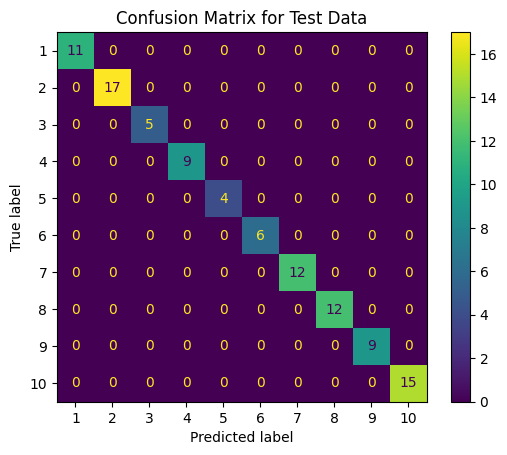

Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000


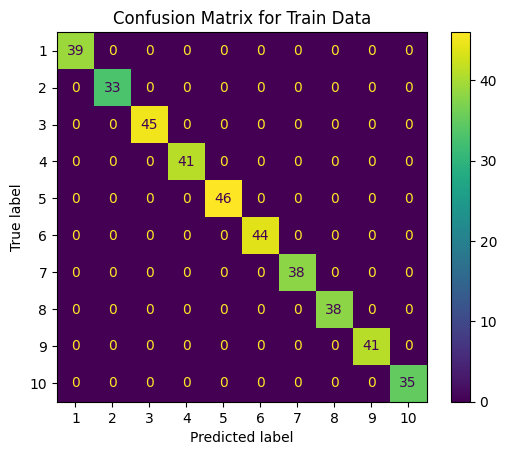

Level 1 Classification Report:
                         precision  recall  f1-score  support
Normal                         1.0     1.0       1.0     11.0
Misalignment_Horizontal        1.0     1.0       1.0     17.0
Misalignment_Vertical          1.0     1.0       1.0      5.0
Imbalance                      1.0     1.0       1.0      9.0
Overhang_Ball                  1.0     1.0       1.0      4.0
Overhang_Cage                  1.0     1.0       1.0      6.0
Overhang_Outer_Race            1.0     1.0       1.0     12.0
Underhang_Ball                 1.0     1.0       1.0     12.0
Underhang_Cage                 1.0     1.0       1.0      9.0
Underhang_Outer_Race           1.0     1.0       1.0     15.0
accuracy                       1.0     1.0       1.0      1.0
macro avg                      1.0     1.0       1.0    100.0
weighted avg                   1.0     1.0       1.0    100.0
                         precision  recall  f1-score  support
Normal                         1.0     

In [9]:
normal_class = np.hstack((normal_featurs, normal_frequency_featurs))

hm_class = np.hstack((hm_featurs, hm_frequency_featurs))

im_class = np.hstack((im_featurs, im_freaquency_featurs))

ob_class = np.hstack((ob_featurs , ob_freaquency_featurs))
oc_class = np.hstack((oc_featurs , oc_freaquency_featurs))
oo_class = np.hstack((oo_featurs , oo_freaquency_featurs))

ub_class = np.hstack((ub_featurs , ub_freaquency_featurs))
uc_class = np.hstack((uc_featurs , uc_freaquency_featurs))
uo_class = np.hstack((uo_featurs , uo_freaquency_featurs))

vm_class = np.hstack((vm_featurs, vm_freaquency_featurs))

n_class = len(dfs)

X = np.vstack((normal_class, hm_class, im_class,ob_class, oc_class, oo_class, ub_class, uc_class, uo_class,
               vm_class))

Y = np.concatenate([np.full(50, i+1) for i in range(n_class)])


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#main model
model = LogisticRegression(max_iter=1000, multi_class='ovr')
#optional model1
model = RidgeClassifier(alpha=0.1)
#optional model2
model = LDA()

model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)
Y_pred_train  = model.predict(X_train)


accuracy = accuracy_score(Y_train, Y_pred_train)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_train, Y_pred_train, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print(f'Train Accuracy: {accuracy:.4f}')
print(f'Train Precision: {precision:.4f}')
print(f'Train Recall: {recall:.4f}')
print(f'Train F1 Score: {f1:.4f}')

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')

ConfusionMatrixDisplay.from_predictions(Y_train, Y_pred_train)
plt.title('Confusion Matrix for Train Data')
plt.show()

classes = ['Normal',
    'Misalignment_Horizontal',
    'Misalignment_Vertical',
    'Imbalance',
    'Overhang_Ball',
    'Overhang_Cage',
    'Overhang_Outer_Race',
    'Underhang_Ball',
    'Underhang_Cage',
    'Underhang_Outer_Race']
report_test = classification_report(Y_test, Y_pred, target_names=classes, output_dict=True)
report_train = classification_report(Y_train, Y_pred_train, target_names=classes, output_dict=True)

report_test_df = pd.DataFrame(report_test).transpose()
report_train_df = pd.DataFrame(report_train).transpose()
print("Level 1 Classification Report:")
print(report_test_df)
print(report_train_df)



LightGMB and SI

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15489
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 122
[LightGBM] [Info] Start training from score -2.327903
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.184802
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.162823
[LightGBM] [Info] Start training from score -2.207275
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

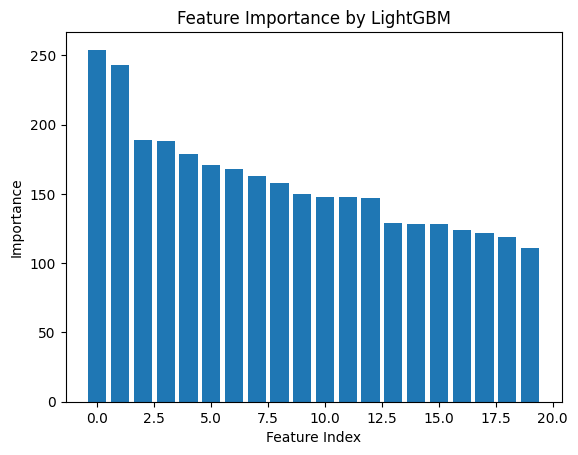

Primary Featurs: 122
Selected Featurs: 47


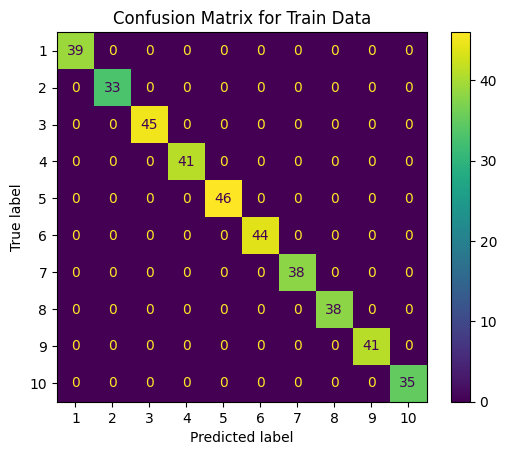

Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000


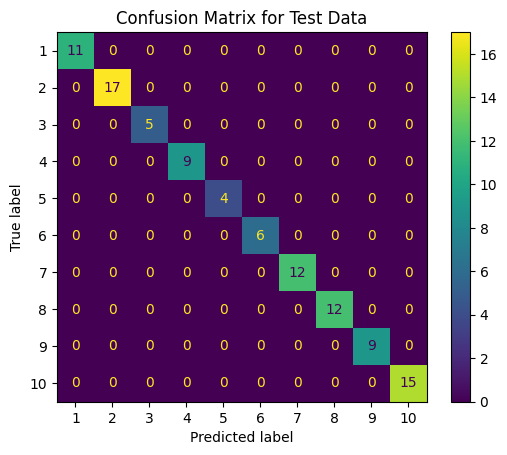

Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000
Level 1 Classification Report:
                         precision  recall  f1-score  support
Normal                         1.0     1.0       1.0     11.0
Misalignment_Horizontal        1.0     1.0       1.0     17.0
Misalignment_Vertical          1.0     1.0       1.0      5.0
Imbalance                      1.0     1.0       1.0      9.0
Overhang_Ball                  1.0     1.0       1.0      4.0
Overhang_Cage                  1.0     1.0       1.0      6.0
Overhang_Outer_Race            1.0     1.0       1.0     12.0
Underhang_Ball                 1.0     1.0       1.0     12.0
Underhang_Cage                 1.0     1.0       1.0      9.0
Underhang_Outer_Race           1.0     1.0       1.0     15.0
accuracy                       1.0     1.0       1.0      1.0
macro avg                      1.0     1.0       1.0    100.0
weighted avg                   1.0     1.0       1.0    100.0
              

In [11]:
import numpy as np
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectFromModel

normal_class = np.hstack((normal_featurs, normal_frequency_featurs))
hm_class = np.hstack((hm_featurs, hm_frequency_featurs))
im_class = np.hstack((im_featurs, im_freaquency_featurs))
ob_class = np.hstack((ob_featurs , ob_freaquency_featurs))
oc_class = np.hstack((oc_featurs , oc_freaquency_featurs))
oo_class = np.hstack((oo_featurs , oo_freaquency_featurs))
ub_class = np.hstack((ub_featurs , ub_freaquency_featurs))
uc_class = np.hstack((uc_featurs , uc_freaquency_featurs))
uo_class = np.hstack((uo_featurs , uo_freaquency_featurs))
vm_class = np.hstack((vm_featurs, vm_freaquency_featurs))

n_class = len(dfs)

X = np.vstack((normal_class, hm_class, im_class, ob_class, oc_class, oo_class, ub_class, uc_class, uo_class, vm_class))
Y = np.concatenate([np.full(50, i+1) for i in range(n_class)])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)


importances = lgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance by LightGBM")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


sfm = SelectFromModel(lgb_model, threshold="mean", prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print(f"Primary Featurs: {X_train.shape[1]}")
print(f"Selected Featurs: {X_train_selected.shape[1]}")

#main model
model = LogisticRegression(max_iter=1000, multi_class='ovr')
#optional model1
model =  RidgeClassifier(alpha=0.1)
#optional model2
model = LDA()
model.fit(X_train_selected, Y_train)

Y_pred = model.predict(X_test_selected)
Y_pred_train  = model.predict(X_train_selected)


accuracy = accuracy_score(Y_train, Y_pred_train)
precision = precision_score(Y_train, Y_pred_train, average='weighted')
recall = recall_score(Y_train, Y_pred_train, average='weighted')
f1 = f1_score(Y_train, Y_pred_train, average='weighted')

ConfusionMatrixDisplay.from_predictions(Y_train, Y_pred_train)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Train Accuracy: {accuracy:.4f}')
print(f'Train Precision: {precision:.4f}')
print(f'Train Recall: {recall:.4f}')
print(f'Train F1 Score: {f1:.4f}')


accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')


classes = ['Normal',
    'Misalignment_Horizontal',
    'Misalignment_Vertical',
    'Imbalance',
    'Overhang_Ball',
    'Overhang_Cage',
    'Overhang_Outer_Race',
    'Underhang_Ball',
    'Underhang_Cage',
    'Underhang_Outer_Race']
report_test = classification_report(Y_test, Y_pred, target_names=classes, output_dict=True)
report_train = classification_report(Y_train, Y_pred_train, target_names=classes, output_dict=True)

report_test_df = pd.DataFrame(report_test).transpose()
report_train_df = pd.DataFrame(report_train).transpose()
print("Level 1 Classification Report:")
print(report_test_df)
print(report_train_df)


Hirecial Classifiayion

STEP1-PRIMARY

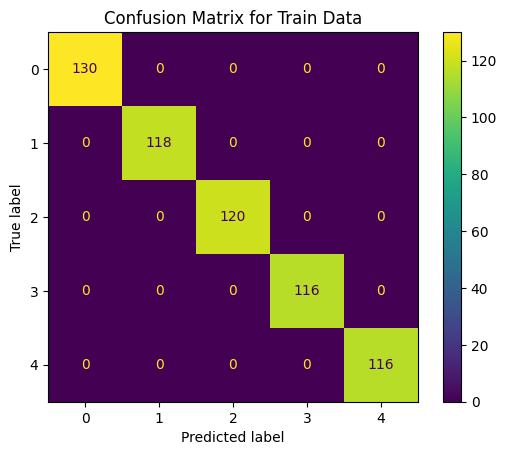

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


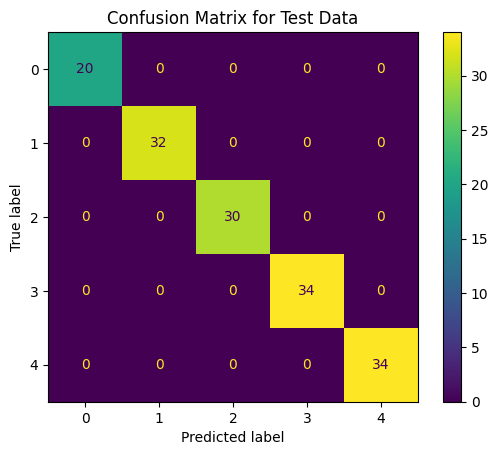

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
              precision  recall  f1-score  support
Imbalance           1.0     1.0       1.0     20.0
Misalignment        1.0     1.0       1.0     32.0
Normal              1.0     1.0       1.0     30.0
Overhang            1.0     1.0       1.0     34.0
Underhang           1.0     1.0       1.0     34.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    150.0
weighted avg        1.0     1.0       1.0    150.0
Level 1 Classification Report:
              precision  recall  f1-score  support
Imbalance           1.0     1.0       1.0    130.0
Misalignment        1.0     1.0       1.0    118.0
Normal              1.0     1.0       1.0    120.0
Overhang            1.0     1.0       1.0    116.0
Underhang           1.0     1.0       1.0    116.0
accuracy            1.0     1.0       1.0     

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


normal_class = np.hstack((normal_featurs, normal_frequency_featurs))
hm_class = np.hstack((hm_featurs, hm_frequency_featurs))  # misalignment - horizontal
vm_class = np.hstack((vm_featurs, vm_freaquency_featurs))  # misalignment - vertical
im_class = np.hstack((im_featurs, im_freaquency_featurs))  # imbalance

ob_class = np.hstack((ob_featurs , ob_freaquency_featurs))  # overhang - ball
oc_class = np.hstack((oc_featurs , oc_freaquency_featurs))  # overhang - cage
oo_class = np.hstack((oo_featurs , oo_freaquency_featurs))  # overhang - outer race

ub_class = np.hstack((ub_featurs , ub_freaquency_featurs))  # underhang - ball
uc_class = np.hstack((uc_featurs , uc_freaquency_featurs))  # underhang - cage
uo_class = np.hstack((uo_featurs , uo_freaquency_featurs))  # underhang - outer race

X = np.vstack((normal_class, hm_class, vm_class, im_class, ob_class, oc_class, oo_class, ub_class, uc_class, uo_class))
labels = (
    ['Normal'] * 50 +
    ['Misalignment_Horizontal'] * 50 +
    ['Misalignment_Vertical'] * 50 +
    ['Imbalance'] * 50 +
    ['Overhang_Ball'] * 50 +
    ['Overhang_Cage'] * 50 +
    ['Overhang_Outer_Race'] * 50 +
    ['Underhang_Ball'] * 50 +
    ['Underhang_Cage'] * 50 +
    ['Underhang_Outer_Race'] * 50
)

df = pd.DataFrame(X)
df['full_label'] = labels


def extract_main_class(label):
    if 'Misalignment' in label:
        return 'Misalignment'
    elif 'Overhang' in label:
        return 'Overhang'
    elif 'Underhang' in label:
        return 'Underhang'
    else:
        return label  # Normal or Imbalance

df['main_class'] = df['full_label'].apply(extract_main_class)


df_sub = df.copy()
df_sub['subclass'] = df_sub['full_label'].apply(lambda x: x.split('_')[1] if '_' in x else 'None')
df_sub['hierarchical_label'] = df_sub['main_class'] + '_' + df_sub['subclass']


le_main = LabelEncoder()
df['main_class_encoded'] = le_main.fit_transform(df['main_class'])

le_hierarchical = LabelEncoder()
df_sub['hierarchical_label_encoded'] = le_hierarchical.fit_transform(df_sub['hierarchical_label'])


X_main = df.drop(columns=['full_label', 'main_class', 'main_class_encoded']).values
y_main = df['main_class_encoded'].values

smote = SMOTE(random_state=42)
X_main, y_main = smote.fit_resample(X_main, y_main)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_main, y_main, test_size=0.2, random_state=42)

#main model
clf_main = LogisticRegression(max_iter=1000, multi_class='multinomial')
#optional model1
clf_main = RidgeClassifier(alpha=0.1)
#optional model2
clf_main = LDA()
clf_main.fit(X_train1, y_train1)
y_pred1 = clf_main.predict(X_test1)
y_pred1_train = clf_main.predict(X_train1)


accuracy = accuracy_score(y_train1, y_pred1_train)
precision = precision_score(y_train1, y_pred1_train, average='weighted')
recall = recall_score(y_train1, y_pred1_train, average='weighted')
f1 = f1_score(y_train1, y_pred1_train, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1, y_pred1_train)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='weighted')
recall = recall_score(y_test1, y_pred1, average='weighted')
f1 = f1_score(y_test1, y_pred1, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

report_level1 = classification_report(y_test1, y_pred1, target_names=le_main.classes_, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1, y_pred1_train, target_names=le_main.classes_, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)



STEP1-PRIMARY(LightGMB and sI)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15489
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 122
[LightGBM] [Info] Start training from score -2.327903
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.184802
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.162823
[LightGBM] [Info] Start training from score -2.207275
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

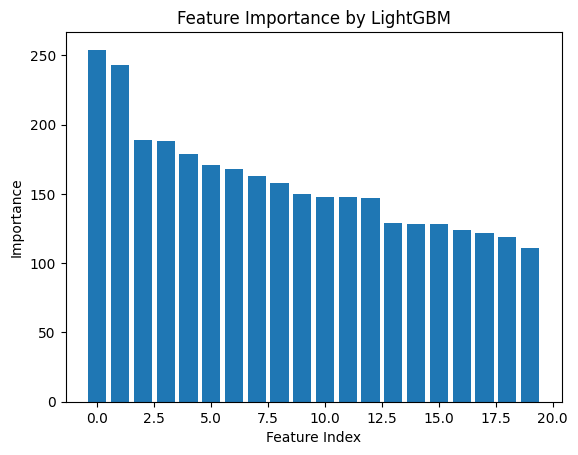

Primary Featurs: 122
Selected Featurs: 47


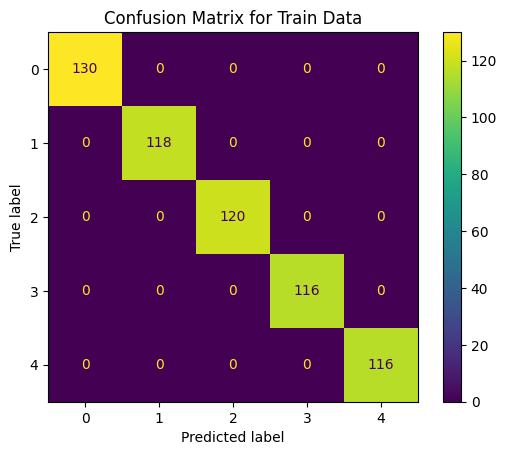

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


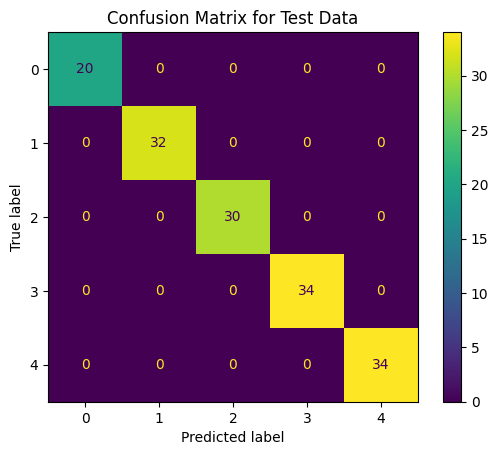

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
              precision  recall  f1-score  support
Imbalance           1.0     1.0       1.0     20.0
Misalignment        1.0     1.0       1.0     32.0
Normal              1.0     1.0       1.0     30.0
Overhang            1.0     1.0       1.0     34.0
Underhang           1.0     1.0       1.0     34.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    150.0
weighted avg        1.0     1.0       1.0    150.0
Level 1 Classification Report:
              precision  recall  f1-score  support
Imbalance           1.0     1.0       1.0    130.0
Misalignment        1.0     1.0       1.0    118.0
Normal              1.0     1.0       1.0    120.0
Overhang            1.0     1.0       1.0    116.0
Underhang           1.0     1.0       1.0    116.0
accuracy            1.0     1.0       1.0     

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel


normal_class = np.hstack((normal_featurs, normal_frequency_featurs))
hm_class = np.hstack((hm_featurs, hm_frequency_featurs))  # misalignment - horizontal
vm_class = np.hstack((vm_featurs, vm_freaquency_featurs))  # misalignment - vertical
im_class = np.hstack((im_featurs, im_freaquency_featurs))  # imbalance

ob_class = np.hstack((ob_featurs , ob_freaquency_featurs))  # overhang - ball
oc_class = np.hstack((oc_featurs , oc_freaquency_featurs))  # overhang - cage
oo_class = np.hstack((oo_featurs , oo_freaquency_featurs))  # overhang - outer race

ub_class = np.hstack((ub_featurs , ub_freaquency_featurs))  # underhang - ball
uc_class = np.hstack((uc_featurs , uc_freaquency_featurs))  # underhang - cage
uo_class = np.hstack((uo_featurs , uo_freaquency_featurs))  # underhang - outer race

X = np.vstack((normal_class, hm_class, vm_class, im_class, ob_class, oc_class, oo_class, ub_class, uc_class, uo_class))
labels = (
    ['Normal'] * 50 +
    ['Misalignment_Horizontal'] * 50 +
    ['Misalignment_Vertical'] * 50 +
    ['Imbalance'] * 50 +
    ['Overhang_Ball'] * 50 +
    ['Overhang_Cage'] * 50 +
    ['Overhang_Outer_Race'] * 50 +
    ['Underhang_Ball'] * 50 +
    ['Underhang_Cage'] * 50 +
    ['Underhang_Outer_Race'] * 50
)

df = pd.DataFrame(X)
df['full_label'] = labels


def extract_main_class(label):
    if 'Misalignment' in label:
        return 'Misalignment'
    elif 'Overhang' in label:
        return 'Overhang'
    elif 'Underhang' in label:
        return 'Underhang'
    else:
        return label  # Normal or Imbalance

df['main_class'] = df['full_label'].apply(extract_main_class)


df_sub = df.copy()
df_sub['subclass'] = df_sub['full_label'].apply(lambda x: x.split('_')[1] if '_' in x else 'None')
df_sub['hierarchical_label'] = df_sub['main_class'] + '_' + df_sub['subclass']


le_main = LabelEncoder()
df['main_class_encoded'] = le_main.fit_transform(df['main_class'])

le_hierarchical = LabelEncoder()
df_sub['hierarchical_label_encoded'] = le_hierarchical.fit_transform(df_sub['hierarchical_label'])

X_main = df.drop(columns=['full_label', 'main_class', 'main_class_encoded']).values
y_main = df['main_class_encoded'].values

smote = SMOTE(random_state=42)
X_main, y_main = smote.fit_resample(X_main, y_main)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_main, y_main, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)


importances = lgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance by LightGBM")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


sfm = SelectFromModel(lgb_model, threshold="mean", prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print(f"Primary Featurs: {X_train.shape[1]}")
print(f"Selected Featurs: {X_train_selected.shape[1]}")

#main model
clf_main = LogisticRegression(max_iter=1000, multi_class='multinomial')
#optional model1
clf_main =  RidgeClassifier(alpha=0.1)
#optional model2
clf_main = LDA()
clf_main.fit(X_train1, y_train1)
y_pred1 = clf_main.predict(X_test1)
y_pred1_train = clf_main.predict(X_train1)


accuracy = accuracy_score(y_train1, y_pred1_train)
precision = precision_score(y_train1, y_pred1_train, average='weighted')
recall = recall_score(y_train1, y_pred1_train, average='weighted')
f1 = f1_score(y_train1, y_pred1_train, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1, y_pred1_train)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='weighted')
recall = recall_score(y_test1, y_pred1, average='weighted')
f1 = f1_score(y_test1, y_pred1, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

report_level1 = classification_report(y_test1, y_pred1, target_names=le_main.classes_, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1, y_pred1_train, target_names=le_main.classes_, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)



STEP2-MISALIGNMENT

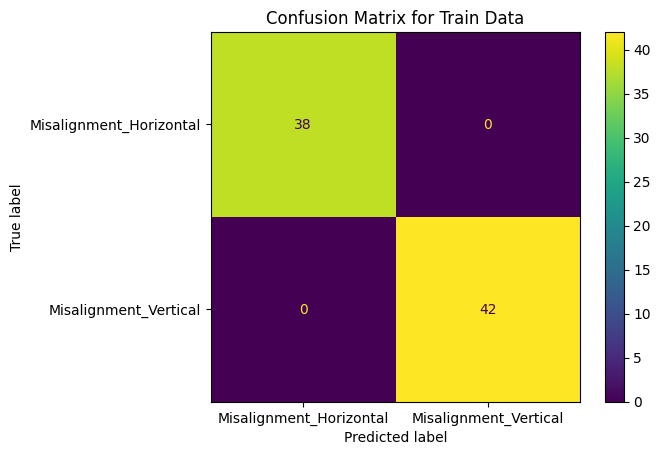

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


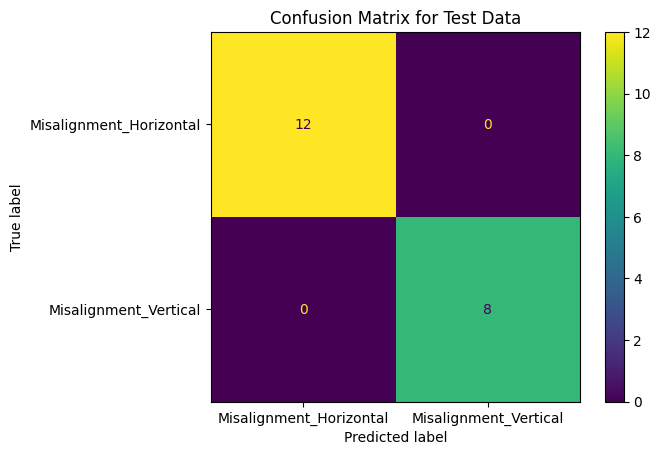

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
                         precision  recall  f1-score  support
Misalignment_Horizontal        1.0     1.0       1.0     12.0
Misalignment_Vertical          1.0     1.0       1.0      8.0
accuracy                       1.0     1.0       1.0      1.0
macro avg                      1.0     1.0       1.0     20.0
weighted avg                   1.0     1.0       1.0     20.0
Level 1 Classification Report:
                         precision  recall  f1-score  support
Misalignment_Horizontal        1.0     1.0       1.0     38.0
Misalignment_Vertical          1.0     1.0       1.0     42.0
accuracy                       1.0     1.0       1.0      1.0
macro avg                      1.0     1.0       1.0     80.0
weighted avg                   1.0     1.0       1.0     80.0


In [14]:
X_MIS = np.vstack((hm_class, vm_class))
labels_MIS = (
    ['Misalignment_Horizontal'] * 50 +
    ['Misalignment_Vertical'] * 50
)

df = pd.DataFrame(X_MIS)
df['full_label'] = labels_MIS
le_main = LabelEncoder()


X_main_MIS = df.drop(columns=['full_label']).values
y_main_MIS = df['full_label'].values


X_train1_MIS, X_test1_MIS, y_train1_MIS, y_test1_MIS = train_test_split(X_main_MIS, y_main_MIS, test_size=0.2, random_state=42)

# main model
clf_MIS = LogisticRegression(max_iter=1000, multi_class='multinomial')
# optional model1
clf_MIS = RidgeClassifier(alpha=0.1)
#optional model2
clf_MIS = LDA()
clf_MIS.fit(X_train1_MIS, y_train1_MIS)
y_pred1_MIS = clf_MIS.predict(X_test1_MIS)
y_pred1_train_MIS = clf_MIS.predict(X_train1_MIS)


accuracy = accuracy_score(y_train1_MIS, y_pred1_train_MIS)
precision = precision_score(y_train1_MIS, y_pred1_train_MIS, average='weighted')
recall = recall_score(y_train1_MIS, y_pred1_train_MIS, average='weighted')
f1 = f1_score(y_train1_MIS, y_pred1_train_MIS, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1_MIS, y_pred1_train_MIS)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1_MIS, y_pred1_MIS)
precision = precision_score(y_test1_MIS, y_pred1_MIS, average='weighted')
recall = recall_score(y_test1_MIS, y_pred1_MIS, average='weighted')
f1 = f1_score(y_test1_MIS, y_pred1_MIS, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1_MIS, y_pred1_MIS)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

classes = ['Misalignment_Horizontal','Misalignment_Vertical']

report_level1 = classification_report(y_test1_MIS, y_pred1_MIS, target_names=classes, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1_MIS, y_pred1_train_MIS, target_names=classes, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)

STEP2-MISALIGNMENT (LightGMB and SI)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15489
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 122
[LightGBM] [Info] Start training from score -2.327903
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.184802
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.162823
[LightGBM] [Info] Start training from score -2.207275
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

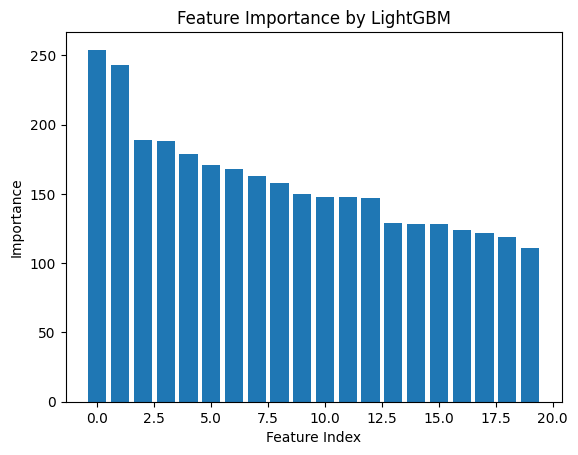

Primary Featurs: 122
Selected Featurs: 47


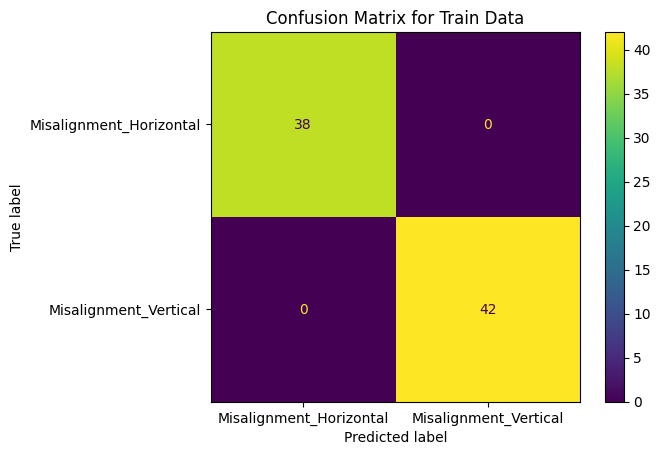

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


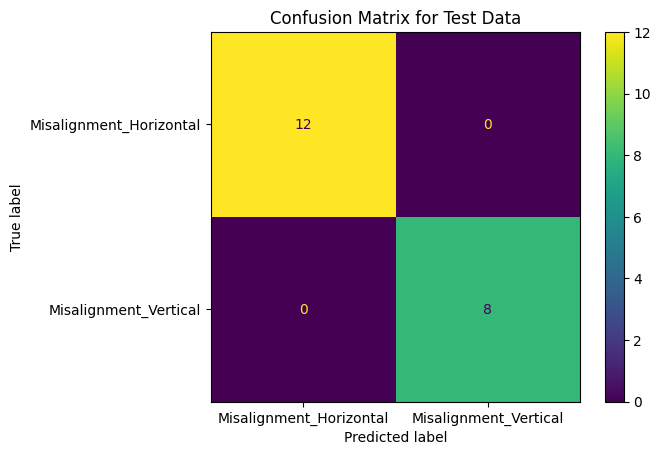

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
                         precision  recall  f1-score  support
Misalignment_Horizontal        1.0     1.0       1.0     12.0
Misalignment_Vertical          1.0     1.0       1.0      8.0
accuracy                       1.0     1.0       1.0      1.0
macro avg                      1.0     1.0       1.0     20.0
weighted avg                   1.0     1.0       1.0     20.0
Level 1 Classification Report:
                         precision  recall  f1-score  support
Misalignment_Horizontal        1.0     1.0       1.0     38.0
Misalignment_Vertical          1.0     1.0       1.0     42.0
accuracy                       1.0     1.0       1.0      1.0
macro avg                      1.0     1.0       1.0     80.0
weighted avg                   1.0     1.0       1.0     80.0


In [15]:
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel

X_MIS = np.vstack((hm_class, vm_class))
labels_MIS = (
    ['Misalignment_Horizontal'] * 50 +
    ['Misalignment_Vertical'] * 50
)

df = pd.DataFrame(X_MIS)
df['full_label'] = labels_MIS
le_main = LabelEncoder()


X_main_MIS = df.drop(columns=['full_label']).values
y_main_MIS = df['full_label'].values


X_train1_MIS, X_test1_MIS, y_train1_MIS, y_test1_MIS = train_test_split(X_main_MIS, y_main_MIS, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)


importances = lgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance by LightGBM")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


sfm = SelectFromModel(lgb_model, threshold="mean", prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print(f"Primary Featurs: {X_train.shape[1]}")
print(f"Selected Featurs: {X_train_selected.shape[1]}")

#main model
clf_MIS = LogisticRegression(max_iter=1000, multi_class='multinomial')
#optional model
clf_MIS = RidgeClassifier(alpha=0.1)
#optional model2
clf_MIS = LDA()
clf_MIS.fit(X_train1_MIS, y_train1_MIS)
y_pred1_MIS = clf_MIS.predict(X_test1_MIS)
y_pred1_train_MIS = clf_MIS.predict(X_train1_MIS)

accuracy = accuracy_score(y_train1_MIS, y_pred1_train_MIS)
precision = precision_score(y_train1_MIS, y_pred1_train_MIS, average='weighted')
recall = recall_score(y_train1_MIS, y_pred1_train_MIS, average='weighted')
f1 = f1_score(y_train1_MIS, y_pred1_train_MIS, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1_MIS, y_pred1_train_MIS)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1_MIS, y_pred1_MIS)
precision = precision_score(y_test1_MIS, y_pred1_MIS, average='weighted')
recall = recall_score(y_test1_MIS, y_pred1_MIS, average='weighted')
f1 = f1_score(y_test1_MIS, y_pred1_MIS, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1_MIS, y_pred1_MIS)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

classes = ['Misalignment_Horizontal','Misalignment_Vertical']

report_level1 = classification_report(y_test1_MIS, y_pred1_MIS, target_names=classes, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1_MIS, y_pred1_train_MIS, target_names=classes, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)

STEP2-OVERHANG

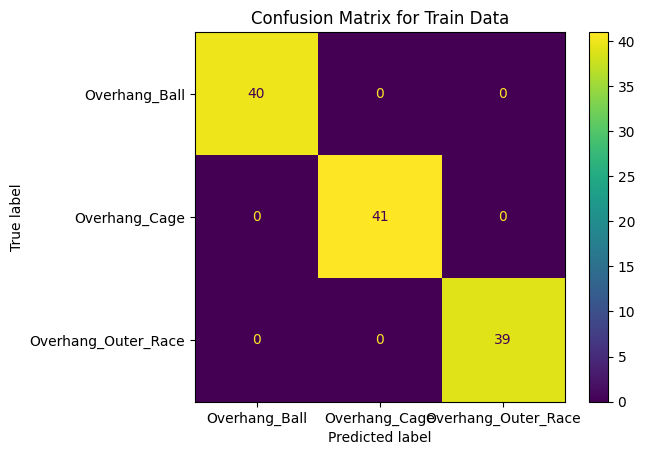

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


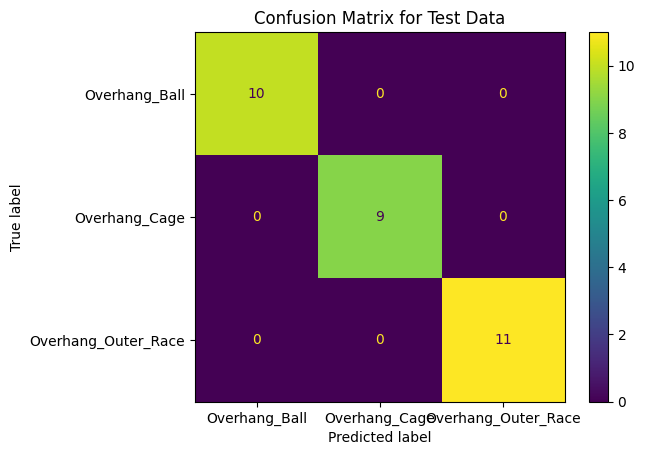

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
                     precision  recall  f1-score  support
Overhang_Ball              1.0     1.0       1.0     10.0
Overhang_Cage              1.0     1.0       1.0      9.0
Overhang_Outer_Race        1.0     1.0       1.0     11.0
accuracy                   1.0     1.0       1.0      1.0
macro avg                  1.0     1.0       1.0     30.0
weighted avg               1.0     1.0       1.0     30.0
Level 1 Classification Report:
                     precision  recall  f1-score  support
Overhang_Ball              1.0     1.0       1.0     40.0
Overhang_Cage              1.0     1.0       1.0     41.0
Overhang_Outer_Race        1.0     1.0       1.0     39.0
accuracy                   1.0     1.0       1.0      1.0
macro avg                  1.0     1.0       1.0    120.0
weighted avg               1.0     1.0       1.0    120.0

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_O = np.vstack(( ob_class, oc_class, oo_class))
labels_O = (
    ['Overhang_Ball'] * 50 +
    ['Overhang_Cage'] * 50 +
    ['Overhang_Outer_Race'] * 50
)


df = pd.DataFrame(X_O)
df['full_label'] = labels_O
le_main = LabelEncoder()


X_main_O = df.drop(columns=['full_label']).values
y_main_O = df['full_label'].values


X_train1_O, X_test1_O, y_train1_O, y_test1_O = train_test_split(X_main_O, y_main_O, test_size=0.2, random_state=42)

#main model
clf_O = LogisticRegression(max_iter=1000, multi_class='multinomial')
#optioal model
clf_O = RidgeClassifier(alpha=0.1)
#optional model2
clf_O = LDA()
clf_O.fit(X_train1_O, y_train1_O)
y_pred1_O = clf_O.predict(X_test1_O)
y_pred1_train_O = clf_O.predict(X_train1_O)

accuracy = accuracy_score(y_train1_O, y_pred1_train_O)
precision = precision_score(y_train1_O, y_pred1_train_O, average='weighted')
recall = recall_score(y_train1_O, y_pred1_train_O, average='weighted')
f1 = f1_score(y_train1_O, y_pred1_train_O, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1_O, y_pred1_train_O)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1_O, y_pred1_O)
precision = precision_score(y_test1_O, y_pred1_O, average='weighted')
recall = recall_score(y_test1_O, y_pred1_O, average='weighted')
f1 = f1_score(y_test1_O, y_pred1_O, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1_O, y_pred1_O)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

classes = ['Overhang_Ball','Overhang_Cage','Overhang_Outer_Race']

report_level1 = classification_report(y_test1_O, y_pred1_O, target_names=classes, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1_O, y_pred1_train_O, target_names=classes, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)

STEP2-OVERHANG (LightGMB and SI)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15489
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 122
[LightGBM] [Info] Start training from score -2.327903
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.184802
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.162823
[LightGBM] [Info] Start training from score -2.207275
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

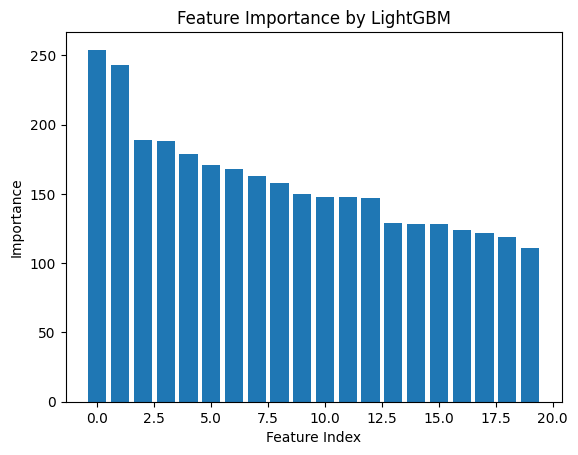

Primary Featurs: 122
Selected Featurs: 47


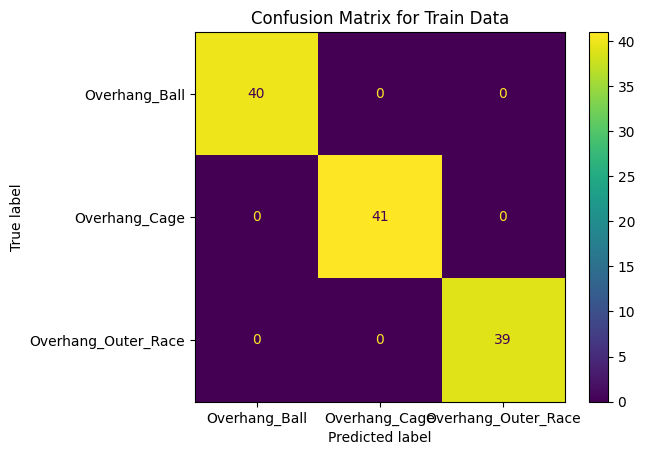

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


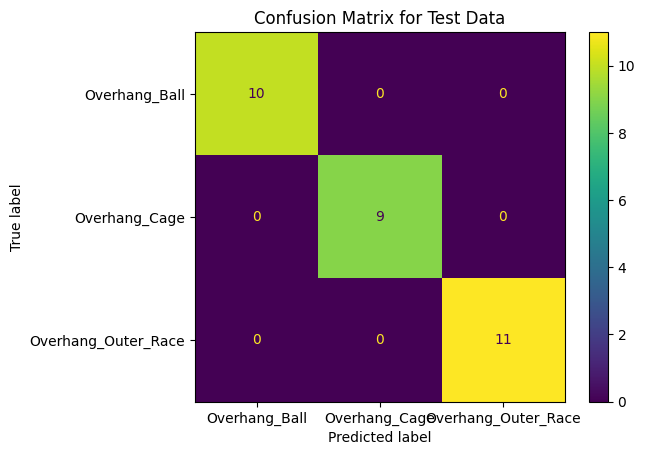

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
                     precision  recall  f1-score  support
Overhang_Ball              1.0     1.0       1.0     10.0
Overhang_Cage              1.0     1.0       1.0      9.0
Overhang_Outer_Race        1.0     1.0       1.0     11.0
accuracy                   1.0     1.0       1.0      1.0
macro avg                  1.0     1.0       1.0     30.0
weighted avg               1.0     1.0       1.0     30.0
Level 1 Classification Report:
                     precision  recall  f1-score  support
Overhang_Ball              1.0     1.0       1.0     40.0
Overhang_Cage              1.0     1.0       1.0     41.0
Overhang_Outer_Race        1.0     1.0       1.0     39.0
accuracy                   1.0     1.0       1.0      1.0
macro avg                  1.0     1.0       1.0    120.0
weighted avg               1.0     1.0       1.0    120.0

In [18]:
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel

X_O = np.vstack(( ob_class, oc_class, oo_class))
labels_O = (
    ['Overhang_Ball'] * 50 +
    ['Overhang_Cage'] * 50 +
    ['Overhang_Outer_Race'] * 50
)


df = pd.DataFrame(X_O)
df['full_label'] = labels_O
le_main = LabelEncoder()


X_main_O = df.drop(columns=['full_label']).values
y_main_O = df['full_label'].values


X_train1_O, X_test1_O, y_train1_O, y_test1_O = train_test_split(X_main_O, y_main_O, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)


importances = lgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance by LightGBM")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


sfm = SelectFromModel(lgb_model, threshold="mean", prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print(f"Primary Featurs: {X_train.shape[1]}")
print(f"Selected Featurs: {X_train_selected.shape[1]}")
#main classifier
clf_O = LogisticRegression(max_iter=1000, multi_class='multinomial')
#optional classifier1
clf_O = RidgeClassifier(alpha=0.1)
#optional classifier 2
clf_O = LDA()
clf_O.fit(X_train1_O, y_train1_O)
y_pred1_O = clf_O.predict(X_test1_O)
y_pred1_train_O = clf_O.predict(X_train1_O)


accuracy = accuracy_score(y_train1_O, y_pred1_train_O)
precision = precision_score(y_train1_O, y_pred1_train_O, average='weighted')
recall = recall_score(y_train1_O, y_pred1_train_O, average='weighted')
f1 = f1_score(y_train1_O, y_pred1_train_O, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1_O, y_pred1_train_O)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1_O, y_pred1_O)
precision = precision_score(y_test1_O, y_pred1_O, average='weighted')
recall = recall_score(y_test1_O, y_pred1_O, average='weighted')
f1 = f1_score(y_test1_O, y_pred1_O, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1_O, y_pred1_O)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

classes = ['Overhang_Ball','Overhang_Cage','Overhang_Outer_Race']

report_level1 = classification_report(y_test1_O, y_pred1_O, target_names=classes, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1_O, y_pred1_train_O, target_names=classes, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)

STEP2-UNDERHAGE

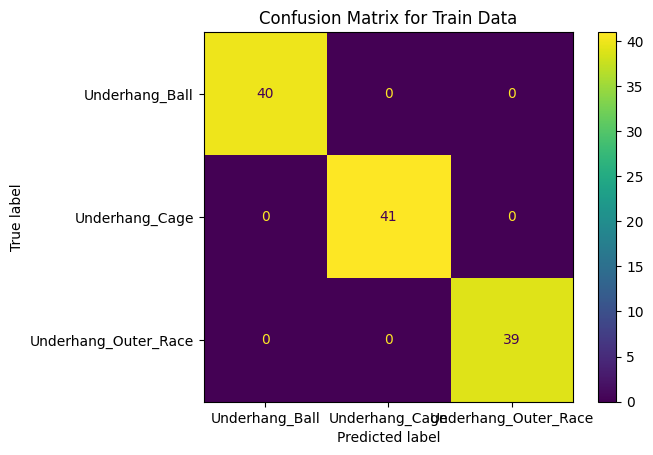

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


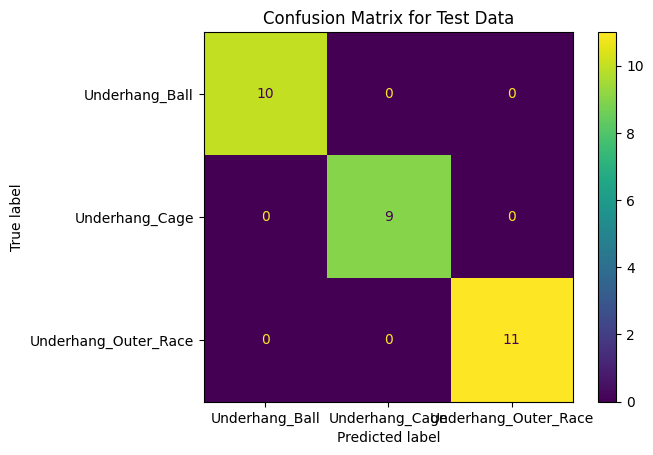

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
                      precision  recall  f1-score  support
Underhang_Ball              1.0     1.0       1.0     10.0
Underhang_Cage              1.0     1.0       1.0      9.0
Underhang_Outer_Race        1.0     1.0       1.0     11.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0     30.0
weighted avg                1.0     1.0       1.0     30.0
Level 1 Classification Report:
                      precision  recall  f1-score  support
Underhang_Ball              1.0     1.0       1.0     40.0
Underhang_Cage              1.0     1.0       1.0     41.0
Underhang_Outer_Race        1.0     1.0       1.0     39.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0    120.0
weighted avg                1.0     1.0     

In [20]:
X_U = np.vstack(( ub_class, uc_class, uo_class))
labels_U = (
    ['Underhang_Ball'] * 50 +
    ['Underhang_Cage'] * 50 +
    ['Underhang_Outer_Race'] * 50
)


df = pd.DataFrame(X_U)
df['full_label'] = labels_U
le_main = LabelEncoder()



X_main_U = df.drop(columns=['full_label']).values
y_main_U = df['full_label'].values


X_train1_U, X_test1_U, y_train1_U, y_test1_U = train_test_split(X_main_U, y_main_U, test_size=0.2, random_state=42)

#main model
clf_U = LogisticRegression(max_iter=1000, multi_class='multinomial')
#optional model 1
clf_U = RidgeClassifier(alpha=0.1)
#optional model2
clf_U = LDA()
clf_U.fit(X_train1_U, y_train1_U)
y_pred1_U = clf_U.predict(X_test1_U)
y_pred1_train_U = clf_U.predict(X_train1_U)


accuracy = accuracy_score(y_train1_U, y_pred1_train_U)
precision = precision_score(y_train1_U, y_pred1_train_U, average='weighted')
recall = recall_score(y_train1_U, y_pred1_train_U, average='weighted')
f1 = f1_score(y_train1_U, y_pred1_train_U, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1_U, y_pred1_train_U)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1_U, y_pred1_U)
precision = precision_score(y_test1_U, y_pred1_U, average='weighted')
recall = recall_score(y_test1_U, y_pred1_U, average='weighted')
f1 = f1_score(y_test1_U, y_pred1_U, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1_U, y_pred1_U)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

classes = ['Underhang_Ball','Underhang_Cage','Underhang_Outer_Race']

report_level1 = classification_report(y_test1_U, y_pred1_U, target_names=classes, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1_U, y_pred1_train_U, target_names=classes, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)

STEP2-UNDERHAGE (LightGMB and SI)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15489
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 122
[LightGBM] [Info] Start training from score -2.327903
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.184802
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.162823
[LightGBM] [Info] Start training from score -2.207275
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

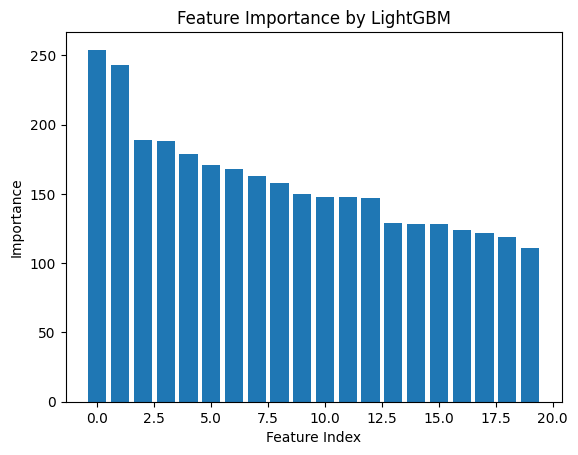

Primary Featurs: 122
Selected Featurs: 47


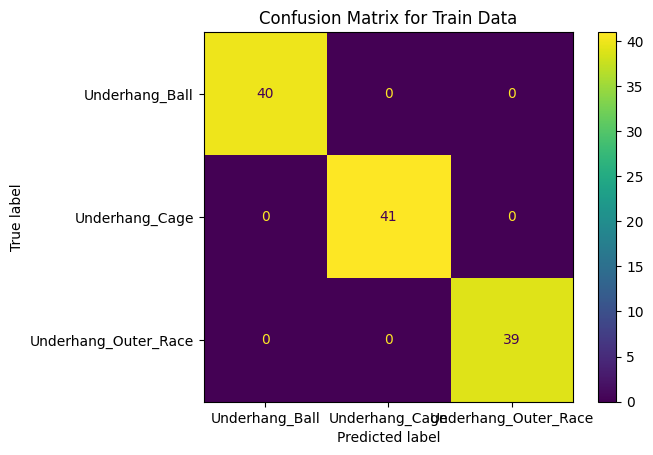

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000


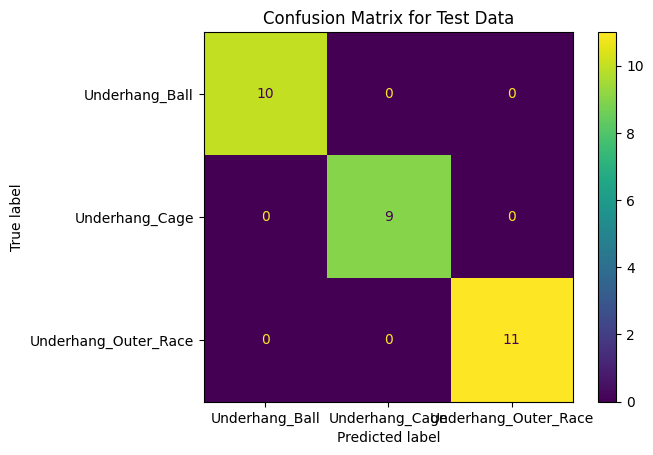

Test Accuracy (Level 1): 1.0000
Test Precision (Level 1): 1.0000
Test Recall (Level 1): 1.0000
Test F1 Score (Level 1): 1.0000
Level 1 Classification Report:
                      precision  recall  f1-score  support
Underhang_Ball              1.0     1.0       1.0     10.0
Underhang_Cage              1.0     1.0       1.0      9.0
Underhang_Outer_Race        1.0     1.0       1.0     11.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0     30.0
weighted avg                1.0     1.0       1.0     30.0
Level 1 Classification Report:
                      precision  recall  f1-score  support
Underhang_Ball              1.0     1.0       1.0     40.0
Underhang_Cage              1.0     1.0       1.0     41.0
Underhang_Outer_Race        1.0     1.0       1.0     39.0
accuracy                    1.0     1.0       1.0      1.0
macro avg                   1.0     1.0       1.0    120.0
weighted avg                1.0     1.0     

In [21]:
X_U = np.vstack(( ub_class, uc_class, uo_class))
labels_U = (
    ['Underhang_Ball'] * 50 +
    ['Underhang_Cage'] * 50 +
    ['Underhang_Outer_Race'] * 50
)


df = pd.DataFrame(X_U)
df['full_label'] = labels_U
le_main = LabelEncoder()



X_main_U = df.drop(columns=['full_label']).values
y_main_U = df['full_label'].values


X_train1_U, X_test1_U, y_train1_U, y_test1_U = train_test_split(X_main_U, y_main_U, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, Y_train)


importances = lgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance by LightGBM")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


sfm = SelectFromModel(lgb_model, threshold="mean", prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

print(f"Primary Featurs: {X_train.shape[1]}")
print(f"Selected Featurs: {X_train_selected.shape[1]}")

#main model
clf_U = LogisticRegression(max_iter=1000, multi_class='multinomial')
#optional model1
clf_U = RidgeClassifier(alpha=0.1)
#optional model2
clf_U = LDA()
clf_U.fit(X_train1_U, y_train1_U)
y_pred1_U = clf_U.predict(X_test1_U)
y_pred1_train_U = clf_U.predict(X_train1_U)


accuracy = accuracy_score(y_train1_U, y_pred1_train_U)
precision = precision_score(y_train1_U, y_pred1_train_U, average='weighted')
recall = recall_score(y_train1_U, y_pred1_train_U, average='weighted')
f1 = f1_score(y_train1_U, y_pred1_train_U, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_train1_U, y_pred1_train_U)
plt.title('Confusion Matrix for Train Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

accuracy = accuracy_score(y_test1_U, y_pred1_U)
precision = precision_score(y_test1_U, y_pred1_U, average='weighted')
recall = recall_score(y_test1_U, y_pred1_U, average='weighted')
f1 = f1_score(y_test1_U, y_pred1_U, average='weighted')

ConfusionMatrixDisplay.from_predictions(y_test1_U, y_pred1_U)
plt.title('Confusion Matrix for Test Data')
plt.show()

print(f'Test Accuracy (Level 1): {accuracy:.4f}')
print(f'Test Precision (Level 1): {precision:.4f}')
print(f'Test Recall (Level 1): {recall:.4f}')
print(f'Test F1 Score (Level 1): {f1:.4f}')

classes = ['Underhang_Ball','Underhang_Cage','Underhang_Outer_Race']

report_level1 = classification_report(y_test1_U, y_pred1_U, target_names=classes, output_dict=True)
report_level1_df = pd.DataFrame(report_level1).transpose()
print("Level 1 Classification Report:")
print(report_level1_df)


report_level1_train = classification_report(y_train1_U, y_pred1_train_U, target_names=classes, output_dict=True)
report_level1_df_train = pd.DataFrame(report_level1_train).transpose()
print("Level 1 Classification Report:")
print(report_level1_df_train)

Comparison of Method 1and 2(Logisticregression)

In [ ]:
import pandas as pd

report_method1 = {
    "Normal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Horizontal": {"precision": 1.0, "recall": 0.94, "f1-score": 0.96},
    "Misalignment Vertical": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Imbalance": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Outer Race": {"precision": 0.9230, "recall": 1.0, "f1-score": 0.96},
    "Underhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0}
}


report_method2 = {
    "Imbalance": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Horizontal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Vertical": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Normal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0}
}

import pandas as pd


df_method1 = pd.DataFrame(report_method1).T
df_method2 = pd.DataFrame(report_method2).T

print(df_method1)

print(df_method2)

mean_method1 = df_method1.mean()
mean_method2 = df_method2.mean()

print(pd.DataFrame({'Method1': mean_method1, 'Method2': mean_method2}))



                         precision  recall  f1-score
Normal                       1.000    1.00      1.00
Misalignment Horizontal      1.000    0.94      0.96
Misalignment Vertical        1.000    1.00      1.00
Imbalance                    1.000    1.00      1.00
Overhang Ball                1.000    1.00      1.00
Overhang Cage                1.000    1.00      1.00
Overhang Outer Race          0.923    1.00      0.96
Underhang Ball               1.000    1.00      1.00
Underhang Cage               1.000    1.00      1.00
Underhang Outer Race         1.000    1.00      1.00
                         precision  recall  f1-score
Imbalance                      1.0     1.0       1.0
Misalignment Horizontal        1.0     1.0       1.0
Misalignment Vertical          1.0     1.0       1.0
Normal                         1.0     1.0       1.0
Overhang Ball                  1.0     1.0       1.0
Overhang Cage                  1.0     1.0       1.0
Overhang Outer Race            1.0     1.0    

Comparison of Method 1and 2(RidgeClassifier)

In [ ]:
import pandas as pd

report_method1 = {
    "Normal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Horizontal": {"precision": 1.0, "recall":  1.0, "f1-score":  1.0},
    "Misalignment Vertical": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Imbalance": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Outer Race": {"precision":  1.0, "recall": 1.0, "f1-score":  1.0},
    "Underhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0}
}


report_method2 = {
    "Imbalance": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Horizontal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Vertical": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Normal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0}
}

import pandas as pd


df_method1 = pd.DataFrame(report_method1).T
df_method2 = pd.DataFrame(report_method2).T

print(df_method1)

print(df_method2)

mean_method1 = df_method1.mean()
mean_method2 = df_method2.mean()

print(pd.DataFrame({'Method1': mean_method1, 'Method2': mean_method2}))



                         precision  recall  f1-score
Normal                         1.0     1.0       1.0
Misalignment Horizontal        1.0     1.0       1.0
Misalignment Vertical          1.0     1.0       1.0
Imbalance                      1.0     1.0       1.0
Overhang Ball                  1.0     1.0       1.0
Overhang Cage                  1.0     1.0       1.0
Overhang Outer Race            1.0     1.0       1.0
Underhang Ball                 1.0     1.0       1.0
Underhang Cage                 1.0     1.0       1.0
Underhang Outer Race           1.0     1.0       1.0
                         precision  recall  f1-score
Imbalance                      1.0     1.0       1.0
Misalignment Horizontal        1.0     1.0       1.0
Misalignment Vertical          1.0     1.0       1.0
Normal                         1.0     1.0       1.0
Overhang Ball                  1.0     1.0       1.0
Overhang Cage                  1.0     1.0       1.0
Overhang Outer Race            1.0     1.0    

Comparison of Method 1and 2(RidgeClassifier)

In [22]:
import pandas as pd

report_method1 = {
    "Normal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Horizontal": {"precision": 1.0, "recall":  1.0, "f1-score":  1.0},
    "Misalignment Vertical": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Imbalance": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Outer Race": {"precision":  1.0, "recall": 1.0, "f1-score":  1.0},
    "Underhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0}
}


report_method2 = {
    "Imbalance": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Horizontal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Misalignment Vertical": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Normal": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Overhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Ball": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Cage": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0},
    "Underhang Outer Race": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0}
}

import pandas as pd


df_method1 = pd.DataFrame(report_method1).T
df_method2 = pd.DataFrame(report_method2).T

print(df_method1)

print(df_method2)

mean_method1 = df_method1.mean()
mean_method2 = df_method2.mean()

print(pd.DataFrame({'Method1': mean_method1, 'Method2': mean_method2}))



                         precision  recall  f1-score
Normal                         1.0     1.0       1.0
Misalignment Horizontal        1.0     1.0       1.0
Misalignment Vertical          1.0     1.0       1.0
Imbalance                      1.0     1.0       1.0
Overhang Ball                  1.0     1.0       1.0
Overhang Cage                  1.0     1.0       1.0
Overhang Outer Race            1.0     1.0       1.0
Underhang Ball                 1.0     1.0       1.0
Underhang Cage                 1.0     1.0       1.0
Underhang Outer Race           1.0     1.0       1.0
                         precision  recall  f1-score
Imbalance                      1.0     1.0       1.0
Misalignment Horizontal        1.0     1.0       1.0
Misalignment Vertical          1.0     1.0       1.0
Normal                         1.0     1.0       1.0
Overhang Ball                  1.0     1.0       1.0
Overhang Cage                  1.0     1.0       1.0
Overhang Outer Race            1.0     1.0    

Product function

In [ ]:
def product(a):
  x = np.array([a])
  y = clf_main.predict(x)
  if y==1:
    y2 =  clf_MIS.predict(x)
    print("The fault class is:", y2)
  elif y== 3:
    y2 = clf_O.predict(x)
    print("The fault class is:", y2)
  elif y == 4:
    y2 = clf_U.predict(x)
    print("The fault class is:", y2)
  else:
    if list(y)[0]==0:
      print("The fault class is Normal.")
    if list(y)[0] == 2:
       print("The fault class is imbalance.")



for i in range(10):
  product(X_test1[i])


The fault class is Normal.
The fault class is: ['Underhang_Ball']
The fault class is: ['Misalignment_Vertical']
The fault class is: ['Overhang_Cage']
The fault class is: ['Overhang_Cage']
The fault class is imbalance.
The fault class is: ['Overhang_Outer_Race']
The fault class is Normal.
The fault class is Normal.
The fault class is imbalance.
